# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCFanIn/InitialTestMultiPattern.cfg'
data_path = './results'
simulation_name = 'TestMFGoCPlasticity10FTMulti'
simulation_time = 3000
analysis_time = 300.0
analysis_step = 100.0
time_bin = 0.125
run_the_simulation = False
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 12345
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
simulation.config_options['goclayer']['cm'] = 50.0e-12
simulation.config_options['goclayer']['grest'] = 3.0e-9
simulation.config_options['goclayer']['cell_model'] = 'ConductanceLIFSym'
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgocsynapsis']['average_number_of_source_cells'] = 2000.0
simulation.config_options['mfgocsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgocsynapsis']['random_min_weight'] = 6.0e-11
simulation.config_options['mfgocsynapsis']['random_max_weight'] = 6.5e-11
simulation.config_options['mfgocsynapsis']['weight_recording'] = True
simulation.config_options['mfgocsynapsis']['weight_normalization'] = False
simulation.config_options['mfgocsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgocsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgocsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgocsynapsis']['minus_plus_ratio'] = 1.39
simulation.config_options['goclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgocsynapsis']['max_weight'] = 7.33e-10
# Set the GoC-GoC connectivity rules and parameters
simulation.config_options['gocgocsynapsis']['connectivity_type'] = 'random_with_probability'
simulation.config_options['gocgocsynapsis']['connection_probability'] = 1.0
# Set the MF-GrC learning rule and initial weights
simulation.config_options['gocgocsynapsis']['weight_initialization_type'] = 'fixed'
#simulation.config_options['gocgocsynapsis']['initial_weight'] = -1.0e-11
simulation.config_options['gocgocsynapsis']['initial_weight'] = -0.0e-10
simulation.config_options['gocgocsynapsis']['weight_recording'] = True
simulation.config_options['gocgocsynapsis']['weight_normalization'] = False
simulation.config_options['gocgocsynapsis']['learning_rule_type'] = 'STDPSym'
simulation.config_options['gocgocsynapsis']['tau_sym'] = 0.125
simulation.config_options['gocgocsynapsis']['learning_step'] = 5.0e-2
simulation.config_options['gocgocsynapsis']['minus_plus_ratio'] = 1.559
simulation.config_options['goclayer']['tau_istdp'] = 125.0e-3
simulation.config_options['gocgocsynapsis']['max_weight'] = -1.239e-9


Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'goclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['individual_mutual_information']['time_bin'] = time_bin
simulation.config_options['hit_top_analysis']['layer'] = 'goclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 72
simulation.config_options['hit_top_analysis']['time_bin'] = time_bin

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['number_of_patterns'] = 4
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-07-11 09:19:58,864 - P3029 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 3000s
2018-07-11 09:19:58,893 - P3029 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-07-11 09:19:58,976 - P3029 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-07-11 09:19:58,977 - P3029 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestMFGoCPlasticity10FTMulti
2018-07-11 09:19:59,021 - P3029 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-07-11 09:19:59,024 - P3029 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-07-11 09:19:59,045 - P3029 - MemTotal:88M - Simulation - DEBUG: Setting Global NEST Seed: 12356
2018-07-11 09:19:59,046 - P3029 - MemTotal:88M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366]
2018-07-11 09:19:59,049 - P3029 - MemTotal:88M - Simulation - WARNING: Non-specified cell model parame

2018-07-11 09:20:01,676 - P3029 - MemTotal:855M - Simulation - DEBUG: Activation level of pattern 3 in shared cells: [1.         0.4812862  0.1964711  0.20747694 0.12657111 0.85454061
 0.6653852  0.04065191 0.1025546  0.33753522 0.22776703 0.20173258
 0.10439143 0.70784806 0.98821468 0.5242888  0.98909701 0.04655834
 0.58545256 0.05246393 0.12700064 0.06581248 0.78617784 0.14524258
 0.31852379 0.09013447 0.677026   0.94865867]
2018-07-11 09:20:01,678 - P3029 - MemTotal:855M - Simulation - DEBUG: Pattern 1 and 2 share 19 input cells: [ 272  427  483  649  667  696 1014 1109 1134 1204 1252 1257 1328 1441
 1477 1830 2268 2305 2324]
2018-07-11 09:20:01,679 - P3029 - MemTotal:855M - Simulation - DEBUG: Activation level of pattern 1 in shared cells: [0.21452001 0.38192293 0.49389278 0.95274506 0.70497397 0.89361132
 0.6110373  0.4446976  0.45894838 0.71952682 0.35752387 0.70760964
 0.10291158 0.64502006 0.89292021 0.23255593 0.33046704 0.27032873
 0.8860624 ]
2018-07-11 09:20:01,681 - P3029 

Define a function to obtain the average firing rate

In [7]:
def obtain_fr(init_time,end_time):
    min_neuron = 0
    max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
    gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
    import numpy
    firing_frequency = float(len(gcell_id)) / ((end_time-init_time)*max_neuron)
    return firing_frequency

Visualize the simulation or only run it.

<IPython.core.display.Javascript object>


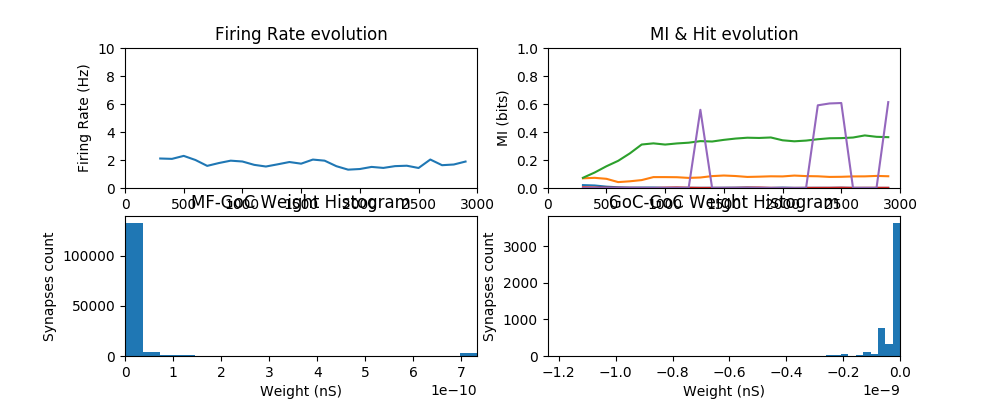

2018-07-11 09:20:09,712 - P3029 - MemTotal:1133M - Simulation - INFO: Running the simulation from 0.0s until time 300.0s
2018-07-11 09:20:09,757 - P3029 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.177s until 0.177s
2018-07-11 09:20:10,013 - P3029 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.253769874573 seconds. Real-time rate: 0.6974823165988342
2018-07-11 09:20:10,058 - P3029 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.11299999999999999s until 0.29s
2018-07-11 09:20:10,219 - P3029 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.159689903259 seconds. Real-time rate: 0.7076214443973317
2018-07-11 09:20:10,236 - P3029 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.964s until 1.254s
2018-07-11 09:20:11,258 - P3029 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 1.01935887337 seconds. Real-time rate: 0.9456924594334091
2018-07-11 09:20:11,274 - P3029 - MemTotal:1134M - Simulation - DEBUG: Running

2018-07-11 09:20:18,662 - P3029 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.840367078781 seconds. Real-time rate: 0.87104792474938
2018-07-11 09:20:18,678 - P3029 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.04699999999999971s until 7.4559999999999995s
2018-07-11 09:20:18,730 - P3029 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0502581596375 seconds. Real-time rate: 0.9351715291416369
2018-07-11 09:20:18,746 - P3029 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.21699999999999964s until 7.672999999999999s
2018-07-11 09:20:18,966 - P3029 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.217959165573 seconds. Real-time rate: 0.9955993336155496
2018-07-11 09:20:18,981 - P3029 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.07000000000000028s until 7.742999999999999s
2018-07-11 09:20:19,054 - P3029 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0712461471558 seconds. Real-time rate: 0.

2018-07-11 09:20:28,025 - P3029 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.7140000000000004s until 13.686000000000002s
2018-07-11 09:20:28,792 - P3029 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 0.765486001968 seconds. Real-time rate: 0.932740766211281
2018-07-11 09:20:28,808 - P3029 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.11100000000000065s until 13.797000000000002s
2018-07-11 09:20:28,961 - P3029 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 0.150522947311 seconds. Real-time rate: 0.7374290896016288
2018-07-11 09:20:28,984 - P3029 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.2400000000000002s until 14.037000000000003s
2018-07-11 09:20:29,275 - P3029 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 0.289972066879 seconds. Real-time rate: 0.8276659285941576
2018-07-11 09:20:29,292 - P3029 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.0470000000000006s until 14.0840000000

2018-07-11 09:20:36,217 - P3029 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.10300000000000153s until 19.924000000000003s
2018-07-11 09:20:36,371 - P3029 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 0.152219057083 seconds. Real-time rate: 0.6766564054049499
2018-07-11 09:20:36,388 - P3029 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 19.997000000000003s
2018-07-11 09:20:36,497 - P3029 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 0.107099056244 seconds. Real-time rate: 0.6816119820305198
2018-07-11 09:20:36,516 - P3029 - MemTotal:1194M - Simulation - DEBUG: Running the simulation 0.22500000000000142s until 20.222000000000005s
2018-07-11 09:20:36,523 - P3029 - MemTotal:1194M - Simulation - DEBUG: Simulation time is 0.00561094284058 seconds. Real-time rate: 0.5346694994469948
2018-07-11 09:20:36,525 - P3029 - MemTotal:1194M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:

2018-07-11 09:20:45,577 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.208830833435 seconds. Real-time rate: 0.8044789039844695
2018-07-11 09:20:45,596 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.2270000000000003s until 25.395s
2018-07-11 09:20:45,856 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.258446931839 seconds. Real-time rate: 0.8783234468475711
2018-07-11 09:20:45,873 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.07499999999999929s until 25.47s
2018-07-11 09:20:45,966 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0903789997101 seconds. Real-time rate: 0.8298387926463411
2018-07-11 09:20:45,985 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.015999999999998238s until 25.485999999999997s
2018-07-11 09:20:46,007 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0204050540924 seconds. Real-time rate: 0.7841194601856939
2018

2018-07-11 09:20:51,553 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0987539291382 seconds. Real-time rate: 0.870851425867468
2018-07-11 09:20:51,554 - P3029 - MemTotal:1195M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:20:51,556 - P3029 - MemTotal:1195M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:20:53,141 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.80110001564 seconds. Real-time rate: 0.7789289574551845
2018-07-11 09:20:53,158 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.1509999999999998s until 30.775s
2018-07-11 09:20:53,323 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.162636041641 seconds. Real-time rate: 0.9284534871618192
2018-07-11 09:20:53,339 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.053000000000000824s until 30.828s
2018-07-11 09:20:53,402 - P3029

2018-07-11 09:21:02,227 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.3470000000000013s until 36.574000000000005s
2018-07-11 09:21:02,685 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.456125974655 seconds. Real-time rate: 0.7607547460158272
2018-07-11 09:21:02,704 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.1700000000000017s until 36.74400000000001s
2018-07-11 09:21:02,979 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.271775007248 seconds. Real-time rate: 0.6255174150171963
2018-07-11 09:21:02,997 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.5090000000000003s until 37.25300000000001s
2018-07-11 09:21:03,560 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.560612916946 seconds. Real-time rate: 0.9079348416951576
2018-07-11 09:21:03,577 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 37.36600000000

2018-07-11 09:21:16,452 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 45.89700000000001s
2018-07-11 09:21:16,531 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0774278640747 seconds. Real-time rate: 0.9428130411755339
2018-07-11 09:21:16,549 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.031999999999996476s until 45.92900000000001s
2018-07-11 09:21:16,624 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0735678672791 seconds. Real-time rate: 0.4349725115533961
2018-07-11 09:21:16,641 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.21800000000000352s until 46.14700000000001s
2018-07-11 09:21:16,881 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.238050937653 seconds. Real-time rate: 0.9157703899413042
2018-07-11 09:21:16,897 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.1319999999999979s until 46.27900000

2018-07-11 09:21:27,239 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.134999999999998s until 54.01000000000001s
2018-07-11 09:21:27,462 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.22013092041 seconds. Real-time rate: 0.6132714102519579
2018-07-11 09:21:27,480 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.2749999999999986s until 54.28500000000001s
2018-07-11 09:21:28,081 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.599605798721 seconds. Real-time rate: 0.4586346572805809
2018-07-11 09:21:28,100 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.5850000000000009s until 54.87000000000001s
2018-07-11 09:21:28,797 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.694755792618 seconds. Real-time rate: 0.8420224864851521
2018-07-11 09:21:28,813 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.7070000000000007s until 55.57700000000001s

2018-07-11 09:21:38,539 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.003999999999997783s until 61.85500000000001s
2018-07-11 09:21:38,546 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.00597190856934 seconds. Real-time rate: 0.6698026189712034
2018-07-11 09:21:38,564 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.4720000000000013s until 62.32700000000001s
2018-07-11 09:21:39,126 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.559835910797 seconds. Real-time rate: 0.8431041862390478
2018-07-11 09:21:39,143 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.11899999999999977s until 62.44600000000001s
2018-07-11 09:21:39,284 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.13872718811 seconds. Real-time rate: 0.8577986883532905
2018-07-11 09:21:39,301 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.4029999999999987s until 62.849000000

2018-07-11 09:21:46,385 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.42654800415 seconds. Real-time rate: 0.8955615693499317
2018-07-11 09:21:46,402 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.22299999999999898s until 68.52500000000002s
2018-07-11 09:21:46,663 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.259294033051 seconds. Real-time rate: 0.860027503820482
2018-07-11 09:21:46,680 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.0589999999999975s until 68.58400000000002s
2018-07-11 09:21:46,749 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.066869020462 seconds. Real-time rate: 0.8823218822757222
2018-07-11 09:21:46,766 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 68.63700000000001s
2018-07-11 09:21:46,824 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0564231872559 seconds. Real-time rate: 0.939

2018-07-11 09:21:58,336 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0238211154938 seconds. Real-time rate: 0.8395912443824458
2018-07-11 09:21:58,354 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.23799999999999955s until 78.03200000000001s
2018-07-11 09:21:58,617 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.261043071747 seconds. Real-time rate: 0.9117269361234951
2018-07-11 09:21:58,635 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.10299999999999443s until 78.135s
2018-07-11 09:21:58,757 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.119778871536 seconds. Real-time rate: 0.8599179361012614
2018-07-11 09:21:58,775 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.08299999999999841s until 78.218s
2018-07-11 09:21:58,871 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0943338871002 seconds. Real-time rate: 0.8798534922219385
2018

2018-07-11 09:22:07,221 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.790678024292 seconds. Real-time rate: 0.8195497789131597
2018-07-11 09:22:07,238 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.4590000000000032s until 84.06600000000003s
2018-07-11 09:22:07,824 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.584321022034 seconds. Real-time rate: 0.7855271035816638
2018-07-11 09:22:07,841 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.5379999999999967s until 84.60400000000003s
2018-07-11 09:22:08,466 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.623654842377 seconds. Real-time rate: 0.8626566546805167
2018-07-11 09:22:08,484 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.2150000000000034s until 84.81900000000003s
2018-07-11 09:22:08,776 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.290759086609 seconds. Real-time rate: 0.7394

2018-07-11 09:22:15,052 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.26200000000000045s until 89.93800000000005s
2018-07-11 09:22:15,342 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.288189888 seconds. Real-time rate: 0.9091228072497691
2018-07-11 09:22:15,359 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.1560000000000059s until 90.09400000000005s
2018-07-11 09:22:15,426 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0652639865875 seconds. Real-time rate: 0.9499879373260143
2018-07-11 09:22:15,429 - P3029 - MemTotal:1195M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:22:15,430 - P3029 - MemTotal:1195M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:22:16,443 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.170061826706 seconds. Real-time rate: 0.5527401523364428
2018-07-11 

2018-07-11 09:22:24,704 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.3689999999999998s until 97.70500000000006s
2018-07-11 09:22:25,101 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.395169019699 seconds. Real-time rate: 0.9337776536252173
2018-07-11 09:22:25,118 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.028000000000005798s until 97.73300000000006s
2018-07-11 09:22:25,154 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0343837738037 seconds. Real-time rate: 0.8143376047042237
2018-07-11 09:22:25,171 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.17900000000000205s until 97.91200000000006s
2018-07-11 09:22:25,376 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.203413963318 seconds. Real-time rate: 0.8799789212124154
2018-07-11 09:22:25,394 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.4069999999999965s until 98.319000000

2018-07-11 09:22:33,465 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.8880000000000052s until 104.92400000000009s
2018-07-11 09:22:34,398 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.93071103096 seconds. Real-time rate: 0.9541092460073038
2018-07-11 09:22:34,414 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 104.99400000000009s
2018-07-11 09:22:34,511 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0951719284058 seconds. Real-time rate: 0.7355109975448955
2018-07-11 09:22:34,528 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.08100000000000307s until 105.07500000000009s
2018-07-11 09:22:34,616 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0865099430084 seconds. Real-time rate: 0.9363085581054733
2018-07-11 09:22:34,633 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.6440000000000055s until 105.719000

2018-07-11 09:22:43,613 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.030000000000001137s until 112.20100000000012s
2018-07-11 09:22:43,648 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0334029197693 seconds. Real-time rate: 0.8981250802986736
2018-07-11 09:22:43,665 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.7360000000000042s until 112.93700000000013s
2018-07-11 09:22:44,428 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.761187076569 seconds. Real-time rate: 0.9669107932282015
2018-07-11 09:22:44,445 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.08199999999999363s until 113.01900000000012s
2018-07-11 09:22:44,530 - P3029 - MemTotal:1195M - Simulation - DEBUG: Simulation time is 0.0835552215576 seconds. Real-time rate: 0.9813869016366485
2018-07-11 09:22:44,548 - P3029 - MemTotal:1195M - Simulation - DEBUG: Running the simulation 0.15500000000000114s until 113.174

2018-07-11 09:22:53,839 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.04200000000000159s until 120.41100000000013s
2018-07-11 09:22:53,902 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0619041919708 seconds. Real-time rate: 0.6784677848601232
2018-07-11 09:22:53,919 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.07099999999999795s until 120.48200000000013s
2018-07-11 09:22:54,016 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0953018665314 seconds. Real-time rate: 0.7450011482894275
2018-07-11 09:22:54,033 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.19700000000000273s until 120.67900000000013s
2018-07-11 09:22:54,261 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.22601890564 seconds. Real-time rate: 0.8716085030253541
2018-07-11 09:22:54,278 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.08400000000000318s until 120.7630

2018-07-11 09:23:00,555 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.130156040192 seconds. Real-time rate: 0.8989210168634961
2018-07-11 09:23:00,573 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.08899999999999864s until 126.15400000000014s
2018-07-11 09:23:00,668 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.092808008194 seconds. Real-time rate: 0.9589689697249798
2018-07-11 09:23:00,685 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.347999999999999s until 126.50200000000014s
2018-07-11 09:23:01,048 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.361442089081 seconds. Real-time rate: 0.9628098401185198
2018-07-11 09:23:01,065 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.11700000000000443s until 126.61900000000014s
2018-07-11 09:23:01,198 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.131196975708 seconds. Real-time rate: 0.

2018-07-11 09:23:09,496 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.183301210403 seconds. Real-time rate: 0.9547127354742492
2018-07-11 09:23:09,513 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.23400000000000887s until 133.30700000000022s
2018-07-11 09:23:09,770 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.254167079926 seconds. Real-time rate: 0.9206542407795827
2018-07-11 09:23:09,787 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.664999999999992s until 133.9720000000002s
2018-07-11 09:23:10,472 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.683357000351 seconds. Real-time rate: 0.9731370274372949
2018-07-11 09:23:10,490 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.492999999999995s until 134.4650000000002s
2018-07-11 09:23:11,028 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.536698102951 seconds. Real-time rate: 0.9185

2018-07-11 09:23:20,292 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.156893968582 seconds. Real-time rate: 0.8923223834871582
2018-07-11 09:23:20,309 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.07800000000000296s until 141.91200000000023s
2018-07-11 09:23:20,395 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0843160152435 seconds. Real-time rate: 0.9250911558701541
2018-07-11 09:23:20,412 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.03999999999999204s until 141.95200000000023s
2018-07-11 09:23:20,491 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0769879817963 seconds. Real-time rate: 0.5195616129520723
2018-07-11 09:23:20,511 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3060000000000116s until 142.25800000000024s
2018-07-11 09:23:20,869 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.35605096817 seconds. Real-time rate: 

2018-07-11 09:23:27,742 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.2230000000000132s until 148.48300000000023s
2018-07-11 09:23:27,989 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.245320081711 seconds. Real-time rate: 0.9090164916172119
2018-07-11 09:23:28,005 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 148.82700000000023s
2018-07-11 09:23:28,374 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.366441965103 seconds. Real-time rate: 0.9387571096098719
2018-07-11 09:23:28,390 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.25499999999999545s until 149.08200000000022s
2018-07-11 09:23:28,723 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.331127882004 seconds. Real-time rate: 0.7700952225976587
2018-07-11 09:23:28,739 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4819999999999993s until 149.56400000

2018-07-11 09:23:36,840 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.04200000000000159s until 155.30300000000014s
2018-07-11 09:23:36,889 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0480959415436 seconds. Real-time rate: 0.8732545543774404
2018-07-11 09:23:36,906 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.002999999999985903s until 155.30600000000013s
2018-07-11 09:23:36,913 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.00460815429688 seconds. Real-time rate: 0.6510198675466097
2018-07-11 09:23:36,929 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.008000000000009777s until 155.31400000000014s
2018-07-11 09:23:36,942 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.01109790802 seconds. Real-time rate: 0.7208565781567631
2018-07-11 09:23:36,959 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.08199999999999363s until 155.3

2018-07-11 09:23:42,324 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.307067155838 seconds. Real-time rate: 0.8857997178424373
2018-07-11 09:23:42,341 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.7230000000000132s until 160.3850000000001s
2018-07-11 09:23:42,724 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.381107807159 seconds. Real-time rate: 0.8868881551369465
2018-07-11 09:23:42,726 - P3029 - MemTotal:1196M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:23:42,728 - P3029 - MemTotal:1196M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:23:44,064 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.488649129868 seconds. Real-time rate: 0.7878863922349708
2018-07-11 09:23:44,081 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.16900000000001114s until 160.55400000000012s
2018-07-

2018-07-11 09:23:54,963 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.00915598869324 seconds. Real-time rate: 0.3276544019983041
2018-07-11 09:23:54,979 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4660000000000082s until 170.14600000000002s
2018-07-11 09:23:55,317 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.335864067078 seconds. Real-time rate: 0.9527664057197983
2018-07-11 09:23:55,319 - P3029 - MemTotal:1196M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:23:55,321 - P3029 - MemTotal:1196M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:23:56,398 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.238763809204 seconds. Real-time rate: 0.611482956678792
2018-07-11 09:23:56,416 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.09999999999999432s until 170.246s
2018-07-11 09:23:

2018-07-11 09:24:04,292 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3669999999999902s until 177.2669999999999s
2018-07-11 09:24:04,677 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.383326053619 seconds. Real-time rate: 0.9574094860882972
2018-07-11 09:24:04,694 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.0689999999999884s until 177.3359999999999s
2018-07-11 09:24:04,775 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0795838832855 seconds. Real-time rate: 0.867009715427402
2018-07-11 09:24:04,792 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3830000000000098s until 177.7189999999999s
2018-07-11 09:24:05,191 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.396842956543 seconds. Real-time rate: 0.9651172930885568
2018-07-11 09:24:05,208 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 177.78599999999

2018-07-11 09:24:12,672 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.20300000000000296s until 183.52099999999993s
2018-07-11 09:24:12,901 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.226543903351 seconds. Real-time rate: 0.8960735512958536
2018-07-11 09:24:12,918 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.21999999999999886s until 183.74099999999993s
2018-07-11 09:24:13,160 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.240340948105 seconds. Real-time rate: 0.9153662816708829
2018-07-11 09:24:13,177 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.03999999999999204s until 183.78099999999992s
2018-07-11 09:24:13,221 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0418281555176 seconds. Real-time rate: 0.9562936616505165
2018-07-11 09:24:13,238 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.018000000000000682s until 183.798

2018-07-11 09:24:18,867 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.224306106567 seconds. Real-time rate: 0.9183878368380725
2018-07-11 09:24:18,884 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4890000000000043s until 188.89299999999992s
2018-07-11 09:24:19,389 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.503127098083 seconds. Real-time rate: 0.971921412825299
2018-07-11 09:24:19,405 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.2009999999999934s until 189.0939999999999s
2018-07-11 09:24:19,628 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.220766067505 seconds. Real-time rate: 0.9104660071709062
2018-07-11 09:24:19,644 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.13599999999999568s until 189.2299999999999s
2018-07-11 09:24:19,793 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.147815227509 seconds. Real-time rate: 0.920

2018-07-11 09:24:27,029 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.173608064651 seconds. Real-time rate: 0.9273762732347829
2018-07-11 09:24:27,047 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 194.76399999999995s
2018-07-11 09:24:27,114 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0654039382935 seconds. Real-time rate: 0.8409279538065522
2018-07-11 09:24:27,131 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1939999999999884s until 194.95799999999994s
2018-07-11 09:24:27,370 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.237324953079 seconds. Real-time rate: 0.8174445943542543
2018-07-11 09:24:27,387 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.10200000000000387s until 195.05999999999995s
2018-07-11 09:24:27,495 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.106640100479 seconds. Real-time rate: 

2018-07-11 09:24:36,723 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.772789955139 seconds. Real-time rate: 0.9614514203490122
2018-07-11 09:24:36,740 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.34499999999999886s until 202.6659999999999s
2018-07-11 09:24:37,109 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.36705493927 seconds. Real-time rate: 0.9399137924315024
2018-07-11 09:24:37,127 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.42500000000001137s until 203.09099999999992s
2018-07-11 09:24:37,581 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.451786994934 seconds. Real-time rate: 0.9407087958829381
2018-07-11 09:24:37,597 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.6040000000000134s until 203.69499999999994s
2018-07-11 09:24:38,273 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.674253940582 seconds. Real-time rate: 0.8

2018-07-11 09:24:47,405 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0421378612518 seconds. Real-time rate: 0.949265074488181
2018-07-11 09:24:47,422 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1939999999999884s until 211.1009999999999s
2018-07-11 09:24:47,642 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.21880698204 seconds. Real-time rate: 0.8866261861980439
2018-07-11 09:24:47,660 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3990000000000009s until 211.49999999999991s
2018-07-11 09:24:48,103 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.442001104355 seconds. Real-time rate: 0.9027126766626034
2018-07-11 09:24:48,120 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.21999999999999886s until 211.7199999999999s
2018-07-11 09:24:48,359 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.237265110016 seconds. Real-time rate: 0.927

2018-07-11 09:24:53,192 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.7249999999999943s until 216.38599999999997s
2018-07-11 09:24:53,959 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.765390872955 seconds. Real-time rate: 0.9472284366295473
2018-07-11 09:24:53,976 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4939999999999998s until 216.87999999999997s
2018-07-11 09:24:54,505 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.526500940323 seconds. Real-time rate: 0.9382699291990911
2018-07-11 09:24:54,522 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.027999999999991587s until 216.90799999999996s
2018-07-11 09:24:54,561 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.03679895401 seconds. Real-time rate: 0.7608911925152885
2018-07-11 09:24:54,578 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 217.0999999

2018-07-11 09:25:01,214 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 221.75299999999996s
2018-07-11 09:25:01,333 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.116811037064 seconds. Real-time rate: 0.9416918363640872
2018-07-11 09:25:01,350 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.5749999999999886s until 222.32799999999995s
2018-07-11 09:25:01,961 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.609405040741 seconds. Real-time rate: 0.943543229148309
2018-07-11 09:25:01,977 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.5209999999999866s until 222.84899999999993s
2018-07-11 09:25:02,534 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.555139064789 seconds. Real-time rate: 0.9385035805364937
2018-07-11 09:25:02,551 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.20400000000000773s until 223.05299999

2018-07-11 09:25:07,615 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.234152793884 seconds. Real-time rate: 0.8456016975730077
2018-07-11 09:25:07,631 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.5349999999999966s until 227.52699999999996s
2018-07-11 09:25:08,233 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.599766016006 seconds. Real-time rate: 0.8920145285361175
2018-07-11 09:25:08,249 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.5089999999999861s until 228.03599999999994s
2018-07-11 09:25:08,813 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.562258958817 seconds. Real-time rate: 0.9052768159912571
2018-07-11 09:25:08,829 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 228.08399999999995s
2018-07-11 09:25:08,887 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0565090179443 seconds. Real-time rate: 0

2018-07-11 09:25:15,863 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.669737100601 seconds. Real-time rate: 0.927229504596001
2018-07-11 09:25:15,881 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.05699999999998795s until 233.31699999999984s
2018-07-11 09:25:15,948 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0656728744507 seconds. Real-time rate: 0.8679382542147069
2018-07-11 09:25:15,965 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.10800000000000409s until 233.42499999999984s
2018-07-11 09:25:16,079 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.112076997757 seconds. Real-time rate: 0.9636232426050974
2018-07-11 09:25:16,096 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.7319999999999993s until 234.15699999999984s
2018-07-11 09:25:16,855 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.757117033005 seconds. Real-time rate: 0

2018-07-11 09:25:25,120 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.024512052536 seconds. Real-time rate: 0.8975176586159435
2018-07-11 09:25:25,138 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 240.74699999999984s
2018-07-11 09:25:25,146 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.00665593147278 seconds. Real-time rate: 0.7512096571974398
2018-07-11 09:25:25,163 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until 240.97799999999984s
2018-07-11 09:25:25,408 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.243558883667 seconds. Real-time rate: 0.9484359450252331
2018-07-11 09:25:25,425 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.22900000000001342s until 241.20699999999985s
2018-07-11 09:25:25,664 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.236398935318 seconds. Real-time ra

2018-07-11 09:25:36,581 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.192358016968 seconds. Real-time rate: 0.5614530743360803
2018-07-11 09:25:36,599 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.05099999999998772s until 250.15899999999974s
2018-07-11 09:25:36,685 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0847411155701 seconds. Real-time rate: 0.6018330022787849
2018-07-11 09:25:36,702 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.4830000000000041s until 250.64199999999974s
2018-07-11 09:25:37,229 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.524382829666 seconds. Real-time rate: 0.921082790425306
2018-07-11 09:25:37,246 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1740000000000066s until 250.81599999999975s
2018-07-11 09:25:37,443 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.195503950119 seconds. Real-time rate: 0.

2018-07-11 09:25:46,077 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1419999999999959s until 258.66399999999976s
2018-07-11 09:25:46,253 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.174462080002 seconds. Real-time rate: 0.8139304541050156
2018-07-11 09:25:46,270 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 259.00799999999975s
2018-07-11 09:25:46,634 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.361413955688 seconds. Real-time rate: 0.9518171464759579
2018-07-11 09:25:46,650 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3100000000000023s until 259.31799999999976s
2018-07-11 09:25:46,991 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.338601112366 seconds. Real-time rate: 0.9155315463499472
2018-07-11 09:25:47,009 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.011000000000024102s until 259.3289999

2018-07-11 09:25:54,902 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 1.02054190636 seconds. Real-time rate: 0.8907032571009177
2018-07-11 09:25:54,919 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.026999999999986812s until 265.0509999999997s
2018-07-11 09:25:54,955 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0349850654602 seconds. Real-time rate: 0.7717578813936723
2018-07-11 09:25:54,973 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 265.3069999999997s
2018-07-11 09:25:55,263 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.288662195206 seconds. Real-time rate: 0.8868497650603573
2018-07-11 09:25:55,282 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.5930000000000177s until 265.8999999999997s
2018-07-11 09:25:55,896 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.611792087555 seconds. Real-time rate: 0.96

2018-07-11 09:26:02,824 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.108654022217 seconds. Real-time rate: 0.8651313415018941
2018-07-11 09:26:02,842 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 270.5499999999996s
2018-07-11 09:26:02,866 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0225088596344 seconds. Real-time rate: 0.8441120655872097
2018-07-11 09:26:02,883 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 270.66899999999964s
2018-07-11 09:26:03,024 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.139168024063 seconds. Real-time rate: 0.8550814801111475
2018-07-11 09:26:03,040 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.3690000000000282s until 271.03799999999967s
2018-07-11 09:26:03,443 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.400891065598 seconds. Real-time rate: 0

2018-07-11 09:26:13,357 - P3029 - MemTotal:1196M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:26:13,359 - P3029 - MemTotal:1196M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:26:14,347 - P3029 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.146563053131 seconds. Real-time rate: 0.5594861614018232
2018-07-11 09:26:14,365 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.04099999999999682s until 280.12299999999965s
2018-07-11 09:26:14,416 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.04936003685 seconds. Real-time rate: 0.8306314706492586
2018-07-11 09:26:14,435 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 280.13299999999964s
2018-07-11 09:26:14,452 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0144369602203 seconds. Real-time rate: 0.6926665895985641
2018-

2018-07-11 09:26:26,311 - P3029 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 290.1449999999997s
2018-07-11 09:26:26,410 - P3029 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.0974161624908 seconds. Real-time rate: 0.718566593162319
2018-07-11 09:26:26,426 - P3029 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.7989999999999782s until 290.9439999999997s
2018-07-11 09:26:27,315 - P3029 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.887132883072 seconds. Real-time rate: 0.9006542483615971
2018-07-11 09:26:27,332 - P3029 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.625s until 291.5689999999997s
2018-07-11 09:26:27,988 - P3029 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.654446125031 seconds. Real-time rate: 0.9550060365486243
2018-07-11 09:26:28,004 - P3029 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.2470000000000141s until 291.8159999999997s
2018-07-1

2018-07-11 09:26:34,236 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.774522066116 seconds. Real-time rate: 0.9283144166637604
2018-07-11 09:26:34,253 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.01799999999997226s until 296.90099999999967s
2018-07-11 09:26:34,275 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0208759307861 seconds. Real-time rate: 0.8622370031964784
2018-07-11 09:26:34,293 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.040000000000020464s until 296.9409999999997s
2018-07-11 09:26:34,341 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.0463490486145 seconds. Real-time rate: 0.8630166356317622
2018-07-11 09:26:34,358 - P3029 - MemTotal:1196M - Simulation - DEBUG: Running the simulation 0.20499999999998408s until 297.1459999999997s
2018-07-11 09:26:34,579 - P3029 - MemTotal:1196M - Simulation - DEBUG: Simulation time is 0.219431877136 seconds. Real-time rate:

2018-07-11 09:26:38,915 - P3029 - MemTotal:1197M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:26:38,916 - P3029 - MemTotal:1197M - Simulation - INFO: [[0.82035595 0.89655172 0.63125695 0.85261402 0.8025584  0.89321468
  0.67241379 0.88987764 0.6974416  0.72969967 0.85650723 0.7374861
  0.69187987 0.88264739 0.91824249 0.82369299 0.88042269 0.87486096
  0.86818687 0.932703   0.67797553 0.86985539 0.75083426 0.77753059
  0.8948832  0.57953281 0.61123471 0.75139043 0.73637375 0.66407119
  0.86262514 0.66017798 0.74471635 0.68798665 0.79310345 0.94771969
  0.58008899 0.69187987 0.73359288 0.82091212 0.8131257  0.67130145
  0.75194661 0.70856507 0.92046719 0.79310345 0.66629588 0.94549499
  0.8971079  0.9621802  0.85428254 0.91101224 0.93548387 0.61902113
  0.62124583 0.88598443 0.75695217 0.75917686 0.91991101 0.74805339
  0.79087875 0.8865406  0.85038932 0.89543938 0.96162403 0.91935484
  0.72803115 0.78698554 0.7080089  0.9538376  0.91768632 0.689099  ]

2018-07-11 09:26:38,936 - P3029 - MemTotal:1197M - Simulation - DEBUG: Shannon entropy of the patterns: [0.81259626 0.78874835 0.85086906 0.74937205]
2018-07-11 09:26:38,938 - P3029 - MemTotal:1197M - Simulation - DEBUG: Shannon entropy of the population response: [0.69621226 0.45294255 0.99277445 0.6098403  0.74227843 0.45429606
 0.96586669 0.54239357 0.94938378 0.90164205 0.69532999 0.86764234
 0.93517946 0.63231222 0.4420086  0.74780616 0.55054184 0.59182662
 0.59290238 0.34537653 0.9416407  0.69178441 0.86382773 0.77436187
 0.51358774 0.99938627 0.98745825 0.86106625 0.90164205 0.955956
 0.55857979 0.98278691 0.86327789 0.95978857 0.81846204 0.26659859
 0.99957867 0.95745134 0.87456847 0.73587052 0.73988683 0.95892008
 0.87717801 0.90841292 0.38732476 0.76620753 0.97946217 0.31911874
 0.55743819 0.23459769 0.64905405 0.40070934 0.39923606 0.99393016
 0.97863663 0.68731509 0.87717801 0.83785438 0.42098332 0.87717801
 0.76470623 0.54473303 0.68461345 0.48593453 0.22482611 0.46235658


2018-07-11 09:26:39,082 - P3029 - MemTotal:1197M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:26:39,083 - P3029 - MemTotal:1197M - Simulation - INFO: [[0.82035595 0.89655172 0.63125695 0.85261402 0.8025584  0.89321468
  0.67241379 0.88987764 0.6974416  0.72969967 0.85650723 0.7374861
  0.69187987 0.88264739 0.91824249 0.82369299 0.88042269 0.87486096
  0.86818687 0.932703   0.67797553 0.86985539 0.75083426 0.77753059
  0.8948832  0.57953281 0.61123471 0.75139043 0.73637375 0.66407119
  0.86262514 0.66017798 0.74471635 0.68798665 0.79310345 0.94771969
  0.58008899 0.69187987 0.73359288 0.82091212 0.8131257  0.67130145
  0.75194661 0.70856507 0.92046719 0.79310345 0.66629588 0.94549499
  0.8971079  0.9621802  0.85428254 0.91101224 0.93548387 0.61902113
  0.62124583 0.88598443 0.75695217 0.75917686 0.91991101 0.74805339
  0.79087875 0.8865406  0.85038932 0.89543938 0.96162403 0.91935484
  0.72803115 0.78698554 0.7080089  0.9538376  0.91768632 0.689099  ]

2018-07-11 09:26:39,097 - P3029 - MemTotal:1197M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 09:26:39,098 - P3029 - MemTotal:1197M - Simulation - INFO: [0.04736842 0.05131579 0.18552632 0.08552632 0.04736842 0.04078947
 0.17236842 0.03815789 0.13815789 0.07631579 0.04605263 0.10657895
 0.11447368 0.06052632 0.04210526 0.07105263 0.09078947 0.05789474
 0.03157895 0.03552632 0.15526316 0.04605263 0.06315789 0.06447368
 0.02368421 0.22236842 0.19078947 0.06842105 0.08421053 0.15131579
 0.04473684 0.16973684 0.05       0.13552632 0.06447368 0.04605263
 0.23157895 0.15131579 0.05921053 0.05394737 0.08815789 0.15789474
 0.06184211 0.10263158 0.03684211 0.05       0.17236842 0.025
 0.03815789 0.01973684 0.03157895 0.04473684 0.03552632 0.20657895
 0.16710526 0.03947368 0.07368421 0.06842105 0.03947368 0.08026316
 0.07368421 0.03947368 0.03684211 0.05394737 0.02368421 0.04078947
 0.10657895 0.05657895 0.12631579 0.02894737 0.04868421 0.13947368]
2018-07-11 09:26:

2018-07-11 09:26:47,392 - P3029 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.242999999999995s until 306.1789999999996s
2018-07-11 09:26:47,646 - P3029 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.252283096313 seconds. Real-time rate: 0.9632036531613407
2018-07-11 09:26:47,663 - P3029 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.040000000000020464s until 306.2189999999996s
2018-07-11 09:26:47,743 - P3029 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.0779662132263 seconds. Real-time rate: 0.5130427443475993
2018-07-11 09:26:47,761 - P3029 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.3620000000000232s until 306.5809999999996s
2018-07-11 09:26:48,146 - P3029 - MemTotal:1137M - Simulation - DEBUG: Simulation time is 0.382785081863 seconds. Real-time rate: 0.9457003868536411
2018-07-11 09:26:48,162 - P3029 - MemTotal:1137M - Simulation - DEBUG: Running the simulation 0.5649999999999977s until 307.1459999999

2018-07-11 09:26:54,315 - P3029 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.2529999999999859s until 311.2689999999996s
2018-07-11 09:26:54,573 - P3029 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.257043838501 seconds. Real-time rate: 0.9842679033873232
2018-07-11 09:26:54,590 - P3029 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.19999999999998863s until 311.4689999999996s
2018-07-11 09:26:54,799 - P3029 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.207007169724 seconds. Real-time rate: 0.9661501109701599
2018-07-11 09:26:54,816 - P3029 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.2799999999999727s until 311.74899999999957s
2018-07-11 09:26:55,105 - P3029 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.28672003746 seconds. Real-time rate: 0.9765623724108077
2018-07-11 09:26:55,121 - P3029 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.19700000000000273s until 311.9459999999

2018-07-11 09:27:02,919 - P3029 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.165313959122 seconds. Real-time rate: 0.7742842811341317
2018-07-11 09:27:02,937 - P3029 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.35599999999999454s until 319.03899999999953s
2018-07-11 09:27:03,318 - P3029 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.378808021545 seconds. Real-time rate: 0.9397900248987164
2018-07-11 09:27:03,334 - P3029 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.03100000000000591s until 319.06999999999954s
2018-07-11 09:27:03,372 - P3029 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0358288288116 seconds. Real-time rate: 0.8652250444181399
2018-07-11 09:27:03,389 - P3029 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.03699999999997772s until 319.1069999999995s
2018-07-11 09:27:03,433 - P3029 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0421350002289 seconds. Real-time rate:

2018-07-11 09:27:13,935 - P3029 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.082188129425 seconds. Real-time rate: 0.9733765759073493
2018-07-11 09:27:13,951 - P3029 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.16100000000000136s until 327.89299999999946s
2018-07-11 09:27:14,134 - P3029 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.180454969406 seconds. Real-time rate: 0.8921893396998026
2018-07-11 09:27:14,151 - P3029 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 328.06599999999946s
2018-07-11 09:27:14,361 - P3029 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.20784497261 seconds. Real-time rate: 0.8323511405023231
2018-07-11 09:27:14,378 - P3029 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.16100000000000136s until 328.22699999999946s
2018-07-11 09:27:14,554 - P3029 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.174152851105 seconds. Real-time rate: 0

2018-07-11 09:27:23,408 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0898089408875 seconds. Real-time rate: 0.8796451580362222
2018-07-11 09:27:23,425 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.4440000000000168s until 335.7679999999995s
2018-07-11 09:27:23,896 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.468950986862 seconds. Real-time rate: 0.9467940412512694
2018-07-11 09:27:23,913 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.5590000000000259s until 336.32699999999954s
2018-07-11 09:27:24,496 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.581887960434 seconds. Real-time rate: 0.9606660354050551
2018-07-11 09:27:24,513 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.19499999999999318s until 336.52199999999954s
2018-07-11 09:27:24,715 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.19994187355 seconds. Real-time rate: 0.9

2018-07-11 09:27:31,941 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0192430019379 seconds. Real-time rate: 0.4677024940845862
2018-07-11 09:27:31,957 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 342.2289999999994s
2018-07-11 09:27:32,245 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.285920143127 seconds. Real-time rate: 0.8953548959503231
2018-07-11 09:27:32,261 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.2440000000000282s until 342.47299999999944s
2018-07-11 09:27:32,526 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.262375831604 seconds. Real-time rate: 0.9299637032434077
2018-07-11 09:27:32,543 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.228999999999985s until 342.70199999999943s
2018-07-11 09:27:32,809 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.263401985168 seconds. Real-time rate: 0.86

2018-07-11 09:27:40,029 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.9010000000000105s until 349.9509999999996s
2018-07-11 09:27:40,965 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.934765100479 seconds. Real-time rate: 0.9638785182910564
2018-07-11 09:27:40,981 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.17899999999997362s until 350.1299999999996s
2018-07-11 09:27:41,040 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0563771724701 seconds. Real-time rate: 0.869146107431511
2018-07-11 09:27:41,042 - P3029 - MemTotal:1210M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:27:41,043 - P3029 - MemTotal:1210M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:27:42,104 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.223537921906 seconds. Real-time rate: 0.5815568065204814
2018-07-1

2018-07-11 09:27:47,816 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.13700000000000045s until 355.1289999999996s
2018-07-11 09:27:47,970 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.152209043503 seconds. Real-time rate: 0.900077924722478
2018-07-11 09:27:47,988 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 355.3019999999996s
2018-07-11 09:27:48,193 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.20309305191 seconds. Real-time rate: 0.8518262854030335
2018-07-11 09:27:48,210 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.04599999999999227s until 355.3479999999996s
2018-07-11 09:27:48,264 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0522201061249 seconds. Real-time rate: 0.8808867582534006
2018-07-11 09:27:48,282 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 355.36199999

2018-07-11 09:27:54,690 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 360.35999999999956s
2018-07-11 09:27:54,970 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.2775349617 seconds. Real-time rate: 0.8683590655512136
2018-07-11 09:27:54,986 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.5330000000000155s until 360.8929999999996s
2018-07-11 09:27:55,571 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.583475112915 seconds. Real-time rate: 0.9134922607703864
2018-07-11 09:27:55,587 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.9110000000000014s until 361.8039999999996s
2018-07-11 09:27:56,533 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.94427895546 seconds. Real-time rate: 0.9647572835683964
2018-07-11 09:27:56,550 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 361.889999999999

2018-07-11 09:28:02,525 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.369393825531 seconds. Real-time rate: 0.9502053790299133
2018-07-11 09:28:02,542 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.3269999999999982s until 367.29999999999967s
2018-07-11 09:28:02,884 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.340996980667 seconds. Real-time rate: 0.9589527724270963
2018-07-11 09:28:02,900 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.08499999999997954s until 367.38499999999965s
2018-07-11 09:28:02,993 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0910799503326 seconds. Real-time rate: 0.9332460073764104
2018-07-11 09:28:03,011 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.1379999999999768s until 367.5229999999996s
2018-07-11 09:28:03,190 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.17701292038 seconds. Real-time rate: 0.7

2018-07-11 09:28:09,590 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0878388881683 seconds. Real-time rate: 0.9107583402771631
2018-07-11 09:28:09,606 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 372.52699999999976s
2018-07-11 09:28:09,922 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.313136100769 seconds. Real-time rate: 0.9548563684150521
2018-07-11 09:28:09,938 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 372.5309999999998s
2018-07-11 09:28:09,963 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0225858688354 seconds. Real-time rate: 0.17710188743064761
2018-07-11 09:28:09,980 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.103999999999985s until 372.63499999999976s
2018-07-11 09:28:10,094 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.112173080444 seconds. Real-time rate:

2018-07-11 09:28:15,657 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.03500000000002501s until 377.3969999999999s
2018-07-11 09:28:15,698 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0386400222778 seconds. Real-time rate: 0.9057965792143107
2018-07-11 09:28:15,715 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.20199999999999818s until 377.5989999999999s
2018-07-11 09:28:15,942 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.225209951401 seconds. Real-time rate: 0.896940826742345
2018-07-11 09:28:15,958 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 1.5s until 379.0989999999999s
2018-07-11 09:28:17,519 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 1.5587041378 seconds. Real-time rate: 0.9623378572120167
2018-07-11 09:28:17,535 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 379.2429999999999s
2018-07-11 

2018-07-11 09:28:24,139 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 384.092s
2018-07-11 09:28:24,223 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0825250148773 seconds. Real-time rate: 0.872462732748816
2018-07-11 09:28:24,240 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.0020000000000095497s until 384.094s
2018-07-11 09:28:24,245 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0037829875946 seconds. Real-time rate: 0.5286826747362484
2018-07-11 09:28:24,261 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.7010000000000218s until 384.795s
2018-07-11 09:28:25,005 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.741912126541 seconds. Real-time rate: 0.9448558325473774
2018-07-11 09:28:25,022 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.46399999999999864s until 385.259s
2018-07-11 09:28:25,502 - P3029

2018-07-11 09:28:30,534 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 389.60499999999985s
2018-07-11 09:28:30,673 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.137375116348 seconds. Real-time rate: 0.8225652724000432
2018-07-11 09:28:30,690 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.011000000000024102s until 389.6159999999999s
2018-07-11 09:28:30,705 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.0132491588593 seconds. Real-time rate: 0.8302413848968183
2018-07-11 09:28:30,722 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.2459999999999809s until 389.86199999999985s
2018-07-11 09:28:30,990 - P3029 - MemTotal:1210M - Simulation - DEBUG: Simulation time is 0.266595840454 seconds. Real-time rate: 0.9227450795217245
2018-07-11 09:28:31,007 - P3029 - MemTotal:1210M - Simulation - DEBUG: Running the simulation 0.7730000000000246s until 390.634999

2018-07-11 09:28:38,854 - P3029 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.34300000000001774s until 396.2849999999999s
2018-07-11 09:28:39,215 - P3029 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.358680963516 seconds. Real-time rate: 0.9562815841618876
2018-07-11 09:28:39,232 - P3029 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.30000000000001137s until 396.5849999999999s
2018-07-11 09:28:39,542 - P3029 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.308954000473 seconds. Real-time rate: 0.9710183378130657
2018-07-11 09:28:39,559 - P3029 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.08899999999999864s until 396.6739999999999s
2018-07-11 09:28:39,653 - P3029 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.0918879508972 seconds. Real-time rate: 0.9685709511527955
2018-07-11 09:28:39,668 - P3029 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.5400000000000205s until 397.21399999

2018-07-11 09:28:44,349 - P3029 - MemTotal:1211M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:28:44,350 - P3029 - MemTotal:1211M - Simulation - INFO: [[0.85136612 0.95956284 0.64590164 0.89836066 0.82513661 0.97814208
  0.62677596 0.95409836 0.6295082  0.75901639 0.87704918 0.70327869
  0.6852459  0.92677596 0.98961749 0.7295082  0.93934426 0.95355191
  0.89453552 0.99234973 0.64371585 0.75191257 0.65464481 0.76393443
  0.94918033 0.53442623 0.59071038 0.71530055 0.71092896 0.67704918
  0.93497268 0.64863388 0.76885246 0.61147541 0.68688525 0.95464481
  0.54808743 0.58032787 0.67923497 0.73551913 0.82622951 0.60054645
  0.69234973 0.66174863 0.97540984 0.79508197 0.66284153 0.98907104
  0.96448087 0.9989071  0.87377049 0.95409836 0.97868852 0.59289617
  0.56284153 0.87595628 0.71530055 0.72459016 0.99125683 0.66557377
  0.71857923 0.9704918  0.84863388 0.94918033 0.99781421 0.97322404
  0.68087432 0.80327869 0.67103825 0.99672131 0.98743169 0.64590164

2018-07-11 09:28:44,364 - P3029 - MemTotal:1211M - Simulation - DEBUG: Shannon entropy of the patterns: [0.79085809 0.75248598 0.83542199 0.75634511]
2018-07-11 09:28:44,366 - P3029 - MemTotal:1211M - Simulation - DEBUG: Shannon entropy of the population response: [0.62424772 0.23845825 0.97905146 0.49865789 0.69797187 0.15069883
 0.98598395 0.31237534 0.98066956 0.83785438 0.64711188 0.91278367
 0.9248187  0.49739725 0.13436344 0.90752507 0.35810052 0.34376763
 0.51604111 0.051683   0.95892008 0.89317346 0.95319717 0.79917303
 0.32578868 0.99954911 0.98793133 0.89698382 0.9145001  0.93369539
 0.34376763 0.98512915 0.79780092 0.99313178 0.93257077 0.24988229
 0.99966134 0.99938627 0.92281113 0.87456847 0.73748161 0.98478007
 0.93369539 0.94541537 0.14377366 0.76092759 0.97842766 0.08079314
 0.30555644 0.00972576 0.59074883 0.24799433 0.19855392 0.99788251
 0.99671086 0.74465646 0.91662014 0.87821342 0.08079314 0.94938378
 0.87975754 0.25176398 0.68731509 0.302118   0.01778385 0.2345976

2018-07-11 09:28:44,535 - P3029 - MemTotal:1211M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:28:44,536 - P3029 - MemTotal:1211M - Simulation - INFO: [[0.85136612 0.95956284 0.64590164 0.89836066 0.82513661 0.97814208
  0.62677596 0.95409836 0.6295082  0.75901639 0.87704918 0.70327869
  0.6852459  0.92677596 0.98961749 0.7295082  0.93934426 0.95355191
  0.89453552 0.99234973 0.64371585 0.75191257 0.65464481 0.76393443
  0.94918033 0.53442623 0.59071038 0.71530055 0.71092896 0.67704918
  0.93497268 0.64863388 0.76885246 0.61147541 0.68688525 0.95464481
  0.54808743 0.58032787 0.67923497 0.73551913 0.82622951 0.60054645
  0.69234973 0.66174863 0.97540984 0.79508197 0.66284153 0.98907104
  0.96448087 0.9989071  0.87377049 0.95409836 0.97868852 0.59289617
  0.56284153 0.87595628 0.71530055 0.72459016 0.99125683 0.66557377
  0.71857923 0.9704918  0.84863388 0.94918033 0.99781421 0.97322404
  0.68087432 0.80327869 0.67103825 0.99672131 0.98743169 0.64590164

2018-07-11 09:28:44,551 - P3029 - MemTotal:1211M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 09:28:44,553 - P3029 - MemTotal:1211M - Simulation - INFO: [0.01889169 0.01889169 0.15869018 0.04911839 0.01889169 0.00377834
 0.21032746 0.00503778 0.19647355 0.0440806  0.02141058 0.11838791
 0.11586902 0.00755668 0.00377834 0.13098237 0.03778338 0.01133501
 0.01007557 0.01259446 0.1675063  0.14609572 0.15617128 0.08690176
 0.00377834 0.28337531 0.2115869  0.08312343 0.11083123 0.12342569
 0.00755668 0.15994962 0.03274559 0.19269521 0.17128463 0.04785894
 0.25944584 0.25314861 0.12216625 0.11460957 0.04534005 0.21410579
 0.11964736 0.14861461 0.00503778 0.0465995  0.16624685 0.00125945
 0.00377834 0.00125945 0.00755668 0.01763224 0.01007557 0.23425693
 0.24433249 0.03400504 0.11209068 0.11083123 0.00377834 0.1675063
 0.11586902 0.00377834 0.0302267  0.0163728  0.00251889 0.00881612
 0.15869018 0.0302267  0.17002519 0.00377834 0.00503778 0.19269521]
2018-07-11 09

2018-07-11 09:28:53,436 - P3029 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.309195041656 seconds. Real-time rate: 0.9379193095929438
2018-07-11 09:28:53,453 - P3029 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.5500000000000114s until 407.1140000000001s
2018-07-11 09:28:54,032 - P3029 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.576583147049 seconds. Real-time rate: 0.9538953797297132
2018-07-11 09:28:54,050 - P3029 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.13700000000000045s until 407.2510000000001s
2018-07-11 09:28:54,195 - P3029 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.143264055252 seconds. Real-time rate: 0.9562761556550033
2018-07-11 09:28:54,214 - P3029 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.257000000000005s until 407.5080000000001s
2018-07-11 09:28:54,481 - P3029 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.264096975327 seconds. Real-time rate: 0.9731

2018-07-11 09:29:01,845 - P3029 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.18465089798 seconds. Real-time rate: 0.8610843583194518
2018-07-11 09:29:01,862 - P3029 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.09300000000001774s until 413.13500000000005s
2018-07-11 09:29:01,966 - P3029 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.101866960526 seconds. Real-time rate: 0.912955481544242
2018-07-11 09:29:01,982 - P3029 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 1.1739999999999782s until 414.309s
2018-07-11 09:29:03,202 - P3029 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 1.21771717072 seconds. Real-time rate: 0.9640990767259422
2018-07-11 09:29:03,220 - P3029 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.06599999999997408s until 414.375s
2018-07-11 09:29:03,292 - P3029 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.0706348419189 seconds. Real-time rate: 0.9343830637535823
2018-0

2018-07-11 09:29:09,262 - P3029 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.258453845978 seconds. Real-time rate: 0.9247299033055226
2018-07-11 09:29:09,279 - P3029 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.08300000000002683s until 419.504s
2018-07-11 09:29:09,374 - P3029 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.0923030376434 seconds. Real-time rate: 0.8992120099086718
2018-07-11 09:29:09,391 - P3029 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.19799999999997908s until 419.702s
2018-07-11 09:29:09,605 - P3029 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.212146043777 seconds. Real-time rate: 0.9333193137821346
2018-07-11 09:29:09,623 - P3029 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.23200000000002774s until 419.934s
2018-07-11 09:29:09,861 - P3029 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.236508131027 seconds. Real-time rate: 0.9809387905286222
2018-07-11 09

2018-07-11 09:29:18,392 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.845836877823 seconds. Real-time rate: 0.9434443223307987
2018-07-11 09:29:18,408 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.21800000000001774s until 426.75300000000004s
2018-07-11 09:29:18,631 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.221243858337 seconds. Real-time rate: 0.9853380863913626
2018-07-11 09:29:18,647 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 426.75800000000004s
2018-07-11 09:29:18,661 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.0119030475616 seconds. Real-time rate: 0.4200604907357221
2018-07-11 09:29:18,677 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.09800000000001319s until 426.85600000000005s
2018-07-11 09:29:18,782 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.102966070175 seconds. Real-time rat

2018-07-11 09:29:27,588 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.496006011963 seconds. Real-time rate: 0.9132953816573223
2018-07-11 09:29:27,605 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.08300000000002683s until 433.98400000000015s
2018-07-11 09:29:27,706 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.0984048843384 seconds. Real-time rate: 0.8434540679365037
2018-07-11 09:29:27,722 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.1490000000000009s until 434.13300000000015s
2018-07-11 09:29:27,885 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.161172151566 seconds. Real-time rate: 0.9244773278304211
2018-07-11 09:29:27,902 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 434.24600000000015s
2018-07-11 09:29:28,021 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.117008924484 seconds. Real-time rate: 

2018-07-11 09:29:36,727 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.216450929642 seconds. Real-time rate: 0.9332369250358726
2018-07-11 09:29:36,745 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 441.1710000000002s
2018-07-11 09:29:36,876 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.129157066345 seconds. Real-time rate: 0.9291013135840743
2018-07-11 09:29:36,893 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.10700000000002774s until 441.27800000000025s
2018-07-11 09:29:37,010 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.115077018738 seconds. Real-time rate: 0.9298120612928894
2018-07-11 09:29:37,027 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.5529999999999973s until 441.83100000000024s
2018-07-11 09:29:37,612 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.583475828171 seconds. Real-time rate: 0.

2018-07-11 09:29:45,294 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 1.0009999999999764s until 449.60000000000036s
2018-07-11 09:29:46,332 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 1.03625679016 seconds. Real-time rate: 0.9659767824964755
2018-07-11 09:29:46,350 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 449.71600000000035s
2018-07-11 09:29:46,478 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.125838041306 seconds. Real-time rate: 0.9218198153476561
2018-07-11 09:29:46,495 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.18400000000002592s until 449.9000000000004s
2018-07-11 09:29:46,686 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.189526081085 seconds. Real-time rate: 0.9708426352007204
2018-07-11 09:29:46,703 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.7409999999999854s until 450.641000000

2018-07-11 09:29:56,714 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 458.14100000000025s
2018-07-11 09:29:56,900 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.184991836548 seconds. Real-time rate: 0.9892328408375815
2018-07-11 09:29:56,920 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.26499999999998636s until 458.40600000000023s
2018-07-11 09:29:57,191 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.268368005753 seconds. Real-time rate: 0.9874500473961771
2018-07-11 09:29:57,207 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.13900000000001s until 458.54500000000024s
2018-07-11 09:29:57,360 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.150451898575 seconds. Real-time rate: 0.9238833229537257
2018-07-11 09:29:57,377 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 458.61700000

2018-07-11 09:30:04,328 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 1.4599999999999795s until 465.10900000000026s
2018-07-11 09:30:05,852 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 1.52136802673 seconds. Real-time rate: 0.9596626025688307
2018-07-11 09:30:05,869 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.2610000000000241s until 465.3700000000003s
2018-07-11 09:30:06,164 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.294214963913 seconds. Real-time rate: 0.887106476600675
2018-07-11 09:30:06,181 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.3340000000000032s until 465.7040000000003s
2018-07-11 09:30:06,547 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.364301919937 seconds. Real-time rate: 0.9168219592629111
2018-07-11 09:30:06,564 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 465.896000000000

2018-07-11 09:30:13,384 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.2400000000000091s until 471.0010000000003s
2018-07-11 09:30:13,663 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.276750087738 seconds. Real-time rate: 0.8672083971557238
2018-07-11 09:30:13,679 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.20499999999998408s until 471.2060000000003s
2018-07-11 09:30:13,901 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.220601081848 seconds. Real-time rate: 0.9292792142383971
2018-07-11 09:30:13,919 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.26900000000000546s until 471.4750000000003s
2018-07-11 09:30:14,216 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.295024871826 seconds. Real-time rate: 0.9117875328101143
2018-07-11 09:30:14,233 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.18900000000002137s until 471.664000000

2018-07-11 09:30:21,376 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.259905099869 seconds. Real-time rate: 0.9618895517103148
2018-07-11 09:30:21,394 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 477.78400000000045s
2018-07-11 09:30:21,474 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.0778889656067 seconds. Real-time rate: 0.9757479690229011
2018-07-11 09:30:21,491 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.007999999999981355s until 477.7920000000004s
2018-07-11 09:30:21,503 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.010281085968 seconds. Real-time rate: 0.7781279161430777
2018-07-11 09:30:21,520 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.4660000000000082s until 478.25800000000044s
2018-07-11 09:30:22,009 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.487327098846 seconds. Real-time rate: 

2018-07-11 09:30:30,950 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.221231937408 seconds. Real-time rate: 0.9627904654958256
2018-07-11 09:30:30,970 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.10099999999999909s until 485.30400000000037s
2018-07-11 09:30:31,081 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.109694004059 seconds. Real-time rate: 0.9207431241713495
2018-07-11 09:30:31,099 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 485.43400000000037s
2018-07-11 09:30:31,239 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.138382911682 seconds. Real-time rate: 0.9394223493332086
2018-07-11 09:30:31,256 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.012999999999976808s until 485.44700000000034s
2018-07-11 09:30:31,292 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.0338711738586 seconds. Real-time rate

2018-07-11 09:30:40,941 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.324192047119 seconds. Real-time rate: 0.8482626345825033
2018-07-11 09:30:40,958 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.06299999999998818s until 493.23800000000045s
2018-07-11 09:30:41,050 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.0906908512115 seconds. Real-time rate: 0.6946676446230803
2018-07-11 09:30:41,068 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.08199999999999363s until 493.32000000000045s
2018-07-11 09:30:41,158 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.0874850749969 seconds. Real-time rate: 0.9373027342418584
2018-07-11 09:30:41,176 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 493.45200000000045s
2018-07-11 09:30:41,319 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.141845941544 seconds. Real-time rate: 

2018-07-11 09:30:48,354 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.08899999999999864s until 499.3360000000004s
2018-07-11 09:30:48,452 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.0965049266815 seconds. Real-time rate: 0.922232709359105
2018-07-11 09:30:48,470 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.09300000000001774s until 499.4290000000004s
2018-07-11 09:30:48,587 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.114501953125 seconds. Real-time rate: 0.8122132196163596
2018-07-11 09:30:48,605 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.23200000000002774s until 499.66100000000046s
2018-07-11 09:30:48,938 - P3029 - MemTotal:1216M - Simulation - DEBUG: Simulation time is 0.331166982651 seconds. Real-time rate: 0.700552929954044
2018-07-11 09:30:48,955 - P3029 - MemTotal:1216M - Simulation - DEBUG: Running the simulation 0.3389999999995439s until 500.0s
2018-0

2018-07-11 09:30:50,272 - P3029 - MemTotal:1216M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 09:30:50,273 - P3029 - MemTotal:1216M - Simulation - INFO: [[0.78289474 1.         0.51480263 0.95394737 0.63980263 1.
  0.40296053 0.95065789 0.42269737 0.67434211 0.55921053 0.54605263
  0.61677632 0.62171053 1.         0.41282895 1.         0.95394737
  0.79111842 1.         0.52796053 0.33717105 0.4375     0.69078947
  0.95888158 0.30921053 0.51973684 0.57072368 0.63157895 0.63980263
  0.97368421 0.39144737 0.72697368 0.30756579 0.40953947 0.95394737
  0.34703947 0.23355263 0.61348684 0.45230263 0.56743421 0.49506579
  0.47039474 0.55263158 0.99342105 0.59868421 0.32894737 0.99342105
  0.95230263 1.         0.78618421 0.98355263 1.         0.32236842
  0.39638158 0.38980263 0.47697368 0.62006579 1.         0.52960526
  0.52796053 0.96217105 0.63815789 0.96710526 1.         0.96710526
  0.41611842 0.73848684 0.44572368 1.         1.         0.26809211]
 [0.22857143 1.    

2018-07-11 09:30:50,285 - P3029 - MemTotal:1216M - Simulation - DEBUG: Shannon entropy of the population response: [0.73344245 0.00527967 0.95921064 0.18596348 0.89603823 0.00527967
 0.9962919  0.2148752  0.99966134 0.85714844 0.87975754 0.9682063
 0.92200027 0.79780092 0.00527967 0.98839523 0.00527967 0.1816952
 0.71181467 0.04220687 0.99001785 0.99966134 0.99999549 0.87769631
 0.18596348 0.98854783 0.98973198 0.94938378 0.9161984  0.9161984
 0.19647714 0.986976   0.80393256 0.99324887 0.99794719 0.33566005
 0.99695016 0.96261471 0.94233678 0.9971804  0.91407269 0.99859241
 0.98370826 0.97215623 0.09164995 0.92159316 0.99788251 0.04541469
 0.1730451  0.00527967 0.68461345 0.15069883 0.00527967 0.99942084
 0.99781682 0.95774721 0.98406963 0.91104905 0.00527967 0.97779457
 0.97863663 0.14840256 0.85714844 0.15976788 0.00527967 0.15525614
 0.99125401 0.82737448 0.98512915 0.00527967 0.00527967 0.99999199]
2018-07-11 09:30:50,286 - P3029 - MemTotal:1216M - Simulation - DEBUG: Joint shanno

2018-07-11 09:30:50,386 - P3029 - MemTotal:1216M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:30:50,388 - P3029 - MemTotal:1216M - Simulation - INFO: [[0.79799107 0.99944196 0.65345982 0.97767857 0.70368304 0.99944196
  0.58091518 0.97098214 0.54073661 0.73381696 0.74944196 0.62444196
  0.67857143 0.8046875  0.99944196 0.61439732 0.99944196 0.97879464
  0.80970982 0.99386161 0.56919643 0.54073661 0.51953125 0.70703125
  0.97600446 0.48046875 0.57310268 0.65234375 0.68136161 0.67857143
  0.96819196 0.62667411 0.76395089 0.50055804 0.49497768 0.93247768
  0.50837054 0.43861607 0.64955357 0.55803571 0.70591518 0.53125
  0.61049107 0.61328125 0.98660714 0.68526786 0.59430804 0.99553571
  0.98158482 0.99944196 0.82868304 0.9765625  0.99944196 0.54129464
  0.49832589 0.69866071 0.60714286 0.69196429 0.99944196 0.60714286
  0.60546875 0.984375   0.74609375 0.97991071 0.99944196 0.98102679
  0.60212054 0.73995536 0.61439732 0.99944196 0.99944196 0.57645089]
 

2018-07-11 09:30:50,400 - P3029 - MemTotal:1216M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 09:30:50,401 - P3029 - MemTotal:1216M - Simulation - INFO: [0.04617254 0.00121507 0.15552855 0.         0.11178615 0.00121507
 0.2235723  0.00243013 0.21749696 0.05832321 0.10571081 0.17861482
 0.11178615 0.07411908 0.00121507 0.20777643 0.00121507 0.00121507
 0.04617254 0.0109356  0.17861482 0.28068044 0.2417983  0.13365735
 0.         0.33778858 0.21020656 0.11178615 0.13244228 0.11907655
 0.00243013 0.17496962 0.03402187 0.26123937 0.29890644 0.05589307
 0.2855407  0.33657351 0.13244228 0.2308627  0.13487242 0.23329283
 0.17739976 0.18226002 0.0036452  0.12758202 0.2199271  0.00121507
 0.         0.00121507 0.0291616  0.0036452  0.00121507 0.25151883
 0.2818955  0.16524909 0.18712029 0.12515188 0.00121507 0.19562576
 0.19441069 0.         0.08019441 0.00850547 0.00121507 0.00121507
 0.20291616 0.06925881 0.18226002 0.00121507 0.00121507 0.22235723]
2018-07-11 0

2018-07-11 09:30:59,505 - P3029 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.2540000000000191s until 506.6880000000005s
2018-07-11 09:30:59,812 - P3029 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.304918050766 seconds. Real-time rate: 0.8330107035708126
2018-07-11 09:30:59,830 - P3029 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 506.7410000000005s
2018-07-11 09:30:59,895 - P3029 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.0629789829254 seconds. Real-time rate: 0.8415505862132497
2018-07-11 09:30:59,912 - P3029 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.34600000000000364s until 507.0870000000005s
2018-07-11 09:31:00,318 - P3029 - MemTotal:1160M - Simulation - DEBUG: Simulation time is 0.403772115707 seconds. Real-time rate: 0.8569190058947516
2018-07-11 09:31:00,337 - P3029 - MemTotal:1160M - Simulation - DEBUG: Running the simulation 0.016999999999995907s until 507.1040000

2018-07-11 09:31:06,263 - P3029 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.30700000000001637s until 511.44300000000055s
2018-07-11 09:31:06,613 - P3029 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.34742307663 seconds. Real-time rate: 0.8836488438771317
2018-07-11 09:31:06,630 - P3029 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.7340000000000373s until 512.1770000000006s
2018-07-11 09:31:07,397 - P3029 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.765482187271 seconds. Real-time rate: 0.9588727369564113
2018-07-11 09:31:07,415 - P3029 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.2580000000000382s until 512.4350000000006s
2018-07-11 09:31:07,696 - P3029 - MemTotal:1220M - Simulation - DEBUG: Simulation time is 0.279132843018 seconds. Real-time rate: 0.9242910909763166
2018-07-11 09:31:07,713 - P3029 - MemTotal:1220M - Simulation - DEBUG: Running the simulation 0.6609999999999445s until 513.09600000000

2018-07-11 09:31:17,502 - P3029 - MemTotal:1221M - Simulation - DEBUG: Running the simulation 0.27899999999999636s until 520.6420000000005s
2018-07-11 09:31:17,811 - P3029 - MemTotal:1221M - Simulation - DEBUG: Simulation time is 0.307600975037 seconds. Real-time rate: 0.9070192315443094
2018-07-11 09:31:17,828 - P3029 - MemTotal:1221M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 520.6590000000006s
2018-07-11 09:31:17,849 - P3029 - MemTotal:1221M - Simulation - DEBUG: Simulation time is 0.0196051597595 seconds. Real-time rate: 0.8671186671557978
2018-07-11 09:31:17,866 - P3029 - MemTotal:1221M - Simulation - DEBUG: Running the simulation 0.3790000000000191s until 521.0380000000006s
2018-07-11 09:31:18,279 - P3029 - MemTotal:1221M - Simulation - DEBUG: Simulation time is 0.411035060883 seconds. Real-time rate: 0.9220624614996004
2018-07-11 09:31:18,296 - P3029 - MemTotal:1221M - Simulation - DEBUG: Running the simulation 0.6209999999999809s until 521.659000000

2018-07-11 09:31:25,071 - P3029 - MemTotal:1221M - Simulation - DEBUG: Simulation time is 0.159332990646 seconds. Real-time rate: 0.9665292754204152
2018-07-11 09:31:25,089 - P3029 - MemTotal:1221M - Simulation - DEBUG: Running the simulation 0.05200000000002092s until 527.0370000000005s
2018-07-11 09:31:25,147 - P3029 - MemTotal:1221M - Simulation - DEBUG: Simulation time is 0.0563941001892 seconds. Real-time rate: 0.9220822714708572
2018-07-11 09:31:25,164 - P3029 - MemTotal:1221M - Simulation - DEBUG: Running the simulation 0.3630000000000564s until 527.4000000000005s
2018-07-11 09:31:25,548 - P3029 - MemTotal:1221M - Simulation - DEBUG: Simulation time is 0.381628036499 seconds. Real-time rate: 0.9511879769896971
2018-07-11 09:31:25,566 - P3029 - MemTotal:1221M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 527.5450000000005s
2018-07-11 09:31:25,725 - P3029 - MemTotal:1221M - Simulation - DEBUG: Simulation time is 0.157114982605 seconds. Real-time rate: 0.92

2018-07-11 09:31:34,274 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.330940961838 seconds. Real-time rate: 0.9760048988989093
2018-07-11 09:31:34,291 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.06100000000003547s until 534.3040000000007s
2018-07-11 09:31:34,361 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.0676019191742 seconds. Real-time rate: 0.9023412463017911
2018-07-11 09:31:34,378 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 534.5050000000007s
2018-07-11 09:31:34,589 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.209132909775 seconds. Real-time rate: 0.9611112866764158
2018-07-11 09:31:34,606 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.29300000000000637s until 534.7980000000007s
2018-07-11 09:31:34,909 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.301599979401 seconds. Real-time rate: 0.

2018-07-11 09:31:42,947 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.236591100693 seconds. Real-time rate: 0.8918340520087001
2018-07-11 09:31:42,964 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.07100000000002638s until 541.0070000000006s
2018-07-11 09:31:43,044 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.0784499645233 seconds. Real-time rate: 0.905035463450402
2018-07-11 09:31:43,061 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.2599999999999909s until 541.2670000000006s
2018-07-11 09:31:43,336 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.273068904877 seconds. Real-time rate: 0.9521406332126365
2018-07-11 09:31:43,353 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.3869999999999436s until 541.6540000000006s
2018-07-11 09:31:43,750 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.395096063614 seconds. Real-time rate: 0.979

2018-07-11 09:31:49,827 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.5960000000000036s until 547.4070000000005s
2018-07-11 09:31:50,473 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.644932985306 seconds. Real-time rate: 0.9241270233951802
2018-07-11 09:31:50,490 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 547.5440000000004s
2018-07-11 09:31:50,639 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.147213935852 seconds. Real-time rate: 0.930618417386978
2018-07-11 09:31:50,655 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.10099999999999909s until 547.6450000000004s
2018-07-11 09:31:50,766 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.108443021774 seconds. Real-time rate: 0.9313646774821118
2018-07-11 09:31:50,783 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.39800000000002456s until 548.04300000000

2018-07-11 09:32:00,969 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 555.9360000000006s
2018-07-11 09:32:01,033 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.0619239807129 seconds. Real-time rate: 0.8558881291196504
2018-07-11 09:32:01,050 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 555.9500000000006s
2018-07-11 09:32:01,081 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.0292971134186 seconds. Real-time rate: 0.4778627778097669
2018-07-11 09:32:01,099 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 555.9960000000007s
2018-07-11 09:32:01,150 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.0493721961975 seconds. Real-time rate: 0.9316984769328381
2018-07-11 09:32:01,168 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.8350000000000364s until 556.83100

2018-07-11 09:32:09,758 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 562.7210000000009s
2018-07-11 09:32:09,904 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.144427061081 seconds. Real-time rate: 0.9278039655250269
2018-07-11 09:32:09,922 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 562.7230000000009s
2018-07-11 09:32:09,932 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.0079128742218 seconds. Real-time rate: 0.2527526590075518
2018-07-11 09:32:09,949 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.65300000000002s until 563.3760000000009s
2018-07-11 09:32:10,637 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.686187982559 seconds. Real-time rate: 0.9516342701960382
2018-07-11 09:32:10,655 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.34000000000003183s until 563.71600000

2018-07-11 09:32:16,511 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.142956018448 seconds. Real-time rate: 0.9583367072432559
2018-07-11 09:32:16,528 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.35199999999997544s until 568.7220000000009s
2018-07-11 09:32:16,913 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.383193969727 seconds. Real-time rate: 0.9185948313621786
2018-07-11 09:32:16,930 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.46100000000001273s until 569.1830000000009s
2018-07-11 09:32:17,419 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.486495018005 seconds. Real-time rate: 0.9475944931360492
2018-07-11 09:32:17,436 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 569.1950000000008s
2018-07-11 09:32:17,453 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.0154490470886 seconds. Real-time rate: 0

2018-07-11 09:32:25,912 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.756124973297 seconds. Real-time rate: 0.9588362051297229
2018-07-11 09:32:25,930 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 1.4230000000000018s until 577.256000000001s
2018-07-11 09:32:27,438 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 1.5064330101 seconds. Real-time rate: 0.9446155192153516
2018-07-11 09:32:27,456 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 577.512000000001s
2018-07-11 09:32:27,751 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.293247938156 seconds. Real-time rate: 0.8729814150088756
2018-07-11 09:32:27,768 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 577.723000000001s
2018-07-11 09:32:27,996 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.225441932678 seconds. Real-time rate: 0.93593945

2018-07-11 09:32:35,849 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.27300000000002456s until 583.9410000000012s
2018-07-11 09:32:36,135 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.28355884552 seconds. Real-time rate: 0.9627631241739927
2018-07-11 09:32:36,151 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.04200000000003001s until 583.9830000000012s
2018-07-11 09:32:36,198 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.0454471111298 seconds. Real-time rate: 0.9241511496761912
2018-07-11 09:32:36,216 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.3129999999999882s until 584.2960000000012s
2018-07-11 09:32:36,549 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.330778837204 seconds. Real-time rate: 0.9462515880572259
2018-07-11 09:32:36,566 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 1.98599999999999s until 586.282000000001

2018-07-11 09:32:46,542 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.413225889206 seconds. Real-time rate: 0.9776734966348187
2018-07-11 09:32:46,558 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.3730000000000473s until 592.6690000000013s
2018-07-11 09:32:46,958 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.397466897964 seconds. Real-time rate: 0.9384429292357903
2018-07-11 09:32:46,975 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 592.7900000000013s
2018-07-11 09:32:47,106 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.128863096237 seconds. Real-time rate: 0.9389810080092359
2018-07-11 09:32:47,122 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 592.8210000000013s
2018-07-11 09:32:47,158 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.0335280895233 seconds. Real-time rate: 0.92

2018-07-11 09:32:55,001 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 599.5640000000012s
2018-07-11 09:32:55,051 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.048318862915 seconds. Real-time rate: 0.9106174554924777
2018-07-11 09:32:55,068 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.1570000000000391s until 599.7210000000013s
2018-07-11 09:32:55,257 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.187036037445 seconds. Real-time rate: 0.8394104266999844
2018-07-11 09:32:55,275 - P3029 - MemTotal:1222M - Simulation - DEBUG: Running the simulation 0.2789999999987458s until 600.0s
2018-07-11 09:32:55,578 - P3029 - MemTotal:1222M - Simulation - DEBUG: Simulation time is 0.301697969437 seconds. Real-time rate: 0.9247659191068367
2018-07-11 09:32:55,581 - P3029 - MemTotal:1222M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:32:55,582 - P3029 

2018-07-11 09:32:56,610 - P3029 - MemTotal:1222M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 09:32:56,611 - P3029 - MemTotal:1222M - Simulation - INFO: [[0.76053963 1.         0.68971332 1.         0.56492411 1.
  0.49072513 1.         0.4772344  0.72849916 0.46037099 0.56661046
  0.70657673 0.49409781 1.         0.35075885 1.         1.
  0.65092749 0.99831366 0.5227656  0.2158516  0.4232715  0.70657673
  1.         0.49409781 0.64418212 0.61382799 0.69477234 0.72681282
  1.         0.55817875 0.74030354 0.35581788 0.37268128 0.88026981
  0.53288364 0.33052277 0.65935919 0.40303541 0.48903879 0.59865093
  0.51770658 0.63575042 0.99831366 0.61551433 0.51770658 1.
  1.         1.         0.6306914  1.         1.         0.45531197
  0.52613828 0.28161889 0.51602024 0.65767285 1.         0.59527825
  0.44182125 1.         0.6391231  1.         1.         0.99831366
  0.52445194 0.7301855  0.59865093 1.         1.         0.37605396]
 [0.15630885 1.         0.68926554 

2018-07-11 09:32:56,625 - P3029 - MemTotal:1222M - Simulation - DEBUG: Joint shannon entropy: [[1.61580346 0.81173154 1.6573943  0.8066225  1.79423923 0.81173154
  1.77793782 0.81173154 1.80475105 1.63384688 1.76251277 1.76770705
  1.65477126 1.76395318 0.8160069  1.78970672 0.81173154 0.8066225
  1.7597995  0.91250826 1.803128   1.72972141 1.80197597 1.69085516
  0.8066225  1.78252728 1.73443228 1.73523037 1.69043408 1.6219818
  0.8066225  1.72077519 1.6096052  1.79154111 1.78459197 1.28542917
  1.77376972 1.78559409 1.72142808 1.79597844 1.79953168 1.77045291
  1.77128059 1.74535487 0.89539541 1.69816486 1.73962937 0.81173154
  0.8066225  0.8160069  1.75729411 0.81173154 0.8160069  1.77572802
  1.78713401 1.75788265 1.77973983 1.70017921 0.81173154 1.76591845
  1.80402278 0.8066225  1.68496099 0.8066225  0.8160069  0.8204458
  1.77230955 1.65222981 1.73373638 0.8160069  0.81173154 1.76287759]
 [1.2132474  0.76757272 1.61335469 0.76244341 1.57880724 0.76757272
  1.71430201 0.76757272 

2018-07-11 09:32:56,726 - P3029 - MemTotal:1222M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 09:32:56,728 - P3029 - MemTotal:1222M - Simulation - INFO: [[0.76053963 1.         0.68971332 1.         0.56492411 1.
  0.49072513 1.         0.4772344  0.72849916 0.46037099 0.56661046
  0.70657673 0.49409781 1.         0.35075885 1.         1.
  0.65092749 0.99831366 0.5227656  0.2158516  0.4232715  0.70657673
  1.         0.49409781 0.64418212 0.61382799 0.69477234 0.72681282
  1.         0.55817875 0.74030354 0.35581788 0.37268128 0.88026981
  0.53288364 0.33052277 0.65935919 0.40303541 0.48903879 0.59865093
  0.51770658 0.63575042 0.99831366 0.61551433 0.51770658 1.
  1.         1.         0.6306914  1.         1.         0.45531197
  0.52613828 0.28161889 0.51602024 0.65767285 1.         0.59527825
  0.44182125 1.         0.6391231  1.         1.         0.99831366
  0.52445194 0.7301855  0.59865093 1.         1.         0.37605396]
 [0.15630885 1.         0.68926554 

2018-07-11 09:32:56,738 - P3029 - MemTotal:1222M - Simulation - DEBUG: Some patterns are not represented in the top cells
2018-07-11 09:32:56,739 - P3029 - MemTotal:1222M - Simulation - INFO: Hit-false alarm of top-n index:0.0
2018-07-11 09:32:58,106 - P3029 - MemTotal:1255M - Simulation - INFO: Running the simulation from 600.0s until time 700.0s
2018-07-11 09:32:58,147 - P3029 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.03300000000126602s until 600.0330000000013s
2018-07-11 09:32:58,233 - P3029 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0827159881592 seconds. Real-time rate: 0.39895551918887073
2018-07-11 09:32:58,261 - P3029 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.54200000000003s until 600.5750000000013s
2018-07-11 09:32:58,988 - P3029 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.724735975266 seconds. Real-time rate: 0.747858556078262
2018-07-11 09:32:59,006 - P3029 - MemTotal:1255M - Simulation - DEBUG: Run

2018-07-11 09:33:07,007 - P3029 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.242949008942 seconds. Real-time rate: 0.9055398124833066
2018-07-11 09:33:07,025 - P3029 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 607.4700000000013s
2018-07-11 09:33:07,164 - P3029 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.137431144714 seconds. Real-time rate: 0.924099120791845
2018-07-11 09:33:07,181 - P3029 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 607.4970000000013s
2018-07-11 09:33:07,215 - P3029 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0316030979156 seconds. Real-time rate: 0.8543466236160865
2018-07-11 09:33:07,232 - P3029 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.19100000000003092s until 607.6880000000014s
2018-07-11 09:33:07,437 - P3029 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.203295946121 seconds. Real-time rate: 0.9

2018-07-11 09:33:16,083 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.303828001022 seconds. Real-time rate: 0.8820780148579014
2018-07-11 09:33:16,101 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 614.4940000000016s
2018-07-11 09:33:16,214 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.11069893837 seconds. Real-time rate: 0.587178169522682
2018-07-11 09:33:16,232 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.16899999999998272s until 614.6630000000016s
2018-07-11 09:33:16,412 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.178697109222 seconds. Real-time rate: 0.9457343811289076
2018-07-11 09:33:16,431 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.3310000000000173s until 614.9940000000016s
2018-07-11 09:33:16,786 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.353930950165 seconds. Real-time rate: 0.9352

2018-07-11 09:33:25,376 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.358103990555 seconds. Real-time rate: 0.8991801501600944
2018-07-11 09:33:25,393 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.3490000000000464s until 621.9200000000018s
2018-07-11 09:33:25,774 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.379609823227 seconds. Real-time rate: 0.9193650391692211
2018-07-11 09:33:25,792 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.08900000000005548s until 622.0090000000018s
2018-07-11 09:33:25,902 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.108227014542 seconds. Real-time rate: 0.8223455149067661
2018-07-11 09:33:25,919 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.053999999999973625s until 622.0630000000018s
2018-07-11 09:33:25,983 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0611171722412 seconds. Real-time rate: 0.

2018-07-11 09:33:32,815 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.6539999999999964s until 628.4380000000017s
2018-07-11 09:33:33,523 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.705991983414 seconds. Real-time rate: 0.9263561277816469
2018-07-11 09:33:33,541 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.13199999999994816s until 628.5700000000016s
2018-07-11 09:33:33,683 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.140755176544 seconds. Real-time rate: 0.9377985466737513
2018-07-11 09:33:33,701 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.49300000000005184s until 629.0630000000017s
2018-07-11 09:33:34,208 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.505900859833 seconds. Real-time rate: 0.9744992332351906
2018-07-11 09:33:34,226 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 629.199000000

2018-07-11 09:33:43,243 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 636.0550000000015s
2018-07-11 09:33:43,255 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0103418827057 seconds. Real-time rate: 0.7735535422034769
2018-07-11 09:33:43,276 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 636.1230000000015s
2018-07-11 09:33:43,405 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.126780033112 seconds. Real-time rate: 0.536362062156432
2018-07-11 09:33:43,422 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 636.1510000000015s
2018-07-11 09:33:43,455 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0302350521088 seconds. Real-time rate: 0.9260774514062526
2018-07-11 09:33:43,473 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 636.18100

2018-07-11 09:33:50,660 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.11800000000005184s until 641.4630000000017s
2018-07-11 09:33:50,793 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.131597042084 seconds. Real-time rate: 0.8966766891687727
2018-07-11 09:33:50,811 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 641.5020000000017s
2018-07-11 09:33:50,869 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.055447101593 seconds. Real-time rate: 0.7033731048062306
2018-07-11 09:33:50,886 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.9429999999999836s until 642.4450000000016s
2018-07-11 09:33:51,902 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 1.01446700096 seconds. Real-time rate: 0.9295521678934866
2018-07-11 09:33:51,920 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 642.492000000

2018-07-11 09:33:56,978 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.120166063309 seconds. Real-time rate: 0.857147160886322
2018-07-11 09:33:56,995 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 646.5700000000014s
2018-07-11 09:33:57,162 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.164911985397 seconds. Real-time rate: 0.9338314594233331
2018-07-11 09:33:57,179 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 646.7350000000014s
2018-07-11 09:33:57,372 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.190724134445 seconds. Real-time rate: 0.8651238632171152
2018-07-11 09:33:57,389 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.5199999999999818s until 647.2550000000014s
2018-07-11 09:33:57,933 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.541949987411 seconds. Real-time rate: 0.959

2018-07-11 09:34:08,162 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.222181081772 seconds. Real-time rate: 0.7696424854733699
2018-07-11 09:34:08,180 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.04200000000003001s until 655.3510000000014s
2018-07-11 09:34:08,231 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0484879016876 seconds. Real-time rate: 0.8661954536744105
2018-07-11 09:34:08,249 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.18600000000003547s until 655.5370000000014s
2018-07-11 09:34:08,449 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.197707176208 seconds. Real-time rate: 0.9407852742982147
2018-07-11 09:34:08,467 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 655.5490000000013s
2018-07-11 09:34:08,486 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0172381401062 seconds. Real-time rate: 

2018-07-11 09:34:13,905 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 660.0130000000015s
2018-07-11 09:34:14,032 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.125138044357 seconds. Real-time rate: 0.9349674641264185
2018-07-11 09:34:14,035 - P3029 - MemTotal:1256M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:34:14,036 - P3029 - MemTotal:1256M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:34:14,921 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0356459617615 seconds. Real-time rate: 0.36469769250444806
2018-07-11 09:34:14,939 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.5819999999999936s until 660.5950000000015s
2018-07-11 09:34:15,637 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.696678876877 seconds. Real-time rate: 0.8353920569675719
2018-07

2018-07-11 09:34:23,124 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 667.1860000000016s
2018-07-11 09:34:23,266 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.140612840652 seconds. Real-time rate: 0.95297128895365
2018-07-11 09:34:23,283 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.03599999999994452s until 667.2220000000016s
2018-07-11 09:34:23,326 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0407989025116 seconds. Real-time rate: 0.882376676424369
2018-07-11 09:34:23,343 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.25300000000004275s until 667.4750000000016s
2018-07-11 09:34:23,602 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.25660610199 seconds. Real-time rate: 0.985946935939008
2018-07-11 09:34:23,618 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.13900000000001s until 667.6140000000016s


2018-07-11 09:34:32,791 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.2839999999999918s until 675.0310000000018s
2018-07-11 09:34:33,099 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.305445194244 seconds. Real-time rate: 0.9297903694394524
2018-07-11 09:34:33,117 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 675.0890000000018s
2018-07-11 09:34:33,183 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0640490055084 seconds. Real-time rate: 0.9055566052835177
2018-07-11 09:34:33,201 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.4070000000000391s until 675.4960000000018s
2018-07-11 09:34:33,618 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.414880990982 seconds. Real-time rate: 0.9810042128867807
2018-07-11 09:34:33,637 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.2279999999999518s until 675.724000000

2018-07-11 09:34:41,922 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 681.9530000000017s
2018-07-11 09:34:41,925 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.00185203552246 seconds. Real-time rate: 0.539946446949127
2018-07-11 09:34:41,942 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.28099999999994907s until 682.2340000000016s
2018-07-11 09:34:42,244 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.299110174179 seconds. Real-time rate: 0.939453165614201
2018-07-11 09:34:42,260 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.1409999999999627s until 682.3750000000016s
2018-07-11 09:34:42,427 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.165031909943 seconds. Real-time rate: 0.8543802228852657
2018-07-11 09:34:42,444 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 682.390000

2018-07-11 09:34:49,680 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.41844701767 seconds. Real-time rate: 0.893781014578193
2018-07-11 09:34:49,697 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 688.7340000000019s
2018-07-11 09:34:49,721 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0218169689178 seconds. Real-time rate: 0.9167176281587606
2018-07-11 09:34:49,738 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 688.8440000000019s
2018-07-11 09:34:49,860 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.119585990906 seconds. Real-time rate: 0.9198401850154656
2018-07-11 09:34:49,877 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.5460000000000491s until 689.3900000000019s
2018-07-11 09:34:50,453 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.573443889618 seconds. Real-time rate: 0.952

2018-07-11 09:34:57,342 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.26499999999998636s until 694.6650000000022s
2018-07-11 09:34:57,619 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.27468585968 seconds. Real-time rate: 0.9647384117570997
2018-07-11 09:34:57,637 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 694.6840000000022s
2018-07-11 09:34:57,674 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0352430343628 seconds. Real-time rate: 0.5391136246788181
2018-07-11 09:34:57,693 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 694.7900000000022s
2018-07-11 09:34:57,814 - P3029 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.119494915009 seconds. Real-time rate: 0.8870670353831761
2018-07-11 09:34:57,832 - P3029 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 695.05800000

2018-07-11 09:35:04,819 - P3029 - MemTotal:1256M - Simulation - INFO: Analyzing mutual information from time 400.0 to 700.0 seconds
2018-07-11 09:35:04,823 - P3029 - MemTotal:1256M - Simulation - INFO: Average firing rate in MI analysis: 1.957962962962963Hz
2018-07-11 09:35:04,838 - P3029 - MemTotal:1256M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 09:35:04,840 - P3029 - MemTotal:1256M - Simulation - INFO: [[0.26746167 0.02385009 0.26746167 0.         0.45315162 0.
  0.42759796 0.         0.48211244 0.25383305 0.55877342 0.34412266
  0.25042589 0.55706985 0.03407155 0.58262351 0.08517888 0.
  0.41226576 0.00170358 0.51788756 0.65758092 0.49403748 0.25894378
  0.         0.39522998 0.27938671 0.3032368  0.25894378 0.25212947
  0.         0.36456559 0.25553663 0.54684838 0.54003407 0.20613288
  0.3407155  0.5451448  0.26064736 0.52810903 0.55366269 0.3253833
  0.37819421 0.28109029 0.00340716 0.35434412 0.34582624 0.
  0.         0.         0.46337308 0.0153322  0.0511

2018-07-11 09:35:04,853 - P3029 - MemTotal:1256M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 09:35:04,854 - P3029 - MemTotal:1256M - Simulation - INFO: [[2.85714286e-01 1.26861555e-02 2.57032543e-01 0.00000000e+00
  4.61665747e-01 0.00000000e+00 3.43629344e-01 0.00000000e+00
  4.82625483e-01 2.51516823e-01 4.06508549e-01 3.05570877e-01
  2.38279095e-01 4.22504137e-01 9.92829564e-03 4.76006619e-01
  2.81301710e-02 0.00000000e+00 4.57253172e-01 1.82018753e-02
  5.29509101e-01 4.99172642e-01 4.82073911e-01 2.76337562e-01
  0.00000000e+00 3.09983453e-01 2.61445119e-01 2.73579702e-01
  2.59238831e-01 2.39933811e-01 0.00000000e+00 2.83507998e-01
  2.41036955e-01 4.93656922e-01 5.25096525e-01 1.36789851e-01
  3.02261445e-01 4.13127413e-01 2.55377827e-01 4.98069498e-01
  5.27302813e-01 2.95091009e-01 3.00055157e-01 2.78543850e-01
  1.59955874e-02 2.56480971e-01 2.89575290e-01 0.00000000e+00
  0.00000000e+00 5.51571980e-04 4.64975179e-01 6.61886376e-03
  1.04798676e-0

2018-07-11 09:35:04,868 - P3029 - MemTotal:1256M - Simulation - DEBUG: Average MI of individual cells: [0.00249846 0.03842354 0.19775447 0.00098715]
2018-07-11 09:35:04,870 - P3029 - MemTotal:1256M - Simulation - INFO: Mutual information
2018-07-11 09:35:04,871 - P3029 - MemTotal:1256M - Simulation - INFO: [0.00249846 0.03842354 0.19775447 0.00098715]
2018-07-11 09:35:04,873 - P3029 - MemTotal:1256M - Simulation - INFO: Theoretical maximum of MI
2018-07-11 09:35:04,874 - P3029 - MemTotal:1256M - Simulation - INFO: [0.80257948 0.80122098 0.79848766 0.74780616]
2018-07-11 09:35:04,876 - P3029 - MemTotal:1256M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-11 09:35:04,943 - P3029 - MemTotal:1256M - Simulation - INFO: Average firing rate in MI analysis: 1.957962962962963Hz
2018-07-11 09:35:04,958 - P3029 - MemTotal:1256M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 09:35:04,959 - P3029 - MemTotal:1256M - Simulation - INFO: [[0.26746167 0.0

2018-07-11 09:35:04,972 - P3029 - MemTotal:1256M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 09:35:04,974 - P3029 - MemTotal:1256M - Simulation - INFO: [[2.85714286e-01 1.26861555e-02 2.57032543e-01 0.00000000e+00
  4.61665747e-01 0.00000000e+00 3.43629344e-01 0.00000000e+00
  4.82625483e-01 2.51516823e-01 4.06508549e-01 3.05570877e-01
  2.38279095e-01 4.22504137e-01 9.92829564e-03 4.76006619e-01
  2.81301710e-02 0.00000000e+00 4.57253172e-01 1.82018753e-02
  5.29509101e-01 4.99172642e-01 4.82073911e-01 2.76337562e-01
  0.00000000e+00 3.09983453e-01 2.61445119e-01 2.73579702e-01
  2.59238831e-01 2.39933811e-01 0.00000000e+00 2.83507998e-01
  2.41036955e-01 4.93656922e-01 5.25096525e-01 1.36789851e-01
  3.02261445e-01 4.13127413e-01 2.55377827e-01 4.98069498e-01
  5.27302813e-01 2.95091009e-01 3.00055157e-01 2.78543850e-01
  1.59955874e-02 2.56480971e-01 2.89575290e-01 0.00000000e+00
  0.00000000e+00 5.51571980e-04 4.64975179e-01 6.61886376e-03
  1.04798676e-0

2018-07-11 09:35:09,415 - P3029 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.023000000000024556s until 702.5810000000022s
2018-07-11 09:35:09,453 - P3029 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0360720157623 seconds. Real-time rate: 0.6376133829494504
2018-07-11 09:35:09,471 - P3029 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.41200000000003456s until 702.9930000000022s
2018-07-11 09:35:09,934 - P3029 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.461368083954 seconds. Real-time rate: 0.8929963175373
2018-07-11 09:35:09,951 - P3029 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 703.1120000000022s
2018-07-11 09:35:10,081 - P3029 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.128036022186 seconds. Real-time rate: 0.9294259378575147
2018-07-11 09:35:10,098 - P3029 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.24300000000005184s until 703.3550000000

2018-07-11 09:35:17,201 - P3029 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0181798934937 seconds. Real-time rate: 0.8800931647673975
2018-07-11 09:35:17,219 - P3029 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 709.2420000000022s
2018-07-11 09:35:17,233 - P3029 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0129508972168 seconds. Real-time rate: 0.8493620029429799
2018-07-11 09:35:17,251 - P3029 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 1.018000000000029s until 710.2600000000023s
2018-07-11 09:35:18,040 - P3029 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.787614107132 seconds. Real-time rate: 0.9624002327205244
2018-07-11 09:35:18,043 - P3029 - MemTotal:1223M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:35:18,045 - P3029 - MemTotal:1223M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07

2018-07-11 09:35:25,441 - P3029 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.25265789032 seconds. Real-time rate: 0.9538589896991471
2018-07-11 09:35:25,458 - P3029 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.5679999999999836s until 715.4950000000023s
2018-07-11 09:35:26,082 - P3029 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.621162176132 seconds. Real-time rate: 0.9144149818277023
2018-07-11 09:35:26,101 - P3029 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 715.5060000000022s
2018-07-11 09:35:26,126 - P3029 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.0227720737457 seconds. Real-time rate: 0.48304779453961944
2018-07-11 09:35:26,143 - P3029 - MemTotal:1232M - Simulation - DEBUG: Running the simulation 0.16399999999998727s until 715.6700000000022s
2018-07-11 09:35:26,322 - P3029 - MemTotal:1232M - Simulation - DEBUG: Simulation time is 0.176933050156 seconds. Real-time rate: 0.

2018-07-11 09:35:35,415 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.212674856186 seconds. Real-time rate: 0.9968268172456923
2018-07-11 09:35:35,432 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 1.0209999999999582s until 723.700000000002s
2018-07-11 09:35:36,479 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 1.04529190063 seconds. Real-time rate: 0.9767606535360545
2018-07-11 09:35:36,497 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.6290000000000191s until 724.329000000002s
2018-07-11 09:35:37,157 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.658867835999 seconds. Real-time rate: 0.9546679404174429
2018-07-11 09:35:37,175 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.15800000000001546s until 724.487000000002s
2018-07-11 09:35:37,363 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.185364961624 seconds. Real-time rate: 0.8523725

2018-07-11 09:35:45,567 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.2179999999999609s until 730.5630000000018s
2018-07-11 09:35:45,801 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.231686115265 seconds. Real-time rate: 0.9409282025844147
2018-07-11 09:35:45,820 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.9199999999999591s until 731.4830000000018s
2018-07-11 09:35:46,854 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 1.0319070816 seconds. Real-time rate: 0.8915531411703312
2018-07-11 09:35:46,871 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 731.5270000000017s
2018-07-11 09:35:46,933 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0592617988586 seconds. Real-time rate: 0.742468180976688
2018-07-11 09:35:46,950 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.8880000000000337s until 732.4150000000018

2018-07-11 09:35:54,941 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.317625045776 seconds. Real-time rate: 0.8783942063449056
2018-07-11 09:35:54,961 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 738.3160000000018s
2018-07-11 09:35:55,067 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.104278087616 seconds. Real-time rate: 0.38358969668944065
2018-07-11 09:35:55,086 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.05499999999994998s until 738.3710000000018s
2018-07-11 09:35:55,156 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0684499740601 seconds. Real-time rate: 0.8035065134092308
2018-07-11 09:35:55,175 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.22199999999998s until 738.5930000000018s
2018-07-11 09:35:55,409 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.232417106628 seconds. Real-time rate: 0.95

2018-07-11 09:36:08,605 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.4270000000000209s until 747.787000000002s
2018-07-11 09:36:09,174 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.566800117493 seconds. Real-time rate: 0.7533519962714874
2018-07-11 09:36:09,191 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 747.845000000002s
2018-07-11 09:36:09,260 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0667068958282 seconds. Real-time rate: 0.8694753260491638
2018-07-11 09:36:09,277 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.16899999999998272s until 748.0140000000019s
2018-07-11 09:36:09,479 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.200469017029 seconds. Real-time rate: 0.8430230391946124
2018-07-11 09:36:09,497 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.38400000000001455s until 748.398000000

2018-07-11 09:36:18,546 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.09299999999996089s until 753.764000000002s
2018-07-11 09:36:18,643 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0956189632416 seconds. Real-time rate: 0.9726104200167957
2018-07-11 09:36:18,661 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 753.8310000000021s
2018-07-11 09:36:18,760 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0972709655762 seconds. Real-time rate: 0.6887975214715051
2018-07-11 09:36:18,778 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 754.0420000000021s
2018-07-11 09:36:18,996 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.216343164444 seconds. Real-time rate: 0.9753023653061116
2018-07-11 09:36:19,013 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 754.29000000

2018-07-11 09:36:28,175 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.891813993454 seconds. Real-time rate: 0.8824710150061649
2018-07-11 09:36:28,192 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.013000000000033651s until 761.0410000000021s
2018-07-11 09:36:28,215 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0209279060364 seconds. Real-time rate: 0.62118015903918
2018-07-11 09:36:28,232 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 761.1070000000021s
2018-07-11 09:36:28,313 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0788650512695 seconds. Real-time rate: 0.8368725935962129
2018-07-11 09:36:28,330 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.30100000000004457s until 761.4080000000022s
2018-07-11 09:36:28,659 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.326677083969 seconds. Real-time rate: 0.

2018-07-11 09:36:37,545 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 768.9700000000022s
2018-07-11 09:36:37,595 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0483868122101 seconds. Real-time rate: 0.8266715283142435
2018-07-11 09:36:37,614 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 769.1150000000022s
2018-07-11 09:36:37,770 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.153703927994 seconds. Real-time rate: 0.9433721173726598
2018-07-11 09:36:37,788 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.07000000000005002s until 769.1850000000022s
2018-07-11 09:36:37,871 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0807271003723 seconds. Real-time rate: 0.8671189684406984
2018-07-11 09:36:37,890 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.13999999999998636s until 769.3250000

2018-07-11 09:36:48,958 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0803229808807 seconds. Real-time rate: 0.9337302871192575
2018-07-11 09:36:48,975 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.26400000000001s until 778.3090000000021s
2018-07-11 09:36:49,268 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.290271997452 seconds. Real-time rate: 0.9094917949977717
2018-07-11 09:36:49,286 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 778.3960000000021s
2018-07-11 09:36:49,383 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0950040817261 seconds. Real-time rate: 0.915750127987518
2018-07-11 09:36:49,400 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 778.5130000000021s
2018-07-11 09:36:49,562 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.159696817398 seconds. Real-time rate: 0.7326

2018-07-11 09:37:00,721 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.255304098129 seconds. Real-time rate: 0.8656343616078617
2018-07-11 09:37:00,738 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.04200000000003001s until 787.3880000000024s
2018-07-11 09:37:00,791 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0513589382172 seconds. Real-time rate: 0.8177739154660812
2018-07-11 09:37:00,808 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.4880000000000564s until 787.8760000000025s
2018-07-11 09:37:01,319 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.508234977722 seconds. Real-time rate: 0.9601857829368579
2018-07-11 09:37:01,336 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.6209999999999809s until 788.4970000000025s
2018-07-11 09:37:01,993 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.655637979507 seconds. Real-time rate: 0.94

2018-07-11 09:37:09,179 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.150233983994 seconds. Real-time rate: 0.8919419989939504
2018-07-11 09:37:09,197 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 793.8820000000023s
2018-07-11 09:37:09,262 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0627830028534 seconds. Real-time rate: 0.9078890369917277
2018-07-11 09:37:09,279 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.22699999999997544s until 794.1090000000023s
2018-07-11 09:37:09,526 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.245131015778 seconds. Real-time rate: 0.9260354071470782
2018-07-11 09:37:09,544 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.19600000000002638s until 794.3050000000023s
2018-07-11 09:37:09,773 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.226521015167 seconds. Real-time rate: 0.

2018-07-11 09:37:15,685 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.2340000000000373s until 799.5130000000025s
2018-07-11 09:37:15,942 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.255033969879 seconds. Real-time rate: 0.9175248305585323
2018-07-11 09:37:15,959 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 799.5890000000026s
2018-07-11 09:37:16,062 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.100716114044 seconds. Real-time rate: 0.754596230417276
2018-07-11 09:37:16,080 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 799.6720000000025s
2018-07-11 09:37:16,172 - P3029 - MemTotal:1234M - Simulation - DEBUG: Simulation time is 0.0898118019104 seconds. Real-time rate: 0.9241547127934688
2018-07-11 09:37:16,189 - P3029 - MemTotal:1234M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 799.6740000

2018-07-11 09:37:17,518 - P3029 - MemTotal:1234M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 09:37:17,520 - P3029 - MemTotal:1234M - Simulation - INFO: [[0.72287145 0.87813022 0.721202   1.         0.68447412 1.
  0.61769616 1.         0.49248748 0.72954925 0.58597663 0.7278798
  0.72954925 0.55926544 0.85809683 0.47913189 0.74791319 1.
  0.58931553 0.99833055 0.41402337 0.43906511 0.5442404  0.74624374
  1.         0.7278798  0.72621035 0.72954925 0.7278798  0.72954925
  1.         0.69282137 0.72621035 0.49582638 0.48414023 0.6427379
  0.7245409  0.5375626  0.7345576  0.56427379 0.49749583 0.71953255
  0.7245409  0.7345576  0.9966611  0.78464107 0.7312187  1.
  1.         1.         0.60767947 0.89315526 0.94323873 0.66277129
  0.70951586 0.48080134 0.72287145 0.72954925 1.         0.73956594
  0.58096828 1.         0.72621035 1.         1.         0.93989983
  0.7278798  0.72954925 0.71786311 1.         1.         0.64440735]
 [0.0942029  0.90036232 0.74637681 1.

2018-07-11 09:37:17,534 - P3029 - MemTotal:1234M - Simulation - DEBUG: Joint shannon entropy: [[1.62027699 1.16766596 1.64395398 0.81061706 1.71087323 0.81061706
  1.74278977 0.81061706 1.80942633 1.63008528 1.73517053 1.62602207
  1.63008528 1.74951396 1.06609582 1.80860006 1.32433481 0.81061706
  1.78414863 0.90923217 1.78776161 1.7985354  1.80616138 1.61650448
  0.81061706 1.62669275 1.62994647 1.61931078 1.63330132 1.62408134
  0.81061706 1.66159934 1.63258274 1.81042276 1.81040768 1.59022051
  1.63706788 1.7705165  1.62023515 1.79120084 1.81052425 1.64262737
  1.62986681 1.62159273 0.90793969 1.45776327 1.62144862 0.81061706
  0.81061706 0.81572409 1.77931623 1.08296327 0.95515991 1.6864908
  1.64783201 1.75771668 1.63440007 1.62272737 0.81061706 1.6183763
  1.78446407 0.81061706 1.63841089 0.81061706 0.81572409 0.97419344
  1.63264846 1.63074345 1.64128011 0.81572409 0.81061706 1.69068924]
 [1.11365223 1.14124209 1.61146166 0.7780113  1.43455951 0.7780113
  1.70508922 0.7780113  

2018-07-11 09:37:17,635 - P3029 - MemTotal:1234M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 09:37:17,637 - P3029 - MemTotal:1234M - Simulation - INFO: [[0.72287145 0.87813022 0.721202   1.         0.68447412 1.
  0.61769616 1.         0.49248748 0.72954925 0.58597663 0.7278798
  0.72954925 0.55926544 0.85809683 0.47913189 0.74791319 1.
  0.58931553 0.99833055 0.41402337 0.43906511 0.5442404  0.74624374
  1.         0.7278798  0.72621035 0.72954925 0.7278798  0.72954925
  1.         0.69282137 0.72621035 0.49582638 0.48414023 0.6427379
  0.7245409  0.5375626  0.7345576  0.56427379 0.49749583 0.71953255
  0.7245409  0.7345576  0.9966611  0.78464107 0.7312187  1.
  1.         1.         0.60767947 0.89315526 0.94323873 0.66277129
  0.70951586 0.48080134 0.72287145 0.72954925 1.         0.73956594
  0.58096828 1.         0.72621035 1.         1.         0.93989983
  0.7278798  0.72954925 0.71786311 1.         1.         0.64440735]
 [0.0942029  0.90036232 0.74637681 1.

2018-07-11 09:37:17,647 - P3029 - MemTotal:1234M - Simulation - DEBUG: Some patterns are not represented in the top cells
2018-07-11 09:37:17,649 - P3029 - MemTotal:1234M - Simulation - INFO: Hit-false alarm of top-n index:0.0
2018-07-11 09:37:19,097 - P3029 - MemTotal:1278M - Simulation - INFO: Running the simulation from 800.0s until time 900.0s
2018-07-11 09:37:19,138 - P3029 - MemTotal:1278M - Simulation - DEBUG: Running the simulation 0.1940000000024611s until 800.1940000000025s
2018-07-11 09:37:19,440 - P3029 - MemTotal:1278M - Simulation - DEBUG: Simulation time is 0.298457860947 seconds. Real-time rate: 0.6500080091277461
2018-07-11 09:37:19,462 - P3029 - MemTotal:1278M - Simulation - DEBUG: Running the simulation 0.04200000000003001s until 800.2360000000025s
2018-07-11 09:37:19,512 - P3029 - MemTotal:1278M - Simulation - DEBUG: Simulation time is 0.0480182170868 seconds. Real-time rate: 0.8746680436742545
2018-07-11 09:37:19,531 - P3029 - MemTotal:1278M - Simulation - DEBUG: R

2018-07-11 09:37:27,287 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.264235973358 seconds. Real-time rate: 0.965046495218726
2018-07-11 09:37:27,304 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.5130000000000337s until 807.3780000000025s
2018-07-11 09:37:27,849 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.543888092041 seconds. Real-time rate: 0.9432087363320089
2018-07-11 09:37:27,868 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.8869999999999436s until 808.2650000000025s
2018-07-11 09:37:28,851 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.981503009796 seconds. Real-time rate: 0.9037160264889792
2018-07-11 09:37:28,871 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.06299999999998818s until 808.3280000000025s
2018-07-11 09:37:28,949 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0757918357849 seconds. Real-time rate: 0.831

2018-07-11 09:37:38,757 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0159900188446 seconds. Real-time rate: 0.8755461851587512
2018-07-11 09:37:38,775 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.21299999999996544s until 815.9940000000025s
2018-07-11 09:37:39,011 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.233469009399 seconds. Real-time rate: 0.9123266533228371
2018-07-11 09:37:39,030 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 816.1230000000025s
2018-07-11 09:37:39,177 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.14567399025 seconds. Real-time rate: 0.8855390023912892
2018-07-11 09:37:39,196 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.7759999999999536s until 816.8990000000025s
2018-07-11 09:37:40,059 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.861268997192 seconds. Real-time rate: 0.900

2018-07-11 09:37:47,852 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.473731994629 seconds. Real-time rate: 0.8865772309277155
2018-07-11 09:37:47,870 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.3590000000000373s until 822.9280000000024s
2018-07-11 09:37:48,252 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.381067991257 seconds. Real-time rate: 0.9420890975809877
2018-07-11 09:37:48,269 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.3529999999999518s until 823.2810000000023s
2018-07-11 09:37:48,665 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.393836021423 seconds. Real-time rate: 0.8963121217916915
2018-07-11 09:37:48,683 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.47199999999998s until 823.7530000000023s
2018-07-11 09:37:49,188 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.503385782242 seconds. Real-time rate: 0.937650

2018-07-11 09:37:56,494 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 829.9210000000023s
2018-07-11 09:37:56,584 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0878210067749 seconds. Real-time rate: 0.9678777677635079
2018-07-11 09:37:56,601 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.6620000000000346s until 830.5830000000024s
2018-07-11 09:37:56,696 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0923039913177 seconds. Real-time rate: 0.8558676485150685
2018-07-11 09:37:56,698 - P3029 - MemTotal:1279M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:37:56,701 - P3029 - MemTotal:1279M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:37:58,292 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.739700078964 seconds. Real-time rate: 0.7881572769583916
2018-07

2018-07-11 09:38:05,086 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 836.3470000000024s
2018-07-11 09:38:05,199 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.111434936523 seconds. Real-time rate: 0.8794369437213664
2018-07-11 09:38:05,216 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 836.4230000000024s
2018-07-11 09:38:05,302 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0830399990082 seconds. Real-time rate: 0.9152215908930406
2018-07-11 09:38:05,319 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.11199999999996635s until 836.5350000000024s
2018-07-11 09:38:05,465 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.143637895584 seconds. Real-time rate: 0.7797385191736209
2018-07-11 09:38:05,483 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.053999999999973625s until 836.589000

2018-07-11 09:38:12,276 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.4070000000000391s until 841.7210000000025s
2018-07-11 09:38:12,712 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.433179140091 seconds. Real-time rate: 0.9395650952042447
2018-07-11 09:38:12,730 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.37400000000002365s until 842.0950000000025s
2018-07-11 09:38:13,136 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.404011964798 seconds. Real-time rate: 0.9257151584286434
2018-07-11 09:38:13,153 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.2949999999999591s until 842.3900000000025s
2018-07-11 09:38:13,478 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.322761058807 seconds. Real-time rate: 0.9139888222265932
2018-07-11 09:38:13,495 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.4800000000000182s until 842.87000000000

2018-07-11 09:38:20,340 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.581963062286 seconds. Real-time rate: 0.9553870959020405
2018-07-11 09:38:20,357 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 848.392000000003s
2018-07-11 09:38:20,549 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.189786911011 seconds. Real-time rate: 0.9378939730460244
2018-07-11 09:38:20,566 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.1570000000000391s until 848.549000000003s
2018-07-11 09:38:20,752 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.183549880981 seconds. Real-time rate: 0.8553533195475617
2018-07-11 09:38:20,769 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.053999999999973625s until 848.603000000003s
2018-07-11 09:38:20,830 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0593869686127 seconds. Real-time rate: 0.909

2018-07-11 09:38:27,429 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.19299999999998363s until 853.500000000003s
2018-07-11 09:38:27,643 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.2114610672 seconds. Real-time rate: 0.9126975596775528
2018-07-11 09:38:27,660 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 853.519000000003s
2018-07-11 09:38:27,694 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0323059558868 seconds. Real-time rate: 0.5881268477725101
2018-07-11 09:38:27,712 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.10099999999999909s until 853.620000000003s
2018-07-11 09:38:27,821 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.107081890106 seconds. Real-time rate: 0.943203373603415
2018-07-11 09:38:27,840 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 853.707000000003

2018-07-11 09:38:35,262 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0589849948883 seconds. Real-time rate: 0.8985336033402798
2018-07-11 09:38:35,280 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.2820000000000391s until 860.2080000000033s
2018-07-11 09:38:35,360 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0774569511414 seconds. Real-time rate: 0.9553693878516294
2018-07-11 09:38:35,363 - P3029 - MemTotal:1279M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:38:35,365 - P3029 - MemTotal:1279M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:38:36,606 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.323719024658 seconds. Real-time rate: 0.6425325178922756
2018-07-11 09:38:36,623 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.1029999999999518s until 860.3110000000032s
2018-07-

2018-07-11 09:38:43,733 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0594849586487 seconds. Real-time rate: 0.6892498697393369
2018-07-11 09:38:43,750 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 866.3840000000033s
2018-07-11 09:38:43,849 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0974988937378 seconds. Real-time rate: 0.8820612901649469
2018-07-11 09:38:43,867 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 866.5280000000033s
2018-07-11 09:38:44,035 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.165700912476 seconds. Real-time rate: 0.8690356489208962
2018-07-11 09:38:44,053 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.005999999999971806s until 866.5340000000033s
2018-07-11 09:38:44,076 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0212299823761 seconds. Real-time rate:

2018-07-11 09:38:50,636 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0619370937347 seconds. Real-time rate: 0.8557069246255088
2018-07-11 09:38:50,653 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.11099999999999s until 871.351000000003s
2018-07-11 09:38:50,784 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.128601074219 seconds. Real-time rate: 0.8631343141907148
2018-07-11 09:38:50,801 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.24500000000000455s until 871.596000000003s
2018-07-11 09:38:51,056 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.252593040466 seconds. Real-time rate: 0.9699396291667948
2018-07-11 09:38:51,073 - P3029 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 871.7030000000029s
2018-07-11 09:38:51,199 - P3029 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.124190092087 seconds. Real-time rate: 0.861582

2018-07-11 09:38:58,206 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.8039999999999736s until 878.3760000000029s
2018-07-11 09:38:59,078 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.86972784996 seconds. Real-time rate: 0.9244271067514376
2018-07-11 09:38:59,096 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.03599999999994452s until 878.4120000000029s
2018-07-11 09:38:59,140 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.042111158371 seconds. Real-time rate: 0.8548803070865004
2018-07-11 09:38:59,159 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.16999999999995907s until 878.5820000000028s
2018-07-11 09:38:59,375 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.214375972748 seconds. Real-time rate: 0.7929993171387324
2018-07-11 09:38:59,394 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.5410000000000537s until 879.12300000000

2018-07-11 09:39:07,434 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 884.5540000000027s
2018-07-11 09:39:07,697 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.26075387001 seconds. Real-time rate: 0.8935629603145513
2018-07-11 09:39:07,715 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.04100000000005366s until 884.5950000000028s
2018-07-11 09:39:07,764 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0472679138184 seconds. Real-time rate: 0.867396013236548
2018-07-11 09:39:07,782 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.5539999999999736s until 885.1490000000027s
2018-07-11 09:39:08,369 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.585499048233 seconds. Real-time rate: 0.9462013673154226
2018-07-11 09:39:08,388 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 1.211999999999989s until 886.361000000002

2018-07-11 09:39:18,924 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.2279999999999518s until 893.9240000000027s
2018-07-11 09:39:19,165 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.239356994629 seconds. Real-time rate: 0.9525520670638346
2018-07-11 09:39:19,182 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 893.9960000000027s
2018-07-11 09:39:19,265 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0806329250336 seconds. Real-time rate: 0.8929354847294387
2018-07-11 09:39:19,282 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.8099999999999454s until 894.8060000000027s
2018-07-11 09:39:20,121 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.837165117264 seconds. Real-time rate: 0.9675510640569503
2018-07-11 09:39:20,139 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 894.81500000

2018-07-11 09:39:27,019 - P3029 - MemTotal:1280M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:39:27,021 - P3029 - MemTotal:1280M - Simulation - INFO: [[0.77777778 0.94586895 0.74985755 1.         0.7977208  1.
  0.71566952 1.         0.44273504 0.75441595 0.74757835 0.76011396
  0.75726496 0.77207977 0.87008547 0.46894587 0.78119658 1.
  0.74529915 0.9988604  0.38290598 0.55384615 0.51680912 0.76182336
  1.         0.75897436 0.75726496 0.76296296 0.75099715 0.75726496
  1.         0.74871795 0.75327635 0.49344729 0.47293447 0.63418803
  0.75327635 0.63589744 0.76068376 0.5988604  0.46666667 0.75441595
  0.76125356 0.75783476 0.9982906  0.83817664 0.76068376 1.
  1.         1.         0.76752137 0.91737892 0.98575499 0.74529915
  0.75897436 0.67350427 0.75897436 0.75840456 1.         0.76638177
  0.60797721 1.         0.75099715 1.         1.         0.98575499
  0.75612536 0.75384615 0.75783476 1.         1.         0.75441595]
 [0.97365532 0.9379802

2018-07-11 09:39:27,035 - P3029 - MemTotal:1280M - Simulation - DEBUG: Shannon entropy of the patterns: [0.83966524 0.79642334 0.81521654 0.7758259 ]
2018-07-11 09:39:27,036 - P3029 - MemTotal:1280M - Simulation - DEBUG: Shannon entropy of the population response: [0.79295539 0.36592365 0.82103468 0.         0.75787846 0.
 0.8756159  0.         0.9905774  0.81456346 0.84325259 0.80729162
 0.81127812 0.82231311 0.69621226 0.99404017 0.86106625 0.
 0.83845927 0.00972576 0.96177798 0.99801087 0.99907357 0.80460707
 0.         0.81193786 0.81193786 0.80393256 0.819751   0.81127812
 0.         0.82611697 0.81781559 0.99957867 0.99695016 0.97671874
 0.81716781 0.96795054 0.80595204 0.9800705  0.99679163 0.81586829
 0.80595204 0.80995465 0.01778385 0.67825063 0.80795939 0.
 0.         0.00527967 0.79225767 0.50492275 0.1816952  0.83296906
 0.8092909  0.95035163 0.80862582 0.80995465 0.         0.79711281
 0.97046104 0.         0.8203935  0.         0.         0.16866093
 0.81325332 0.81586829

2018-07-11 09:39:27,137 - P3029 - MemTotal:1280M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:39:27,138 - P3029 - MemTotal:1280M - Simulation - INFO: [[0.77777778 0.94586895 0.74985755 1.         0.7977208  1.
  0.71566952 1.         0.44273504 0.75441595 0.74757835 0.76011396
  0.75726496 0.77207977 0.87008547 0.46894587 0.78119658 1.
  0.74529915 0.9988604  0.38290598 0.55384615 0.51680912 0.76182336
  1.         0.75897436 0.75726496 0.76296296 0.75099715 0.75726496
  1.         0.74871795 0.75327635 0.49344729 0.47293447 0.63418803
  0.75327635 0.63589744 0.76068376 0.5988604  0.46666667 0.75441595
  0.76125356 0.75783476 0.9982906  0.83817664 0.76068376 1.
  1.         1.         0.76752137 0.91737892 0.98575499 0.74529915
  0.75897436 0.67350427 0.75897436 0.75840456 1.         0.76638177
  0.60797721 1.         0.75099715 1.         1.         0.98575499
  0.75612536 0.75384615 0.75783476 1.         1.         0.75441595]
 [0.97365532 0.9379802

2018-07-11 09:39:27,150 - P3029 - MemTotal:1280M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 09:39:27,152 - P3029 - MemTotal:1280M - Simulation - INFO: [0.02649007 0.01854305 0.03708609 0.         0.03046358 0.
 0.07152318 0.         0.29668874 0.02913907 0.04370861 0.02649007
 0.02913907 0.03178808 0.06490066 0.29139073 0.09006623 0.
 0.06490066 0.         0.39470199 0.23178808 0.20264901 0.02913907
 0.         0.02781457 0.02913907 0.02516556 0.03178808 0.02913907
 0.         0.03443709 0.03046358 0.21192053 0.27019868 0.16423841
 0.03046358 0.14569536 0.02516556 0.14569536 0.29139073 0.02781457
 0.02649007 0.02781457 0.         0.03178808 0.02649007 0.
 0.         0.         0.09403974 0.01589404 0.00264901 0.04238411
 0.03046358 0.12450331 0.02649007 0.02781457 0.         0.02516556
 0.18013245 0.         0.03576159 0.         0.         0.
 0.03046358 0.02913907 0.02781457 0.         0.         0.03311258]
2018-07-11 09:39:27,153 - P3029 - MemTotal:1

2018-07-11 09:39:34,926 - P3029 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 905.4280000000027s
2018-07-11 09:39:35,163 - P3029 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.234908103943 seconds. Real-time rate: 0.8641677174719502
2018-07-11 09:39:35,180 - P3029 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 905.4480000000027s
2018-07-11 09:39:35,206 - P3029 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0236749649048 seconds. Real-time rate: 0.844774219535989
2018-07-11 09:39:35,223 - P3029 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 905.6970000000027s
2018-07-11 09:39:35,504 - P3029 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.2781457901 seconds. Real-time rate: 0.895213980806306
2018-07-11 09:39:35,520 - P3029 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 905.7400000000

2018-07-11 09:39:42,047 - P3029 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.3160000000000309s until 910.6880000000026s
2018-07-11 09:39:42,384 - P3029 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.334068059921 seconds. Real-time rate: 0.9459150332255885
2018-07-11 09:39:42,401 - P3029 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.05200000000002092s until 910.7400000000026s
2018-07-11 09:39:42,477 - P3029 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.0739150047302 seconds. Real-time rate: 0.7035107443990676
2018-07-11 09:39:42,494 - P3029 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 910.8540000000027s
2018-07-11 09:39:42,623 - P3029 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.126352071762 seconds. Real-time rate: 0.9022408450467627
2018-07-11 09:39:42,641 - P3029 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.44899999999995543s until 911.30300000

2018-07-11 09:39:52,768 - P3029 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.0729222297668 seconds. Real-time rate: 0.9050738054918612
2018-07-11 09:39:52,785 - P3029 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 919.9960000000026s
2018-07-11 09:39:52,888 - P3029 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.101359128952 seconds. Real-time rate: 0.9569932279695342
2018-07-11 09:39:52,906 - P3029 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.2960000000000491s until 920.2920000000026s
2018-07-11 09:39:52,914 - P3029 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.0057098865509 seconds. Real-time rate: 0.7005393122515702
2018-07-11 09:39:52,917 - P3029 - MemTotal:1245M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:39:52,919 - P3029 - MemTotal:1245M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07

2018-07-11 09:40:03,902 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.0434899330139 seconds. Real-time rate: 0.6668209856914903
2018-07-11 09:40:03,920 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.7980000000000018s until 929.7370000000025s
2018-07-11 09:40:04,964 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 1.04205918312 seconds. Real-time rate: 0.7657914376899164
2018-07-11 09:40:04,983 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.08399999999994634s until 929.8210000000024s
2018-07-11 09:40:05,238 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.253538131714 seconds. Real-time rate: 0.3313111106093711
2018-07-11 09:40:05,256 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.54200000000003s until 930.3630000000024s
2018-07-11 09:40:05,451 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.192712068558 seconds. Real-time rate: 0.92884

2018-07-11 09:40:13,122 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.235022068024 seconds. Real-time rate: 0.9360823085679738
2018-07-11 09:40:13,139 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 935.7100000000025s
2018-07-11 09:40:13,151 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.0101490020752 seconds. Real-time rate: 0.8867866942318416
2018-07-11 09:40:13,169 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 935.8810000000026s
2018-07-11 09:40:13,347 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.176143884659 seconds. Real-time rate: 0.970797256636369
2018-07-11 09:40:13,364 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 935.9670000000026s
2018-07-11 09:40:13,467 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.100759029388 seconds. Real-time rate: 0.8

2018-07-11 09:40:21,576 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.0307860374451 seconds. Real-time rate: 0.9095032139157406
2018-07-11 09:40:21,593 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.03200000000003911s until 942.0670000000023s
2018-07-11 09:40:21,635 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.0398111343384 seconds. Real-time rate: 0.8037952329630137
2018-07-11 09:40:21,652 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.57000000000005s until 942.6370000000023s
2018-07-11 09:40:22,284 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.630000114441 seconds. Real-time rate: 0.9047617404099776
2018-07-11 09:40:22,301 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.4410000000000309s until 943.0780000000024s
2018-07-11 09:40:22,761 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.457456827164 seconds. Real-time rate: 0.964

2018-07-11 09:40:29,521 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.006999999999948159s until 948.7290000000022s
2018-07-11 09:40:29,531 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.00773096084595 seconds. Real-time rate: 0.9054501942818283
2018-07-11 09:40:29,549 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.4109999999999445s until 949.1400000000021s
2018-07-11 09:40:29,979 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.428245067596 seconds. Real-time rate: 0.959730843618864
2018-07-11 09:40:29,996 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.005999999999971806s until 949.1460000000021s
2018-07-11 09:40:30,013 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.0143949985504 seconds. Real-time rate: 0.41681143481593563
2018-07-11 09:40:30,030 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 949.196

2018-07-11 09:40:37,989 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.34400000000005093s until 955.3450000000023s
2018-07-11 09:40:38,395 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.403789997101 seconds. Real-time rate: 0.8519279884839519
2018-07-11 09:40:38,412 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.09900000000004638s until 955.4440000000023s
2018-07-11 09:40:38,542 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.127450942993 seconds. Real-time rate: 0.7767694587034663
2018-07-11 09:40:38,560 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.5879999999999654s until 956.0320000000023s
2018-07-11 09:40:39,202 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.639069080353 seconds. Real-time rate: 0.9200883254676846
2018-07-11 09:40:39,219 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.11099999999999s until 956.143000000002

2018-07-11 09:40:48,584 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.3310000000000173s until 962.4230000000023s
2018-07-11 09:40:48,928 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.342341899872 seconds. Real-time rate: 0.9668696707120708
2018-07-11 09:40:48,946 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.23500000000001364s until 962.6580000000023s
2018-07-11 09:40:49,205 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.258469104767 seconds. Real-time rate: 0.9091995742082886
2018-07-11 09:40:49,224 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.2419999999999618s until 962.9000000000023s
2018-07-11 09:40:49,498 - P3029 - MemTotal:1246M - Simulation - DEBUG: Simulation time is 0.272336006165 seconds. Real-time rate: 0.8886081697685639
2018-07-11 09:40:49,517 - P3029 - MemTotal:1246M - Simulation - DEBUG: Running the simulation 0.4370000000000118s until 963.33700000000

2018-07-11 09:40:57,342 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.246640920639 seconds. Real-time rate: 0.851440221095241
2018-07-11 09:40:57,360 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.6900000000000546s until 970.2400000000025s
2018-07-11 09:40:57,869 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.507174968719 seconds. Real-time rate: 0.8872677631029511
2018-07-11 09:40:57,872 - P3029 - MemTotal:1247M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:40:57,874 - P3029 - MemTotal:1247M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:40:59,092 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.370038032532 seconds. Real-time rate: 0.648581980507437
2018-07-11 09:40:59,112 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.4759999999999991s until 970.7160000000025s
2018-07-11 0

2018-07-11 09:41:06,123 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.582968950272 seconds. Real-time rate: 0.7804875367514092
2018-07-11 09:41:06,142 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.31399999999996453s until 976.4110000000028s
2018-07-11 09:41:06,499 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.355561971664 seconds. Real-time rate: 0.8831090640264269
2018-07-11 09:41:06,517 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.29300000000000637s until 976.7040000000028s
2018-07-11 09:41:06,861 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.342164039612 seconds. Real-time rate: 0.8563144167119771
2018-07-11 09:41:06,879 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 976.8240000000028s
2018-07-11 09:41:07,016 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.135351896286 seconds. Real-time rate: 0.8

2018-07-11 09:41:16,265 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 983.2330000000031s
2018-07-11 09:41:16,408 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.141627788544 seconds. Real-time rate: 0.8684736326451499
2018-07-11 09:41:16,426 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.30999999999994543s until 983.5430000000031s
2018-07-11 09:41:16,771 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.34290099144 seconds. Real-time rate: 0.9040510460418189
2018-07-11 09:41:16,788 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 983.698000000003s
2018-07-11 09:41:16,972 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.181699991226 seconds. Real-time rate: 0.8530545266070759
2018-07-11 09:41:16,990 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.57000000000005s until 984.2680000000031s

2018-07-11 09:41:25,103 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.380199193954 seconds. Real-time rate: 0.7653882612697858
2018-07-11 09:41:25,106 - P3029 - MemTotal:1247M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:41:25,108 - P3029 - MemTotal:1247M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:41:27,026 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 1.06660604477 seconds. Real-time rate: 0.7547303936170224
2018-07-11 09:41:27,046 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.3300000000000409s until 991.1350000000031s
2018-07-11 09:41:27,595 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.547451972961 seconds. Real-time rate: 0.6027926033674066
2018-07-11 09:41:27,613 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 991.150000000003s
2018-07-11

2018-07-11 09:41:33,648 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.0457439422607 seconds. Real-time rate: 0.808850268941255
2018-07-11 09:41:33,668 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.01599999999996271s until 995.965000000003s
2018-07-11 09:41:33,699 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.0296411514282 seconds. Real-time rate: 0.5397900968424729
2018-07-11 09:41:33,726 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 995.9670000000029s
2018-07-11 09:41:33,734 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.00644111633301 seconds. Real-time rate: 0.31050518210696015
2018-07-11 09:41:33,758 - P3029 - MemTotal:1247M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 996.138000000003s
2018-07-11 09:41:33,968 - P3029 - MemTotal:1247M - Simulation - DEBUG: Simulation time is 0.208801031113 seconds. Real-time rate: 

2018-07-11 09:41:39,531 - P3029 - MemTotal:1247M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:41:39,532 - P3029 - MemTotal:1247M - Simulation - INFO: [[0.78288708 0.9580908  0.73981374 1.         0.8096624  1.
  0.73050058 1.         0.39289872 0.74155995 0.71012806 0.74854482
  0.74563446 0.78172293 0.66065192 0.38474971 0.64901048 1.
  0.78463329 0.99941793 0.37543655 0.43015134 0.46216531 0.75261932
  1.         0.74447031 0.74738068 0.74505239 0.74097788 0.74738068
  1.         0.73690338 0.73864959 0.43888242 0.40221187 0.5628638
  0.74039581 0.58090803 0.75203725 0.57217695 0.38183935 0.74214203
  0.74912689 0.7467986  1.         0.85855646 0.74970896 1.
  1.         1.         0.83178114 0.81140861 0.99592549 0.73864959
  0.75145518 0.63562282 0.7467986  0.74912689 1.         0.75378347
  0.53608847 1.         0.74214203 1.         1.         0.99767171
  0.74447031 0.7427241  0.7467986  1.         1.         0.74796275]
 [0.97223734 0.95753947

2018-07-11 09:41:39,549 - P3029 - MemTotal:1247M - Simulation - DEBUG: Shannon entropy of the patterns: [0.86106625 0.78591591 0.81521654 0.80053969]
2018-07-11 09:41:39,550 - P3029 - MemTotal:1247M - Simulation - DEBUG: Shannon entropy of the population response: [0.78018398 0.30555644 0.82295036 0.         0.73828487 0.
 0.84384604 0.         0.96921886 0.82231311 0.87665851 0.81193786
 0.81521654 0.79848766 0.97239423 0.96121487 0.97095059 0.
 0.77728425 0.00527967 0.96177798 0.98370826 0.99671086 0.80795939
 0.         0.81910718 0.81390906 0.81586829 0.82231311 0.81390906
 0.         0.82987391 0.82485424 0.98899951 0.97628116 0.9964625
 0.82295036 0.98761696 0.80795939 0.98929555 0.96743587 0.82167455
 0.81193786 0.81456346 0.         0.60670332 0.81193786 0.
 0.         0.00527967 0.66244845 0.74937205 0.06372124 0.82674637
 0.80862582 0.97263119 0.81390906 0.81193786 0.         0.80393256
 0.99611727 0.         0.82231311 0.         0.         0.04541469
 0.819751   0.81910718 

2018-07-11 09:41:39,660 - P3029 - MemTotal:1247M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:41:39,661 - P3029 - MemTotal:1247M - Simulation - INFO: [[0.78288708 0.9580908  0.73981374 1.         0.8096624  1.
  0.73050058 1.         0.39289872 0.74155995 0.71012806 0.74854482
  0.74563446 0.78172293 0.66065192 0.38474971 0.64901048 1.
  0.78463329 0.99941793 0.37543655 0.43015134 0.46216531 0.75261932
  1.         0.74447031 0.74738068 0.74505239 0.74097788 0.74738068
  1.         0.73690338 0.73864959 0.43888242 0.40221187 0.5628638
  0.74039581 0.58090803 0.75203725 0.57217695 0.38183935 0.74214203
  0.74912689 0.7467986  1.         0.85855646 0.74970896 1.
  1.         1.         0.83178114 0.81140861 0.99592549 0.73864959
  0.75145518 0.63562282 0.7467986  0.74912689 1.         0.75378347
  0.53608847 1.         0.74214203 1.         1.         0.99767171
  0.74447031 0.7427241  0.7467986  1.         1.         0.74796275]
 [0.97223734 0.95753947

2018-07-11 09:41:39,675 - P3029 - MemTotal:1247M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 09:41:39,677 - P3029 - MemTotal:1247M - Simulation - INFO: [0.03157895 0.00789474 0.04078947 0.         0.02894737 0.
 0.05263158 0.         0.40657895 0.04078947 0.1        0.03421053
 0.03815789 0.03289474 0.23421053 0.43026316 0.20263158 0.
 0.03026316 0.00131579 0.42368421 0.37236842 0.31052632 0.03289474
 0.         0.04210526 0.03289474 0.04868421 0.04078947 0.03552632
 0.         0.04605263 0.04342105 0.32105263 0.38947368 0.23684211
 0.04078947 0.23289474 0.03289474 0.18815789 0.42368421 0.03947368
 0.03421053 0.03421053 0.         0.02368421 0.03421053 0.
 0.         0.         0.025      0.07368421 0.00131579 0.04736842
 0.03421053 0.19868421 0.03947368 0.03552632 0.         0.03289474
 0.28552632 0.         0.03552632 0.         0.         0.00131579
 0.04078947 0.03815789 0.03552632 0.         0.         0.03289474]
2018-07-11 09:41:39,680 - P3029 - Me

2018-07-11 09:41:48,629 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 1005.6140000000029s
2018-07-11 09:41:48,639 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.00833082199097 seconds. Real-time rate: 0.9602893938572554
2018-07-11 09:41:48,657 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.17499999999995453s until 1005.7890000000028s
2018-07-11 09:41:48,843 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.184216022491 seconds. Real-time rate: 0.9499716562823517
2018-07-11 09:41:48,860 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 1005.9120000000029s
2018-07-11 09:41:48,997 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.135427951813 seconds. Real-time rate: 0.9082320034649793
2018-07-11 09:41:49,015 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.15800000000001546s until 1006.07

2018-07-11 09:41:56,546 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.6290000000000191s until 1011.6970000000027s
2018-07-11 09:41:57,228 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.680382966995 seconds. Real-time rate: 0.9244793454748851
2018-07-11 09:41:57,248 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.5639999999999645s until 1012.2610000000027s
2018-07-11 09:41:58,068 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.817831039429 seconds. Real-time rate: 0.6896289976887426
2018-07-11 09:41:58,086 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.013000000000033651s until 1012.2740000000027s
2018-07-11 09:41:58,104 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0160801410675 seconds. Real-time rate: 0.8084506190250003
2018-07-11 09:41:58,123 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 1012.4560

2018-07-11 09:42:06,629 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.111613988876 seconds. Real-time rate: 0.8601072407363034
2018-07-11 09:42:06,647 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.2380000000000564s until 1018.9540000000026s
2018-07-11 09:42:06,900 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.25119805336 seconds. Real-time rate: 0.9474595715078445
2018-07-11 09:42:06,919 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1018.9930000000026s
2018-07-11 09:42:06,962 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0413620471954 seconds. Real-time rate: 0.9428933683024273
2018-07-11 09:42:06,980 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.5800000000000409s until 1019.5730000000026s
2018-07-11 09:42:07,591 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.608510017395 seconds. Real-time rate: 0.

2018-07-11 09:42:16,717 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0616910457611 seconds. Real-time rate: 0.9401688573183079
2018-07-11 09:42:16,735 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1025.1900000000023s
2018-07-11 09:42:16,756 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.0200610160828 seconds. Real-time rate: 0.6978709324661302
2018-07-11 09:42:16,777 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.17699999999990723s until 1025.3670000000022s
2018-07-11 09:42:17,010 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.23145699501 seconds. Real-time rate: 0.7647208933649748
2018-07-11 09:42:17,041 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.7129999999999654s until 1026.0800000000022s
2018-07-11 09:42:18,063 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 1.02058506012 seconds. Real-time rate: 

2018-07-11 09:42:25,938 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.148005008698 seconds. Real-time rate: 0.8580790685233717
2018-07-11 09:42:25,958 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 1031.7550000000024s
2018-07-11 09:42:26,063 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.103636980057 seconds. Real-time rate: 0.9166612144429056
2018-07-11 09:42:26,083 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 1031.8890000000024s
2018-07-11 09:42:26,249 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.164895057678 seconds. Real-time rate: 0.8126380613632646
2018-07-11 09:42:26,269 - P3029 - MemTotal:1302M - Simulation - DEBUG: Running the simulation 0.46900000000005093s until 1032.3580000000024s
2018-07-11 09:42:26,950 - P3029 - MemTotal:1302M - Simulation - DEBUG: Simulation time is 0.679067134857 seconds. Real-time rate: 

2018-07-11 09:42:33,819 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.6949999999999363s until 1038.300000000002s
2018-07-11 09:42:34,588 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.767465829849 seconds. Real-time rate: 0.905577776845724
2018-07-11 09:42:34,610 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 1038.444000000002s
2018-07-11 09:42:34,860 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.24808883667 seconds. Real-time rate: 0.580437241485376
2018-07-11 09:42:34,882 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1038.494000000002s
2018-07-11 09:42:34,956 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.072093963623 seconds. Real-time rate: 0.6935393407052267
2018-07-11 09:42:34,975 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.0989999999999327s until 1038.59300000000

2018-07-11 09:42:44,355 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.25099999999997635s until 1045.0930000000021s
2018-07-11 09:42:44,642 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.285197019577 seconds. Real-time rate: 0.8800933487041086
2018-07-11 09:42:44,660 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 1045.114000000002s
2018-07-11 09:42:44,684 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0227270126343 seconds. Real-time rate: 0.9240105744599946
2018-07-11 09:42:44,703 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1045.1390000000022s
2018-07-11 09:42:44,767 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0624370574951 seconds. Real-time rate: 0.40040323812578843
2018-07-11 09:42:44,786 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.41399999999998727s until 1045.5

2018-07-11 09:42:51,280 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.684656143188 seconds. Real-time rate: 0.9143275879807206
2018-07-11 09:42:51,284 - P3029 - MemTotal:1303M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:42:51,286 - P3029 - MemTotal:1303M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:42:52,373 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.234488964081 seconds. Real-time rate: 0.6013076161390611
2018-07-11 09:42:52,391 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 1050.1950000000024s
2018-07-11 09:42:52,468 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0747990608215 seconds. Real-time rate: 0.7219341981970682
2018-07-11 09:42:52,486 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.49099999999998545s until 1050.6860000000024s
2018-

2018-07-11 09:42:58,596 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.352335929871 seconds. Real-time rate: 0.7237411185789575
2018-07-11 09:42:58,617 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1054.9540000000027s
2018-07-11 09:42:58,639 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0203108787537 seconds. Real-time rate: 0.5908163868970946
2018-07-11 09:42:58,661 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.3830000000000382s until 1055.3370000000027s
2018-07-11 09:42:59,244 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.581637144089 seconds. Real-time rate: 0.6584861436249689
2018-07-11 09:42:59,266 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 1055.4600000000028s
2018-07-11 09:42:59,440 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.172445058823 seconds. Real-time rate: 

2018-07-11 09:43:09,424 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.150988101959 seconds. Real-time rate: 0.8742410712315991
2018-07-11 09:43:09,442 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 1062.7240000000031s
2018-07-11 09:43:09,455 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.010575056076 seconds. Real-time rate: 0.9456214631938192
2018-07-11 09:43:09,475 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.23900000000003274s until 1062.9630000000031s
2018-07-11 09:43:09,730 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.253437042236 seconds. Real-time rate: 0.9430349955598324
2018-07-11 09:43:09,747 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 1063.0190000000032s
2018-07-11 09:43:09,808 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0591199398041 seconds. Real-time rate

2018-07-11 09:43:20,981 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.991879224777 seconds. Real-time rate: 0.7440421994610974
2018-07-11 09:43:21,002 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.3669999999999618s until 1071.105000000003s
2018-07-11 09:43:21,436 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.43310213089 seconds. Real-time rate: 0.8473751889557526
2018-07-11 09:43:21,455 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.31300000000010186s until 1071.418000000003s
2018-07-11 09:43:21,871 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.414074897766 seconds. Real-time rate: 0.7559018952578412
2018-07-11 09:43:21,900 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.6539999999999964s until 1072.072000000003s
2018-07-11 09:43:22,689 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.786756038666 seconds. Real-time rate: 0.8312

2018-07-11 09:43:30,646 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.7580000000000382s until 1078.9810000000039s
2018-07-11 09:43:31,468 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.81946516037 seconds. Real-time rate: 0.9249935648977535
2018-07-11 09:43:31,487 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1079.007000000004s
2018-07-11 09:43:31,561 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0724809169769 seconds. Real-time rate: 0.35871510853461364
2018-07-11 09:43:31,580 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.1330000000000382s until 1079.140000000004s
2018-07-11 09:43:31,767 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.18505191803 seconds. Real-time rate: 0.718717219556898
2018-07-11 09:43:31,785 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 1079.19100000

2018-07-11 09:43:40,263 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1085.3380000000043s
2018-07-11 09:43:40,334 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0699200630188 seconds. Real-time rate: 0.35755116515512014
2018-07-11 09:43:40,355 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1085.3510000000042s
2018-07-11 09:43:40,374 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0177028179169 seconds. Real-time rate: 0.7343463657009913
2018-07-11 09:43:40,392 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.5239999999998872s until 1085.875000000004s
2018-07-11 09:43:41,120 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.726472139359 seconds. Real-time rate: 0.7212940064880982
2018-07-11 09:43:41,140 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.8650000000000091s until 1086.740

2018-07-11 09:43:50,423 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1092.7800000000045s
2018-07-11 09:43:50,475 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0502500534058 seconds. Real-time rate: 0.8159195308484761
2018-07-11 09:43:50,494 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 1092.8690000000045s
2018-07-11 09:43:50,591 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0952391624451 seconds. Real-time rate: 0.934489528415108
2018-07-11 09:43:50,610 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.4179999999998927s until 1093.2870000000044s
2018-07-11 09:43:51,040 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.428633928299 seconds. Real-time rate: 0.9751911185816329
2018-07-11 09:43:51,058 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.1610000000000582s until 1093.44800

2018-07-11 09:44:00,303 - P3029 - MemTotal:1303M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 09:44:00,304 - P3029 - MemTotal:1303M - Simulation - INFO: [[0.24350649 0.         0.20454545 0.         0.24025974 0.
  0.21753247 0.         0.57792208 0.20779221 0.25324675 0.20454545
  0.20454545 0.26136364 0.71590909 0.59253247 0.5211039  0.
  0.24188312 0.         0.55357143 0.55844156 0.48863636 0.20779221
  0.         0.20941558 0.20454545 0.20292208 0.20779221 0.20454545
  0.         0.21266234 0.20616883 0.54383117 0.52597403 0.5211039
  0.20779221 0.41558442 0.20292208 0.44155844 0.55032468 0.20941558
  0.20616883 0.20616883 0.         0.12824675 0.20454545 0.
  0.         0.00162338 0.20941558 0.43181818 0.01136364 0.20941558
  0.20454545 0.45616883 0.20616883 0.20454545 0.         0.20454545
  0.43019481 0.         0.21103896 0.         0.         0.01461039
  0.21103896 0.20454545 0.20454545 0.         0.         0.20616883]
 [0.88014311 0.         0.25402504 0.

2018-07-11 09:44:00,317 - P3029 - MemTotal:1303M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 09:44:00,318 - P3029 - MemTotal:1303M - Simulation - INFO: [[2.20291480e-01 0.00000000e+00 2.53923767e-01 0.00000000e+00
  2.12443946e-01 5.60538117e-04 2.57286996e-01 0.00000000e+00
  6.04820628e-01 2.53363229e-01 2.83632287e-01 2.47757848e-01
  2.50000000e-01 2.19730942e-01 5.07286996e-01 5.98654709e-01
  3.82286996e-01 0.00000000e+00 2.18049327e-01 5.60538117e-04
  6.06502242e-01 5.61659193e-01 5.42600897e-01 2.45515695e-01
  0.00000000e+00 2.52802691e-01 2.47197309e-01 2.47197309e-01
  2.51121076e-01 2.47197309e-01 0.00000000e+00 2.56165919e-01
  2.55605381e-01 5.67825112e-01 5.82399103e-01 4.37780269e-01
  2.53363229e-01 3.75560538e-01 2.44394619e-01 4.36098655e-01
  6.21636771e-01 2.53923767e-01 2.46076233e-01 2.49439462e-01
  0.00000000e+00 1.19394619e-01 2.45515695e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.74327354e-01 3.83968610e-01
  3.36322870e-0

2018-07-11 09:44:00,332 - P3029 - MemTotal:1303M - Simulation - DEBUG: Average MI of individual cells: [0.00157302 0.06029098 0.25240639 0.00289381]
2018-07-11 09:44:00,334 - P3029 - MemTotal:1303M - Simulation - INFO: Mutual information
2018-07-11 09:44:00,335 - P3029 - MemTotal:1303M - Simulation - INFO: [0.00157302 0.06029098 0.25240639 0.00289381]
2018-07-11 09:44:00,336 - P3029 - MemTotal:1303M - Simulation - INFO: Theoretical maximum of MI
2018-07-11 09:44:00,338 - P3029 - MemTotal:1303M - Simulation - INFO: [0.82167455 0.78306116 0.79295539 0.78449133]
2018-07-11 09:44:00,339 - P3029 - MemTotal:1303M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-11 09:44:00,408 - P3029 - MemTotal:1303M - Simulation - INFO: Average firing rate in MI analysis: 1.8330555555555557Hz
2018-07-11 09:44:00,423 - P3029 - MemTotal:1303M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 09:44:00,425 - P3029 - MemTotal:1303M - Simulation - INFO: [[0.24350649 0.

2018-07-11 09:44:00,437 - P3029 - MemTotal:1303M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 09:44:00,438 - P3029 - MemTotal:1303M - Simulation - INFO: [[2.20291480e-01 0.00000000e+00 2.53923767e-01 0.00000000e+00
  2.12443946e-01 5.60538117e-04 2.57286996e-01 0.00000000e+00
  6.04820628e-01 2.53363229e-01 2.83632287e-01 2.47757848e-01
  2.50000000e-01 2.19730942e-01 5.07286996e-01 5.98654709e-01
  3.82286996e-01 0.00000000e+00 2.18049327e-01 5.60538117e-04
  6.06502242e-01 5.61659193e-01 5.42600897e-01 2.45515695e-01
  0.00000000e+00 2.52802691e-01 2.47197309e-01 2.47197309e-01
  2.51121076e-01 2.47197309e-01 0.00000000e+00 2.56165919e-01
  2.55605381e-01 5.67825112e-01 5.82399103e-01 4.37780269e-01
  2.53363229e-01 3.75560538e-01 2.44394619e-01 4.36098655e-01
  6.21636771e-01 2.53923767e-01 2.46076233e-01 2.49439462e-01
  0.00000000e+00 1.19394619e-01 2.45515695e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.74327354e-01 3.83968610e-01
  3.36322870e-0

2018-07-11 09:44:04,886 - P3029 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 1102.2690000000043s
2018-07-11 09:44:05,160 - P3029 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.272525072098 seconds. Real-time rate: 0.6861753986906756
2018-07-11 09:44:05,178 - P3029 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1102.3510000000044s
2018-07-11 09:44:05,270 - P3029 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0902140140533 seconds. Real-time rate: 0.9089496888102069
2018-07-11 09:44:05,289 - P3029 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.4359999999999218s until 1102.7870000000044s
2018-07-11 09:44:05,781 - P3029 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.490778923035 seconds. Real-time rate: 0.8883837091127961
2018-07-11 09:44:05,799 - P3029 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 1102.8750

2018-07-11 09:44:13,827 - P3029 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0278170108795 seconds. Real-time rate: 0.9706290915651702
2018-07-11 09:44:13,844 - P3029 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.47900000000004184s until 1109.8590000000045s
2018-07-11 09:44:14,352 - P3029 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.505831956863 seconds. Real-time rate: 0.9469548008992099
2018-07-11 09:44:14,370 - P3029 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.18399999999996908s until 1110.0430000000044s
2018-07-11 09:44:14,539 - P3029 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.167309999466 seconds. Real-time rate: 0.8427469992564962
2018-07-11 09:44:14,542 - P3029 - MemTotal:1248M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:44:14,544 - P3029 - MemTotal:1248M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-

2018-07-11 09:44:20,849 - P3029 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.132261037827 seconds. Real-time rate: 0.9299790930218108
2018-07-11 09:44:20,866 - P3029 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.2059999999999036s until 1114.5950000000046s
2018-07-11 09:44:21,083 - P3029 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.215173959732 seconds. Real-time rate: 0.9573649165374105
2018-07-11 09:44:21,102 - P3029 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.5769999999999982s until 1115.1720000000046s
2018-07-11 09:44:21,713 - P3029 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.609573125839 seconds. Real-time rate: 0.9465640389011737
2018-07-11 09:44:21,732 - P3029 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 1115.3950000000045s
2018-07-11 09:44:21,996 - P3029 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.262717008591 seconds. Real-time rate: 0.

2018-07-11 09:44:29,868 - P3029 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.126517057419 seconds. Real-time rate: 0.8378316897546167
2018-07-11 09:44:29,886 - P3029 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.9429999999999836s until 1122.0620000000042s
2018-07-11 09:44:30,930 - P3029 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 1.04236412048 seconds. Real-time rate: 0.9046742702182281
2018-07-11 09:44:30,948 - P3029 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1122.1080000000043s
2018-07-11 09:44:31,003 - P3029 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.053130865097 seconds. Real-time rate: 0.8657867685012856
2018-07-11 09:44:31,022 - P3029 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 1.1720000000000255s until 1123.2800000000043s
2018-07-11 09:44:32,286 - P3029 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 1.26270508766 seconds. Real-time rate: 0.92

2018-07-11 09:44:40,638 - P3029 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1129.6080000000047s
2018-07-11 09:44:40,694 - P3029 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.0550479888916 seconds. Real-time rate: 0.7448046845212754
2018-07-11 09:44:40,712 - P3029 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 1129.7450000000047s
2018-07-11 09:44:40,879 - P3029 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.165373086929 seconds. Real-time rate: 0.8284298403312503
2018-07-11 09:44:40,897 - P3029 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.38400000000001455s until 1130.1290000000047s
2018-07-11 09:44:41,224 - P3029 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.325422048569 seconds. Real-time rate: 0.7835977958988267
2018-07-11 09:44:41,227 - P3029 - MemTotal:1259M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:4

2018-07-11 09:44:49,839 - P3029 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 1136.4130000000048s
2018-07-11 09:44:50,091 - P3029 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.249927043915 seconds. Real-time rate: 0.7482183483258824
2018-07-11 09:44:50,112 - P3029 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 1136.5160000000049s
2018-07-11 09:44:50,355 - P3029 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.240896940231 seconds. Real-time rate: 0.4275687349999502
2018-07-11 09:44:50,389 - P3029 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.38599999999996726s until 1136.9020000000048s
2018-07-11 09:44:51,096 - P3029 - MemTotal:1259M - Simulation - DEBUG: Simulation time is 0.70519900322 seconds. Real-time rate: 0.5473632240511886
2018-07-11 09:44:51,114 - P3029 - MemTotal:1259M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 1137.047000

2018-07-11 09:44:58,976 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.20800000000008367s until 1142.6760000000047s
2018-07-11 09:44:59,201 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.223359107971 seconds. Real-time rate: 0.931235810750602
2018-07-11 09:44:59,218 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 1142.9130000000048s
2018-07-11 09:44:59,472 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.252131938934 seconds. Real-time rate: 0.9399840456619516
2018-07-11 09:44:59,491 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1142.918000000005s
2018-07-11 09:44:59,500 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.00818300247192 seconds. Real-time rate: 0.6110226676900461
2018-07-11 09:44:59,518 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 1143.016

2018-07-11 09:45:07,719 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.208946943283 seconds. Real-time rate: 0.9428230770190962
2018-07-11 09:45:07,737 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.09300000000007458s until 1150.0400000000047s
2018-07-11 09:45:07,802 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0639398097992 seconds. Real-time rate: 0.828904561364584
2018-07-11 09:45:07,806 - P3029 - MemTotal:1260M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:45:07,808 - P3029 - MemTotal:1260M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:45:08,747 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0909178256989 seconds. Real-time rate: 0.43995772773131003
2018-07-11 09:45:08,766 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1150.1220000000048s
2018

2018-07-11 09:45:15,327 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0738520622253 seconds. Real-time rate: 0.758272664467642
2018-07-11 09:45:15,345 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.8209999999999127s until 1156.4190000000042s
2018-07-11 09:45:16,209 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.861448049545 seconds. Real-time rate: 0.9530464436401873
2018-07-11 09:45:16,226 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.06400000000007822s until 1156.4830000000043s
2018-07-11 09:45:16,303 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0751190185547 seconds. Real-time rate: 0.8519813122090445
2018-07-11 09:45:16,321 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until 1156.7140000000043s
2018-07-11 09:45:16,562 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.239230155945 seconds. Real-time rate: 

2018-07-11 09:45:24,157 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0297839641571 seconds. Real-time rate: 0.8393778567628176
2018-07-11 09:45:24,174 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.4210000000000491s until 1162.8480000000045s
2018-07-11 09:45:24,634 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.457607030869 seconds. Real-time rate: 0.9200033469787349
2018-07-11 09:45:24,651 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.7129999999999654s until 1163.5610000000045s
2018-07-11 09:45:25,407 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.754818201065 seconds. Real-time rate: 0.9445983138640646
2018-07-11 09:45:25,426 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.37599999999997635s until 1163.9370000000044s
2018-07-11 09:45:25,864 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.436697006226 seconds. Real-time rate: 0

2018-07-11 09:45:34,114 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0806019306183 seconds. Real-time rate: 0.42182612429918537
2018-07-11 09:45:34,132 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1170.0390000000039s
2018-07-11 09:45:34,148 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0147259235382 seconds. Real-time rate: 0.3395372784013238
2018-07-11 09:45:34,167 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.19699999999988904s until 1170.2360000000037s
2018-07-11 09:45:34,411 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.242429971695 seconds. Real-time rate: 0.8126057954904085
2018-07-11 09:45:34,428 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 1170.2540000000038s
2018-07-11 09:45:34,455 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0254240036011 seconds. Real-time 

2018-07-11 09:45:41,369 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.09400000000005093s until 1176.2380000000037s
2018-07-11 09:45:41,476 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.105133056641 seconds. Real-time rate: 0.894105079826319
2018-07-11 09:45:41,493 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 1176.4320000000037s
2018-07-11 09:45:41,732 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.237225055695 seconds. Real-time rate: 0.817788826867129
2018-07-11 09:45:41,751 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.035000000000081855s until 1176.4670000000037s
2018-07-11 09:45:41,792 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0398879051208 seconds. Real-time rate: 0.877458966422059
2018-07-11 09:45:41,810 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.5599999999999454s until 1177.027000

2018-07-11 09:45:49,449 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.14000000000010004s until 1182.3360000000037s
2018-07-11 09:45:49,602 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.150780916214 seconds. Real-time rate: 0.9284994647559452
2018-07-11 09:45:49,620 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.4600000000000364s until 1182.7960000000037s
2018-07-11 09:45:50,088 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.466215133667 seconds. Real-time rate: 0.9866689577018425
2018-07-11 09:45:50,105 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.3589999999999236s until 1183.1550000000036s
2018-07-11 09:45:50,478 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.372202157974 seconds. Real-time rate: 0.964529603895437
2018-07-11 09:45:50,497 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1183.205000

2018-07-11 09:45:57,055 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0978200435638 seconds. Real-time rate: 0.7462683243690127
2018-07-11 09:45:57,075 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.3430000000000746s until 1189.040000000004s
2018-07-11 09:45:57,475 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.39888715744 seconds. Real-time rate: 0.8598923119040466
2018-07-11 09:45:57,494 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 1189.1610000000042s
2018-07-11 09:45:57,726 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.230273008347 seconds. Real-time rate: 0.5254632354391762
2018-07-11 09:45:57,746 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.4819999999999709s until 1189.6430000000041s
2018-07-11 09:45:58,353 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.604808092117 seconds. Real-time rate: 0.7

2018-07-11 09:46:06,549 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.412671804428 seconds. Real-time rate: 0.9208286001674635
2018-07-11 09:46:06,569 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1195.6730000000043s
2018-07-11 09:46:06,601 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0301568508148 seconds. Real-time rate: 0.729519144257713
2018-07-11 09:46:06,620 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 1195.6890000000044s
2018-07-11 09:46:06,640 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0190119743347 seconds. Real-time rate: 0.8415748789887442
2018-07-11 09:46:06,659 - P3029 - MemTotal:1260M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1195.6980000000044s
2018-07-11 09:46:06,700 - P3029 - MemTotal:1260M - Simulation - DEBUG: Simulation time is 0.0394599437714 seconds. Real-time r

2018-07-11 09:46:12,732 - P3029 - MemTotal:1260M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:46:12,734 - P3029 - MemTotal:1260M - Simulation - INFO: [[0.7907743  1.         0.76551345 1.         0.84953322 0.99945085
  0.76551345 1.         0.43272927 0.7671609  0.74080176 0.77265239
  0.77045579 0.7929709  0.50686436 0.4431631  0.61120264 1.
  0.79461834 0.99945085 0.39428885 0.47446458 0.46293245 0.77429984
  1.         0.76771005 0.77320154 0.77759473 0.7693575  0.77265239
  1.         0.76496431 0.76551345 0.44041735 0.4431631  0.64360242
  0.7671609  0.68204283 0.77539813 0.59692477 0.41241076 0.7671609
  0.77375069 0.77100494 1.         0.91543108 0.77429984 0.99835255
  1.         0.99450851 0.88467875 0.52333882 1.         0.76276771
  0.77649643 0.72597474 0.77210324 0.77265239 1.         0.77759473
  0.6062603  1.         0.7682592  1.         1.         0.9978034
  0.76771005 0.76771005 0.77045579 1.         1.         0.77594728]
 [0.9733

2018-07-11 09:46:12,759 - P3029 - MemTotal:1260M - Simulation - DEBUG: Shannon entropy of the patterns: [0.79711281 0.75480588 0.76244341 0.7639534 ]
2018-07-11 09:46:12,761 - P3029 - MemTotal:1260M - Simulation - DEBUG: Shannon entropy of the population response: [0.73828487 0.         0.76620753 0.         0.61502938 0.00972576
 0.76919283 0.         0.98958752 0.76620753 0.81193786 0.75634511
 0.75940595 0.73587052 0.9948839  0.99359406 0.97715217 0.
 0.73263003 0.00972576 0.97821767 0.99859241 0.99848414 0.75403406
 0.         0.76319913 0.75557623 0.74702098 0.76092759 0.75634511
 0.         0.76993556 0.76620753 0.98944204 0.99253117 0.95194321
 0.76470623 0.90118144 0.75093198 0.96846101 0.984604   0.76470623
 0.75557623 0.75864294 0.00527967 0.41669317 0.75326076 0.0215585
 0.         0.06372124 0.53055738 0.99911617 0.         0.76993556
 0.74937205 0.87033048 0.75711252 0.75557623 0.         0.74858985
 0.96613084 0.         0.7639534  0.         0.00527967 0.08079314
 0.7647

2018-07-11 09:46:12,906 - P3029 - MemTotal:1260M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:46:12,908 - P3029 - MemTotal:1260M - Simulation - INFO: [[0.7907743  1.         0.76551345 1.         0.84953322 0.99945085
  0.76551345 1.         0.43272927 0.7671609  0.74080176 0.77265239
  0.77045579 0.7929709  0.50686436 0.4431631  0.61120264 1.
  0.79461834 0.99945085 0.39428885 0.47446458 0.46293245 0.77429984
  1.         0.76771005 0.77320154 0.77759473 0.7693575  0.77265239
  1.         0.76496431 0.76551345 0.44041735 0.4431631  0.64360242
  0.7671609  0.68204283 0.77539813 0.59692477 0.41241076 0.7671609
  0.77375069 0.77100494 1.         0.91543108 0.77429984 0.99835255
  1.         0.99450851 0.88467875 0.52333882 1.         0.76276771
  0.77649643 0.72597474 0.77210324 0.77265239 1.         0.77759473
  0.6062603  1.         0.7682592  1.         1.         0.9978034
  0.76771005 0.76771005 0.77045579 1.         1.         0.77594728]
 [0.9733

2018-07-11 09:46:12,922 - P3029 - MemTotal:1260M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 09:46:12,923 - P3029 - MemTotal:1260M - Simulation - INFO: [0.03472222 0.         0.03356481 0.         0.02430556 0.00115741
 0.03472222 0.         0.3599537  0.03356481 0.07986111 0.02546296
 0.03009259 0.03240741 0.33217593 0.33680556 0.2037037  0.
 0.03356481 0.00115741 0.39699074 0.29050926 0.29513889 0.02546296
 0.         0.03356481 0.02430556 0.04050926 0.03240741 0.02893519
 0.         0.03819444 0.03472222 0.33680556 0.33217593 0.13888889
 0.03356481 0.1400463  0.02662037 0.1412037  0.37731481 0.03125
 0.02662037 0.02662037 0.         0.01157407 0.02662037 0.00347222
 0.         0.00810185 0.02083333 0.3287037  0.         0.03935185
 0.02546296 0.12152778 0.03240741 0.02777778 0.         0.02430556
 0.23958333 0.         0.02777778 0.         0.         0.00231481
 0.03356481 0.03240741 0.02893519 0.         0.         0.02314815]
2018-07-11 09:46:12,925

2018-07-11 09:46:21,887 - P3029 - MemTotal:1327M - Simulation - DEBUG: Running the simulation 0.29700000000002547s until 1206.0440000000049s
2018-07-11 09:46:22,257 - P3029 - MemTotal:1327M - Simulation - DEBUG: Simulation time is 0.368099212646 seconds. Real-time rate: 0.806847691590307
2018-07-11 09:46:22,276 - P3029 - MemTotal:1327M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1206.090000000005s
2018-07-11 09:46:22,333 - P3029 - MemTotal:1327M - Simulation - DEBUG: Simulation time is 0.0558109283447 seconds. Real-time rate: 0.8242113393262619
2018-07-11 09:46:22,353 - P3029 - MemTotal:1327M - Simulation - DEBUG: Running the simulation 0.3589999999999236s until 1206.4490000000048s
2018-07-11 09:46:22,779 - P3029 - MemTotal:1327M - Simulation - DEBUG: Simulation time is 0.423610925674 seconds. Real-time rate: 0.8474757808202263
2018-07-11 09:46:22,801 - P3029 - MemTotal:1327M - Simulation - DEBUG: Running the simulation 0.2660000000000764s until 1206.7150000

2018-07-11 09:46:30,358 - P3029 - MemTotal:1327M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1211.912000000005s
2018-07-11 09:46:30,624 - P3029 - MemTotal:1327M - Simulation - DEBUG: Simulation time is 0.26410484314 seconds. Real-time rate: 0.7194112676668709
2018-07-11 09:46:30,642 - P3029 - MemTotal:1327M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 1212.066000000005s
2018-07-11 09:46:30,817 - P3029 - MemTotal:1327M - Simulation - DEBUG: Simulation time is 0.173495054245 seconds. Real-time rate: 0.8876333718569898
2018-07-11 09:46:30,835 - P3029 - MemTotal:1327M - Simulation - DEBUG: Running the simulation 0.29700000000002547s until 1212.363000000005s
2018-07-11 09:46:31,159 - P3029 - MemTotal:1327M - Simulation - DEBUG: Simulation time is 0.322000980377 seconds. Real-time rate: 0.9223574401919981
2018-07-11 09:46:31,176 - P3029 - MemTotal:1327M - Simulation - DEBUG: Running the simulation 0.3240000000000691s until 1212.687000000

2018-07-11 09:46:39,572 - P3029 - MemTotal:1327M - Simulation - DEBUG: Simulation time is 0.392628908157 seconds. Real-time rate: 0.7870026724474788
2018-07-11 09:46:39,590 - P3029 - MemTotal:1327M - Simulation - DEBUG: Running the simulation 0.6040000000000418s until 1219.7870000000055s
2018-07-11 09:46:40,313 - P3029 - MemTotal:1327M - Simulation - DEBUG: Simulation time is 0.720715045929 seconds. Real-time rate: 0.8380565986679589
2018-07-11 09:46:40,334 - P3029 - MemTotal:1327M - Simulation - DEBUG: Running the simulation 0.4559999999999036s until 1220.2430000000054s
2018-07-11 09:46:40,590 - P3029 - MemTotal:1327M - Simulation - DEBUG: Simulation time is 0.254636049271 seconds. Real-time rate: 0.836488001618851
2018-07-11 09:46:40,594 - P3029 - MemTotal:1327M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:46:40,596 - P3029 - MemTotal:1327M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-1

2018-07-11 09:46:48,206 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0497269630432 seconds. Real-time rate: 0.9451612791873558
2018-07-11 09:46:48,224 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.3420000000000982s until 1225.6330000000057s
2018-07-11 09:46:48,593 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.366824865341 seconds. Real-time rate: 0.9323250202300258
2018-07-11 09:46:48,612 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 1225.7670000000057s
2018-07-11 09:46:48,763 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.150284051895 seconds. Real-time rate: 0.8916448439486513
2018-07-11 09:46:48,782 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 1225.9340000000057s
2018-07-11 09:46:48,971 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.186223983765 seconds. Real-time rate: 

2018-07-11 09:46:59,762 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.954997062683 seconds. Real-time rate: 0.9486940173978158
2018-07-11 09:46:59,779 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 1234.5840000000057s
2018-07-11 09:46:59,919 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.137830972672 seconds. Real-time rate: 0.9576947578731535
2018-07-11 09:46:59,937 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.12799999999992906s until 1234.7120000000057s
2018-07-11 09:47:00,079 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.140151023865 seconds. Real-time rate: 0.9133004987780647
2018-07-11 09:47:00,097 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 1234.8030000000056s
2018-07-11 09:47:00,200 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.101108074188 seconds. Real-time rate: 0

2018-07-11 09:47:10,544 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.547353982925 seconds. Real-time rate: 0.7892515875944264
2018-07-11 09:47:10,563 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.5820000000001073s until 1243.441000000006s
2018-07-11 09:47:11,205 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.639287948608 seconds. Real-time rate: 0.9103878796198247
2018-07-11 09:47:11,222 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.6020000000000891s until 1244.043000000006s
2018-07-11 09:47:11,847 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.622934818268 seconds. Real-time rate: 0.966393244278838
2018-07-11 09:47:11,864 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until 1244.262000000006s
2018-07-11 09:47:12,096 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.230020999908 seconds. Real-time rate: 0.9520

2018-07-11 09:47:20,537 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.189301967621 seconds. Real-time rate: 0.5546693535544358
2018-07-11 09:47:20,561 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.20000000000004547s until 1250.3050000000069s
2018-07-11 09:47:20,818 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.255227804184 seconds. Real-time rate: 0.7836136844083489
2018-07-11 09:47:20,837 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1250.397000000007s
2018-07-11 09:47:20,941 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.102643013 seconds. Real-time rate: 0.896310399614444
2018-07-11 09:47:20,960 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.6420000000000528s until 1251.039000000007s
2018-07-11 09:47:21,654 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.69250202179 seconds. Real-time rate: 0.927073

2018-07-11 09:47:31,640 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.22700000000008913s until 1259.2740000000076s
2018-07-11 09:47:31,919 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.277757883072 seconds. Real-time rate: 0.8172585328256146
2018-07-11 09:47:31,938 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.49099999999998545s until 1259.7650000000076s
2018-07-11 09:47:32,512 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.572339057922 seconds. Real-time rate: 0.8578830908069682
2018-07-11 09:47:32,529 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 1259.8940000000075s
2018-07-11 09:47:32,694 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.162474155426 seconds. Real-time rate: 0.7939724300252738
2018-07-11 09:47:32,720 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.2929999999998927s until 1260.187000

2018-07-11 09:47:42,807 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.7770000000000437s until 1268.0280000000073s
2018-07-11 09:47:43,886 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 1.07780599594 seconds. Real-time rate: 0.7209089603565914
2018-07-11 09:47:43,909 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.125s until 1268.1530000000073s
2018-07-11 09:47:44,085 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.1746737957 seconds. Real-time rate: 0.7156196468910166
2018-07-11 09:47:44,105 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.23499999999989996s until 1268.3880000000072s
2018-07-11 09:47:44,503 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.397104978561 seconds. Real-time rate: 0.5917830616257652
2018-07-11 09:47:44,525 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 1268.5870000000073s
2018-07

2018-07-11 09:47:53,109 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1273.8930000000066s
2018-07-11 09:47:53,355 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.244057893753 seconds. Real-time rate: 0.7785038093965718
2018-07-11 09:47:53,373 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1273.8990000000067s
2018-07-11 09:47:53,382 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0079460144043 seconds. Real-time rate: 0.7550955352964048
2018-07-11 09:47:53,401 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 1273.9100000000067s
2018-07-11 09:47:53,417 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0146198272705 seconds. Real-time rate: 0.752402870186932
2018-07-11 09:47:53,436 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.16200000000003456s until 1274.

2018-07-11 09:48:02,943 - P3029 - MemTotal:1329M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 1280.3250000000064s
2018-07-11 09:48:03,071 - P3029 - MemTotal:1329M - Simulation - DEBUG: Simulation time is 0.126715898514 seconds. Real-time rate: 0.9470003480804581
2018-07-11 09:48:03,090 - P3029 - MemTotal:1329M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 1280.5880000000063s
2018-07-11 09:48:03,375 - P3029 - MemTotal:1329M - Simulation - DEBUG: Simulation time is 0.284365177155 seconds. Real-time rate: 0.9248671114782456
2018-07-11 09:48:03,395 - P3029 - MemTotal:1329M - Simulation - DEBUG: Running the simulation 0.38799999999991996s until 1280.9760000000063s
2018-07-11 09:48:03,846 - P3029 - MemTotal:1329M - Simulation - DEBUG: Simulation time is 0.449282884598 seconds. Real-time rate: 0.8635984438785778
2018-07-11 09:48:03,864 - P3029 - MemTotal:1329M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 1281.0530

2018-07-11 09:48:10,219 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.575011968613 seconds. Real-time rate: 0.8799816832002814
2018-07-11 09:48:10,237 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1285.9920000000059s
2018-07-11 09:48:10,328 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.0895290374756 seconds. Real-time rate: 0.9047343999648364
2018-07-11 09:48:10,346 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.3089999999999691s until 1286.3010000000058s
2018-07-11 09:48:10,665 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.316916227341 seconds. Real-time rate: 0.9750210728962803
2018-07-11 09:48:10,683 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.23499999999989996s until 1286.5360000000057s
2018-07-11 09:48:10,928 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.243762016296 seconds. Real-time rate: 0

2018-07-11 09:48:18,159 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.29777097702 seconds. Real-time rate: 0.9537531254457313
2018-07-11 09:48:18,179 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.35200000000008913s until 1292.0090000000062s
2018-07-11 09:48:18,615 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.434952020645 seconds. Real-time rate: 0.8092846642670746
2018-07-11 09:48:18,636 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 1292.1330000000062s
2018-07-11 09:48:18,779 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.141149044037 seconds. Real-time rate: 0.8785040015406508
2018-07-11 09:48:18,804 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 1292.3740000000062s
2018-07-11 09:48:19,233 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.426424980164 seconds. Real-time rate: 0

2018-07-11 09:48:29,054 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1298.9160000000059s
2018-07-11 09:48:29,063 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.00693798065186 seconds. Real-time rate: 0.2882683161443861
2018-07-11 09:48:29,082 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.3320000000001073s until 1299.248000000006s
2018-07-11 09:48:29,469 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.385648965836 seconds. Real-time rate: 0.8608865300099412
2018-07-11 09:48:29,487 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 1299.372000000006s
2018-07-11 09:48:29,616 - P3029 - MemTotal:1328M - Simulation - DEBUG: Simulation time is 0.127269029617 seconds. Real-time rate: 0.9743140210378306
2018-07-11 09:48:29,634 - P3029 - MemTotal:1328M - Simulation - DEBUG: Running the simulation 0.05899999999996908s until 1299.431

2018-07-11 09:48:31,417 - P3029 - MemTotal:1329M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 09:48:31,419 - P3029 - MemTotal:1329M - Simulation - INFO: [[0.79655172 1.         0.77241379 1.         0.85517241 0.99827586
  0.77241379 0.99827586 0.5137931  0.77068966 0.76551724 0.77241379
  0.77241379 0.79655172 0.43793103 0.53103448 0.46034483 1.
  0.79655172 0.99827586 0.47586207 0.52241379 0.55       0.77413793
  1.         0.77241379 0.77241379 0.78103448 0.77241379 0.77413793
  1.         0.77241379 0.77241379 0.44827586 0.47241379 0.55
  0.77241379 0.73793103 0.77758621 0.70689655 0.49482759 0.77241379
  0.77413793 0.77241379 0.99827586 0.91896552 0.77586207 0.99482759
  1.         0.88448276 0.93275862 0.55344828 0.99827586 0.77413793
  0.77758621 0.73793103 0.77413793 0.77413793 1.         0.77931034
  0.67758621 1.         0.77241379 0.98965517 0.99827586 0.73103448
  0.77413793 0.77241379 0.77241379 0.99827586 1.         0.77586207]
 [0.13414634 1.         0

2018-07-11 09:48:31,433 - P3029 - MemTotal:1329M - Simulation - DEBUG: Joint shannon entropy: [[1.51634547 0.79780092 1.56623771 0.79780092 1.36747201 0.80733983
  1.56623771 0.80222649 1.79740399 1.56622019 1.57284639 1.5586601
  1.5624729  1.51464969 1.7795705  1.79534172 1.78940415 0.79780092
  1.51294551 0.80733983 1.7889378  1.79579822 1.79560814 1.56021604
  0.79780092 1.56548856 1.56095356 1.54078273 1.56698495 1.56173538
  0.79780092 1.56698495 1.56698495 1.79529709 1.79555095 1.76665917
  1.56623771 1.59930691 1.55719615 1.69880529 1.79454225 1.56623771
  1.55792258 1.56473751 0.80733983 1.20436918 1.55409407 0.83330599
  0.79780092 1.09899781 1.0955668  1.78477537 0.80733983 1.56324703
  1.55411884 1.57753546 1.558689   1.56021604 0.79780092 1.55258926
  1.68732648 0.79780092 1.56473751 0.82726932 0.80733983 1.31219789
  1.56475104 1.56698495 1.56623771 0.80733983 0.79780092 1.55717914]
 [0.98751671 0.73181608 1.50001379 0.73181608 1.03484333 0.7412659
  1.50001379 0.73695781

2018-07-11 09:48:31,533 - P3029 - MemTotal:1329M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 09:48:31,534 - P3029 - MemTotal:1329M - Simulation - INFO: [[0.79655172 1.         0.77241379 1.         0.85517241 0.99827586
  0.77241379 0.99827586 0.5137931  0.77068966 0.76551724 0.77241379
  0.77241379 0.79655172 0.43793103 0.53103448 0.46034483 1.
  0.79655172 0.99827586 0.47586207 0.52241379 0.55       0.77413793
  1.         0.77241379 0.77241379 0.78103448 0.77241379 0.77413793
  1.         0.77241379 0.77241379 0.44827586 0.47241379 0.55
  0.77241379 0.73793103 0.77758621 0.70689655 0.49482759 0.77241379
  0.77413793 0.77241379 0.99827586 0.91896552 0.77586207 0.99482759
  1.         0.88448276 0.93275862 0.55344828 0.99827586 0.77413793
  0.77758621 0.73793103 0.77413793 0.77413793 1.         0.77931034
  0.67758621 1.         0.77241379 0.98965517 0.99827586 0.73103448
  0.77413793 0.77241379 0.77241379 0.99827586 1.         0.77586207]
 [0.13414634 1.         0

2018-07-11 09:48:31,545 - P3029 - MemTotal:1329M - Simulation - INFO: Hit-false alarm of top-n index:0.5585971785087525
2018-07-11 09:48:33,142 - P3029 - MemTotal:1334M - Simulation - INFO: Running the simulation from 1300.0s until time 1400.0s
2018-07-11 09:48:33,168 - P3029 - MemTotal:1334M - Simulation - DEBUG: Running the simulation 0.007000000005973561s until 1300.007000000006s
2018-07-11 09:48:33,229 - P3029 - MemTotal:1334M - Simulation - DEBUG: Simulation time is 0.0588819980621 seconds. Real-time rate: 0.11888183547350045
2018-07-11 09:48:33,287 - P3029 - MemTotal:1185M - Simulation - DEBUG: Running the simulation 0.3610000000001037s until 1300.368000000006s
2018-07-11 09:48:33,710 - P3029 - MemTotal:1185M - Simulation - DEBUG: Simulation time is 0.42203783989 seconds. Real-time rate: 0.8553735373458453
2018-07-11 09:48:33,729 - P3029 - MemTotal:1185M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 1300.456000000006s
2018-07-11 09:48:33,832 - P3029 - Me

2018-07-11 09:48:42,957 - P3029 - MemTotal:1185M - Simulation - DEBUG: Simulation time is 0.346317052841 seconds. Real-time rate: 0.8258328536054261
2018-07-11 09:48:42,976 - P3029 - MemTotal:1185M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 1307.6660000000068s
2018-07-11 09:48:43,246 - P3029 - MemTotal:1185M - Simulation - DEBUG: Simulation time is 0.268941879272 seconds. Real-time rate: 0.9258505989235151
2018-07-11 09:48:43,266 - P3029 - MemTotal:1185M - Simulation - DEBUG: Running the simulation 0.2940000000000964s until 1307.9600000000069s
2018-07-11 09:48:43,613 - P3029 - MemTotal:1185M - Simulation - DEBUG: Simulation time is 0.345576047897 seconds. Real-time rate: 0.8507534066349289
2018-07-11 09:48:43,632 - P3029 - MemTotal:1185M - Simulation - DEBUG: Running the simulation 0.11100000000010368s until 1308.071000000007s
2018-07-11 09:48:43,776 - P3029 - MemTotal:1185M - Simulation - DEBUG: Simulation time is 0.142322063446 seconds. Real-time rate: 0.

2018-07-11 09:48:52,193 - P3029 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.178972005844 seconds. Real-time rate: 0.7654828438324035
2018-07-11 09:48:52,215 - P3029 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1314.1880000000067s
2018-07-11 09:48:52,302 - P3029 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.0845539569855 seconds. Real-time rate: 0.6504722186983237
2018-07-11 09:48:52,324 - P3029 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.09300000000007458s until 1314.2810000000068s
2018-07-11 09:48:52,486 - P3029 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.160547971725 seconds. Real-time rate: 0.5792661159189483
2018-07-11 09:48:52,508 - P3029 - MemTotal:1265M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1314.3270000000068s
2018-07-11 09:48:52,603 - P3029 - MemTotal:1265M - Simulation - DEBUG: Simulation time is 0.0936281681061 seconds. Real-time rat

2018-07-11 09:49:02,248 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.371093034744 seconds. Real-time rate: 0.6278748944105408
2018-07-11 09:49:02,266 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 1320.4810000000066s
2018-07-11 09:49:02,562 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.29458117485 seconds. Real-time rate: 0.8418732124547258
2018-07-11 09:49:02,580 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 1320.7140000000065s
2018-07-11 09:49:02,842 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.259945869446 seconds. Real-time rate: 0.8963404592529146
2018-07-11 09:49:02,861 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1320.7760000000064s
2018-07-11 09:49:02,934 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.071545124054 seconds. Real-time rate: 0.

2018-07-11 09:49:12,342 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.4420000000000073s until 1327.486000000006s
2018-07-11 09:49:12,853 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.509415864944 seconds. Real-time rate: 0.8676604527191136
2018-07-11 09:49:12,870 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1327.598000000006s
2018-07-11 09:49:13,141 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.269050121307 seconds. Real-time rate: 0.41627931426251613
2018-07-11 09:49:13,162 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.6920000000000073s until 1328.290000000006s
2018-07-11 09:49:14,022 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.857746839523 seconds. Real-time rate: 0.806764849619941
2018-07-11 09:49:14,043 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.3650000000000091s until 1328.6550000000

2018-07-11 09:49:22,848 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 1334.0400000000063s
2018-07-11 09:49:22,933 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0832500457764 seconds. Real-time rate: 0.82882837308358
2018-07-11 09:49:22,950 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1334.0670000000064s
2018-07-11 09:49:22,987 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0349590778351 seconds. Real-time rate: 0.7723315851583459
2018-07-11 09:49:23,005 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 1334.1210000000065s
2018-07-11 09:49:23,076 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.069837808609 seconds. Real-time rate: 0.7732201378541184
2018-07-11 09:49:23,095 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.4519999999999982s until 1334.5730

2018-07-11 09:49:34,720 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.47700000000008913s until 1341.4950000000072s
2018-07-11 09:49:35,381 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.65852689743 seconds. Real-time rate: 0.7243439893819812
2018-07-11 09:49:35,402 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1341.567000000007s
2018-07-11 09:49:35,509 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.105226039886 seconds. Real-time rate: 0.6842412778963058
2018-07-11 09:49:35,529 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.7439999999999145s until 1342.311000000007s
2018-07-11 09:49:36,657 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 1.12677311897 seconds. Real-time rate: 0.6602926423006802
2018-07-11 09:49:36,675 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 1342.5410000000

2018-07-11 09:49:48,043 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 1.1796579361 seconds. Real-time rate: 0.8739821675864854
2018-07-11 09:49:48,061 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1349.998000000007s
2018-07-11 09:49:48,093 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0300920009613 seconds. Real-time rate: 0.8640169868896905
2018-07-11 09:49:48,111 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 1350.127000000007s
2018-07-11 09:49:48,117 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.00375199317932 seconds. Real-time rate: 0.5330500076404481
2018-07-11 09:49:48,121 - P3029 - MemTotal:1266M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:49:48,123 - P3029 - MemTotal:1266M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07

2018-07-11 09:49:57,281 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.262505054474 seconds. Real-time rate: 0.9561720649647699
2018-07-11 09:49:57,299 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 1356.9450000000068s
2018-07-11 09:49:57,339 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.0386428833008 seconds. Real-time rate: 0.8798515301113186
2018-07-11 09:49:57,357 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 1357.2400000000068s
2018-07-11 09:49:57,679 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.320382833481 seconds. Real-time rate: 0.9207734284481238
2018-07-11 09:49:57,697 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.18800000000010186s until 1357.428000000007s
2018-07-11 09:49:57,943 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.244747877121 seconds. Real-time rate: 0

2018-07-11 09:50:08,620 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 2.11670088768 seconds. Real-time rate: 0.8206166540157058
2018-07-11 09:50:08,641 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.32300000000009277s until 1365.6780000000072s
2018-07-11 09:50:09,088 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.445415973663 seconds. Real-time rate: 0.7251648326475016
2018-07-11 09:50:09,106 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1365.750000000007s
2018-07-11 09:50:09,187 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.079225063324 seconds. Real-time rate: 0.9088033127276888
2018-07-11 09:50:09,205 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 1365.850000000007s
2018-07-11 09:50:09,318 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.110714197159 seconds. Real-time rate: 0.9

2018-07-11 09:50:19,911 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.634501934052 seconds. Real-time rate: 0.9235590445850979
2018-07-11 09:50:19,929 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.18599999999992178s until 1373.978000000007s
2018-07-11 09:50:20,134 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.203346014023 seconds. Real-time rate: 0.914697054150478
2018-07-11 09:50:20,156 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 1374.1330000000069s
2018-07-11 09:50:20,334 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.17689704895 seconds. Real-time rate: 0.8762158606931446
2018-07-11 09:50:20,354 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.26500000000010004s until 1374.398000000007s
2018-07-11 09:50:20,636 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.27974486351 seconds. Real-time rate: 0.947

2018-07-11 09:50:31,702 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.4010000000000673s until 1383.1560000000068s
2018-07-11 09:50:32,162 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.458415031433 seconds. Real-time rate: 0.8747531658079661
2018-07-11 09:50:32,180 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.26099999999996726s until 1383.4170000000067s
2018-07-11 09:50:32,462 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.279521942139 seconds. Real-time rate: 0.9337370726713261
2018-07-11 09:50:32,481 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1383.4890000000066s
2018-07-11 09:50:32,563 - P3029 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.0806729793549 seconds. Real-time rate: 0.8924921401896007
2018-07-11 09:50:32,580 - P3029 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1383.515

2018-07-11 09:50:42,552 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.19100000000003092s until 1391.088000000007s
2018-07-11 09:50:42,753 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.198962211609 seconds. Real-time rate: 0.9599812871777499
2018-07-11 09:50:42,771 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1391.198000000007s
2018-07-11 09:50:42,907 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.133512973785 seconds. Real-time rate: 0.823889970248932
2018-07-11 09:50:42,926 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1391.2010000000068s
2018-07-11 09:50:42,932 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.00424408912659 seconds. Real-time rate: 0.7068654569800827
2018-07-11 09:50:42,950 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 1391.3100

2018-07-11 09:50:48,402 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.475078105927 seconds. Real-time rate: 0.9598421697640575
2018-07-11 09:50:48,421 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 1395.7660000000062s
2018-07-11 09:50:48,551 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.128354072571 seconds. Real-time rate: 0.9115410026076421
2018-07-11 09:50:48,570 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.4130000000000109s until 1396.1790000000062s
2018-07-11 09:50:49,018 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.446511983871 seconds. Real-time rate: 0.9249471792875859
2018-07-11 09:50:49,037 - P3029 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 1396.2800000000063s
2018-07-11 09:50:49,157 - P3029 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.118677139282 seconds. Real-time rate: 0.

2018-07-11 09:50:54,645 - P3029 - MemTotal:1267M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:50:54,646 - P3029 - MemTotal:1267M - Simulation - INFO: [[0.76225352 1.         0.76957746 1.         0.83267606 1.
  0.76901408 0.99943662 0.49690141 0.7684507  0.76901408 0.77464789
  0.77464789 0.7628169  0.62253521 0.55830986 0.42760563 1.
  0.76394366 0.99943662 0.43549296 0.51830986 0.51774648 0.77408451
  1.         0.77126761 0.77521127 0.81746479 0.76732394 0.76901408
  1.         0.76901408 0.76676056 0.46704225 0.45183099 0.51943662
  0.76957746 0.76957746 0.77633803 0.71830986 0.48169014 0.77126761
  0.77521127 0.77070423 0.99943662 0.91549296 0.77577465 0.99661972
  1.         0.93295775 0.97521127 0.69014085 0.9515493  0.77183099
  0.77690141 0.74478873 0.77352113 0.77295775 1.         0.77746479
  0.73464789 1.         0.76957746 0.99830986 0.99943662 0.69971831
  0.77070423 0.76676056 0.76957746 0.99943662 1.         0.77802817]
 [0.97472527 1

2018-07-11 09:50:54,662 - P3029 - MemTotal:1267M - Simulation - DEBUG: Shannon entropy of the patterns: [0.82737448 0.79780092 0.79434669 0.81127812]
2018-07-11 09:50:54,664 - P3029 - MemTotal:1267M - Simulation - DEBUG: Shannon entropy of the population response: [0.78306116 0.         0.78449133 0.         0.63231222 0.00527967
 0.78591591 0.00972576 0.99983769 0.78874835 0.78662611 0.7780113
 0.7780113  0.78234397 0.97494357 0.98761696 0.98370826 0.
 0.78090538 0.00972576 0.99301369 0.99853878 0.99775013 0.7780113
 0.         0.78234397 0.77728425 0.70667207 0.78733491 0.78662611
 0.         0.78520432 0.79155857 0.99593861 0.99414917 0.99884554
 0.78449133 0.78377695 0.77436187 0.84502915 0.99983769 0.78234397
 0.77655579 0.78306116 0.00972576 0.43368213 0.7750946  0.0356208
 0.         0.48464774 0.16645351 0.88781175 0.34215456 0.78090538
 0.77289215 0.81325332 0.77873694 0.78162538 0.         0.77141671
 0.84443823 0.         0.78449133 0.0356208  0.00972576 0.94198929
 0.782343

2018-07-11 09:50:54,762 - P3029 - MemTotal:1267M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:50:54,764 - P3029 - MemTotal:1267M - Simulation - INFO: [[0.76225352 1.         0.76957746 1.         0.83267606 1.
  0.76901408 0.99943662 0.49690141 0.7684507  0.76901408 0.77464789
  0.77464789 0.7628169  0.62253521 0.55830986 0.42760563 1.
  0.76394366 0.99943662 0.43549296 0.51830986 0.51774648 0.77408451
  1.         0.77126761 0.77521127 0.81746479 0.76732394 0.76901408
  1.         0.76901408 0.76676056 0.46704225 0.45183099 0.51943662
  0.76957746 0.76957746 0.77633803 0.71830986 0.48169014 0.77126761
  0.77521127 0.77070423 0.99943662 0.91549296 0.77577465 0.99661972
  1.         0.93295775 0.97521127 0.69014085 0.9515493  0.77183099
  0.77690141 0.74478873 0.77352113 0.77295775 1.         0.77746479
  0.73464789 1.         0.76957746 0.99830986 0.99943662 0.69971831
  0.77070423 0.76676056 0.76957746 0.99943662 1.         0.77802817]
 [0.97472527 1

2018-07-11 09:50:54,776 - P3029 - MemTotal:1267M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 09:50:54,778 - P3029 - MemTotal:1267M - Simulation - INFO: [0.03269755 0.         0.03814714 0.         0.02043597 0.
 0.03814714 0.0013624  0.21253406 0.03814714 0.04087193 0.03542234
 0.03405995 0.03405995 0.17983651 0.16757493 0.33923706 0.
 0.03405995 0.0013624  0.3147139  0.1852861  0.19482289 0.03269755
 0.         0.03678474 0.03405995 0.03269755 0.04087193 0.03814714
 0.         0.04223433 0.04087193 0.26430518 0.28746594 0.21934605
 0.03814714 0.03678474 0.03133515 0.04768392 0.27792916 0.03814714
 0.03405995 0.03542234 0.0013624  0.01362398 0.03269755 0.00681199
 0.         0.03678474 0.00817439 0.1239782  0.00681199 0.03814714
 0.03405995 0.04495913 0.03542234 0.03678474 0.         0.03542234
 0.08174387 0.         0.03814714 0.00408719 0.0013624  0.16348774
 0.03678474 0.03950954 0.04087193 0.0013624  0.         0.02997275]
2018-07-11 09:50:54,780 - P3

2018-07-11 09:51:04,411 - P3029 - MemTotal:1272M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 1406.6410000000055s
2018-07-11 09:51:04,551 - P3029 - MemTotal:1272M - Simulation - DEBUG: Simulation time is 0.138053894043 seconds. Real-time rate: 0.8474951091458963
2018-07-11 09:51:04,569 - P3029 - MemTotal:1272M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 1406.8700000000056s
2018-07-11 09:51:04,927 - P3029 - MemTotal:1272M - Simulation - DEBUG: Simulation time is 0.355655193329 seconds. Real-time rate: 0.6438820641325388
2018-07-11 09:51:04,948 - P3029 - MemTotal:1272M - Simulation - DEBUG: Running the simulation 0.15699999999992542s until 1407.0270000000055s
2018-07-11 09:51:05,120 - P3029 - MemTotal:1272M - Simulation - DEBUG: Simulation time is 0.170188903809 seconds. Real-time rate: 0.9225043259958858
2018-07-11 09:51:05,138 - P3029 - MemTotal:1272M - Simulation - DEBUG: Running the simulation 0.05899999999996908s until 1407.08600

2018-07-11 09:51:12,288 - P3029 - MemTotal:1272M - Simulation - DEBUG: Simulation time is 0.48090004921 seconds. Real-time rate: 0.9149510396666348
2018-07-11 09:51:12,307 - P3029 - MemTotal:1272M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1412.0980000000054s
2018-07-11 09:51:12,350 - P3029 - MemTotal:1272M - Simulation - DEBUG: Simulation time is 0.0414049625397 seconds. Real-time rate: 0.79700591368202
2018-07-11 09:51:12,368 - P3029 - MemTotal:1272M - Simulation - DEBUG: Running the simulation 0.3330000000000837s until 1412.4310000000055s
2018-07-11 09:51:12,738 - P3029 - MemTotal:1272M - Simulation - DEBUG: Simulation time is 0.368046998978 seconds. Real-time rate: 0.9047757512629395
2018-07-11 09:51:12,755 - P3029 - MemTotal:1272M - Simulation - DEBUG: Running the simulation 0.22600000000011278s until 1412.6570000000056s
2018-07-11 09:51:13,020 - P3029 - MemTotal:1272M - Simulation - DEBUG: Simulation time is 0.263031005859 seconds. Real-time rate: 0.

2018-07-11 09:51:23,076 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.732087850571 seconds. Real-time rate: 0.7321525682774742
2018-07-11 09:51:23,100 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until 1420.8090000000059s
2018-07-11 09:51:23,513 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.411728858948 seconds. Real-time rate: 0.5610488431400121
2018-07-11 09:51:23,531 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.25299999999992906s until 1421.0620000000058s
2018-07-11 09:51:23,808 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.275153875351 seconds. Real-time rate: 0.9194855048915217
2018-07-11 09:51:23,828 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1421.0840000000057s
2018-07-11 09:51:23,857 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.027960062027 seconds. Real-time rate:

2018-07-11 09:51:34,132 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.9230000000000018s until 1429.6230000000057s
2018-07-11 09:51:35,392 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 1.25843095779 seconds. Real-time rate: 0.7334530307628956
2018-07-11 09:51:35,411 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 1429.6810000000057s
2018-07-11 09:51:35,485 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0725698471069 seconds. Real-time rate: 0.7992300151125878
2018-07-11 09:51:35,504 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.8399999999999181s until 1430.5210000000056s
2018-07-11 09:51:36,003 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.497198104858 seconds. Real-time rate: 0.6415953658655368
2018-07-11 09:51:36,008 - P3029 - MemTotal:1273M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:51

2018-07-11 09:51:46,578 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.2319999999999709s until 1437.4290000000062s
2018-07-11 09:51:46,820 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.241024017334 seconds. Real-time rate: 0.9625596758620574
2018-07-11 09:51:46,841 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.2400000000000091s until 1437.6690000000062s
2018-07-11 09:51:47,235 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.392255067825 seconds. Real-time rate: 0.6118467795217577
2018-07-11 09:51:47,255 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.30500000000006366s until 1437.9740000000063s
2018-07-11 09:51:47,611 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.354264974594 seconds. Real-time rate: 0.8609374955836496
2018-07-11 09:51:47,630 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.4659999999998945s until 1438.4400000

2018-07-11 09:51:54,254 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1442.4670000000067s
2018-07-11 09:51:54,317 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0617589950562 seconds. Real-time rate: 0.8419826124539095
2018-07-11 09:51:54,335 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 1.344000000000051s until 1443.8110000000067s
2018-07-11 09:51:55,779 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 1.44187712669 seconds. Real-time rate: 0.9321182610628478
2018-07-11 09:51:55,798 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 1443.9340000000068s
2018-07-11 09:51:55,939 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.139717817307 seconds. Real-time rate: 0.8803458454422098
2018-07-11 09:51:55,958 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1444.01500000

2018-07-11 09:52:02,418 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.692172050476 seconds. Real-time rate: 0.7902659456182899
2018-07-11 09:52:02,438 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.15699999999992542s until 1448.3470000000066s
2018-07-11 09:52:02,639 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.199412107468 seconds. Real-time rate: 0.7873142809314824
2018-07-11 09:52:02,657 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1448.4390000000067s
2018-07-11 09:52:02,769 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.110193014145 seconds. Real-time rate: 0.8348986613536457
2018-07-11 09:52:02,787 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.9480000000000928s until 1449.3870000000068s
2018-07-11 09:52:03,806 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 1.01709485054 seconds. Real-time rate: 0.

2018-07-11 09:52:14,799 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 1.20149588585 seconds. Real-time rate: 0.8381218877736707
2018-07-11 09:52:14,817 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 1458.3940000000061s
2018-07-11 09:52:15,079 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.260256052017 seconds. Real-time rate: 0.9567500854257028
2018-07-11 09:52:15,099 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.15599999999994907s until 1458.550000000006s
2018-07-11 09:52:15,294 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.193536996841 seconds. Real-time rate: 0.8060474356113083
2018-07-11 09:52:15,313 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.5779999999999745s until 1459.128000000006s
2018-07-11 09:52:16,023 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.708120822906 seconds. Real-time rate: 0.81

2018-07-11 09:52:24,419 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 1.02787685394 seconds. Real-time rate: 0.8347303441153608
2018-07-11 09:52:24,440 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 1464.8980000000058s
2018-07-11 09:52:24,563 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.122117042542 seconds. Real-time rate: 0.851641980804566
2018-07-11 09:52:24,582 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.3930000000000291s until 1465.2910000000059s
2018-07-11 09:52:25,096 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.512149095535 seconds. Real-time rate: 0.7673546696187773
2018-07-11 09:52:25,115 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 1465.462000000006s
2018-07-11 09:52:25,310 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.193423032761 seconds. Real-time rate: 0.884

2018-07-11 09:52:33,923 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.34481215477 seconds. Real-time rate: 0.8410376374159099
2018-07-11 09:52:33,942 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.27500000000009095s until 1471.724000000006s
2018-07-11 09:52:34,243 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.299345970154 seconds. Real-time rate: 0.918669457480225
2018-07-11 09:52:34,270 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1471.744000000006s
2018-07-11 09:52:34,323 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0513141155243 seconds. Real-time rate: 0.3897563038091118
2018-07-11 09:52:34,342 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1471.796000000006s
2018-07-11 09:52:34,405 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0604078769684 seconds. Real-time rate: 0.8

2018-07-11 09:52:41,789 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 1477.5320000000056s
2018-07-11 09:52:41,831 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.039901971817 seconds. Real-time rate: 0.9022110527556847
2018-07-11 09:52:41,850 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 1477.6170000000056s
2018-07-11 09:52:41,958 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.106523990631 seconds. Real-time rate: 0.7979423179365717
2018-07-11 09:52:41,977 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.11100000000010368s until 1477.7280000000057s
2018-07-11 09:52:42,113 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.134299039841 seconds. Real-time rate: 0.8265137273637159
2018-07-11 09:52:42,132 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.2059999999999036s until 1477.93400

2018-07-11 09:52:50,380 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.20000000000004547s until 1483.5790000000059s
2018-07-11 09:52:50,597 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.214861154556 seconds. Real-time rate: 0.9308336837949149
2018-07-11 09:52:50,614 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 1483.702000000006s
2018-07-11 09:52:50,763 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.146943092346 seconds. Real-time rate: 0.8370587418309174
2018-07-11 09:52:50,781 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 1483.808000000006s
2018-07-11 09:52:50,899 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.117123842239 seconds. Real-time rate: 0.9050249545549384
2018-07-11 09:52:50,918 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.33400000000006s until 1484.1420000000

2018-07-11 09:53:00,706 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.27700000000004366s until 1491.7430000000058s
2018-07-11 09:53:00,999 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.290685892105 seconds. Real-time rate: 0.9529186228958422
2018-07-11 09:53:01,017 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.2460000000000946s until 1491.989000000006s
2018-07-11 09:53:01,280 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.261913061142 seconds. Real-time rate: 0.9392429645452174
2018-07-11 09:53:01,298 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.3289999999999509s until 1492.318000000006s
2018-07-11 09:53:01,654 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.354474067688 seconds. Real-time rate: 0.9281355957737931
2018-07-11 09:53:01,672 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.17699999999990723s until 1492.49500000

2018-07-11 09:53:09,451 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.148153066635 seconds. Real-time rate: 0.8909704199721264
2018-07-11 09:53:09,469 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.05899999999996908s until 1498.7880000000055s
2018-07-11 09:53:09,534 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0630941390991 seconds. Real-time rate: 0.935110627427373
2018-07-11 09:53:09,553 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.34999999999990905s until 1499.1380000000054s
2018-07-11 09:53:09,937 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.382718086243 seconds. Real-time rate: 0.9145112618952095
2018-07-11 09:53:09,956 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.4390000000000782s until 1499.5770000000055s
2018-07-11 09:53:10,440 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.482806921005 seconds. Real-time rate: 0

2018-07-11 09:53:12,016 - P3029 - MemTotal:1273M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 09:53:12,018 - P3029 - MemTotal:1273M - Simulation - INFO: [[0.80283912 1.         0.73974763 1.         0.8533123  1.
  0.73817035 0.99842271 0.58359621 0.73659306 0.73974763 0.73974763
  0.74132492 0.80283912 0.52681388 0.64037855 0.38012618 1.
  0.80283912 1.         0.52365931 0.60410095 0.57728707 0.73974763
  1.         0.73974763 0.74132492 0.75867508 0.73974763 0.73659306
  1.         0.74290221 0.72870662 0.50315457 0.50788644 0.51735016
  0.74132492 0.74290221 0.74290221 0.8170347  0.56624606 0.74132492
  0.74290221 0.74132492 1.         0.85962145 0.7444795  0.99842271
  1.         0.69242902 0.99684543 0.79968454 0.6829653  0.73974763
  0.74605678 0.79810726 0.74132492 0.73501577 1.         0.74605678
  0.72555205 1.         0.73974763 0.97949527 1.         0.29179811
  0.73974763 0.73974763 0.74132492 1.         1.         0.74605678]
 [0.11636364 1.         0.7

2018-07-11 09:53:12,041 - P3029 - MemTotal:1273M - Simulation - DEBUG: Joint shannon entropy: [[1.59306742 0.83296906 1.6546262  0.83296906 1.52787881 0.83296906
  1.65653468 0.84254342 1.82133087 1.65779409 1.65590917 1.65073422
  1.65010379 1.58864932 1.81804248 1.77668198 1.79188775 0.83296906
  1.58939052 0.83806429 1.83224199 1.81274172 1.82073012 1.65073422
  0.83296906 1.6526883  1.64813346 1.59403177 1.65782026 1.65779409
  0.83296906 1.65336039 1.66399154 1.83295535 1.83062988 1.83216693
  1.65335159 1.65142249 1.64683768 1.57556242 1.82732238 1.65335159
  1.64815667 1.65335159 0.83806429 1.38666181 1.64751633 0.85075166
  0.83296906 1.39632344 0.86856437 1.5910667  1.53218149 1.6526883
  1.6448898  1.6077159  1.65075695 1.65324921 0.83296906 1.6435599
  1.67075986 0.83296906 1.65590917 0.91427456 0.83806429 1.79602132
  1.65398203 1.65782026 1.65463815 0.83806429 0.83296906 1.6448898 ]
 [1.01823146 0.77655579 1.59822527 0.77655579 1.04814954 0.77655579
  1.60012932 0.78596847

2018-07-11 09:53:12,207 - P3029 - MemTotal:1273M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 09:53:12,209 - P3029 - MemTotal:1273M - Simulation - INFO: [[0.80283912 1.         0.73974763 1.         0.8533123  1.
  0.73817035 0.99842271 0.58359621 0.73659306 0.73974763 0.73974763
  0.74132492 0.80283912 0.52681388 0.64037855 0.38012618 1.
  0.80283912 1.         0.52365931 0.60410095 0.57728707 0.73974763
  1.         0.73974763 0.74132492 0.75867508 0.73974763 0.73659306
  1.         0.74290221 0.72870662 0.50315457 0.50788644 0.51735016
  0.74132492 0.74290221 0.74290221 0.8170347  0.56624606 0.74132492
  0.74290221 0.74132492 1.         0.85962145 0.7444795  0.99842271
  1.         0.69242902 0.99684543 0.79968454 0.6829653  0.73974763
  0.74605678 0.79810726 0.74132492 0.73501577 1.         0.74605678
  0.72555205 1.         0.73974763 0.97949527 1.         0.29179811
  0.73974763 0.73974763 0.74132492 1.         1.         0.74605678]
 [0.11636364 1.         0.7

2018-07-11 09:53:12,223 - P3029 - MemTotal:1273M - Simulation - DEBUG: Some patterns are not represented in the top cells
2018-07-11 09:53:12,225 - P3029 - MemTotal:1273M - Simulation - INFO: Hit-false alarm of top-n index:0.0
2018-07-11 09:53:13,970 - P3029 - MemTotal:1197M - Simulation - INFO: Running the simulation from 1500.0s until time 1600.0s
2018-07-11 09:53:14,012 - P3029 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.06300000000533146s until 1500.0630000000053s
2018-07-11 09:53:14,162 - P3029 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.148027896881 seconds. Real-time rate: 0.425595454186134
2018-07-11 09:53:14,187 - P3029 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1500.1200000000053s
2018-07-11 09:53:14,305 - P3029 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.116288900375 seconds. Real-time rate: 0.4901585604131384
2018-07-11 09:53:14,324 - P3029 - MemTotal:1197M - Simulation - DEBUG

2018-07-11 09:53:23,106 - P3029 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 1.22091293335 seconds. Real-time rate: 0.930451278686449
2018-07-11 09:53:23,124 - P3029 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.8949999999999818s until 1508.5160000000055s
2018-07-11 09:53:24,064 - P3029 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.938389062881 seconds. Real-time rate: 0.9537621818094778
2018-07-11 09:53:24,081 - P3029 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 1508.5960000000055s
2018-07-11 09:53:24,177 - P3029 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.093435049057 seconds. Real-time rate: 0.8562097500598242
2018-07-11 09:53:24,195 - P3029 - MemTotal:1197M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 1508.6590000000056s
2018-07-11 09:53:24,265 - P3029 - MemTotal:1197M - Simulation - DEBUG: Simulation time is 0.0688779354095 seconds. Real-time rate: 0.

2018-07-11 09:53:30,733 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.179750919342 seconds. Real-time rate: 0.8789941135113181
2018-07-11 09:53:30,753 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 1513.2670000000053s
2018-07-11 09:53:30,868 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.112454891205 seconds. Real-time rate: 0.9159228104400845
2018-07-11 09:53:30,886 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.16799999999989268s until 1513.4350000000052s
2018-07-11 09:53:31,081 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.193187952042 seconds. Real-time rate: 0.8696194468881472
2018-07-11 09:53:31,099 - P3029 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 1513.6940000000052s
2018-07-11 09:53:31,401 - P3029 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.300296068192 seconds. Real-time rate: 

2018-07-11 09:53:38,847 - P3029 - MemTotal:1274M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:53:38,849 - P3029 - MemTotal:1274M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:53:39,722 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0200788974762 seconds. Real-time rate: 0.34862471976087084
2018-07-11 09:53:39,740 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.07899999999995089s until 1520.0860000000057s
2018-07-11 09:53:39,889 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.146753072739 seconds. Real-time rate: 0.5383192223895849
2018-07-11 09:53:39,907 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 1520.3490000000056s
2018-07-11 09:53:40,202 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.293881893158 seconds. Real-time rate: 0.894917332857114
2018-

2018-07-11 09:53:49,278 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1527.877000000006s
2018-07-11 09:53:49,389 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.109498977661 seconds. Real-time rate: 0.8401904927807747
2018-07-11 09:53:49,408 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.20000000000004547s until 1528.0770000000061s
2018-07-11 09:53:49,654 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.244323015213 seconds. Real-time rate: 0.8185884568659065
2018-07-11 09:53:49,672 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1528.110000000006s
2018-07-11 09:53:49,713 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0383019447327 seconds. Real-time rate: 0.8615750513513104
2018-07-11 09:53:49,731 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 1528.1900

2018-07-11 09:53:58,103 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1534.3970000000058s
2018-07-11 09:53:58,135 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0301051139832 seconds. Real-time rate: 0.9300745386876054
2018-07-11 09:53:58,152 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1534.4470000000058s
2018-07-11 09:53:58,210 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.055783033371 seconds. Real-time rate: 0.8963298870364672
2018-07-11 09:53:58,228 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.3869999999999436s until 1534.8340000000057s
2018-07-11 09:53:58,659 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.428912878036 seconds. Real-time rate: 0.9022811387048426
2018-07-11 09:53:58,677 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1534.859

2018-07-11 09:54:07,413 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.5779999999999745s until 1541.7470000000053s
2018-07-11 09:54:08,164 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.749818086624 seconds. Real-time rate: 0.7708536381167654
2018-07-11 09:54:08,183 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 1541.8440000000053s
2018-07-11 09:54:08,300 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.115437984467 seconds. Real-time rate: 0.8402780111609189
2018-07-11 09:54:08,318 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 1542.0740000000053s
2018-07-11 09:54:08,584 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.26455283165 seconds. Real-time rate: 0.8693915637406454
2018-07-11 09:54:08,601 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.39799999999991087s until 1542.4720000

2018-07-11 09:54:15,782 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.168967962265 seconds. Real-time rate: 0.7871314669193727
2018-07-11 09:54:15,800 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.04299999999989268s until 1547.9680000000044s
2018-07-11 09:54:15,869 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0674700737 seconds. Real-time rate: 0.6373195943303646
2018-07-11 09:54:15,888 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.6739999999999782s until 1548.6420000000044s
2018-07-11 09:54:16,604 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.714778184891 seconds. Real-time rate: 0.942949874866422
2018-07-11 09:54:16,622 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 1548.8000000000043s
2018-07-11 09:54:16,791 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.167450904846 seconds. Real-time rate: 0.94

2018-07-11 09:54:30,763 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.503149032593 seconds. Real-time rate: 0.932129388350904
2018-07-11 09:54:30,781 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.1330000000000382s until 1559.7890000000045s
2018-07-11 09:54:30,926 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.143577098846 seconds. Real-time rate: 0.926331574245624
2018-07-11 09:54:30,946 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 1560.0300000000045s
2018-07-11 09:54:31,179 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.23096704483 seconds. Real-time rate: 0.9135502432845967
2018-07-11 09:54:31,183 - P3029 - MemTotal:1275M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:54:31,185 - P3029 - MemTotal:1275M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11

2018-07-11 09:54:38,587 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.27959895134 seconds. Real-time rate: 0.8762550747274013
2018-07-11 09:54:38,604 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1565.4290000000049s
2018-07-11 09:54:38,688 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0825560092926 seconds. Real-time rate: 0.8236832252752411
2018-07-11 09:54:38,706 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1565.4700000000048s
2018-07-11 09:54:38,756 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0480270385742 seconds. Real-time rate: 0.853685782365708
2018-07-11 09:54:38,774 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.7929999999998927s until 1566.2630000000047s
2018-07-11 09:54:39,668 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.891494989395 seconds. Real-time rate: 0

2018-07-11 09:54:48,020 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.335661888123 seconds. Real-time rate: 0.9086524588954838
2018-07-11 09:54:48,039 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1572.3810000000049s
2018-07-11 09:54:48,174 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.132977962494 seconds. Real-time rate: 0.7670443890638706
2018-07-11 09:54:48,193 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.12799999999992906s until 1572.5090000000048s
2018-07-11 09:54:48,368 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.173500061035 seconds. Real-time rate: 0.7377519018508729
2018-07-11 09:54:48,386 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 1572.514000000005s
2018-07-11 09:54:48,393 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.00585198402405 seconds. Real-time rate

2018-07-11 09:54:53,880 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.36599999999998545s until 1577.380000000005s
2018-07-11 09:54:54,282 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.400586128235 seconds. Real-time rate: 0.9136611934435233
2018-07-11 09:54:54,300 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 1577.4930000000052s
2018-07-11 09:54:54,418 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.117355108261 seconds. Real-time rate: 0.9628894870825551
2018-07-11 09:54:54,437 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1577.5020000000052s
2018-07-11 09:54:54,448 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.00971794128418 seconds. Real-time rate: 0.9261220804725475
2018-07-11 09:54:54,467 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 1577.785

2018-07-11 09:55:00,396 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1581.524000000005s
2018-07-11 09:55:00,414 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0157151222229 seconds. Real-time rate: 0.38179785782016845
2018-07-11 09:55:00,431 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1581.5650000000048s
2018-07-11 09:55:00,478 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.0447380542755 seconds. Real-time rate: 0.9164457566135428
2018-07-11 09:55:00,496 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.4639999999999418s until 1582.0290000000048s
2018-07-11 09:55:00,991 - P3029 - MemTotal:1275M - Simulation - DEBUG: Simulation time is 0.493393182755 seconds. Real-time rate: 0.9404264513942441
2018-07-11 09:55:01,011 - P3029 - MemTotal:1275M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1582.

2018-07-11 09:55:09,190 - P3029 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.0224099159241 seconds. Real-time rate: 0.9370851756476427
2018-07-11 09:55:09,208 - P3029 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.125s until 1589.113000000005s
2018-07-11 09:55:09,369 - P3029 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.159384965897 seconds. Real-time rate: 0.7842646845442619
2018-07-11 09:55:09,387 - P3029 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.21299999999996544s until 1589.326000000005s
2018-07-11 09:55:09,645 - P3029 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.25647687912 seconds. Real-time rate: 0.8304842164755629
2018-07-11 09:55:09,663 - P3029 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 1589.384000000005s
2018-07-11 09:55:09,737 - P3029 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.0728721618652 seconds. Real-time rate: 0.7959143590011

2018-07-11 09:55:16,811 - P3029 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.0538499355316 seconds. Real-time rate: 0.7985153477973367
2018-07-11 09:55:16,831 - P3029 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 1594.6980000000044s
2018-07-11 09:55:16,995 - P3029 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.162108898163 seconds. Real-time rate: 0.8821230766517368
2018-07-11 09:55:17,013 - P3029 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 1594.8020000000045s
2018-07-11 09:55:17,128 - P3029 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.113211870193 seconds. Real-time rate: 0.9186315871498605
2018-07-11 09:55:17,146 - P3029 - MemTotal:1276M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1594.8520000000044s
2018-07-11 09:55:17,214 - P3029 - MemTotal:1276M - Simulation - DEBUG: Simulation time is 0.0663521289825 seconds. Real-time rate

2018-07-11 09:55:24,293 - P3029 - MemTotal:1276M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:55:24,294 - P3029 - MemTotal:1276M - Simulation - INFO: [[0.76011561 1.         0.7283237  1.         0.80231214 1.
  0.7265896  0.99942197 0.60924855 0.72427746 0.72601156 0.7283237
  0.72947977 0.76300578 0.53410405 0.68786127 0.41791908 1.
  0.76358382 1.         0.56763006 0.62716763 0.58959538 0.73121387
  1.         0.73352601 0.73294798 0.77225434 0.72369942 0.72485549
  1.         0.7265896  0.72138728 0.54508671 0.50057803 0.45606936
  0.7283237  0.72947977 0.73179191 0.78554913 0.5566474  0.72716763
  0.73179191 0.72774566 1.         0.84104046 0.7300578  1.
  1.         0.77630058 0.99653179 0.76127168 0.64566474 0.72774566
  0.73410405 0.75722543 0.73063584 0.7265896  1.         0.73815029
  0.72254335 1.         0.72601156 0.99421965 1.         0.4982659
  0.7283237  0.72543353 0.72716763 1.         1.         0.73583815]
 [0.97625621 1.         

2018-07-11 09:55:24,311 - P3029 - MemTotal:1276M - Simulation - DEBUG: Shannon entropy of the patterns: [0.85431285 0.80393256 0.85545081 0.79434669]
2018-07-11 09:55:24,312 - P3029 - MemTotal:1276M - Simulation - DEBUG: Shannon entropy of the population response: [0.78591591 0.         0.85259657 0.         0.66901584 0.
 0.85431285 0.00527967 0.96971887 0.85771183 0.85431285 0.85202198
 0.85086906 0.78234397 0.99987176 0.88977793 0.97628116 0.
 0.78090538 0.         0.99098641 0.9541264  0.98222178 0.84913028
 0.         0.84679433 0.8462072  0.7957325  0.85714844 0.85714844
 0.         0.853742   0.86327789 0.99702791 0.99992786 0.99265332
 0.85202198 0.85086906 0.84854818 0.73018356 0.99381914 0.85316991
 0.84854818 0.85259657 0.         0.67641739 0.84854818 0.
 0.         0.88682158 0.03223036 0.78591591 0.98388946 0.85259657
 0.84325259 0.79015623 0.84971113 0.85601793 0.         0.83966524
 0.86106625 0.         0.85488245 0.06076742 0.         0.99098641
 0.85202198 0.85488245

2018-07-11 09:55:24,412 - P3029 - MemTotal:1276M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:55:24,413 - P3029 - MemTotal:1276M - Simulation - INFO: [[0.76011561 1.         0.7283237  1.         0.80231214 1.
  0.7265896  0.99942197 0.60924855 0.72427746 0.72601156 0.7283237
  0.72947977 0.76300578 0.53410405 0.68786127 0.41791908 1.
  0.76358382 1.         0.56763006 0.62716763 0.58959538 0.73121387
  1.         0.73352601 0.73294798 0.77225434 0.72369942 0.72485549
  1.         0.7265896  0.72138728 0.54508671 0.50057803 0.45606936
  0.7283237  0.72947977 0.73179191 0.78554913 0.5566474  0.72716763
  0.73179191 0.72774566 1.         0.84104046 0.7300578  1.
  1.         0.77630058 0.99653179 0.76127168 0.64566474 0.72774566
  0.73410405 0.75722543 0.73063584 0.7265896  1.         0.73815029
  0.72254335 1.         0.72601156 0.99421965 1.         0.4982659
  0.7283237  0.72543353 0.72716763 1.         1.         0.73583815]
 [0.97625621 1.         

2018-07-11 09:55:24,425 - P3029 - MemTotal:1276M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 09:55:24,426 - P3029 - MemTotal:1276M - Simulation - INFO: [0.02961918 0.         0.03808181 0.         0.01833568 0.
 0.03949224 0.00141044 0.08180536 0.04372355 0.04231312 0.03949224
 0.03949224 0.02820874 0.23695346 0.04795487 0.31593794 0.
 0.02679831 0.         0.10578279 0.0606488  0.0832158  0.03526093
 0.         0.03808181 0.03667137 0.03667137 0.04513399 0.04231312
 0.         0.04090268 0.04654443 0.13117066 0.21156559 0.25669958
 0.03949224 0.03808181 0.03667137 0.01833568 0.1325811  0.04372355
 0.03526093 0.03808181 0.         0.02397743 0.03949224 0.
 0.         0.12411848 0.00564175 0.03244006 0.2045134  0.04090268
 0.03667137 0.03667137 0.03808181 0.04231312 0.         0.03808181
 0.04654443 0.         0.04090268 0.00282087 0.         0.30183357
 0.03808181 0.03808181 0.04372355 0.         0.         0.03526093]
2018-07-11 09:55:24,428 - P3029 - Me

2018-07-11 09:55:32,878 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 1605.502000000004s
2018-07-11 09:55:32,966 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0865659713745 seconds. Real-time rate: 0.8894950149276541
2018-07-11 09:55:32,986 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 1605.622000000004s
2018-07-11 09:55:33,127 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.13977599144 seconds. Real-time rate: 0.8585165360930883
2018-07-11 09:55:33,145 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.21700000000009823s until 1605.839000000004s
2018-07-11 09:55:33,385 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.238665819168 seconds. Real-time rate: 0.9092211057137868
2018-07-11 09:55:33,403 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.26500000000010004s until 1606.1040000

2018-07-11 09:55:40,306 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 1610.772000000004s
2018-07-11 09:55:40,459 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.150993108749 seconds. Real-time rate: 0.8874577198249534
2018-07-11 09:55:40,478 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.09300000000007458s until 1610.865000000004s
2018-07-11 09:55:40,609 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.129621982574 seconds. Real-time rate: 0.7174708961626136
2018-07-11 09:55:40,627 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.6690000000000964s until 1611.5340000000042s
2018-07-11 09:55:41,411 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.782316207886 seconds. Real-time rate: 0.8551529333747414
2018-07-11 09:55:41,431 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.9239999999999782s until 1612.45800000

2018-07-11 09:55:49,072 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.374924182892 seconds. Real-time rate: 0.9388564836897451
2018-07-11 09:55:49,090 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 1618.0410000000038s
2018-07-11 09:55:49,193 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.101720809937 seconds. Real-time rate: 0.6979889370151361
2018-07-11 09:55:49,219 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 1.3009999999999309s until 1619.3420000000037s
2018-07-11 09:55:50,608 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.38700604439 seconds. Real-time rate: 0.93799158645639
2018-07-11 09:55:50,627 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1619.4610000000037s
2018-07-11 09:55:50,788 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.159403800964 seconds. Real-time rate: 0.74

2018-07-11 09:56:01,462 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.47332406044 seconds. Real-time rate: 0.9591737203848323
2018-07-11 09:56:01,480 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.21800000000007458s until 1628.2060000000033s
2018-07-11 09:56:01,749 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.267460823059 seconds. Real-time rate: 0.815072643188264
2018-07-11 09:56:01,768 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 1628.2620000000034s
2018-07-11 09:56:01,831 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.061017036438 seconds. Real-time rate: 0.9177764648886695
2018-07-11 09:56:01,850 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 1628.4440000000034s
2018-07-11 09:56:02,052 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.200570106506 seconds. Real-time rate: 0.

2018-07-11 09:56:11,429 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.253185987473 seconds. Real-time rate: 0.8807754419037411
2018-07-11 09:56:11,447 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.46499999999991815s until 1635.550000000003s
2018-07-11 09:56:11,956 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.506666898727 seconds. Real-time rate: 0.9177627375458065
2018-07-11 09:56:11,974 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.5239999999998872s until 1636.0740000000028s
2018-07-11 09:56:12,538 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.561998844147 seconds. Real-time rate: 0.9323862592555076
2018-07-11 09:56:12,557 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.07300000000009277s until 1636.147000000003s
2018-07-11 09:56:12,638 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0793490409851 seconds. Real-time rate: 0.

2018-07-11 09:56:19,776 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.276037931442 seconds. Real-time rate: 0.8948045607700704
2018-07-11 09:56:19,794 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 1641.1680000000033s
2018-07-11 09:56:19,834 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0376920700073 seconds. Real-time rate: 0.9020465045697601
2018-07-11 09:56:19,852 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.2239999999999327s until 1641.3920000000032s
2018-07-11 09:56:20,097 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.243741989136 seconds. Real-time rate: 0.9190045621363375
2018-07-11 09:56:20,115 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.2139999999999418s until 1641.6060000000032s
2018-07-11 09:56:20,349 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.23234295845 seconds. Real-time rate: 0.9

2018-07-11 09:56:28,616 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 1648.6820000000027s
2018-07-11 09:56:28,828 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.210379123688 seconds. Real-time rate: 0.9459113457257075
2018-07-11 09:56:28,847 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1648.7150000000026s
2018-07-11 09:56:28,890 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0420010089874 seconds. Real-time rate: 0.7856954105502683
2018-07-11 09:56:28,909 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.25299999999992906s until 1648.9680000000026s
2018-07-11 09:56:29,186 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.274821996689 seconds. Real-time rate: 0.9205958876951874
2018-07-11 09:56:29,204 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.31999999999993634s until 1649.28

2018-07-11 09:56:37,095 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 1654.652000000003s
2018-07-11 09:56:37,242 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.145211935043 seconds. Real-time rate: 0.970994567065017
2018-07-11 09:56:37,259 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 1654.833000000003s
2018-07-11 09:56:37,470 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.208807945251 seconds. Real-time rate: 0.8668252531390218
2018-07-11 09:56:37,489 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.13899999999989632s until 1654.972000000003s
2018-07-11 09:56:37,638 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.148045063019 seconds. Real-time rate: 0.938903312042537
2018-07-11 09:56:37,657 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1655.027000000

2018-07-11 09:56:43,734 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0180971622467 seconds. Real-time rate: 0.9946310781724258
2018-07-11 09:56:43,739 - P3029 - MemTotal:1282M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 09:56:43,741 - P3029 - MemTotal:1282M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 09:56:44,775 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.189026832581 seconds. Real-time rate: 0.5554766938074461
2018-07-11 09:56:44,793 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 1660.1520000000028s
2018-07-11 09:56:44,847 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0520100593567 seconds. Real-time rate: 0.9036713393787043
2018-07-11 09:56:44,864 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.04500000000007276s until 1660.1970000000028s
201

2018-07-11 09:56:52,828 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.368824005127 seconds. Real-time rate: 0.900158328593144
2018-07-11 09:56:52,852 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.31300000000010186s until 1667.4050000000034s
2018-07-11 09:56:53,201 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.34774684906 seconds. Real-time rate: 0.9000800462926534
2018-07-11 09:56:53,219 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1667.4170000000033s
2018-07-11 09:56:53,241 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0199189186096 seconds. Real-time rate: 0.602442343137475
2018-07-11 09:56:53,259 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 1667.5330000000033s
2018-07-11 09:56:53,398 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.138052940369 seconds. Real-time rate: 0

2018-07-11 09:57:02,194 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.799228906631 seconds. Real-time rate: 0.9308972608807032
2018-07-11 09:57:02,211 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 1674.4410000000034s
2018-07-11 09:57:02,223 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0106520652771 seconds. Real-time rate: 0.7510280675088459
2018-07-11 09:57:02,241 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.47100000000000364s until 1674.9120000000034s
2018-07-11 09:57:02,746 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.503848075867 seconds. Real-time rate: 0.9348055943050062
2018-07-11 09:57:02,764 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 1674.9520000000034s
2018-07-11 09:57:02,816 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0497541427612 seconds. Real-time rat

2018-07-11 09:57:10,614 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.710583925247 seconds. Real-time rate: 0.9358500472250743
2018-07-11 09:57:10,632 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 1681.0180000000034s
2018-07-11 09:57:10,803 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.169763088226 seconds. Real-time rate: 1.0013955434967026
2018-07-11 09:57:10,821 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.4130000000000109s until 1681.4310000000035s
2018-07-11 09:57:11,273 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.450404882431 seconds. Real-time rate: 0.9169527598610188
2018-07-11 09:57:11,290 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1681.4880000000035s
2018-07-11 09:57:11,350 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.0587720870972 seconds. Real-time rate: 

2018-07-11 09:57:18,178 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 1687.7970000000032s
2018-07-11 09:57:18,471 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.291474103928 seconds. Real-time rate: 0.9400492061138138
2018-07-11 09:57:18,488 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.4539999999999509s until 1688.2510000000032s
2018-07-11 09:57:18,976 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.486226081848 seconds. Real-time rate: 0.9337220213985594
2018-07-11 09:57:18,993 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.5270000000000437s until 1688.7780000000032s
2018-07-11 09:57:19,563 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.567492008209 seconds. Real-time rate: 0.9286474388653313
2018-07-11 09:57:19,579 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.56899999999996s until 1689.3470000000

2018-07-11 09:57:28,072 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 1695.7940000000033s
2018-07-11 09:57:28,326 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.251770973206 seconds. Real-time rate: 0.9254442521048961
2018-07-11 09:57:28,343 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.4329999999999927s until 1696.2270000000033s
2018-07-11 09:57:28,810 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.464853048325 seconds. Real-time rate: 0.9314771658712437
2018-07-11 09:57:28,827 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.14000000000010004s until 1696.3670000000034s
2018-07-11 09:57:28,998 - P3029 - MemTotal:1282M - Simulation - DEBUG: Simulation time is 0.169834852219 seconds. Real-time rate: 0.8243302135646365
2018-07-11 09:57:29,016 - P3029 - MemTotal:1282M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 1696.59600

2018-07-11 09:57:34,001 - P3029 - MemTotal:1282M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:57:34,002 - P3029 - MemTotal:1282M - Simulation - INFO: [[0.77029361 0.99769718 0.72423719 1.         0.81577432 1.
  0.71675302 1.         0.70926885 0.71560161 0.71848014 0.72251007
  0.72020725 0.77489925 0.47553253 0.75244675 0.47553253 1.
  0.77662637 1.         0.64939551 0.67933218 0.65400115 0.7248129
  1.         0.73517559 0.72078296 0.74035694 0.7138745  0.72193437
  1.         0.71963155 0.71617732 0.64191134 0.58664364 0.43638457
  0.72308578 0.72193437 0.72366149 0.80138169 0.60506621 0.71963155
  0.7248129  0.72193437 1.         0.84110535 0.7248129  0.99827288
  1.         0.65054692 0.99712147 0.77662637 0.54058722 0.72596431
  0.73229706 0.77202073 0.7253886  0.72135866 1.         0.75302245
  0.71329879 1.         0.71790443 0.95739781 1.         0.52677029
  0.72251007 0.71732873 0.71732873 1.         1.         0.72884283]
 [0.97600872 0.

2018-07-11 09:57:34,017 - P3029 - MemTotal:1282M - Simulation - DEBUG: Shannon entropy of the patterns: [0.85029072 0.78804232 0.88026985 0.7639534 ]
2018-07-11 09:57:34,018 - P3029 - MemTotal:1282M - Simulation - DEBUG: Shannon entropy of the population response: [0.77728425 0.03223036 0.87351623 0.         0.66527352 0.
 0.87975754 0.         0.88532745 0.8812909  0.87821342 0.87351623
 0.87665851 0.77141671 0.99228385 0.81127812 0.99125401 0.
 0.76844866 0.         0.95474054 0.9161984  0.9513098  0.8719288
 0.         0.86051027 0.87456847 0.853742   0.88382266 0.87456847
 0.         0.87769631 0.88179963 0.96261471 0.98793133 0.97986876
 0.87351623 0.8756159  0.87298829 0.70839269 0.98259956 0.87665851
 0.87139724 0.8756159  0.         0.67916469 0.87086447 0.0215585
 0.         0.98164741 0.03223036 0.77141671 0.99819588 0.86925887
 0.85601793 0.7758259  0.8719288  0.8761378  0.         0.83111584
 0.88632472 0.         0.87975754 0.27748031 0.         0.99788251
 0.87404295 0.87

2018-07-11 09:57:34,119 - P3029 - MemTotal:1282M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 09:57:34,120 - P3029 - MemTotal:1282M - Simulation - INFO: [[0.77029361 0.99769718 0.72423719 1.         0.81577432 1.
  0.71675302 1.         0.70926885 0.71560161 0.71848014 0.72251007
  0.72020725 0.77489925 0.47553253 0.75244675 0.47553253 1.
  0.77662637 1.         0.64939551 0.67933218 0.65400115 0.7248129
  1.         0.73517559 0.72078296 0.74035694 0.7138745  0.72193437
  1.         0.71963155 0.71617732 0.64191134 0.58664364 0.43638457
  0.72308578 0.72193437 0.72366149 0.80138169 0.60506621 0.71963155
  0.7248129  0.72193437 1.         0.84110535 0.7248129  0.99827288
  1.         0.65054692 0.99712147 0.77662637 0.54058722 0.72596431
  0.73229706 0.77202073 0.7253886  0.72135866 1.         0.75302245
  0.71329879 1.         0.71790443 0.95739781 1.         0.52677029
  0.72251007 0.71732873 0.71732873 1.         1.         0.72884283]
 [0.97600872 0.

2018-07-11 09:57:34,133 - P3029 - MemTotal:1282M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 09:57:34,134 - P3029 - MemTotal:1282M - Simulation - INFO: [0.02628121 0.00131406 0.03416557 0.         0.01576873 0.
 0.04862024 0.         0.04467806 0.04862024 0.04336399 0.03679369
 0.04073587 0.02102497 0.28777924 0.03153745 0.22864652 0.
 0.02102497 0.         0.06701708 0.03942181 0.06570302 0.03416557
 0.         0.03547963 0.04336399 0.03679369 0.05387648 0.03810775
 0.         0.03942181 0.04467806 0.08278581 0.15111695 0.28646518
 0.03679369 0.03810775 0.03547963 0.01708279 0.10249671 0.04204993
 0.03547963 0.03679369 0.         0.02102497 0.03810775 0.
 0.         0.18659658 0.00525624 0.02365309 0.2457293  0.03810775
 0.03285151 0.02496715 0.03679369 0.03942181 0.         0.03416557
 0.05124836 0.         0.04467806 0.00394218 0.         0.25755585
 0.03547963 0.04599212 0.04730618 0.         0.         0.03416557]
2018-07-11 09:57:34,136 - P3029 - Me

2018-07-11 09:57:43,465 - P3029 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1706.7160000000035s
2018-07-11 09:57:43,589 - P3029 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.121886014938 seconds. Real-time rate: 0.9763220174201312
2018-07-11 09:57:43,605 - P3029 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.5740000000000691s until 1707.2900000000036s
2018-07-11 09:57:44,187 - P3029 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.580212116241 seconds. Real-time rate: 0.9892933703597449
2018-07-11 09:57:44,205 - P3029 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 1707.5390000000036s
2018-07-11 09:57:44,463 - P3029 - MemTotal:1211M - Simulation - DEBUG: Simulation time is 0.256657123566 seconds. Real-time rate: 0.9701659417853997
2018-07-11 09:57:44,480 - P3029 - MemTotal:1211M - Simulation - DEBUG: Running the simulation 0.4670000000000982s until 1708.006000

2018-07-11 09:57:51,493 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.1330000000000382s until 1713.0510000000038s
2018-07-11 09:57:51,631 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.136579036713 seconds. Real-time rate: 0.9737951240633045
2018-07-11 09:57:51,649 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 1713.1020000000037s
2018-07-11 09:57:51,703 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0525319576263 seconds. Real-time rate: 0.9708376063707994
2018-07-11 09:57:51,721 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.14899999999988722s until 1713.2510000000036s
2018-07-11 09:57:51,881 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.158514022827 seconds. Real-time rate: 0.9399799294877793
2018-07-11 09:57:51,898 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 1713.4630

2018-07-11 09:57:58,633 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0555560588837 seconds. Real-time rate: 0.9179916830803929
2018-07-11 09:57:58,651 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 1719.195000000004s
2018-07-11 09:57:58,739 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0861029624939 seconds. Real-time rate: 0.975576188868234
2018-07-11 09:57:58,757 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.20800000000008367s until 1719.403000000004s
2018-07-11 09:57:58,993 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.234778881073 seconds. Real-time rate: 0.8859399919169552
2018-07-11 09:57:59,011 - P3029 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1719.436000000004s
2018-07-11 09:57:59,051 - P3029 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0388309955597 seconds. Real-time rate: 

2018-07-11 09:58:05,788 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.13768196106 seconds. Real-time rate: 0.8062058322373673
2018-07-11 09:58:05,805 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.39000000000010004s until 1724.3350000000046s
2018-07-11 09:58:06,197 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.390894174576 seconds. Real-time rate: 0.9977124893798277
2018-07-11 09:58:06,214 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 1724.3520000000046s
2018-07-11 09:58:06,237 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0214450359344 seconds. Real-time rate: 0.7927242487267085
2018-07-11 09:58:06,255 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.6820000000000164s until 1725.0340000000047s
2018-07-11 09:58:06,955 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.698819875717 seconds. Real-time rate: 0

2018-07-11 09:58:14,697 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0499150753021 seconds. Real-time rate: 0.8814972176997614
2018-07-11 09:58:14,715 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.47700000000008913s until 1731.0760000000043s
2018-07-11 09:58:15,209 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.492897033691 seconds. Real-time rate: 0.9677477594615228
2018-07-11 09:58:15,227 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.3969999999999345s until 1731.4730000000043s
2018-07-11 09:58:15,633 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.404093980789 seconds. Real-time rate: 0.9824447254190827
2018-07-11 09:58:15,650 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.2739999999998872s until 1731.7470000000042s
2018-07-11 09:58:15,953 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.301138877869 seconds. Real-time rate: 0

2018-07-11 09:58:25,020 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.7719999999999345s until 1739.830000000004s
2018-07-11 09:58:25,891 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.869265794754 seconds. Real-time rate: 0.8881058068302151
2018-07-11 09:58:25,911 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 1739.860000000004s
2018-07-11 09:58:25,950 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.03688788414 seconds. Real-time rate: 0.8132751633599336
2018-07-11 09:58:25,971 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1739.863000000004s
2018-07-11 09:58:25,978 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0053870677948 seconds. Real-time rate: 0.556889223266318
2018-07-11 09:58:25,998 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.09300000000007458s until 1739.956000

2018-07-11 09:58:33,189 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.6400000000001s until 1745.567000000004s
2018-07-11 09:58:33,865 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.674305915833 seconds. Real-time rate: 0.9491241066896702
2018-07-11 09:58:33,882 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1745.5760000000041s
2018-07-11 09:58:33,904 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0206198692322 seconds. Real-time rate: 0.436472215156916
2018-07-11 09:58:33,921 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.2940000000000964s until 1745.8700000000042s
2018-07-11 09:58:34,224 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.301480054855 seconds. Real-time rate: 0.9751888898294141
2018-07-11 09:58:34,242 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.22499999999990905s until 1746.095000000

2018-07-11 09:58:40,772 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.05899999999996908s until 1750.7690000000036s
2018-07-11 09:58:40,869 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0954999923706 seconds. Real-time rate: 0.6178010964755747
2018-07-11 09:58:40,889 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 1750.8430000000037s
2018-07-11 09:58:40,993 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.102392911911 seconds. Real-time rate: 0.7227062754537367
2018-07-11 09:58:41,013 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 1750.9350000000038s
2018-07-11 09:58:41,119 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.104640007019 seconds. Real-time rate: 0.8792048339919889
2018-07-11 09:58:41,138 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.17800000000011096s until 1751.113

2018-07-11 09:58:48,249 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0715970993042 seconds. Real-time rate: 0.6983523143516792
2018-07-11 09:58:48,267 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 1756.8250000000035s
2018-07-11 09:58:48,444 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.174942970276 seconds. Real-time rate: 0.9545968022411144
2018-07-11 09:58:48,463 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 1756.8780000000036s
2018-07-11 09:58:48,525 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0604069232941 seconds. Real-time rate: 0.8773828745109442
2018-07-11 09:58:48,542 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 1756.9690000000035s
2018-07-11 09:58:48,656 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.112287998199 seconds. Real-time rate:

2018-07-11 09:58:56,165 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.406355142593 seconds. Real-time rate: 0.7924102988948658
2018-07-11 09:58:56,183 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 1762.417000000003s
2018-07-11 09:58:56,270 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0858519077301 seconds. Real-time rate: 0.7687656773745649
2018-07-11 09:58:56,290 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.21299999999996544s until 1762.630000000003s
2018-07-11 09:58:56,563 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.271229028702 seconds. Real-time rate: 0.7853141716411192
2018-07-11 09:58:56,583 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1762.783000000003s
2018-07-11 09:58:56,757 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.173029899597 seconds. Real-time rate: 0.884

2018-07-11 09:59:07,647 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.144362926483 seconds. Real-time rate: 0.44332711702318434
2018-07-11 09:59:07,671 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.5070000000000618s until 1770.5710000000029s
2018-07-11 09:59:08,247 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.573792934418 seconds. Real-time rate: 0.8835940102932025
2018-07-11 09:59:08,265 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 1770.599000000003s
2018-07-11 09:59:08,297 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0300161838531 seconds. Real-time rate: 0.9328301071517504
2018-07-11 09:59:08,314 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1770.6380000000029s
2018-07-11 09:59:08,356 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0403850078583 seconds. Real-time rate:

2018-07-11 09:59:15,161 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.27800000000002s until 1776.621000000002s
2018-07-11 09:59:15,448 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.285541057587 seconds. Real-time rate: 0.9735902862783192
2018-07-11 09:59:15,466 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 1776.6920000000018s
2018-07-11 09:59:15,546 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0782451629639 seconds. Real-time rate: 0.9074043341528953
2018-07-11 09:59:15,563 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 1.1169999999999618s until 1777.8090000000018s
2018-07-11 09:59:16,694 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.12924599648 seconds. Real-time rate: 0.9891555989452413
2018-07-11 09:59:16,712 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 1777.9800000000

2018-07-11 09:59:24,897 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 1784.177000000002s
2018-07-11 09:59:25,024 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.125963926315 seconds. Real-time rate: 0.9844088194713148
2018-07-11 09:59:25,042 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.44299999999998363s until 1784.620000000002s
2018-07-11 09:59:25,520 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.476140022278 seconds. Real-time rate: 0.9303985787220573
2018-07-11 09:59:25,537 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 1784.741000000002s
2018-07-11 09:59:25,667 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.12744808197 seconds. Real-time rate: 0.9494062062728633
2018-07-11 09:59:25,684 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 1784.90800000

2018-07-11 09:59:34,363 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.45900000000006s until 1792.0200000000025s
2018-07-11 09:59:34,848 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.483800172806 seconds. Real-time rate: 0.948738809533907
2018-07-11 09:59:34,867 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.4110000000000582s until 1792.4310000000025s
2018-07-11 09:59:35,388 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.519231081009 seconds. Real-time rate: 0.7915550802572324
2018-07-11 09:59:35,406 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1792.4880000000026s
2018-07-11 09:59:35,490 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.082248210907 seconds. Real-time rate: 0.6930241931277971
2018-07-11 09:59:35,524 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1792.600000000

2018-07-11 09:59:43,581 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.090772151947 seconds. Real-time rate: 0.9253939473538759
2018-07-11 09:59:43,599 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 1799.0980000000027s
2018-07-11 09:59:43,804 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.203469991684 seconds. Real-time rate: 0.8109303914272041
2018-07-11 09:59:43,822 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.4190000000000964s until 1799.5170000000028s
2018-07-11 09:59:44,355 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.531721115112 seconds. Real-time rate: 0.7880070738052212
2018-07-11 09:59:44,375 - P3029 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.37200000000007094s until 1799.8890000000029s
2018-07-11 09:59:44,916 - P3029 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.539350032806 seconds. Real-time rate: 0

2018-07-11 09:59:46,046 - P3029 - MemTotal:1282M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 09:59:46,047 - P3029 - MemTotal:1282M - Simulation - INFO: [[0.73490427 0.97643594 0.69366716 1.         0.82621502 1.
  0.69366716 1.         0.76435935 0.68777614 0.69072165 0.69808542
  0.6892489  0.73490427 0.39175258 0.81885125 0.45213549 1.
  0.74079529 1.         0.65537555 0.71281296 0.66568483 0.69513991
  1.         0.69955817 0.69661267 0.70397644 0.68630339 0.69513991
  1.         0.68777614 0.68483063 0.63917526 0.59793814 0.37113402
  0.69366716 0.6921944  0.69366716 0.79086892 0.5802651  0.69513991
  0.69513991 0.69072165 1.         0.80559647 0.69808542 0.99705449
  1.         0.33726068 0.98821797 0.73490427 0.36082474 0.69955817
  0.72017673 0.73343152 0.69366716 0.6892489  1.         0.72901325
  0.68483063 1.         0.69072165 0.89837997 1.         0.34756996
  0.69513991 0.69366716 0.6921944  1.         1.         0.69808542]
 [0.0849359  0.96314103 0.6

2018-07-11 09:59:46,080 - P3029 - MemTotal:1282M - Simulation - DEBUG: Average MI of individual cells: [0.00153257 0.06691148 0.3106723  0.00241853]
2018-07-11 09:59:46,082 - P3029 - MemTotal:1282M - Simulation - INFO: Mutual information
2018-07-11 09:59:46,083 - P3029 - MemTotal:1282M - Simulation - INFO: [0.00153257 0.06691148 0.3106723  0.00241853]
2018-07-11 09:59:46,085 - P3029 - MemTotal:1282M - Simulation - INFO: Theoretical maximum of MI
2018-07-11 09:59:46,086 - P3029 - MemTotal:1282M - Simulation - INFO: [0.8593946  0.82674637 0.86925887 0.79155857]
2018-07-11 09:59:46,088 - P3029 - MemTotal:1282M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-11 09:59:46,155 - P3029 - MemTotal:1282M - Simulation - INFO: Average firing rate in MI analysis: 1.847037037037037Hz
2018-07-11 09:59:46,169 - P3029 - MemTotal:1282M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 09:59:46,171 - P3029 - MemTotal:1282M - Simulation - INFO: [[0.26509573 0.0

2018-07-11 09:59:46,185 - P3029 - MemTotal:1282M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 09:59:46,187 - P3029 - MemTotal:1282M - Simulation - INFO: [[0.25508425 0.01104009 0.27367809 0.         0.21034282 0.
  0.28413713 0.         0.22545032 0.28529924 0.2818129  0.27425915
  0.27948867 0.25217897 0.525276   0.22486926 0.47239977 0.
  0.24985474 0.         0.29343405 0.3009878  0.27948867 0.27367809
  0.         0.2585706  0.27425915 0.24694945 0.29285299 0.27484021
  0.         0.28065078 0.29459617 0.28704242 0.33585125 0.58221964
  0.27367809 0.27658338 0.27658338 0.22661243 0.34398605 0.28006973
  0.27542127 0.27716444 0.         0.11330622 0.27019175 0.00639163
  0.         0.43811737 0.00232423 0.24811156 0.51191168 0.26786752
  0.25334108 0.25508425 0.27077281 0.27367809 0.         0.23649041
  0.2899477  0.         0.28297501 0.07611854 0.         0.5293434
  0.27542127 0.28529924 0.28123184 0.         0.         0.26380012]
 [0.02702703 0.006756

2018-07-11 09:59:53,625 - P3029 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0898299217224 seconds. Real-time rate: 0.8126468174565896
2018-07-11 09:59:53,643 - P3029 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1804.724000000003s
2018-07-11 09:59:53,684 - P3029 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0391938686371 seconds. Real-time rate: 0.969539403008959
2018-07-11 09:59:53,712 - P3029 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 1804.961000000003s
2018-07-11 09:59:54,040 - P3029 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.326699018478 seconds. Real-time rate: 0.7254383594536393
2018-07-11 09:59:54,064 - P3029 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 1804.998000000003s
2018-07-11 09:59:54,136 - P3029 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0703721046448 seconds. Real-time rate: 

2018-07-11 10:00:04,384 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.260771036148 seconds. Real-time rate: 0.9586954275782558
2018-07-11 10:00:04,402 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.26700000000005275s until 1811.922000000003s
2018-07-11 10:00:04,692 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.288188934326 seconds. Real-time rate: 0.9264755450251344
2018-07-11 10:00:04,710 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.4010000000000673s until 1812.323000000003s
2018-07-11 10:00:05,145 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.433381080627 seconds. Real-time rate: 0.9252826621307664
2018-07-11 10:00:05,164 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.04299999999989268s until 1812.366000000003s
2018-07-11 10:00:05,211 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0451781749725 seconds. Real-time rate: 0.9

2018-07-11 10:00:11,661 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.8569999999999709s until 1818.297000000003s
2018-07-11 10:00:12,554 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.891374826431 seconds. Real-time rate: 0.9614361709440155
2018-07-11 10:00:12,571 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 1818.421000000003s
2018-07-11 10:00:12,734 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.161212921143 seconds. Real-time rate: 0.7691691157333286
2018-07-11 10:00:12,755 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 1818.495000000003s
2018-07-11 10:00:12,841 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0838649272919 seconds. Real-time rate: 0.8823712413477844
2018-07-11 10:00:12,859 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 1818.6420000

2018-07-11 10:00:21,567 - P3029 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.36599999999998545s until 1825.5570000000032s
2018-07-11 10:00:21,945 - P3029 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.375827789307 seconds. Real-time rate: 0.9738502857258471
2018-07-11 10:00:21,971 - P3029 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.5779999999999745s until 1826.1350000000032s
2018-07-11 10:00:22,729 - P3029 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.755850791931 seconds. Real-time rate: 0.7647011899309122
2018-07-11 10:00:22,748 - P3029 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.27500000000009095s until 1826.4100000000033s
2018-07-11 10:00:23,047 - P3029 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.297203063965 seconds. Real-time rate: 0.9252932871264773
2018-07-11 10:00:23,066 - P3029 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.6300000000001091s until 1827.040000

2018-07-11 10:00:33,358 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.3289999999999509s until 1834.9480000000033s
2018-07-11 10:00:33,754 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.393290996552 seconds. Real-time rate: 0.8365307186910345
2018-07-11 10:00:33,772 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.14799999999991087s until 1835.0960000000032s
2018-07-11 10:00:33,931 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.15726184845 seconds. Real-time rate: 0.9411055603053138
2018-07-11 10:00:33,953 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.3350000000000364s until 1835.4310000000032s
2018-07-11 10:00:34,294 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.339322090149 seconds. Real-time rate: 0.9872625736008155
2018-07-11 10:00:34,312 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.27099999999995816s until 1835.7020000

2018-07-11 10:00:41,635 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.12599999999997635s until 1840.8250000000035s
2018-07-11 10:00:41,849 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.2123939991 seconds. Real-time rate: 0.5932370996075645
2018-07-11 10:00:41,868 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.07500000000004547s until 1840.9000000000035s
2018-07-11 10:00:41,949 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0788090229034 seconds. Real-time rate: 0.9516676801327209
2018-07-11 10:00:41,966 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 1841.0730000000035s
2018-07-11 10:00:42,159 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.190646886826 seconds. Real-time rate: 0.9074367952218056
2018-07-11 10:00:42,177 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.4839999999999236s until 1841.557000

2018-07-11 10:00:51,266 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.700464963913 seconds. Real-time rate: 0.9436589038052025
2018-07-11 10:00:51,284 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1848.5990000000038s
2018-07-11 10:00:51,300 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.013993024826 seconds. Real-time rate: 0.9290342982682916
2018-07-11 10:00:51,318 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1848.6130000000037s
2018-07-11 10:00:51,335 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0150890350342 seconds. Real-time rate: 0.9278260649659513
2018-07-11 10:00:51,352 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 1848.7340000000038s
2018-07-11 10:00:51,487 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.13350892067 seconds. Real-time rate

2018-07-11 10:01:03,289 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.397944927216 seconds. Real-time rate: 0.9222381663911731
2018-07-11 10:01:03,308 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 1857.7990000000038s
2018-07-11 10:01:03,516 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.207267045975 seconds. Real-time rate: 0.8491460819168889
2018-07-11 10:01:03,535 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.14000000000010004s until 1857.939000000004s
2018-07-11 10:01:03,695 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.158546209335 seconds. Real-time rate: 0.8830233191132205
2018-07-11 10:01:03,713 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.6220000000000709s until 1858.561000000004s
2018-07-11 10:01:04,379 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.664567947388 seconds. Real-time rate: 0.9

2018-07-11 10:01:11,102 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.443247079849 seconds. Real-time rate: 0.9926743344811364
2018-07-11 10:01:11,120 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.1310000000000855s until 1863.2680000000043s
2018-07-11 10:01:11,272 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.149720907211 seconds. Real-time rate: 0.8749613026001968
2018-07-11 10:01:11,289 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.49099999999998545s until 1863.7590000000043s
2018-07-11 10:01:11,797 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.50600194931 seconds. Real-time rate: 0.9703519930491069
2018-07-11 10:01:11,814 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.06999999999993634s until 1863.8290000000043s
2018-07-11 10:01:11,892 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.076404094696 seconds. Real-time rate: 0.

2018-07-11 10:01:21,578 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0418539047241 seconds. Real-time rate: 0.2628189668914637
2018-07-11 10:01:21,600 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.6920000000000073s until 1872.058000000004s
2018-07-11 10:01:22,311 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.709823846817 seconds. Real-time rate: 0.9748897604709467
2018-07-11 10:01:22,329 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.9639999999999418s until 1873.022000000004s
2018-07-11 10:01:23,364 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 1.03380179405 seconds. Real-time rate: 0.9324804866331439
2018-07-11 10:01:23,382 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 1873.1520000000041s
2018-07-11 10:01:23,525 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.140923023224 seconds. Real-time rate: 0.92

2018-07-11 10:01:34,846 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.361866950989 seconds. Real-time rate: 0.8870663627137225
2018-07-11 10:01:34,864 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 1882.478000000004s
2018-07-11 10:01:34,952 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0864050388336 seconds. Real-time rate: 0.8911517318830172
2018-07-11 10:01:34,969 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 1882.8170000000039s
2018-07-11 10:01:35,331 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.36021399498 seconds. Real-time rate: 0.9411072438173792
2018-07-11 10:01:35,348 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.33400000000006s until 1883.151000000004s
2018-07-11 10:01:35,687 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.337368011475 seconds. Real-time rate: 0.9900

2018-07-11 10:01:43,338 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 1889.399000000004s
2018-07-11 10:01:43,372 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0326261520386 seconds. Real-time rate: 0.8888575019729381
2018-07-11 10:01:43,390 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 1.1929999999999836s until 1890.592000000004s
2018-07-11 10:01:44,036 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.644062995911 seconds. Real-time rate: 0.9331385342923832
2018-07-11 10:01:44,040 - P3029 - MemTotal:1288M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 10:01:44,041 - P3029 - MemTotal:1288M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 10:01:45,608 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.725636005402 seconds. Real-time rate: 0.8158360329381872
2018-07

2018-07-11 10:01:51,273 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.1590000000001055s until 1895.5760000000041s
2018-07-11 10:01:51,446 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.172029018402 seconds. Real-time rate: 0.9242626707806926
2018-07-11 10:01:51,463 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1895.6330000000041s
2018-07-11 10:01:51,546 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0803680419922 seconds. Real-time rate: 0.7092371368902739
2018-07-11 10:01:51,563 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1895.695000000004s
2018-07-11 10:01:51,635 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0699429512024 seconds. Real-time rate: 0.8864367164103488
2018-07-11 10:01:51,652 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1895.7520

2018-07-11 10:01:57,392 - P3029 - MemTotal:1288M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:01:57,393 - P3029 - MemTotal:1288M - Simulation - INFO: [[0.73582829 0.97853605 0.76389653 1.         0.75729224 1.
  0.75178866 1.         0.84755091 0.74903687 0.75399009 0.76499725
  0.75729224 0.73968079 0.53494772 0.81783159 0.56962025 1.
  0.74133187 1.         0.77325261 0.75509081 0.81783159 0.76389653
  1.         0.7760044  0.76444689 0.78701156 0.73968079 0.76444689
  1.         0.75288938 0.72537149 0.76004403 0.76059439 0.45129334
  0.76554761 0.76114474 0.76114474 0.76554761 0.73087507 0.7578426
  0.76279582 0.76059439 0.99944964 0.89047881 0.76940011 0.99394606
  1.         0.58778206 0.91854706 0.74188222 0.47110622 0.76995047
  0.78425977 0.736929   0.76719868 0.76609796 1.         0.79196478
  0.73968079 1.         0.74683544 0.90478811 0.99944964 0.36433682
  0.76224546 0.74243258 0.7578426  0.99944964 1.         0.77435333]
 [0.97343132 0.

2018-07-11 10:01:57,410 - P3029 - MemTotal:1288M - Simulation - DEBUG: Shannon entropy of the patterns: [0.79985704 0.83111584 0.81193786 0.77728425]
2018-07-11 10:01:57,412 - P3029 - MemTotal:1288M - Simulation - DEBUG: Shannon entropy of the population response: [0.82800128 0.19439186 0.78874835 0.         0.78733491 0.
 0.80528023 0.         0.56987533 0.81061706 0.80393256 0.78520432
 0.79917303 0.82358629 0.99813521 0.64418501 0.98761696 0.
 0.81910718 0.         0.76168623 0.77289215 0.68461345 0.78874835
 0.         0.77067685 0.78733491 0.75634511 0.82358629 0.78804232
 0.         0.80729162 0.84443823 0.79225767 0.79711281 0.99404017
 0.78662611 0.79225767 0.79225767 0.76993556 0.84265788 0.79642334
 0.79015623 0.79434669 0.00527967 0.51970279 0.78090538 0.04857211
 0.         0.99151755 0.39032367 0.819751   0.99768243 0.77873694
 0.74937205 0.82737448 0.78591591 0.78804232 0.         0.73506269
 0.82358629 0.         0.81127812 0.48721867 0.00527967 0.94642205
 0.79085809 0.

2018-07-11 10:01:57,509 - P3029 - MemTotal:1288M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:01:57,511 - P3029 - MemTotal:1288M - Simulation - INFO: [[0.73582829 0.97853605 0.76389653 1.         0.75729224 1.
  0.75178866 1.         0.84755091 0.74903687 0.75399009 0.76499725
  0.75729224 0.73968079 0.53494772 0.81783159 0.56962025 1.
  0.74133187 1.         0.77325261 0.75509081 0.81783159 0.76389653
  1.         0.7760044  0.76444689 0.78701156 0.73968079 0.76444689
  1.         0.75288938 0.72537149 0.76004403 0.76059439 0.45129334
  0.76554761 0.76114474 0.76114474 0.76554761 0.73087507 0.7578426
  0.76279582 0.76059439 0.99944964 0.89047881 0.76940011 0.99394606
  1.         0.58778206 0.91854706 0.74188222 0.47110622 0.76995047
  0.78425977 0.736929   0.76719868 0.76609796 1.         0.79196478
  0.73968079 1.         0.74683544 0.90478811 0.99944964 0.36433682
  0.76224546 0.74243258 0.7578426  0.99944964 1.         0.77435333]
 [0.97343132 0.

2018-07-11 10:01:57,522 - P3029 - MemTotal:1288M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 10:01:57,524 - P3029 - MemTotal:1288M - Simulation - INFO: [0.02560819 0.00256082 0.01664533 0.         0.01792574 0.
 0.03585147 0.         0.01024328 0.03585147 0.02944942 0.01792574
 0.02560819 0.02176697 0.25096031 0.01664533 0.10627401 0.
 0.02304738 0.         0.02560819 0.02176697 0.02304738 0.01792574
 0.         0.02048656 0.02432778 0.01664533 0.0524968  0.01792574
 0.         0.0268886  0.07298335 0.03329065 0.03457106 0.24455826
 0.01792574 0.02048656 0.02048656 0.01792574 0.03713188 0.02432778
 0.02432778 0.02048656 0.         0.00512164 0.01792574 0.
 0.         0.1971831  0.01152369 0.02304738 0.29193342 0.01920615
 0.01536492 0.02304738 0.01920615 0.01792574 0.         0.01664533
 0.04993598 0.         0.03841229 0.02304738 0.         0.40460948
 0.01792574 0.04737516 0.0268886  0.         0.         0.01664533]
2018-07-11 10:01:57,526 - P3029 - Me

2018-07-11 10:02:04,325 - P3029 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.27099999999995816s until 1904.0280000000039s
2018-07-11 10:02:04,602 - P3029 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.275970935822 seconds. Real-time rate: 0.9819874661555313
2018-07-11 10:02:04,620 - P3029 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.8019999999999072s until 1904.8300000000038s
2018-07-11 10:02:05,460 - P3029 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.838288068771 seconds. Real-time rate: 0.9567116959869885
2018-07-11 10:02:05,480 - P3029 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 1904.8970000000038s
2018-07-11 10:02:05,578 - P3029 - MemTotal:1223M - Simulation - DEBUG: Simulation time is 0.0956580638885 seconds. Real-time rate: 0.7004114162091788
2018-07-11 10:02:05,597 - P3029 - MemTotal:1223M - Simulation - DEBUG: Running the simulation 0.33799999999996544s until 1905.2350

2018-07-11 10:02:11,540 - P3029 - MemTotal:1223M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 10:02:12,526 - P3029 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.133376121521 seconds. Real-time rate: 0.4873436059052012
2018-07-11 10:02:12,545 - P3029 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.7290000000000418s until 1910.7940000000037s
2018-07-11 10:02:13,308 - P3029 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.761612176895 seconds. Real-time rate: 0.9571800742104077
2018-07-11 10:02:13,326 - P3029 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1910.8030000000037s
2018-07-11 10:02:13,338 - P3029 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.0104191303253 seconds. Real-time rate: 0.8637957026168974
2018-07-11 10:02:13,355 - P3029 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until

2018-07-11 10:02:18,887 - P3029 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.229409217834 seconds. Real-time rate: 0.9197538006177988
2018-07-11 10:02:18,905 - P3029 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.30300000000011096s until 1915.8480000000036s
2018-07-11 10:02:19,230 - P3029 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.323419094086 seconds. Real-time rate: 0.936864908538232
2018-07-11 10:02:19,248 - P3029 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.07500000000004547s until 1915.9230000000036s
2018-07-11 10:02:19,333 - P3029 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.0833561420441 seconds. Real-time rate: 0.8997537333289212
2018-07-11 10:02:19,351 - P3029 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.9680000000000746s until 1916.8910000000037s
2018-07-11 10:02:20,357 - P3029 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 1.00434398651 seconds. Real-time rate: 0.

2018-07-11 10:02:27,900 - P3029 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0613250732422 seconds. Real-time rate: 0.7501010201550681
2018-07-11 10:02:27,918 - P3029 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 1922.7170000000042s
2018-07-11 10:02:27,921 - P3029 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.00159502029419 seconds. Real-time rate: 0.6269512705382388
2018-07-11 10:02:27,938 - P3029 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.7570000000000618s until 1923.4740000000043s
2018-07-11 10:02:28,860 - P3029 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.920898914337 seconds. Real-time rate: 0.8220229041587404
2018-07-11 10:02:28,890 - P3029 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.16399999999998727s until 1923.6380000000042s
2018-07-11 10:02:29,058 - P3029 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.167078971863 seconds. Real-time ra

2018-07-11 10:02:34,912 - P3029 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.5190000000000055s until 1929.0560000000041s
2018-07-11 10:02:35,498 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.584323883057 seconds. Real-time rate: 0.8882060361542623
2018-07-11 10:02:35,515 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.5219999999999345s until 1929.578000000004s
2018-07-11 10:02:36,061 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.544466018677 seconds. Real-time rate: 0.9587375191358617
2018-07-11 10:02:36,079 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1929.616000000004s
2018-07-11 10:02:36,129 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0474760532379 seconds. Real-time rate: 0.8004035173181494
2018-07-11 10:02:36,146 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 1929.7330000

2018-07-11 10:02:42,219 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1934.0040000000042s
2018-07-11 10:02:42,285 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0640840530396 seconds. Real-time rate: 0.9674793815184188
2018-07-11 10:02:42,302 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.02299999999991087s until 1934.0270000000041s
2018-07-11 10:02:42,328 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0239839553833 seconds. Real-time rate: 0.958974432379281
2018-07-11 10:02:42,345 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.39799999999991087s until 1934.425000000004s
2018-07-11 10:02:42,780 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.432565927505 seconds. Real-time rate: 0.9200909611514806
2018-07-11 10:02:42,799 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1934.56000

2018-07-11 10:02:52,024 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.3550000000000182s until 1942.0020000000043s
2018-07-11 10:02:52,417 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.390378952026 seconds. Real-time rate: 0.9093727982958482
2018-07-11 10:02:52,437 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 1942.0420000000042s
2018-07-11 10:02:52,479 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0413460731506 seconds. Real-time rate: 0.9674437486295968
2018-07-11 10:02:52,497 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 1942.0490000000043s
2018-07-11 10:02:52,508 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.00896596908569 seconds. Real-time rate: 0.7807298835361218
2018-07-11 10:02:52,526 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.4619999999999891s until 1942.51

2018-07-11 10:02:58,703 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0380661487579 seconds. Real-time rate: 0.7881017906682631
2018-07-11 10:02:58,721 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.28899999999998727s until 1947.6550000000045s
2018-07-11 10:02:59,015 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.293125867844 seconds. Real-time rate: 0.9859245863424048
2018-07-11 10:02:59,033 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1947.6610000000046s
2018-07-11 10:02:59,050 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.015921831131 seconds. Real-time rate: 0.37684107755736784
2018-07-11 10:02:59,069 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.95900000000006s until 1948.6200000000047s
2018-07-11 10:03:00,069 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.998607158661 seconds. Real-time rate:

2018-07-11 10:03:09,669 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.369649887085 seconds. Real-time rate: 0.9251997956690634
2018-07-11 10:03:09,687 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1956.1210000000046s
2018-07-11 10:03:09,744 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0548338890076 seconds. Real-time rate: 0.8388972737954085
2018-07-11 10:03:09,761 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 1956.2010000000046s
2018-07-11 10:03:09,854 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0910038948059 seconds. Real-time rate: 0.8790832542997208
2018-07-11 10:03:09,872 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.12200000000007094s until 1956.3230000000046s
2018-07-11 10:03:10,011 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.138021945953 seconds. Real-time rate

2018-07-11 10:03:17,433 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.130155086517 seconds. Real-time rate: 0.9527095968201703
2018-07-11 10:03:17,451 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 1962.203000000005s
2018-07-11 10:03:17,728 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.275369882584 seconds. Real-time rate: 0.8461346528307976
2018-07-11 10:03:17,746 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.43800000000010186s until 1962.641000000005s
2018-07-11 10:03:18,191 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.44372177124 seconds. Real-time rate: 0.9871050473269776
2018-07-11 10:03:18,208 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.24700000000007094s until 1962.8880000000051s
2018-07-11 10:03:18,483 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.273102998734 seconds. Real-time rate: 0.9

2018-07-11 10:03:25,227 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1968.652000000005s
2018-07-11 10:03:25,242 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.013386964798 seconds. Real-time rate: 0.9710939108383819
2018-07-11 10:03:25,259 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.04500000000007276s until 1968.6970000000051s
2018-07-11 10:03:25,324 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0628159046173 seconds. Real-time rate: 0.7163790806520128
2018-07-11 10:03:25,342 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.19299999999998363s until 1968.890000000005s
2018-07-11 10:03:25,535 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.192344903946 seconds. Real-time rate: 1.003405840449222
2018-07-11 10:03:25,555 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 1968.9060

2018-07-11 10:03:32,075 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.19699999999988904s until 1973.8580000000052s
2018-07-11 10:03:32,284 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.207135915756 seconds. Real-time rate: 0.9510663531269714
2018-07-11 10:03:32,302 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.19299999999998363s until 1974.0510000000052s
2018-07-11 10:03:32,498 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.194732904434 seconds. Real-time rate: 0.9911011216144728
2018-07-11 10:03:32,516 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1974.053000000005s
2018-07-11 10:03:32,521 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.00361680984497 seconds. Real-time rate: 0.5529735003165218
2018-07-11 10:03:32,539 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1974.

2018-07-11 10:03:42,159 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.5199999999999818s until 1982.3420000000049s
2018-07-11 10:03:42,747 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.585715055466 seconds. Real-time rate: 0.8878037112884749
2018-07-11 10:03:42,764 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.35400000000004184s until 1982.696000000005s
2018-07-11 10:03:43,173 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.407418012619 seconds. Real-time rate: 0.8688864729480468
2018-07-11 10:03:43,190 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1982.8060000000048s
2018-07-11 10:03:43,324 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.132073879242 seconds. Real-time rate: 0.8328671848760744
2018-07-11 10:03:43,341 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 1982.893000

2018-07-11 10:03:50,848 - P3029 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0834429264069 seconds. Real-time rate: 0.9347706673140083
2018-07-11 10:03:50,866 - P3029 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.5090000000000146s until 1989.7430000000045s
2018-07-11 10:03:51,381 - P3029 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.513149023056 seconds. Real-time rate: 0.9919145845171712
2018-07-11 10:03:51,399 - P3029 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.035000000000081855s until 1989.7780000000046s
2018-07-11 10:03:51,437 - P3029 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.0367031097412 seconds. Real-time rate: 0.9535976718829141
2018-07-11 10:03:51,455 - P3029 - MemTotal:1289M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 1990.0610000000045s
2018-07-11 10:03:51,685 - P3029 - MemTotal:1289M - Simulation - DEBUG: Simulation time is 0.228053092957 seconds. Real-time rate:

2018-07-11 10:04:00,622 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.357531070709 seconds. Real-time rate: 0.9621541403874739
2018-07-11 10:04:00,640 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.5730000000000928s until 1997.4950000000053s
2018-07-11 10:04:01,269 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.627866029739 seconds. Real-time rate: 0.9126150689151611
2018-07-11 10:04:01,287 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1997.5630000000053s
2018-07-11 10:04:01,359 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0702290534973 seconds. Real-time rate: 0.9682602372333544
2018-07-11 10:04:01,376 - P3029 - MemTotal:1288M - Simulation - DEBUG: Running the simulation 0.02299999999991087s until 1997.5860000000052s
2018-07-11 10:04:01,411 - P3029 - MemTotal:1288M - Simulation - DEBUG: Simulation time is 0.0333688259125 seconds. Real-time rate:

2018-07-11 10:04:05,487 - P3029 - MemTotal:1289M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:04:05,489 - P3029 - MemTotal:1289M - Simulation - INFO: [[0.76467269 0.88205418 0.78160271 1.         0.78160271 1.
  0.7748307  1.         0.89446953 0.76749436 0.77370203 0.78386005
  0.77539503 0.76693002 0.65293454 0.8527088  0.67099323 0.99943567
  0.76749436 1.         0.80812641 0.82674944 0.87358916 0.78103837
  1.         0.79063205 0.78724605 0.79458239 0.76015801 0.78273138
  0.99943567 0.76975169 0.73758465 0.8013544  0.79853273 0.54401806
  0.78442438 0.78160271 0.77934537 0.79514673 0.77878104 0.77708804
  0.77990971 0.7782167  0.99887133 0.91252822 0.78555305 0.99492099
  1.         0.59085779 0.86681716 0.76749436 0.45598194 0.78386005
  0.7996614  0.76410835 0.78386005 0.78442438 0.99943567 0.78781038
  0.76128668 1.         0.76523702 0.81489842 0.99943567 0.38769752
  0.77990971 0.76128668 0.77878104 0.99887133 0.99943567 0.79458239]
 [0.97

2018-07-11 10:04:05,503 - P3029 - MemTotal:1289M - Simulation - DEBUG: Shannon entropy of the patterns: [0.829251   0.78662611 0.75634511 0.78733491]
2018-07-11 10:04:05,505 - P3029 - MemTotal:1289M - Simulation - DEBUG: Shannon entropy of the population response: [0.77873694 0.61606136 0.72854487 0.         0.72854487 0.
 0.73988683 0.         0.42806963 0.75326076 0.74386529 0.72524893
 0.74148274 0.7750946  0.93988144 0.55054184 0.90210151 0.00527967
 0.77141671 0.         0.67549821 0.61088203 0.52334259 0.73181608
 0.         0.71605627 0.72025829 0.71181467 0.76695602 0.72772321
 0.00527967 0.75248598 0.8032567  0.69797187 0.70407905 0.9916478
 0.72524893 0.72854487 0.73344245 0.70407905 0.73988683 0.73748161
 0.73425334 0.73506269 0.00972576 0.44062845 0.72442106 0.0356208
 0.         0.98854783 0.56538324 0.77067685 0.99825554 0.7269
 0.69444607 0.77873694 0.72854487 0.72772321 0.00527967 0.72025829
 0.76470623 0.         0.75557623 0.73263003 0.00527967 0.97884456
 0.73344245 

2018-07-11 10:04:05,600 - P3029 - MemTotal:1289M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:04:05,601 - P3029 - MemTotal:1289M - Simulation - INFO: [[0.76467269 0.88205418 0.78160271 1.         0.78160271 1.
  0.7748307  1.         0.89446953 0.76749436 0.77370203 0.78386005
  0.77539503 0.76693002 0.65293454 0.8527088  0.67099323 0.99943567
  0.76749436 1.         0.80812641 0.82674944 0.87358916 0.78103837
  1.         0.79063205 0.78724605 0.79458239 0.76015801 0.78273138
  0.99943567 0.76975169 0.73758465 0.8013544  0.79853273 0.54401806
  0.78442438 0.78160271 0.77934537 0.79514673 0.77878104 0.77708804
  0.77990971 0.7782167  0.99887133 0.91252822 0.78555305 0.99492099
  1.         0.59085779 0.86681716 0.76749436 0.45598194 0.78386005
  0.7996614  0.76410835 0.78386005 0.78442438 0.99943567 0.78781038
  0.76128668 1.         0.76523702 0.81489842 0.99943567 0.38769752
  0.77990971 0.76128668 0.77878104 0.99887133 0.99943567 0.79458239]
 [0.97

2018-07-11 10:04:05,613 - P3029 - MemTotal:1289M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 10:04:05,615 - P3029 - MemTotal:1289M - Simulation - INFO: [0.02457956 0.05045278 0.01940492 0.         0.01811125 0.
 0.02716688 0.         0.00776197 0.03234153 0.02716688 0.02069858
 0.02587322 0.02199224 0.15394567 0.01681759 0.07761966 0.00129366
 0.0232859  0.         0.02069858 0.01940492 0.01423027 0.02069858
 0.         0.02199224 0.01811125 0.01811125 0.04398448 0.02069858
 0.00129366 0.03104787 0.08279431 0.02846054 0.02457956 0.14359638
 0.01940492 0.02199224 0.02199224 0.01811125 0.02587322 0.0232859
 0.02587322 0.02199224 0.00129366 0.00776197 0.02069858 0.00129366
 0.         0.20181113 0.01681759 0.0232859  0.32858991 0.01940492
 0.01811125 0.0232859  0.01940492 0.02069858 0.00129366 0.02069858
 0.04269082 0.         0.03363519 0.08796895 0.         0.38680466
 0.02069858 0.04139715 0.02199224 0.00129366 0.00129366 0.01681759]
2018-07-11 10:04:05,6

2018-07-11 10:04:15,380 - P3029 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.2539999999999054s until 2007.014000000005s
2018-07-11 10:04:15,655 - P3029 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.273234844208 seconds. Real-time rate: 0.9296032529685988
2018-07-11 10:04:15,674 - P3029 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.1790000000000873s until 2007.193000000005s
2018-07-11 10:04:15,874 - P3029 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.19872879982 seconds. Real-time rate: 0.9007250089683337
2018-07-11 10:04:15,891 - P3029 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.3949999999999818s until 2007.588000000005s
2018-07-11 10:04:16,319 - P3029 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.425927877426 seconds. Real-time rate: 0.9273870552614197
2018-07-11 10:04:16,336 - P3029 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.5640000000000782s until 2008.152000000005

2018-07-11 10:04:25,526 - P3029 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.45900000000006s until 2015.282000000005s
2018-07-11 10:04:25,989 - P3029 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.461309909821 seconds. Real-time rate: 0.9949927158048802
2018-07-11 10:04:26,007 - P3029 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.6720000000000255s until 2015.954000000005s
2018-07-11 10:04:26,703 - P3029 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 0.694221973419 seconds. Real-time rate: 0.9679901036411797
2018-07-11 10:04:26,721 - P3029 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 1.525000000000091s until 2017.479000000005s
2018-07-11 10:04:28,416 - P3029 - MemTotal:1294M - Simulation - DEBUG: Simulation time is 1.69385290146 seconds. Real-time rate: 0.9003143063289417
2018-07-11 10:04:28,435 - P3029 - MemTotal:1294M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 2017.5320000000052s

2018-07-11 10:04:35,757 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.18900000000007822s until 2023.142000000006s
2018-07-11 10:04:35,948 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.189010858536 seconds. Real-time rate: 0.9999425507308284
2018-07-11 10:04:35,967 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.10799999999994725s until 2023.250000000006s
2018-07-11 10:04:36,109 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.140597105026 seconds. Real-time rate: 0.7681523739751753
2018-07-11 10:04:36,129 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 2023.260000000006s
2018-07-11 10:04:36,150 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0194220542908 seconds. Real-time rate: 0.5148785936996618
2018-07-11 10:04:36,169 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 2023.31100

2018-07-11 10:04:45,392 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 2030.3070000000062s
2018-07-11 10:04:45,441 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0465619564056 seconds. Real-time rate: 0.8805471927071775
2018-07-11 10:04:45,459 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 2030.434000000006s
2018-07-11 10:04:45,594 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.133629083633 seconds. Real-time rate: 0.9503919098056877
2018-07-11 10:04:45,612 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.8599999999999s until 2031.294000000006s
2018-07-11 10:04:46,586 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.971208095551 seconds. Real-time rate: 0.8854950900222903
2018-07-11 10:04:46,603 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.19499999999993634s until 2031.4890000000

2018-07-11 10:04:54,515 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.186646938324 seconds. Real-time rate: 0.7715101104420785
2018-07-11 10:04:54,533 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.16599999999993997s until 2038.0740000000058s
2018-07-11 10:04:54,721 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.186326980591 seconds. Real-time rate: 0.8909069393684911
2018-07-11 10:04:54,739 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.36799999999993815s until 2038.4420000000057s
2018-07-11 10:04:55,130 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.389312028885 seconds. Real-time rate: 0.9452572042379633
2018-07-11 10:04:55,150 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.34999999999990905s until 2038.7920000000056s
2018-07-11 10:04:55,521 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.369542121887 seconds. Real-time rate: 

2018-07-11 10:05:04,390 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0372669696808 seconds. Real-time rate: 0.5635016793647488
2018-07-11 10:05:04,407 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 2045.6570000000058s
2018-07-11 10:05:04,516 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.106767177582 seconds. Real-time rate: 0.8991527375205225
2018-07-11 10:05:04,534 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.45299999999997453s until 2046.1100000000058s
2018-07-11 10:05:05,007 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.471204996109 seconds. Real-time rate: 0.9613650189209312
2018-07-11 10:05:05,026 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.16200000000003456s until 2046.2720000000058s
2018-07-11 10:05:05,206 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.178755044937 seconds. Real-time rate:

2018-07-11 10:05:12,795 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0887920856476 seconds. Real-time rate: 0.6532113710020904
2018-07-11 10:05:12,815 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2051.4050000000057s
2018-07-11 10:05:12,888 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0703730583191 seconds. Real-time rate: 0.6252392755244529
2018-07-11 10:05:12,906 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.3229999999998654s until 2051.7280000000055s
2018-07-11 10:05:13,319 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.411260128021 seconds. Real-time rate: 0.7853909922023452
2018-07-11 10:05:13,336 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 1.2440000000001419s until 2052.9720000000057s
2018-07-11 10:05:14,710 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 1.37141799927 seconds. Real-time rate: 0

2018-07-11 10:05:23,584 - P3029 - MemTotal:1295M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 10:05:23,586 - P3029 - MemTotal:1295M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 10:05:24,581 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0863311290741 seconds. Real-time rate: 0.4980822151546927
2018-07-11 10:05:24,600 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.12199999999984357s until 2060.165000000006s
2018-07-11 10:05:24,744 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.142351150513 seconds. Real-time rate: 0.8570355740747121
2018-07-11 10:05:24,765 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.052999999999883585s until 2060.2180000000058s
2018-07-11 10:05:24,842 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0752730369568 seconds. Real-time rate: 0.7041033833975627
2018

2018-07-11 10:05:32,396 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.21500000000014552s until 2065.605000000007s
2018-07-11 10:05:32,621 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.22340798378 seconds. Real-time rate: 0.9623648911847084
2018-07-11 10:05:32,639 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.44399999999996s until 2066.049000000007s
2018-07-11 10:05:33,097 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.455724000931 seconds. Real-time rate: 0.9742739006352954
2018-07-11 10:05:33,115 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 2066.348000000007s
2018-07-11 10:05:33,432 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.315406084061 seconds. Real-time rate: 0.9479842498614103
2018-07-11 10:05:33,450 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.06399999999985084s until 2066.41200000000

2018-07-11 10:05:41,240 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.22899999999981446s until 2072.435000000006s
2018-07-11 10:05:41,884 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.64226603508 seconds. Real-time rate: 0.35655007036345326
2018-07-11 10:05:41,905 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.47899999999981446s until 2072.9140000000057s
2018-07-11 10:05:42,977 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 1.06954312325 seconds. Real-time rate: 0.44785477984881855
2018-07-11 10:05:42,998 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 2072.9500000000057s
2018-07-11 10:05:43,074 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0742588043213 seconds. Real-time rate: 0.48479099992372837
2018-07-11 10:05:43,094 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.04500000000007276s until 2072.995

2018-07-11 10:05:51,376 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.103897809982 seconds. Real-time rate: 0.9336096691232706
2018-07-11 10:05:51,394 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 2079.475000000006s
2018-07-11 10:05:51,534 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.139083147049 seconds. Real-time rate: 0.8627932466732073
2018-07-11 10:05:51,552 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.23500000000012733s until 2079.710000000006s
2018-07-11 10:05:51,802 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.248101949692 seconds. Real-time rate: 0.9471912667033764
2018-07-11 10:05:51,820 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 2079.739000000006s
2018-07-11 10:05:51,860 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.038754940033 seconds. Real-time rate: 0.

2018-07-11 10:06:00,321 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.0430660247803 seconds. Real-time rate: 0.8823660923869845
2018-07-11 10:06:00,339 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 2085.3860000000063s
2018-07-11 10:06:00,346 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.00562500953674 seconds. Real-time rate: 0.8888873818699514
2018-07-11 10:06:00,363 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.31599999999980355s until 2085.702000000006s
2018-07-11 10:06:00,790 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.424612998962 seconds. Real-time rate: 0.7442070797926372
2018-07-11 10:06:00,808 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.262000000000171s until 2085.9640000000063s
2018-07-11 10:06:01,108 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.297740936279 seconds. Real-time rate:

2018-07-11 10:06:10,046 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.111390113831 seconds. Real-time rate: 0.466827784009907
2018-07-11 10:06:10,068 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 2092.7050000000054s
2018-07-11 10:06:10,226 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.155932188034 seconds. Real-time rate: 0.6541304991986878
2018-07-11 10:06:10,244 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.2820000000001528s until 2092.9870000000055s
2018-07-11 10:06:10,528 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.282367944717 seconds. Real-time rate: 0.9986969317015688
2018-07-11 10:06:10,546 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 2093.1880000000056s
2018-07-11 10:06:10,815 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.267208099365 seconds. Real-time rate: 0.

2018-07-11 10:06:16,530 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.36400000000003274s until 2097.901000000006s
2018-07-11 10:06:17,031 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.499963998795 seconds. Real-time rate: 0.728052421529669
2018-07-11 10:06:17,050 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.22200000000020736s until 2098.1230000000064s
2018-07-11 10:06:17,277 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.225705862045 seconds. Real-time rate: 0.9835810110933798
2018-07-11 10:06:17,295 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.3969999999999345s until 2098.5200000000063s
2018-07-11 10:06:17,705 - P3029 - MemTotal:1295M - Simulation - DEBUG: Simulation time is 0.408473014832 seconds. Real-time rate: 0.9719124289364868
2018-07-11 10:06:17,723 - P3029 - MemTotal:1295M - Simulation - DEBUG: Running the simulation 0.42399999999997817s until 2098.9440000

2018-07-11 10:06:20,662 - P3029 - MemTotal:1295M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 10:06:20,663 - P3029 - MemTotal:1295M - Simulation - INFO: [[0.7689769  0.49339934 0.81188119 1.         0.8349835  1.
  0.81023102 1.         0.94554455 0.80363036 0.81023102 0.81353135
  0.81023102 0.77392739 0.65841584 0.89933993 0.77392739 1.
  0.77557756 1.         0.82673267 0.91089109 0.91254125 0.81023102
  1.         0.81848185 0.81518152 0.81023102 0.79537954 0.81353135
  1.         0.80033003 0.78382838 0.82673267 0.86138614 0.58250825
  0.81353135 0.81518152 0.81188119 0.84983498 0.84158416 0.80858086
  0.80858086 0.81188119 1.         0.93729373 0.80858086 0.94884488
  1.         0.39273927 0.79207921 0.78547855 0.47524752 0.81188119
  0.82343234 0.77392739 0.80858086 0.81188119 1.         0.81023102
  0.80033003 1.         0.80363036 0.56435644 1.         0.48844884
  0.81023102 0.80363036 0.81023102 1.         1.         0.81848185]
 [0.11565836 0.43060498 0.8

2018-07-11 10:06:20,679 - P3029 - MemTotal:1295M - Simulation - DEBUG: Joint shannon entropy: [[1.58360743 1.73429909 1.52356655 0.82032123 1.52802952 0.81521654
  1.53616236 0.81521654 1.18469118 1.55170814 1.53616236 1.52268428
  1.53943584 1.5753319  1.65914965 1.32105847 1.62826451 0.82032123
  1.57764574 0.81521654 1.46320381 1.31883397 1.24749516 1.52783303
  0.81521654 1.49802038 1.51664529 1.52101746 1.56445567 1.52183128
  0.82032123 1.54860208 1.59649194 1.47290294 1.43292188 1.79833595
  1.51839784 1.52094247 1.52611277 1.48316327 1.48102266 1.53289318
  1.52870235 1.53363744 0.82459225 1.16057878 1.52360349 1.02386408
  0.81521654 1.80671476 1.54124053 1.56924398 1.78908299 1.52695726
  1.50775034 1.57914756 1.5261625  1.52356655 0.82032123 1.52614192
  1.55888392 0.81521654 1.55564252 1.76441982 0.82032123 1.79996991
  1.52951568 1.56864973 1.53202387 0.82459225 0.82032123 1.48976702]
 [1.02656969 1.68564708 1.48713235 0.79032358 1.05650644 0.78520432
  1.50180557 0.785204

2018-07-11 10:06:20,794 - P3029 - MemTotal:1295M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 10:06:20,796 - P3029 - MemTotal:1295M - Simulation - INFO: [[0.7689769  0.49339934 0.81188119 1.         0.8349835  1.
  0.81023102 1.         0.94554455 0.80363036 0.81023102 0.81353135
  0.81023102 0.77392739 0.65841584 0.89933993 0.77392739 1.
  0.77557756 1.         0.82673267 0.91089109 0.91254125 0.81023102
  1.         0.81848185 0.81518152 0.81023102 0.79537954 0.81353135
  1.         0.80033003 0.78382838 0.82673267 0.86138614 0.58250825
  0.81353135 0.81518152 0.81188119 0.84983498 0.84158416 0.80858086
  0.80858086 0.81188119 1.         0.93729373 0.80858086 0.94884488
  1.         0.39273927 0.79207921 0.78547855 0.47524752 0.81188119
  0.82343234 0.77392739 0.80858086 0.81188119 1.         0.81023102
  0.80033003 1.         0.80363036 0.56435644 1.         0.48844884
  0.81023102 0.80363036 0.81023102 1.         1.         0.81848185]
 [0.11565836 0.43060498 0.8

2018-07-11 10:06:20,806 - P3029 - MemTotal:1295M - Simulation - DEBUG: Some patterns are not represented in the top cells
2018-07-11 10:06:20,808 - P3029 - MemTotal:1295M - Simulation - INFO: Hit-false alarm of top-n index:0.0
2018-07-11 10:06:22,788 - P3029 - MemTotal:1300M - Simulation - INFO: Running the simulation from 2100.0s until time 2200.0s
2018-07-11 10:06:22,831 - P3029 - MemTotal:1300M - Simulation - DEBUG: Running the simulation 0.2460000000060063s until 2100.246000000006s
2018-07-11 10:06:23,238 - P3029 - MemTotal:1300M - Simulation - DEBUG: Simulation time is 0.40495800972 seconds. Real-time rate: 0.6074703897724852
2018-07-11 10:06:23,292 - P3029 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 2100.355000000006s
2018-07-11 10:06:23,467 - P3029 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.1731300354 seconds. Real-time rate: 0.6295845764014536
2018-07-11 10:06:23,490 - P3029 - MemTotal:1236M - Simulation - DEBUG: Runn

2018-07-11 10:06:30,125 - P3029 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0636470317841 seconds. Real-time rate: 0.392791294414345
2018-07-11 10:06:30,142 - P3029 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 2105.4250000000056s
2018-07-11 10:06:30,200 - P3029 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0559048652649 seconds. Real-time rate: 0.9659266638819449
2018-07-11 10:06:30,218 - P3029 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.2319999999999709s until 2105.6570000000056s
2018-07-11 10:06:30,479 - P3029 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.258905887604 seconds. Real-time rate: 0.8960785022974574
2018-07-11 10:06:30,502 - P3029 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.23500000000012733s until 2105.8920000000057s
2018-07-11 10:06:30,854 - P3029 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.350625038147 seconds. Real-time rate: 

2018-07-11 10:06:39,181 - P3029 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.0605521202087 seconds. Real-time rate: 0.7266467276156248
2018-07-11 10:06:39,198 - P3029 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.40099999999983993s until 2111.9340000000034s
2018-07-11 10:06:39,683 - P3029 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.483158111572 seconds. Real-time rate: 0.8299560545406731
2018-07-11 10:06:39,708 - P3029 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.24400000000014188s until 2112.1780000000035s
2018-07-11 10:06:39,975 - P3029 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.265682935715 seconds. Real-time rate: 0.9183879248539245
2018-07-11 10:06:39,993 - P3029 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 2112.2140000000036s
2018-07-11 10:06:40,035 - P3029 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.04035115242 seconds. Real-time rate: 

2018-07-11 10:06:47,868 - P3029 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.7260000000001128s until 2119.3660000000045s
2018-07-11 10:06:48,764 - P3029 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.894250869751 seconds. Real-time rate: 0.8118527189157592
2018-07-11 10:06:48,786 - P3029 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 2119.3760000000048s
2018-07-11 10:06:48,800 - P3029 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.012218952179 seconds. Real-time rate: 0.8184007805056688
2018-07-11 10:06:48,832 - P3029 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 2119.406000000005s
2018-07-11 10:06:48,917 - P3029 - MemTotal:1296M - Simulation - DEBUG: Simulation time is 0.0834200382233 seconds. Real-time rate: 0.35962582419235595
2018-07-11 10:06:48,941 - P3029 - MemTotal:1296M - Simulation - DEBUG: Running the simulation 0.3580000000001746s until 2119.7640

2018-07-11 10:06:58,038 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.027999999999792635s until 2126.172000000005s
2018-07-11 10:06:58,070 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0309212207794 seconds. Real-time rate: 0.9055269906558584
2018-07-11 10:06:58,089 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 2126.179000000005s
2018-07-11 10:06:58,108 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0173950195312 seconds. Real-time rate: 0.40241403509127466
2018-07-11 10:06:58,125 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.03499999999985448s until 2126.214000000005s
2018-07-11 10:06:58,164 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0376229286194 seconds. Real-time rate: 0.9302837733323382
2018-07-11 10:06:58,183 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.6010000000001128s until 2126.81

2018-07-11 10:07:04,663 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 2130.468000000005s
2018-07-11 10:07:04,882 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.217490911484 seconds. Real-time rate: 0.8735997228750304
2018-07-11 10:07:04,900 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.7310000000002219s until 2131.199000000005s
2018-07-11 10:07:05,721 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.818462133408 seconds. Real-time rate: 0.8931384485153513
2018-07-11 10:07:05,758 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.31199999999989814s until 2131.511000000005s
2018-07-11 10:07:06,164 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.404068946838 seconds. Real-time rate: 0.7721454530003592
2018-07-11 10:07:06,181 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.11299999999982901s until 2131.62400000

2018-07-11 10:07:13,270 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.452838182449 seconds. Real-time rate: 0.9296919215660865
2018-07-11 10:07:13,288 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.17799999999988358s until 2137.406000000005s
2018-07-11 10:07:13,467 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.177641153336 seconds. Real-time rate: 1.0020200649318822
2018-07-11 10:07:13,486 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2137.420000000005s
2018-07-11 10:07:13,503 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0155489444733 seconds. Real-time rate: 0.9003826609705874
2018-07-11 10:07:13,521 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 2137.494000000005s
2018-07-11 10:07:13,611 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0884540081024 seconds. Real-time rate: 

2018-07-11 10:07:23,722 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.227960109711 seconds. Real-time rate: 0.5965956068917774
2018-07-11 10:07:23,744 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until 2144.473000000006s
2018-07-11 10:07:24,000 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.254040002823 seconds. Real-time rate: 0.8620689559381877
2018-07-11 10:07:24,019 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 2144.509000000006s
2018-07-11 10:07:24,062 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0416729450226 seconds. Real-time rate: 0.8638698316269567
2018-07-11 10:07:24,082 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 1.1210000000000946s until 2145.630000000006s
2018-07-11 10:07:25,274 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 1.19013595581 seconds. Real-time rate: 0.94

2018-07-11 10:07:31,852 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.132812976837 seconds. Real-time rate: 0.9411730914913707
2018-07-11 10:07:31,870 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2150.3330000000055s
2018-07-11 10:07:31,919 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0481572151184 seconds. Real-time rate: 0.9136740962217712
2018-07-11 10:07:31,938 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 2150.3390000000054s
2018-07-11 10:07:31,946 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.00723314285278 seconds. Real-time rate: 0.8295149317491235
2018-07-11 10:07:31,964 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 2150.4020000000055s
2018-07-11 10:07:32,056 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.0900349617004 seconds. Real-time r

2018-07-11 10:07:39,390 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2156.864000000005s
2018-07-11 10:07:39,436 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.043792963028 seconds. Real-time rate: 1.004727631053025
2018-07-11 10:07:39,454 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.6280000000001564s until 2157.492000000005s
2018-07-11 10:07:40,098 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.64265203476 seconds. Real-time rate: 0.9772006716436402
2018-07-11 10:07:40,116 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.63799999999992s until 2158.130000000005s
2018-07-11 10:07:40,779 - P3029 - MemTotal:1297M - Simulation - DEBUG: Simulation time is 0.661676168442 seconds. Real-time rate: 0.9642178915138969
2018-07-11 10:07:40,798 - P3029 - MemTotal:1297M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 2158.2380000000053

2018-07-11 10:07:48,698 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.32900000000017826s until 2164.2660000000064s
2018-07-11 10:07:49,033 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.332782030106 seconds. Real-time rate: 0.9886351131874141
2018-07-11 10:07:49,053 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.36599999999998545s until 2164.6320000000064s
2018-07-11 10:07:49,467 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.412297010422 seconds. Real-time rate: 0.8877095655522492
2018-07-11 10:07:49,485 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.13700000000017099s until 2164.7690000000066s
2018-07-11 10:07:49,631 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.144329786301 seconds. Real-time rate: 0.9492150131420605
2018-07-11 10:07:49,648 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 2164.8580

2018-07-11 10:07:57,480 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 2170.9260000000068s
2018-07-11 10:07:57,557 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.0757520198822 seconds. Real-time rate: 0.6732493744620699
2018-07-11 10:07:57,579 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.7899999999999636s until 2171.7160000000067s
2018-07-11 10:07:58,462 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.881811857224 seconds. Real-time rate: 0.8958827141283543
2018-07-11 10:07:58,482 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.26499999999987267s until 2171.9810000000066s
2018-07-11 10:07:58,758 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.274164915085 seconds. Real-time rate: 0.9665715247258018
2018-07-11 10:07:58,775 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.10399999999981446s until 2172.0850

2018-07-11 10:08:07,554 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 1.62932920456 seconds. Real-time rate: 0.9770892190143219
2018-07-11 10:08:07,572 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.06100000000014916s until 2179.6630000000077s
2018-07-11 10:08:07,636 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.0627830028534 seconds. Real-time rate: 0.971600548361665
2018-07-11 10:08:07,654 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.11700000000018917s until 2179.780000000008s
2018-07-11 10:08:07,789 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.133558988571 seconds. Real-time rate: 0.876017415614417
2018-07-11 10:08:07,807 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2179.821000000008s
2018-07-11 10:08:07,857 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.0480580329895 seconds. Real-time rate: 0.8

2018-07-11 10:08:14,300 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.0643310546875 seconds. Real-time rate: 0.9637647058807696
2018-07-11 10:08:14,318 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 1.3580000000001746s until 2185.7910000000093s
2018-07-11 10:08:15,823 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 1.50377297401 seconds. Real-time rate: 0.9030618474110687
2018-07-11 10:08:15,841 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.2559999999998581s until 2186.047000000009s
2018-07-11 10:08:16,120 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.277432918549 seconds. Real-time rate: 0.9227455823885133
2018-07-11 10:08:16,138 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2186.0610000000092s
2018-07-11 10:08:16,161 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.0220999717712 seconds. Real-time rate: 0

2018-07-11 10:08:25,254 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.241119861603 seconds. Real-time rate: 0.9621770618886792
2018-07-11 10:08:25,272 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.07700000000022555s until 2193.30600000001s
2018-07-11 10:08:25,382 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.107823133469 seconds. Real-time rate: 0.7141324641861699
2018-07-11 10:08:25,399 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.13299999999981083s until 2193.43900000001s
2018-07-11 10:08:25,536 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.135221004486 seconds. Real-time rate: 0.9835750037894317
2018-07-11 10:08:25,555 - P3029 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.11900000000014188s until 2193.55800000001s
2018-07-11 10:08:25,690 - P3029 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.132809877396 seconds. Real-time rate: 0.8960

2018-07-11 10:08:33,692 - P3029 - MemTotal:1298M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:08:33,693 - P3029 - MemTotal:1298M - Simulation - INFO: [[0.79346558 0.54550758 0.79696616 0.99941657 0.80746791 1.
  0.79113186 1.         0.93057176 0.78588098 0.79229872 0.79754959
  0.7882147  0.79929988 0.83955659 0.8873979  0.83372229 0.99941657
  0.7957993  1.         0.84889148 0.90490082 0.91890315 0.79404901
  1.         0.81271879 0.79988331 0.79696616 0.77654609 0.79754959
  0.99941657 0.78879813 0.77187865 0.86347725 0.84480747 0.61026838
  0.79988331 0.79871645 0.79521587 0.85589265 0.84189032 0.79346558
  0.79404901 0.78879813 0.99941657 0.98774796 0.79696616 0.96907818
  1.         0.42298716 0.82905484 0.79813302 0.40315053 0.79463244
  0.80280047 0.79521587 0.79346558 0.79813302 0.99941657 0.79871645
  0.78763127 1.         0.78588098 0.51108518 1.         0.46149358
  0.79404901 0.77771295 0.79229872 0.99941657 0.99941657 0.8168028 ]
 [0.97

2018-07-11 10:08:33,708 - P3029 - MemTotal:1298M - Simulation - DEBUG: Shannon entropy of the patterns: [0.86327789 0.76695602 0.75326076 0.83049552]
2018-07-11 10:08:33,710 - P3029 - MemTotal:1298M - Simulation - DEBUG: Shannon entropy of the population response: [0.74386529 0.99998748 0.73908661 0.00527967 0.67916469 0.
 0.74780616 0.00527967 0.376715   0.75864294 0.74544613 0.73748161
 0.75170972 0.73344245 0.72359163 0.53531984 0.65960755 0.00527967
 0.73828487 0.         0.63828188 0.47031501 0.4065684  0.74465646
 0.         0.71351608 0.73425334 0.73908661 0.77436187 0.73748161
 0.00527967 0.75480588 0.77873694 0.6098403  0.63629943 0.97143598
 0.73263003 0.73506269 0.74148274 0.58532898 0.64418501 0.74465646
 0.74386529 0.75093198 0.00527967 0.1222916  0.74148274 0.22086783
 0.         0.96769373 0.67916469 0.73018356 0.97946217 0.74307261
 0.7269     0.73908661 0.74544613 0.73748161 0.00527967 0.73988683
 0.75634511 0.         0.75864294 0.99942084 0.         0.9971804
 0.7446

2018-07-11 10:08:33,807 - P3029 - MemTotal:1298M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:08:33,809 - P3029 - MemTotal:1298M - Simulation - INFO: [[0.79346558 0.54550758 0.79696616 0.99941657 0.80746791 1.
  0.79113186 1.         0.93057176 0.78588098 0.79229872 0.79754959
  0.7882147  0.79929988 0.83955659 0.8873979  0.83372229 0.99941657
  0.7957993  1.         0.84889148 0.90490082 0.91890315 0.79404901
  1.         0.81271879 0.79988331 0.79696616 0.77654609 0.79754959
  0.99941657 0.78879813 0.77187865 0.86347725 0.84480747 0.61026838
  0.79988331 0.79871645 0.79521587 0.85589265 0.84189032 0.79346558
  0.79404901 0.78879813 0.99941657 0.98774796 0.79696616 0.96907818
  1.         0.42298716 0.82905484 0.79813302 0.40315053 0.79463244
  0.80280047 0.79521587 0.79346558 0.79813302 0.99941657 0.79871645
  0.78763127 1.         0.78588098 0.51108518 1.         0.46149358
  0.79404901 0.77771295 0.79229872 0.99941657 0.99941657 0.8168028 ]
 [0.97

2018-07-11 10:08:33,820 - P3029 - MemTotal:1298M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 10:08:33,822 - P3029 - MemTotal:1298M - Simulation - INFO: [0.01677419 0.29419355 0.0283871  0.00129032 0.01548387 0.
 0.03354839 0.         0.01032258 0.03741935 0.03096774 0.02967742
 0.03741935 0.01677419 0.03354839 0.01935484 0.0283871  0.00129032
 0.01677419 0.         0.02967742 0.01935484 0.01548387 0.02967742
 0.         0.02709677 0.02709677 0.02967742 0.04774194 0.0283871
 0.00129032 0.03612903 0.05935484 0.02580645 0.02322581 0.09806452
 0.02580645 0.02967742 0.03096774 0.0116129  0.02580645 0.02967742
 0.03096774 0.03870968 0.00129032 0.00645161 0.02967742 0.00129032
 0.         0.38064516 0.01548387 0.01677419 0.41677419 0.02967742
 0.0283871  0.01677419 0.03225806 0.0283871  0.00129032 0.02967742
 0.03612903 0.         0.03870968 0.32516129 0.         0.30193548
 0.02967742 0.0516129  0.03225806 0.00129032 0.00129032 0.02193548]
2018-07-11 10:08:33,8

2018-07-11 10:08:42,785 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.07700000000022555s until 2205.67000000001s
2018-07-11 10:08:42,863 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0759229660034 seconds. Real-time rate: 1.01418587883881
2018-07-11 10:08:42,880 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 2205.96900000001s
2018-07-11 10:08:43,219 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.337245225906 seconds. Real-time rate: 0.8865952044136223
2018-07-11 10:08:43,236 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 2206.15600000001s
2018-07-11 10:08:43,463 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.225615978241 seconds. Real-time rate: 0.8288420060399035
2018-07-11 10:08:43,482 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 2206.22700000001

2018-07-11 10:08:51,339 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 2212.1380000000113s
2018-07-11 10:08:51,433 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0921010971069 seconds. Real-time rate: 0.9011836189499118
2018-07-11 10:08:51,451 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 2212.3950000000114s
2018-07-11 10:08:51,731 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.277818918228 seconds. Real-time rate: 0.925062992970872
2018-07-11 10:08:51,752 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 2212.6000000000113s
2018-07-11 10:08:51,984 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.230313062668 seconds. Real-time rate: 0.8900928050944923
2018-07-11 10:08:52,002 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 2212.6310

2018-07-11 10:08:57,727 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.284247875214 seconds. Real-time rate: 0.8724779378338919
2018-07-11 10:08:57,745 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 2217.4060000000118s
2018-07-11 10:08:57,966 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.219758987427 seconds. Real-time rate: 0.8827852834215352
2018-07-11 10:08:57,987 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 2217.440000000012s
2018-07-11 10:08:58,045 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0566520690918 seconds. Real-time rate: 0.6001546023855401
2018-07-11 10:08:58,066 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 2217.478000000012s
2018-07-11 10:08:58,116 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0484850406647 seconds. Real-time rate: 

2018-07-11 10:09:04,483 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.134341955185 seconds. Real-time rate: 0.9527924453976445
2018-07-11 10:09:04,502 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 2221.5440000000117s
2018-07-11 10:09:04,511 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.00705218315125 seconds. Real-time rate: 0.8508003651037868
2018-07-11 10:09:04,528 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.5489999999999782s until 2222.0930000000117s
2018-07-11 10:09:05,154 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.624834060669 seconds. Real-time rate: 0.878633279709849
2018-07-11 10:09:05,172 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.40599999999994907s until 2222.4990000000116s
2018-07-11 10:09:05,744 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.570696115494 seconds. Real-time rate:

2018-07-11 10:09:13,595 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2228.8930000000128s
2018-07-11 10:09:13,661 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0637710094452 seconds. Real-time rate: 0.6899686923991053
2018-07-11 10:09:13,678 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.793999999999869s until 2229.6870000000126s
2018-07-11 10:09:14,567 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.886684179306 seconds. Real-time rate: 0.8954710352690615
2018-07-11 10:09:14,587 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.15000000000009095s until 2229.8370000000127s
2018-07-11 10:09:14,760 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.171522855759 seconds. Real-time rate: 0.8745190215999041
2018-07-11 10:09:14,778 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.38400000000001455s until 2230.22100

2018-07-11 10:09:21,956 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.10600000000022192s until 2234.9500000000126s
2018-07-11 10:09:22,082 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.12491607666 seconds. Real-time rate: 0.8485697184406699
2018-07-11 10:09:22,100 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 2235.0280000000125s
2018-07-11 10:09:22,180 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0781919956207 seconds. Real-time rate: 0.9975445617006082
2018-07-11 10:09:22,197 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.5599999999999454s until 2235.5880000000125s
2018-07-11 10:09:22,837 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.637452125549 seconds. Real-time rate: 0.878497345220039
2018-07-11 10:09:22,854 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 2235.60500

2018-07-11 10:09:29,469 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 2240.3290000000143s
2018-07-11 10:09:29,495 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0249178409576 seconds. Real-time rate: 0.8829015337778586
2018-07-11 10:09:29,514 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.08800000000019281s until 2240.4170000000145s
2018-07-11 10:09:29,623 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.106664180756 seconds. Real-time rate: 0.825019227418199
2018-07-11 10:09:29,642 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 2240.5060000000144s
2018-07-11 10:09:29,741 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0972039699554 seconds. Real-time rate: 0.9156004640627021
2018-07-11 10:09:29,759 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.3919999999998254s until 2240.898

2018-07-11 10:09:38,095 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0801210403442 seconds. Real-time rate: 0.8736781212451842
2018-07-11 10:09:38,114 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2247.760000000015s
2018-07-11 10:09:38,119 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.00359487533569 seconds. Real-time rate: 0.27817376315522563
2018-07-11 10:09:38,138 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 2248.099000000015s
2018-07-11 10:09:38,497 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.357347011566 seconds. Real-time rate: 0.9486577165265494
2018-07-11 10:09:38,516 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2248.1690000000153s
2018-07-11 10:09:38,593 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0747668743134 seconds. Real-time ra

2018-07-11 10:09:44,701 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.35206413269 seconds. Real-time rate: 0.9032445241442095
2018-07-11 10:09:44,719 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 2252.4150000000145s
2018-07-11 10:09:44,861 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.140020847321 seconds. Real-time rate: 0.9212913824509242
2018-07-11 10:09:44,880 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2252.4610000000143s
2018-07-11 10:09:44,935 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0529780387878 seconds. Real-time rate: 0.8682843127514663
2018-07-11 10:09:44,953 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 2252.5210000000143s
2018-07-11 10:09:45,021 - P3029 - MemTotal:1303M - Simulation - DEBUG: Simulation time is 0.0666120052338 seconds. Real-time rate: 

2018-07-11 10:09:52,013 - P3029 - MemTotal:1303M - Simulation - DEBUG: Running the simulation 0.20400000000017826s until 2258.716000000015s
2018-07-11 10:09:52,254 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.239358901978 seconds. Real-time rate: 0.8522766369446381
2018-07-11 10:09:52,272 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.18899999999985084s until 2258.9050000000148s
2018-07-11 10:09:52,465 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.191825866699 seconds. Real-time rate: 0.9852685837004515
2018-07-11 10:09:52,483 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.5639999999998508s until 2259.4690000000146s
2018-07-11 10:09:53,096 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.611704826355 seconds. Real-time rate: 0.922013323583872
2018-07-11 10:09:53,114 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.5309999999999491s until 2260.00000000

2018-07-11 10:10:00,684 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.0685169696808 seconds. Real-time rate: 0.9486700930132085
2018-07-11 10:10:00,701 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2265.133000000015s
2018-07-11 10:10:00,721 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.018317937851 seconds. Real-time rate: 0.6005042756161272
2018-07-11 10:10:00,739 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.3850000000002183s until 2265.518000000015s
2018-07-11 10:10:01,168 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.427655935287 seconds. Real-time rate: 0.9002564169755215
2018-07-11 10:10:01,186 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.11299999999982901s until 2265.631000000015s
2018-07-11 10:10:01,308 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.120676040649 seconds. Real-time rate: 0.

2018-07-11 10:10:08,267 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.100005149841 seconds. Real-time rate: 0.9099531388563113
2018-07-11 10:10:08,287 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.6329999999998108s until 2271.4190000000144s
2018-07-11 10:10:08,978 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.688790082932 seconds. Real-time rate: 0.9190027784745929
2018-07-11 10:10:08,997 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.13099999999985812s until 2271.5500000000143s
2018-07-11 10:10:09,154 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.155115127563 seconds. Real-time rate: 0.8445340055324392
2018-07-11 10:10:09,173 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 2271.6040000000144s
2018-07-11 10:10:09,239 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.0644869804382 seconds. Real-time rate: 

2018-07-11 10:10:18,380 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.6480000000001382s until 2279.496000000014s
2018-07-11 10:10:19,124 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.741884946823 seconds. Real-time rate: 0.8734507995815073
2018-07-11 10:10:19,143 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 2279.7530000000143s
2018-07-11 10:10:19,558 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.413582086563 seconds. Real-time rate: 0.6214002210195945
2018-07-11 10:10:19,577 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 2279.8380000000143s
2018-07-11 10:10:19,812 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.232795000076 seconds. Real-time rate: 0.3651281168933152
2018-07-11 10:10:19,834 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.26099999999996726s until 2280.099000

2018-07-11 10:10:31,124 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 2287.1920000000136s
2018-07-11 10:10:31,228 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.102277994156 seconds. Real-time rate: 0.7626273925659247
2018-07-11 10:10:31,245 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.36400000000003274s until 2287.5560000000137s
2018-07-11 10:10:31,682 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.435608863831 seconds. Real-time rate: 0.8356120139502338
2018-07-11 10:10:31,702 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.4270000000001346s until 2287.983000000014s
2018-07-11 10:10:32,228 - P3029 - MemTotal:1304M - Simulation - DEBUG: Simulation time is 0.524594068527 seconds. Real-time rate: 0.8139626915701148
2018-07-11 10:10:32,246 - P3029 - MemTotal:1304M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2288.053000

2018-07-11 10:10:41,189 - P3029 - MemTotal:1305M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 2294.583000000014s
2018-07-11 10:10:41,213 - P3029 - MemTotal:1305M - Simulation - DEBUG: Simulation time is 0.0223209857941 seconds. Real-time rate: 0.44800888690481333
2018-07-11 10:10:41,230 - P3029 - MemTotal:1305M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 2294.750000000014s
2018-07-11 10:10:41,433 - P3029 - MemTotal:1305M - Simulation - DEBUG: Simulation time is 0.201448917389 seconds. Real-time rate: 0.8289942788697503
2018-07-11 10:10:41,451 - P3029 - MemTotal:1305M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 2294.821000000014s
2018-07-11 10:10:41,526 - P3029 - MemTotal:1305M - Simulation - DEBUG: Simulation time is 0.0741441249847 seconds. Real-time rate: 0.9575944151276237
2018-07-11 10:10:41,544 - P3029 - MemTotal:1305M - Simulation - DEBUG: Running the simulation 0.5740000000000691s until 2295.3950

2018-07-11 10:10:49,455 - P3029 - MemTotal:1306M - Simulation - INFO: [[0.21909233 0.6228482  0.24100156 0.         0.14241002 0.
  0.24413146 0.00156495 0.0970266  0.25039124 0.23943662 0.23630673
  0.24256651 0.2143975  0.25039124 0.16431925 0.15336463 0.
  0.2143975  0.00156495 0.19092332 0.11893584 0.06259781 0.24100156
  0.00782473 0.23317684 0.23787167 0.23943662 0.25352113 0.23787167
  0.         0.2456964  0.24726135 0.16588419 0.17527387 0.43661972
  0.23630673 0.23787167 0.24100156 0.12050078 0.18779343 0.23943662
  0.23943662 0.24413146 0.         0.05633803 0.24256651 0.05007825
  0.03442879 0.76838811 0.17840376 0.20031299 0.62754304 0.24256651
  0.23943662 0.2143975  0.24100156 0.23943662 0.         0.24413146
  0.24413146 0.         0.2456964  0.55242567 0.         0.55242567
  0.24100156 0.24413146 0.24256651 0.         0.         0.23004695]
 [0.87792642 0.73411371 0.2006689  0.         0.76755853 0.
  0.21404682 0.         0.18896321 0.2173913  0.21070234 0.20568562
 

2018-07-11 10:10:49,468 - P3029 - MemTotal:1306M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 10:10:49,469 - P3029 - MemTotal:1306M - Simulation - INFO: [[2.41340148e-01 4.62805224e-01 2.10107893e-01 5.67859171e-04
  2.28279387e-01 0.00000000e+00 2.16354344e-01 0.00000000e+00
  7.95002839e-02 2.17490062e-01 2.13515048e-01 2.08972175e-01
  2.18625781e-01 2.33390119e-01 1.39693356e-01 1.37989779e-01
  1.65814878e-01 0.00000000e+00 2.37365133e-01 0.00000000e+00
  1.51050539e-01 1.04486087e-01 7.43895514e-02 2.11811471e-01
  3.40715503e-03 1.96479273e-01 2.05565020e-01 2.11243612e-01
  2.30550823e-01 2.08972175e-01 0.00000000e+00 2.15786485e-01
  2.28847246e-01 1.40261215e-01 1.57864850e-01 4.26462237e-01
  2.04997161e-01 2.07268597e-01 2.15218626e-01 1.72061329e-01
  1.50482680e-01 2.12379330e-01 2.13515048e-01 2.17490062e-01
  0.00000000e+00 4.31572970e-02 2.07836457e-01 2.95286769e-02
  2.83929585e-03 6.51902328e-01 1.72061329e-01 2.35661556e-01
  6.32027257e-0

2018-07-11 10:10:49,483 - P3029 - MemTotal:1306M - Simulation - DEBUG: Average MI of individual cells: [0.00131798 0.06774207 0.2642622  0.00086097]
2018-07-11 10:10:49,484 - P3029 - MemTotal:1306M - Simulation - INFO: Mutual information
2018-07-11 10:10:49,486 - P3029 - MemTotal:1306M - Simulation - INFO: [0.00131798 0.06774207 0.2642622  0.00086097]
2018-07-11 10:10:49,487 - P3029 - MemTotal:1306M - Simulation - INFO: Theoretical maximum of MI
2018-07-11 10:10:49,488 - P3029 - MemTotal:1306M - Simulation - INFO: [0.836032   0.80995465 0.75864294 0.82674637]
2018-07-11 10:10:49,490 - P3029 - MemTotal:1306M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-11 10:10:49,559 - P3029 - MemTotal:1306M - Simulation - INFO: Average firing rate in MI analysis: 1.500925925925926Hz
2018-07-11 10:10:49,575 - P3029 - MemTotal:1306M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 10:10:49,577 - P3029 - MemTotal:1306M - Simulation - INFO: [[0.21909233 0.6

2018-07-11 10:10:49,596 - P3029 - MemTotal:1306M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 10:10:49,598 - P3029 - MemTotal:1306M - Simulation - INFO: [[2.41340148e-01 4.62805224e-01 2.10107893e-01 5.67859171e-04
  2.28279387e-01 0.00000000e+00 2.16354344e-01 0.00000000e+00
  7.95002839e-02 2.17490062e-01 2.13515048e-01 2.08972175e-01
  2.18625781e-01 2.33390119e-01 1.39693356e-01 1.37989779e-01
  1.65814878e-01 0.00000000e+00 2.37365133e-01 0.00000000e+00
  1.51050539e-01 1.04486087e-01 7.43895514e-02 2.11811471e-01
  3.40715503e-03 1.96479273e-01 2.05565020e-01 2.11243612e-01
  2.30550823e-01 2.08972175e-01 0.00000000e+00 2.15786485e-01
  2.28847246e-01 1.40261215e-01 1.57864850e-01 4.26462237e-01
  2.04997161e-01 2.07268597e-01 2.15218626e-01 1.72061329e-01
  1.50482680e-01 2.12379330e-01 2.13515048e-01 2.17490062e-01
  0.00000000e+00 4.31572970e-02 2.07836457e-01 2.95286769e-02
  2.83929585e-03 6.51902328e-01 1.72061329e-01 2.35661556e-01
  6.32027257e-0

2018-07-11 10:10:55,214 - P3029 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.319447040558 seconds. Real-time rate: 0.7012116925828493
2018-07-11 10:10:55,234 - P3029 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.22200000000020736s until 2302.9100000000144s
2018-07-11 10:10:55,520 - P3029 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.284602165222 seconds. Real-time rate: 0.7800362299665159
2018-07-11 10:10:55,539 - P3029 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2302.9140000000143s
2018-07-11 10:10:55,569 - P3029 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0277302265167 seconds. Real-time rate: 0.1442469284372084
2018-07-11 10:10:55,590 - P3029 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.03699999999980719s until 2302.951000000014s
2018-07-11 10:10:55,644 - P3029 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0528841018677 seconds. Real-time rat

2018-07-11 10:11:04,461 - P3029 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2308.504000000013s
2018-07-11 10:11:04,510 - P3029 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0472850799561 seconds. Real-time rate: 0.9305260780094121
2018-07-11 10:11:04,529 - P3029 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2308.550000000013s
2018-07-11 10:11:04,597 - P3029 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0660090446472 seconds. Real-time rate: 0.6968741972508048
2018-07-11 10:11:04,615 - P3029 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 2308.574000000013s
2018-07-11 10:11:04,658 - P3029 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0415740013123 seconds. Real-time rate: 0.5772838611233726
2018-07-11 10:11:04,676 - P3029 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.19099999999980355s until 2308.765

2018-07-11 10:11:15,488 - P3029 - MemTotal:1305M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2316.6220000000126s
2018-07-11 10:11:15,504 - P3029 - MemTotal:1305M - Simulation - DEBUG: Simulation time is 0.0149190425873 seconds. Real-time rate: 0.9383980183862373
2018-07-11 10:11:15,522 - P3029 - MemTotal:1305M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 2316.7090000000126s
2018-07-11 10:11:15,622 - P3029 - MemTotal:1305M - Simulation - DEBUG: Simulation time is 0.0990369319916 seconds. Real-time rate: 0.87846016885285
2018-07-11 10:11:15,641 - P3029 - MemTotal:1305M - Simulation - DEBUG: Running the simulation 0.15999999999985448s until 2316.8690000000124s
2018-07-11 10:11:15,841 - P3029 - MemTotal:1305M - Simulation - DEBUG: Simulation time is 0.197526931763 seconds. Real-time rate: 0.8100161257608917
2018-07-11 10:11:15,859 - P3029 - MemTotal:1305M - Simulation - DEBUG: Running the simulation 0.021000000000185537s until 2316.89

2018-07-11 10:11:23,594 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.4149999999999636s until 2322.6300000000133s
2018-07-11 10:11:24,064 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.468520879745 seconds. Real-time rate: 0.8857662869270754
2018-07-11 10:11:24,082 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.3350000000000364s until 2322.9650000000133s
2018-07-11 10:11:24,441 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.357439994812 seconds. Real-time rate: 0.9372202463695278
2018-07-11 10:11:24,461 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 2323.1100000000133s
2018-07-11 10:11:24,636 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.173215150833 seconds. Real-time rate: 0.8371092211192906
2018-07-11 10:11:24,655 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.20899999999983265s until 2323.3190000

2018-07-11 10:11:34,121 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 2330.6730000000134s
2018-07-11 10:11:34,304 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.180634975433 seconds. Real-time rate: 0.9245164154908401
2018-07-11 10:11:34,322 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.3710000000000946s until 2331.0440000000135s
2018-07-11 10:11:34,717 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.393853902817 seconds. Real-time rate: 0.9419736540548898
2018-07-11 10:11:34,736 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.6069999999999709s until 2331.6510000000135s
2018-07-11 10:11:35,376 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.638098955154 seconds. Real-time rate: 0.9512631153785197
2018-07-11 10:11:35,394 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.40399999999999636s until 2332.055000

2018-07-11 10:11:46,342 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 2340.3900000000135s
2018-07-11 10:11:46,434 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0898270606995 seconds. Real-time rate: 0.9685277389969111
2018-07-11 10:11:46,452 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.7049999999999272s until 2341.0950000000134s
2018-07-11 10:11:47,222 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.767431020737 seconds. Real-time rate: 0.9186493390939077
2018-07-11 10:11:47,240 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.14199999999982538s until 2341.2370000000133s
2018-07-11 10:11:47,401 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.159694910049 seconds. Real-time rate: 0.8891955288735559
2018-07-11 10:11:47,419 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.027999999999792635s until 2341.265

2018-07-11 10:11:55,182 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.366312980652 seconds. Real-time rate: 0.9145185065620729
2018-07-11 10:11:55,202 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.38400000000001455s until 2347.9270000000133s
2018-07-11 10:11:55,631 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.42750620842 seconds. Real-time rate: 0.8982325693453712
2018-07-11 10:11:55,649 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.5210000000001855s until 2348.4480000000135s
2018-07-11 10:11:56,231 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.57977104187 seconds. Real-time rate: 0.8986306013484927
2018-07-11 10:11:56,250 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.016999999999825377s until 2348.4650000000133s
2018-07-11 10:11:56,285 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0332369804382 seconds. Real-time rate: 0

2018-07-11 10:12:03,443 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.167878866196 seconds. Real-time rate: 0.917328091914171
2018-07-11 10:12:03,462 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 2353.8660000000136s
2018-07-11 10:12:03,580 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.115420103073 seconds. Real-time rate: 0.9097202064834351
2018-07-11 10:12:03,600 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 2353.8950000000136s
2018-07-11 10:12:03,657 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0551218986511 seconds. Real-time rate: 0.5261066964246436
2018-07-11 10:12:03,676 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.3249999999998181s until 2354.2200000000134s
2018-07-11 10:12:04,025 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.34770488739 seconds. Real-time rate: 0

2018-07-11 10:12:09,878 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 2359.0760000000128s
2018-07-11 10:12:09,977 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0974311828613 seconds. Real-time rate: 0.9339925609793016
2018-07-11 10:12:09,995 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 2359.3100000000127s
2018-07-11 10:12:10,235 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.238180875778 seconds. Real-time rate: 0.9824466352950687
2018-07-11 10:12:10,253 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 2359.4260000000127s
2018-07-11 10:12:10,377 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.121587991714 seconds. Real-time rate: 0.954041582267316
2018-07-11 10:12:10,394 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.6230000000000473s until 2360.0490000

2018-07-11 10:12:18,926 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2366.1770000000124s
2018-07-11 10:12:18,973 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0458331108093 seconds. Real-time rate: 0.8727315098983938
2018-07-11 10:12:18,992 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2366.2230000000122s
2018-07-11 10:12:19,048 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0542819499969 seconds. Real-time rate: 0.8474271834819471
2018-07-11 10:12:19,066 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 2366.446000000012s
2018-07-11 10:12:19,302 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.235002040863 seconds. Real-time rate: 0.9489279292256201
2018-07-11 10:12:19,321 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.29300000000012005s until 2366.739

2018-07-11 10:12:27,546 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2372.7390000000114s
2018-07-11 10:12:27,565 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0180168151855 seconds. Real-time rate: 0.6105407579909838
2018-07-11 10:12:27,583 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 2372.9800000000114s
2018-07-11 10:12:27,854 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.268919944763 seconds. Real-time rate: 0.896177485876754
2018-07-11 10:12:27,872 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2372.9840000000113s
2018-07-11 10:12:27,889 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0154268741608 seconds. Real-time rate: 0.2592877830090916
2018-07-11 10:12:27,908 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 2372

2018-07-11 10:12:36,055 - P3029 - MemTotal:1307M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 10:12:37,126 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.215578079224 seconds. Real-time rate: 0.6262232249997617
2018-07-11 10:12:37,144 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 2380.214000000011s
2018-07-11 10:12:37,265 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.118396997452 seconds. Real-time rate: 0.6672466506792236
2018-07-11 10:12:37,283 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.2579999999998108s until 2380.4720000000107s
2018-07-11 10:12:37,562 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.277796030045 seconds. Real-time rate: 0.9287389742698275
2018-07-11 10:12:37,580 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 23

2018-07-11 10:12:44,724 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.270112991333 seconds. Real-time rate: 0.9107299829826192
2018-07-11 10:12:44,741 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 2386.7750000000106s
2018-07-11 10:12:45,051 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.308370828629 seconds. Real-time rate: 0.9566404231945894
2018-07-11 10:12:45,069 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.762000000000171s until 2387.5370000000107s
2018-07-11 10:12:45,875 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.804582118988 seconds. Real-time rate: 0.9470754843005661
2018-07-11 10:12:45,892 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.0500000000001819s until 2387.587000000011s
2018-07-11 10:12:45,953 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.0592930316925 seconds. Real-time rate: 0.8

2018-07-11 10:12:55,796 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.197453975677 seconds. Real-time rate: 0.769799643073845
2018-07-11 10:12:55,815 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 2395.2130000000107s
2018-07-11 10:12:56,012 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.194356918335 seconds. Real-time rate: 0.8849697838056639
2018-07-11 10:12:56,029 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 2395.3400000000106s
2018-07-11 10:12:56,166 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.135162115097 seconds. Real-time rate: 0.9396124047686526
2018-07-11 10:12:56,184 - P3029 - MemTotal:1307M - Simulation - DEBUG: Running the simulation 0.20400000000017826s until 2395.544000000011s
2018-07-11 10:12:56,409 - P3029 - MemTotal:1307M - Simulation - DEBUG: Simulation time is 0.223146915436 seconds. Real-time rate: 0.9

2018-07-11 10:13:02,818 - P3029 - MemTotal:1307M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:13:02,819 - P3029 - MemTotal:1307M - Simulation - INFO: [[0.75711893 0.61027359 0.76940257 1.         0.78503629 0.99944165
  0.7638191  1.         0.88218872 0.76326075 0.76493579 0.77051926
  0.76214405 0.7627024  0.85762144 0.82132887 0.84310441 1.
  0.75935232 1.         0.83361251 0.86487996 0.91568956 0.76661083
  0.99664992 0.77051926 0.77163596 0.76605248 0.75432719 0.76940257
  1.         0.76158571 0.75823562 0.85259631 0.79843663 0.59240648
  0.77275265 0.76940257 0.7627024  0.82244556 0.82244556 0.76772753
  0.76326075 0.7627024  1.         0.8972641  0.76940257 0.99776661
  0.99720826 0.36348409 0.85315466 0.76661083 0.40312674 0.76605248
  0.77610274 0.75656058 0.76828587 0.76884422 1.         0.77275265
  0.7627024  1.         0.75879397 0.57621441 0.99944165 0.47292016
  0.76605248 0.7627024  0.76605248 1.         1.         0.77945282]
 [0.97

2018-07-11 10:13:02,834 - P3029 - MemTotal:1307M - Simulation - DEBUG: Shannon entropy of the patterns: [0.81716781 0.79504028 0.78945298 0.79085809]
2018-07-11 10:13:02,836 - P3029 - MemTotal:1307M - Simulation - DEBUG: Shannon entropy of the population response: [0.77141671 0.98027122 0.78090538 0.00527967 0.69532999 0.00527967
 0.79085809 0.00527967 0.5086513  0.7957325  0.78733491 0.7780113
 0.79295539 0.76319913 0.62930218 0.66808287 0.60460211 0.
 0.76695602 0.00527967 0.65002242 0.56763361 0.38431154 0.78591591
 0.04220687 0.77873694 0.77728425 0.78449133 0.80595204 0.78090538
 0.         0.79295539 0.80053969 0.59290238 0.72607524 0.97263119
 0.7750946  0.78018398 0.79015623 0.62119223 0.68821229 0.78377695
 0.78945298 0.79225767 0.         0.49359984 0.78234397 0.0215585
 0.08897041 0.93257077 0.59718505 0.75248598 0.97333582 0.78662611
 0.77215514 0.77067685 0.78306116 0.78162538 0.         0.77873694
 0.79225767 0.         0.79642334 0.98929555 0.00527967 0.99869667
 0.78662

2018-07-11 10:13:02,933 - P3029 - MemTotal:1307M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:13:02,934 - P3029 - MemTotal:1307M - Simulation - INFO: [[0.75711893 0.61027359 0.76940257 1.         0.78503629 0.99944165
  0.7638191  1.         0.88218872 0.76326075 0.76493579 0.77051926
  0.76214405 0.7627024  0.85762144 0.82132887 0.84310441 1.
  0.75935232 1.         0.83361251 0.86487996 0.91568956 0.76661083
  0.99664992 0.77051926 0.77163596 0.76605248 0.75432719 0.76940257
  1.         0.76158571 0.75823562 0.85259631 0.79843663 0.59240648
  0.77275265 0.76940257 0.7627024  0.82244556 0.82244556 0.76772753
  0.76326075 0.7627024  1.         0.8972641  0.76940257 0.99776661
  0.99720826 0.36348409 0.85315466 0.76661083 0.40312674 0.76605248
  0.77610274 0.75656058 0.76828587 0.76884422 1.         0.77275265
  0.7627024  1.         0.75879397 0.57621441 0.99944165 0.47292016
  0.76605248 0.7627024  0.76605248 1.         1.         0.77945282]
 [0.97

2018-07-11 10:13:02,947 - P3029 - MemTotal:1307M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 10:13:02,948 - P3029 - MemTotal:1307M - Simulation - INFO: [0.02889447 0.20854271 0.02638191 0.         0.02261307 0.00125628
 0.02889447 0.         0.00879397 0.03015075 0.02889447 0.02512563
 0.03266332 0.02638191 0.01758794 0.01758794 0.02763819 0.
 0.02763819 0.         0.02261307 0.01758794 0.01256281 0.02889447
 0.00125628 0.02638191 0.02763819 0.02889447 0.03894472 0.02512563
 0.         0.03266332 0.03643216 0.02386935 0.02512563 0.10301508
 0.02638191 0.02763819 0.03768844 0.01507538 0.02512563 0.02889447
 0.03266332 0.03140704 0.         0.0138191  0.02763819 0.
 0.         0.43341709 0.02135678 0.02763819 0.3580402  0.03517588
 0.02512563 0.03015075 0.03015075 0.02638191 0.         0.02763819
 0.02763819 0.         0.03768844 0.21231156 0.00125628 0.23492462
 0.02763819 0.02889447 0.03015075 0.         0.         0.02261307]
2018-07-11 10:13:02,951 - P3

2018-07-11 10:13:11,527 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0934798717499 seconds. Real-time rate: 0.9092866561420735
2018-07-11 10:13:11,545 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.3229999999998654s until 2405.8270000000116s
2018-07-11 10:13:11,909 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.36176109314 seconds. Real-time rate: 0.8928544448951553
2018-07-11 10:13:11,927 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.14399999999977808s until 2405.9710000000114s
2018-07-11 10:13:12,080 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.151561021805 seconds. Real-time rate: 0.9501123592662956
2018-07-11 10:13:12,100 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.4119999999998072s until 2406.383000000011s
2018-07-11 10:13:12,556 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.454300165176 seconds. Real-time rate: 0.9

2018-07-11 10:13:21,611 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.00275897979736 seconds. Real-time rate: 0.724905634272523
2018-07-11 10:13:21,630 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.22200000000020736s until 2413.568000000011s
2018-07-11 10:13:21,916 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.28347992897 seconds. Real-time rate: 0.7831242261367902
2018-07-11 10:13:21,935 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.25300000000015643s until 2413.8210000000113s
2018-07-11 10:13:22,223 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.286459922791 seconds. Real-time rate: 0.8831950994595557
2018-07-11 10:13:22,241 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.3449999999997999s until 2414.166000000011s
2018-07-11 10:13:22,648 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.405578136444 seconds. Real-time rate: 0.8

2018-07-11 10:13:33,068 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.100744009018 seconds. Real-time rate: 0.694830399172376
2018-07-11 10:13:33,086 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.08399999999983265s until 2422.1780000000103s
2018-07-11 10:13:33,181 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0938460826874 seconds. Real-time rate: 0.8950826459070779
2018-07-11 10:13:33,199 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 2422.4150000000104s
2018-07-11 10:13:33,493 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.291976928711 seconds. Real-time rate: 0.8117079696893256
2018-07-11 10:13:33,511 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2422.4560000000106s
2018-07-11 10:13:33,568 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0550949573517 seconds. Real-time rate:

2018-07-11 10:13:41,049 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.25s until 2428.8650000000102s
2018-07-11 10:13:41,363 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.313035011292 seconds. Real-time rate: 0.7986327119403122
2018-07-11 10:13:41,382 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 2429.03200000001s
2018-07-11 10:13:41,560 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.176995992661 seconds. Real-time rate: 0.9435241865629218
2018-07-11 10:13:41,579 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.45699999999987995s until 2429.48900000001s
2018-07-11 10:13:42,098 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.517822980881 seconds. Real-time rate: 0.8825409780434873
2018-07-11 10:13:42,116 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.4960000000000946s until 2429.98500000001s
2018-07-11 

2018-07-11 10:13:49,070 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.021000000000185537s until 2434.3860000000113s
2018-07-11 10:13:49,097 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0251841545105 seconds. Real-time rate: 0.8338576540829139
2018-07-11 10:13:49,114 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.3690000000001419s until 2434.7550000000115s
2018-07-11 10:13:49,502 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.385689973831 seconds. Real-time rate: 0.9567269699410429
2018-07-11 10:13:49,521 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.2640000000001237s until 2435.0190000000116s
2018-07-11 10:13:49,806 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.283088922501 seconds. Real-time rate: 0.9325691647279293
2018-07-11 10:13:49,824 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.3400000000001455s until 2435.35900

2018-07-11 10:13:58,325 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.5749999999998181s until 2441.806000000011s
2018-07-11 10:13:58,942 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.615807056427 seconds. Real-time rate: 0.9337340226921853
2018-07-11 10:13:58,960 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 2442.000000000011s
2018-07-11 10:13:59,177 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.215914011002 seconds. Real-time rate: 0.8985058408207429
2018-07-11 10:13:59,195 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2442.001000000011s
2018-07-11 10:13:59,199 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.00252485275269 seconds. Real-time rate: 0.39606270074168953
2018-07-11 10:13:59,218 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 2442.0740

2018-07-11 10:14:04,789 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.179677963257 seconds. Real-time rate: 0.8459579418916902
2018-07-11 10:14:04,807 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.032000000000152795s until 2446.466000000011s
2018-07-11 10:14:04,856 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0474300384521 seconds. Real-time rate: 0.6746779265725704
2018-07-11 10:14:04,874 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.21099999999978536s until 2446.6770000000106s
2018-07-11 10:14:05,105 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.229221105576 seconds. Real-time rate: 0.920508604432284
2018-07-11 10:14:05,123 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 2446.8870000000106s
2018-07-11 10:14:05,357 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.232805013657 seconds. Real-time rate: 

2018-07-11 10:14:11,589 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.158215045929 seconds. Real-time rate: 0.897512617501556
2018-07-11 10:14:11,609 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 2451.076000000011s
2018-07-11 10:14:11,663 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0521149635315 seconds. Real-time rate: 0.8250989175908042
2018-07-11 10:14:11,684 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.068000000000211s until 2451.144000000011s
2018-07-11 10:14:11,764 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0787279605865 seconds. Real-time rate: 0.8637337928429722
2018-07-11 10:14:11,783 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 2451.329000000011s
2018-07-11 10:14:12,004 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.21938586235 seconds. Real-time rate: 0.843

2018-07-11 10:14:20,496 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 2458.3090000000116s
2018-07-11 10:14:20,627 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.129560947418 seconds. Real-time rate: 0.7409640166501943
2018-07-11 10:14:20,647 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.2689999999997781s until 2458.5780000000113s
2018-07-11 10:14:20,948 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.298477888107 seconds. Real-time rate: 0.9012392901382205
2018-07-11 10:14:20,967 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.9710000000000036s until 2459.5490000000113s
2018-07-11 10:14:22,146 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 1.1769888401 seconds. Real-time rate: 0.8249865817885808
2018-07-11 10:14:22,165 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.0500000000001819s until 2459.599000000

2018-07-11 10:14:30,908 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 2466.270000000011s
2018-07-11 10:14:31,177 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.267697095871 seconds. Real-time rate: 0.8853289918180979
2018-07-11 10:14:31,195 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.3850000000002183s until 2466.655000000011s
2018-07-11 10:14:31,662 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.465337991714 seconds. Real-time rate: 0.8273556143175322
2018-07-11 10:14:31,681 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.4270000000001346s until 2467.0820000000112s
2018-07-11 10:14:32,159 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.476025819778 seconds. Real-time rate: 0.897010166799091
2018-07-11 10:14:32,177 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.32900000000017826s until 2467.411000000

2018-07-11 10:14:38,957 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 2471.8500000000117s
2018-07-11 10:14:38,964 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0062530040741 seconds. Real-time rate: 0.799615663265252
2018-07-11 10:14:38,984 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.3040000000000873s until 2472.154000000012s
2018-07-11 10:14:39,303 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.317739963531 seconds. Real-time rate: 0.9567572068093193
2018-07-11 10:14:39,322 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.052999999999883585s until 2472.2070000000117s
2018-07-11 10:14:39,384 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0606279373169 seconds. Real-time rate: 0.8741844493712414
2018-07-11 10:14:39,404 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.13700000000017099s until 2472.344

2018-07-11 10:14:49,713 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.3890000000001237s until 2480.517000000012s
2018-07-11 10:14:50,165 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.449967861176 seconds. Real-time rate: 0.8645061871393761
2018-07-11 10:14:50,183 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.8710000000000946s until 2481.388000000012s
2018-07-11 10:14:51,213 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 1.02831697464 seconds. Real-time rate: 0.8470150950343993
2018-07-11 10:14:51,231 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 2481.551000000012s
2018-07-11 10:14:51,430 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.197873830795 seconds. Real-time rate: 0.8237572363403821
2018-07-11 10:14:51,451 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.1570000000001528s until 2481.70800000001

2018-07-11 10:14:59,086 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0767719745636 seconds. Real-time rate: 0.8206119532318668
2018-07-11 10:14:59,104 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 2488.1550000000125s
2018-07-11 10:14:59,416 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.31044793129 seconds. Real-time rate: 0.9115860389993711
2018-07-11 10:14:59,434 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 2488.2560000000126s
2018-07-11 10:14:59,561 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.125700950623 seconds. Real-time rate: 0.8034943212433199
2018-07-11 10:14:59,581 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 2488.2780000000125s
2018-07-11 10:14:59,613 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0296211242676 seconds. Real-time rate:

2018-07-11 10:15:07,337 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0259630680084 seconds. Real-time rate: 0.5777437394920516
2018-07-11 10:15:07,356 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.27100000000018554s until 2493.9920000000125s
2018-07-11 10:15:07,683 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.325531959534 seconds. Real-time rate: 0.8324835459731197
2018-07-11 10:15:07,701 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 2493.9970000000126s
2018-07-11 10:15:07,711 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.00775599479675 seconds. Real-time rate: 0.6446626295059409
2018-07-11 10:15:07,735 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2493.9990000000125s
2018-07-11 10:15:07,741 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.00410103797913 seconds. Real-tim

2018-07-11 10:15:14,886 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.022999999986495823s until 2500.0s
2018-07-11 10:15:14,914 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.026134967804 seconds. Real-time rate: 0.8800469990636517
2018-07-11 10:15:14,918 - P3029 - MemTotal:1313M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 10:15:14,921 - P3029 - MemTotal:1313M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 10:15:15,792 - P3029 - MemTotal:1314M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-11 10:15:15,856 - P3029 - MemTotal:1313M - Simulation - INFO: Analyzing mutual information from time 2200.0 to 2500.0 seconds
2018-07-11 10:15:15,862 - P3029 - MemTotal:1313M - Simulation - INFO: Average firing rate in MI analysis: 1.527638888888889Hz
2018-07-11 10:15:15,875 - P3029 - MemTotal:13

2018-07-11 10:15:15,889 - P3029 - MemTotal:1313M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 10:15:15,890 - P3029 - MemTotal:1313M - Simulation - INFO: [[2.20108696e-01 3.88586957e-01 2.53260870e-01 0.00000000e+00
  1.92934783e-01 5.43478261e-04 2.61413043e-01 5.43478261e-04
  1.54891304e-01 2.63043478e-01 2.58152174e-01 2.53804348e-01
  2.58695652e-01 2.17391304e-01 1.35326087e-01 2.11413043e-01
  1.64673913e-01 0.00000000e+00 2.21195652e-01 5.43478261e-04
  1.62500000e-01 1.71739130e-01 7.66304348e-02 2.55434783e-01
  3.26086957e-03 2.49456522e-01 2.50000000e-01 2.47282609e-01
  2.63586957e-01 2.52717391e-01 0.00000000e+00 2.60869565e-01
  2.62500000e-01 1.21739130e-01 2.04891304e-01 3.61956522e-01
  2.50543478e-01 2.53260870e-01 2.59239130e-01 1.71739130e-01
  2.00543478e-01 2.54891304e-01 2.59782609e-01 2.57608696e-01
  0.00000000e+00 1.36956522e-01 2.54347826e-01 0.00000000e+00
  3.26086957e-03 6.06521739e-01 1.29891304e-01 2.13043478e-01
  5.62500000e-0

2018-07-11 10:15:15,902 - P3029 - MemTotal:1313M - Simulation - DEBUG: Average MI of individual cells: [0.00173856 0.06195195 0.28646957 0.00178594]
2018-07-11 10:15:15,904 - P3029 - MemTotal:1313M - Simulation - INFO: Mutual information
2018-07-11 10:15:15,905 - P3029 - MemTotal:1313M - Simulation - INFO: [0.00173856 0.06195195 0.28646957 0.00178594]
2018-07-11 10:15:15,907 - P3029 - MemTotal:1313M - Simulation - INFO: Theoretical maximum of MI
2018-07-11 10:15:15,908 - P3029 - MemTotal:1313M - Simulation - INFO: [0.78377695 0.77436187 0.80393256 0.7654576 ]
2018-07-11 10:15:15,910 - P3029 - MemTotal:1313M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-11 10:15:15,982 - P3029 - MemTotal:1313M - Simulation - INFO: Average firing rate in MI analysis: 1.527638888888889Hz
2018-07-11 10:15:15,995 - P3029 - MemTotal:1313M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 10:15:15,996 - P3029 - MemTotal:1313M - Simulation - INFO: [[0.19464286 0.4

2018-07-11 10:15:16,008 - P3029 - MemTotal:1313M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 10:15:16,009 - P3029 - MemTotal:1313M - Simulation - INFO: [[2.20108696e-01 3.88586957e-01 2.53260870e-01 0.00000000e+00
  1.92934783e-01 5.43478261e-04 2.61413043e-01 5.43478261e-04
  1.54891304e-01 2.63043478e-01 2.58152174e-01 2.53804348e-01
  2.58695652e-01 2.17391304e-01 1.35326087e-01 2.11413043e-01
  1.64673913e-01 0.00000000e+00 2.21195652e-01 5.43478261e-04
  1.62500000e-01 1.71739130e-01 7.66304348e-02 2.55434783e-01
  3.26086957e-03 2.49456522e-01 2.50000000e-01 2.47282609e-01
  2.63586957e-01 2.52717391e-01 0.00000000e+00 2.60869565e-01
  2.62500000e-01 1.21739130e-01 2.04891304e-01 3.61956522e-01
  2.50543478e-01 2.53260870e-01 2.59239130e-01 1.71739130e-01
  2.00543478e-01 2.54891304e-01 2.59782609e-01 2.57608696e-01
  0.00000000e+00 1.36956522e-01 2.54347826e-01 0.00000000e+00
  3.26086957e-03 6.06521739e-01 1.29891304e-01 2.13043478e-01
  5.62500000e-0

2018-07-11 10:15:20,358 - P3029 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.10933303833 seconds. Real-time rate: 0.7865874882224533
2018-07-11 10:15:20,377 - P3029 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 2501.6410000000133s
2018-07-11 10:15:20,417 - P3029 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0386700630188 seconds. Real-time rate: 0.6723547356827541
2018-07-11 10:15:20,435 - P3029 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.3949999999999818s until 2502.0360000000132s
2018-07-11 10:15:20,927 - P3029 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.490687847137 seconds. Real-time rate: 0.8049924250301121
2018-07-11 10:15:20,947 - P3029 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.11900000000014188s until 2502.1550000000134s
2018-07-11 10:15:21,089 - P3029 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.140522003174 seconds. Real-time rate: 0

2018-07-11 10:15:27,918 - P3029 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.36999999999989086s until 2507.902000000013s
2018-07-11 10:15:28,318 - P3029 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.397621154785 seconds. Real-time rate: 0.9305339908280541
2018-07-11 10:15:28,337 - P3029 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.1959999999999127s until 2508.0980000000127s
2018-07-11 10:15:28,571 - P3029 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.231967926025 seconds. Real-time rate: 0.844944399677303
2018-07-11 10:15:28,589 - P3029 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2508.1000000000126s
2018-07-11 10:15:28,595 - P3029 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.00409603118896 seconds. Real-time rate: 0.4882775320024235
2018-07-11 10:15:28,614 - P3029 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.4940000000001419s until 2508.5940

2018-07-11 10:15:41,013 - P3029 - MemTotal:1311M - Simulation - DEBUG: Running the simulation 0.5670000000000073s until 2518.1230000000123s
2018-07-11 10:15:41,681 - P3029 - MemTotal:1311M - Simulation - DEBUG: Simulation time is 0.665802001953 seconds. Real-time rate: 0.8516045285786422
2018-07-11 10:15:41,701 - P3029 - MemTotal:1311M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 2518.3350000000123s
2018-07-11 10:15:41,938 - P3029 - MemTotal:1311M - Simulation - DEBUG: Simulation time is 0.235469102859 seconds. Real-time rate: 0.9003304358215021
2018-07-11 10:15:41,958 - P3029 - MemTotal:1311M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 2518.6410000000124s
2018-07-11 10:15:42,331 - P3029 - MemTotal:1311M - Simulation - DEBUG: Simulation time is 0.370450973511 seconds. Real-time rate: 0.8260202344728532
2018-07-11 10:15:42,348 - P3029 - MemTotal:1311M - Simulation - DEBUG: Running the simulation 0.6509999999998399s until 2519.292000000

2018-07-11 10:15:49,407 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.021000000000185537s until 2523.461000000012s
2018-07-11 10:15:49,434 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0249049663544 seconds. Real-time rate: 0.8432053150114226
2018-07-11 10:15:49,453 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 2523.5200000000123s
2018-07-11 10:15:49,536 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0812351703644 seconds. Real-time rate: 0.7262864069288252
2018-07-11 10:15:49,556 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.22200000000020736s until 2523.7420000000125s
2018-07-11 10:15:49,826 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.268590927124 seconds. Real-time rate: 0.8265357373657584
2018-07-11 10:15:49,845 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 2523.85

2018-07-11 10:15:55,837 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0452711582184 seconds. Real-time rate: 0.8172974020528188
2018-07-11 10:15:55,856 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2528.6310000000135s
2018-07-11 10:15:55,947 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0887880325317 seconds. Real-time rate: 0.7883945392656541
2018-07-11 10:15:55,966 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 2528.7220000000134s
2018-07-11 10:15:56,077 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.1094789505 seconds. Real-time rate: 0.8312100141980137
2018-07-11 10:15:56,096 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.08599999999978536s until 2528.808000000013s
2018-07-11 10:15:56,221 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.122713088989 seconds. Real-time rate: 0.

2018-07-11 10:16:02,203 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.111982822418 seconds. Real-time rate: 0.9019240435190722
2018-07-11 10:16:02,221 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 2532.5490000000123s
2018-07-11 10:16:02,252 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0297298431396 seconds. Real-time rate: 0.6054522358385359
2018-07-11 10:16:02,270 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 2532.656000000012s
2018-07-11 10:16:02,400 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.12779211998 seconds. Real-time rate: 0.837297323315674
2018-07-11 10:16:02,418 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.15299999999979264s until 2532.809000000012s
2018-07-11 10:16:02,578 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.158112049103 seconds. Real-time rate: 0.9

2018-07-11 10:16:13,775 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.82102394104 seconds. Real-time rate: 0.9159294417740733
2018-07-11 10:16:13,795 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.4980000000000473s until 2541.3800000000124s
2018-07-11 10:16:14,323 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.526648044586 seconds. Real-time rate: 0.9456030552460424
2018-07-11 10:16:14,343 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 2541.4220000000123s
2018-07-11 10:16:14,410 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0650980472565 seconds. Real-time rate: 0.6451806431988202
2018-07-11 10:16:14,431 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.16600000000016735s until 2541.5880000000125s
2018-07-11 10:16:14,642 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.208970785141 seconds. Real-time rate: 

2018-07-11 10:16:22,265 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.24899999999979627s until 2547.7910000000124s
2018-07-11 10:16:22,523 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.256938934326 seconds. Real-time rate: 0.9691018632610288
2018-07-11 10:16:22,541 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 2547.9630000000125s
2018-07-11 10:16:22,725 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.181702136993 seconds. Real-time rate: 0.9466041668308243
2018-07-11 10:16:22,742 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2548.0090000000123s
2018-07-11 10:16:22,789 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0450978279114 seconds. Real-time rate: 1.020004779170688
2018-07-11 10:16:22,807 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2548.023

2018-07-11 10:16:29,829 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.5279999999997926s until 2553.772000000012s
2018-07-11 10:16:30,365 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.53465795517 seconds. Real-time rate: 0.9875472624965018
2018-07-11 10:16:30,383 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 2553.917000000012s
2018-07-11 10:16:30,532 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.147356987 seconds. Real-time rate: 0.9840049186161921
2018-07-11 10:16:30,550 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 1.3400000000001455s until 2555.2570000000123s
2018-07-11 10:16:32,126 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 1.57340312004 seconds. Real-time rate: 0.8516571391858675
2018-07-11 10:16:32,144 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.8090000000001965s until 2556.0660000000125s


2018-07-11 10:16:39,939 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.2829999999999018s until 2561.2150000000124s
2018-07-11 10:16:40,274 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.333156108856 seconds. Real-time rate: 0.8494516308630916
2018-07-11 10:16:40,292 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 2561.2280000000123s
2018-07-11 10:16:40,316 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0227961540222 seconds. Real-time rate: 0.5702716338576391
2018-07-11 10:16:40,334 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2561.2690000000125s
2018-07-11 10:16:40,378 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.042505979538 seconds. Real-time rate: 0.9645701721459808
2018-07-11 10:16:40,395 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 2561.403

2018-07-11 10:16:47,592 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.178735971451 seconds. Real-time rate: 0.8112524794142563
2018-07-11 10:16:47,611 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.3969999999999345s until 2567.599000000013s
2018-07-11 10:16:48,144 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.531907081604 seconds. Real-time rate: 0.746370961640053
2018-07-11 10:16:48,162 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2567.639000000013s
2018-07-11 10:16:48,208 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0439119338989 seconds. Real-time rate: 0.9109141057652699
2018-07-11 10:16:48,225 - P3029 - MemTotal:1313M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 2567.688000000013s
2018-07-11 10:16:48,277 - P3029 - MemTotal:1313M - Simulation - DEBUG: Simulation time is 0.0503830909729 seconds. Real-time rate: 0.9

2018-07-11 10:16:58,890 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.597959041595 seconds. Real-time rate: 0.919795440391178
2018-07-11 10:16:58,908 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.5650000000000546s until 2576.4940000000133s
2018-07-11 10:16:59,549 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.638851881027 seconds. Real-time rate: 0.8843990552107018
2018-07-11 10:16:59,567 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.33199999999987995s until 2576.826000000013s
2018-07-11 10:16:59,967 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.399048089981 seconds. Real-time rate: 0.8319799250652264
2018-07-11 10:16:59,986 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 2577.0250000000133s
2018-07-11 10:17:00,226 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.238811969757 seconds. Real-time rate: 0.8

2018-07-11 10:17:08,918 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.0638840198517 seconds. Real-time rate: 0.6730947755002017
2018-07-11 10:17:08,936 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 2583.0770000000143s
2018-07-11 10:17:08,966 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.0293159484863 seconds. Real-time rate: 0.852778139235373
2018-07-11 10:17:08,987 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.09000000000014552s until 2583.1670000000145s
2018-07-11 10:17:09,078 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.0900321006775 seconds. Real-time rate: 0.9996434529784026
2018-07-11 10:17:09,096 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.36000000000012733s until 2583.5270000000146s
2018-07-11 10:17:09,481 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.383558988571 seconds. Real-time rate

2018-07-11 10:17:15,353 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.08100000000013097s until 2588.5330000000145s
2018-07-11 10:17:15,435 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.0800540447235 seconds. Real-time rate: 1.0118164582425204
2018-07-11 10:17:15,454 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.7979999999997744s until 2589.3310000000142s
2018-07-11 10:17:16,272 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.816238880157 seconds. Real-time rate: 0.9776549725808484
2018-07-11 10:17:16,290 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 2589.5010000000143s
2018-07-11 10:17:16,470 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.178861141205 seconds. Real-time rate: 0.9504579857588332
2018-07-11 10:17:16,488 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.34799999999995634s until 2589.8490

2018-07-11 10:17:24,528 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 2595.6040000000135s
2018-07-11 10:17:24,558 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.0283679962158 seconds. Real-time rate: 0.9165257849738504
2018-07-11 10:17:24,576 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.33199999999987995s until 2595.9360000000133s
2018-07-11 10:17:24,923 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.344820976257 seconds. Real-time rate: 0.9628184561258345
2018-07-11 10:17:24,940 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 2596.0270000000132s
2018-07-11 10:17:25,041 - P3029 - MemTotal:1314M - Simulation - DEBUG: Simulation time is 0.0987720489502 seconds. Real-time rate: 0.9213132760441187
2018-07-11 10:17:25,060 - P3029 - MemTotal:1314M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 2596.119

2018-07-11 10:17:30,659 - P3029 - MemTotal:1314M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:17:30,661 - P3029 - MemTotal:1314M - Simulation - INFO: [[0.76783754 0.58891328 0.73326015 1.         0.79637761 0.99945115
  0.72008782 0.97585071 0.79967069 0.71734358 0.72392975 0.72941822
  0.7233809  0.76948408 0.85565313 0.76399561 0.78430296 1.
  0.76564215 0.99890231 0.83315038 0.78869374 0.91218441 0.72886937
  0.93962678 0.73655324 0.73216246 0.73545554 0.71953897 0.72996707
  1.         0.72008782 0.71789243 0.86937431 0.77277717 0.66410538
  0.73216246 0.72722283 0.72722283 0.81339188 0.78046103 0.72722283
  0.7233809  0.72447859 1.         0.90230516 0.72832053 1.
  0.90614709 0.38638858 0.84522503 0.77607025 0.4363337  0.72777168
  0.75301866 0.766191   0.73106476 0.73051592 1.         0.75686059
  0.71844127 1.         0.72228321 0.46706915 0.99945115 0.5636663
  0.72392975 0.72008782 0.72722283 1.         1.         0.75137212]
 [0.97295806 0.

2018-07-11 10:17:30,687 - P3029 - MemTotal:1314M - Simulation - DEBUG: Shannon entropy of the patterns: [0.79642334 0.8032567  0.85202198 0.75326076]
2018-07-11 10:17:30,689 - P3029 - MemTotal:1314M - Simulation - DEBUG: Shannon entropy of the population response: [0.77655579 0.98241118 0.82862679 0.02521187 0.69178441 0.00527967
 0.84854818 0.22086783 0.70234228 0.85431285 0.84443823 0.83296906
 0.8462072  0.77289215 0.56763361 0.77289215 0.71942104 0.
 0.77655579 0.00972576 0.63828188 0.72772321 0.4065684  0.83845927
 0.376715   0.82358629 0.83296906 0.82737448 0.85086906 0.83785438
 0.         0.84854818 0.85259657 0.5365046  0.7639534  0.92281113
 0.82862679 0.8390629  0.8390629  0.66621171 0.74148274 0.84206189
 0.84384604 0.84325259 0.         0.47294552 0.83966524 0.
 0.50492275 0.96205794 0.62829507 0.75634511 0.99151755 0.83481068
 0.80122098 0.77067685 0.83111584 0.83481068 0.         0.80053969
 0.85144614 0.         0.84738021 0.99725513 0.00527967 0.98808698
 0.84325259 0.

2018-07-11 10:17:30,845 - P3029 - MemTotal:1314M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:17:30,846 - P3029 - MemTotal:1314M - Simulation - INFO: [[0.76783754 0.58891328 0.73326015 1.         0.79637761 0.99945115
  0.72008782 0.97585071 0.79967069 0.71734358 0.72392975 0.72941822
  0.7233809  0.76948408 0.85565313 0.76399561 0.78430296 1.
  0.76564215 0.99890231 0.83315038 0.78869374 0.91218441 0.72886937
  0.93962678 0.73655324 0.73216246 0.73545554 0.71953897 0.72996707
  1.         0.72008782 0.71789243 0.86937431 0.77277717 0.66410538
  0.73216246 0.72722283 0.72722283 0.81339188 0.78046103 0.72722283
  0.7233809  0.72447859 1.         0.90230516 0.72832053 1.
  0.90614709 0.38638858 0.84522503 0.77607025 0.4363337  0.72777168
  0.75301866 0.766191   0.73106476 0.73051592 1.         0.75686059
  0.71844127 1.         0.72228321 0.46706915 0.99945115 0.5636663
  0.72392975 0.72008782 0.72722283 1.         1.         0.75137212]
 [0.97295806 0.

2018-07-11 10:17:30,861 - P3029 - MemTotal:1314M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 10:17:30,862 - P3029 - MemTotal:1314M - Simulation - INFO: [0.02618454 0.16708229 0.02618454 0.         0.01745636 0.00124688
 0.03990025 0.00374065 0.01620948 0.03865337 0.02992519 0.02618454
 0.03241895 0.02244389 0.01496259 0.02244389 0.02618454 0.
 0.02493766 0.00249377 0.01745636 0.02244389 0.00872818 0.02618454
 0.00997506 0.02743142 0.02618454 0.02743142 0.0361596  0.02244389
 0.         0.03366584 0.03865337 0.02119701 0.02618454 0.05860349
 0.02493766 0.02743142 0.02743142 0.01371571 0.02369077 0.02493766
 0.03117207 0.02618454 0.         0.00997506 0.02743142 0.
 0.04114713 0.37406484 0.01995012 0.02369077 0.2680798  0.02992519
 0.02369077 0.02618454 0.02743142 0.02493766 0.         0.02743142
 0.0361596  0.         0.03117207 0.26309227 0.00124688 0.11097257
 0.03117207 0.03241895 0.0286783  0.         0.         0.02119701]
2018-07-11 10:17:30,865 - P3

2018-07-11 10:17:38,444 - P3029 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.3560000000002219s until 2604.7390000000146s
2018-07-11 10:17:38,839 - P3029 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.393301963806 seconds. Real-time rate: 0.9051569347761621
2018-07-11 10:17:38,856 - P3029 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.2359999999998763s until 2604.9750000000145s
2018-07-11 10:17:39,163 - P3029 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.304776191711 seconds. Real-time rate: 0.7743386997345596
2018-07-11 10:17:39,181 - P3029 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 2605.0830000000146s
2018-07-11 10:17:39,322 - P3029 - MemTotal:1319M - Simulation - DEBUG: Simulation time is 0.139166116714 seconds. Real-time rate: 0.7760509709540477
2018-07-11 10:17:39,339 - P3029 - MemTotal:1319M - Simulation - DEBUG: Running the simulation 0.40299999999979264s until 2605.486000

2018-07-11 10:17:46,657 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2610.6700000000146s
2018-07-11 10:17:46,662 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.00294208526611 seconds. Real-time rate: 0.6797899513615588
2018-07-11 10:17:46,679 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2610.6740000000145s
2018-07-11 10:17:46,688 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.00699400901794 seconds. Real-time rate: 0.571918050097265
2018-07-11 10:17:46,704 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 2610.7810000000145s
2018-07-11 10:17:46,821 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.114784955978 seconds. Real-time rate: 0.9321779068339927
2018-07-11 10:17:46,838 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 2610

2018-07-11 10:17:57,485 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.4129550457 seconds. Real-time rate: 0.978314720191897
2018-07-11 10:17:57,490 - P3029 - MemTotal:1357M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 10:17:57,492 - P3029 - MemTotal:1357M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 10:17:58,995 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.657522916794 seconds. Real-time rate: 0.819743291446865
2018-07-11 10:17:59,014 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.23100000000022192s until 2620.7700000000145s
2018-07-11 10:17:59,290 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.273697853088 seconds. Real-time rate: 0.8439963901566683
2018-07-11 10:17:59,308 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.6649999999999636s until 2621.4350000000145s
2018-07-11 

2018-07-11 10:18:06,885 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.491086006165 seconds. Real-time rate: 0.910227525095345
2018-07-11 10:18:06,902 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 2627.5430000000156s
2018-07-11 10:18:07,165 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.261735916138 seconds. Real-time rate: 0.8940309127342682
2018-07-11 10:18:07,182 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 2627.6320000000155s
2018-07-11 10:18:07,306 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.122061014175 seconds. Real-time rate: 0.7291435402301266
2018-07-11 10:18:07,324 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 2627.6580000000154s
2018-07-11 10:18:07,353 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0265038013458 seconds. Real-time rate: 0

2018-07-11 10:18:17,105 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0642440319061 seconds. Real-time rate: 0.778282410313862
2018-07-11 10:18:17,122 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2634.7830000000154s
2018-07-11 10:18:17,136 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0116670131683 seconds. Real-time rate: 0.9428291406940363
2018-07-11 10:18:17,153 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.9200000000000728s until 2635.7030000000154s
2018-07-11 10:18:18,117 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.962464094162 seconds. Real-time rate: 0.9558798147177763
2018-07-11 10:18:18,135 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.3910000000000764s until 2636.0940000000155s
2018-07-11 10:18:18,548 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.411549091339 seconds. Real-time rate: 

2018-07-11 10:18:26,413 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0427188873291 seconds. Real-time rate: 0.14045309639351758
2018-07-11 10:18:26,430 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.9110000000000582s until 2642.7530000000165s
2018-07-11 10:18:27,429 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.997144937515 seconds. Real-time rate: 0.9136084090946083
2018-07-11 10:18:27,445 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.47299999999995634s until 2643.2260000000165s
2018-07-11 10:18:28,029 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.581468105316 seconds. Real-time rate: 0.8134582029099802
2018-07-11 10:18:28,047 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.6729999999997744s until 2643.8990000000163s
2018-07-11 10:18:28,839 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.790313005447 seconds. Real-time rate: 

2018-07-11 10:18:37,151 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0438811779022 seconds. Real-time rate: 0.9115525588008074
2018-07-11 10:18:37,169 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 2650.3740000000166s
2018-07-11 10:18:37,231 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0602431297302 seconds. Real-time rate: 0.9793647883900616
2018-07-11 10:18:37,250 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.4119999999998072s until 2650.7860000000164s
2018-07-11 10:18:37,688 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.435816049576 seconds. Real-time rate: 0.9453529772499671
2018-07-11 10:18:37,704 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.09900000000016007s until 2650.8850000000166s
2018-07-11 10:18:37,808 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.101284980774 seconds. Real-time rate:

2018-07-11 10:18:46,246 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.1950000000001637s until 2658.4640000000163s
2018-07-11 10:18:46,448 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.199582099915 seconds. Real-time rate: 0.9770415286924586
2018-07-11 10:18:46,466 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 2658.5690000000163s
2018-07-11 10:18:46,591 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.123742103577 seconds. Real-time rate: 0.8485389933182206
2018-07-11 10:18:46,608 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 2658.6450000000164s
2018-07-11 10:18:46,687 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0768301486969 seconds. Real-time rate: 0.9891950137939653
2018-07-11 10:18:46,704 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.09499999999979991s until 2658.7400

2018-07-11 10:18:54,605 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 2664.5680000000148s
2018-07-11 10:18:54,793 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.186029195786 seconds. Real-time rate: 0.9245860536769099
2018-07-11 10:18:54,810 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2664.5790000000147s
2018-07-11 10:18:54,825 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0122859477997 seconds. Real-time rate: 0.8953318196786919
2018-07-11 10:18:54,842 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2664.6120000000146s
2018-07-11 10:18:54,878 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.034332036972 seconds. Real-time rate: 0.9612013416731228
2018-07-11 10:18:54,895 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 2664.6

2018-07-11 10:19:02,803 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.20800000000008367s until 2670.9560000000147s
2018-07-11 10:19:03,065 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.259678125381 seconds. Real-time rate: 0.8009916110358916
2018-07-11 10:19:03,082 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.4800000000000182s until 2671.4360000000147s
2018-07-11 10:19:03,569 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.484454154968 seconds. Real-time rate: 0.9908058277082269
2018-07-11 10:19:03,587 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 2671.4470000000147s
2018-07-11 10:19:03,602 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.0130999088287 seconds. Real-time rate: 0.8397005004980012
2018-07-11 10:19:03,619 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.49099999999998545s until 2671.938

2018-07-11 10:19:09,111 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.103667974472 seconds. Real-time rate: 0.9742642365154676
2018-07-11 10:19:09,128 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 2676.011000000014s
2018-07-11 10:19:09,326 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.195331811905 seconds. Real-time rate: 0.9368673654093889
2018-07-11 10:19:09,343 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 2676.089000000014s
2018-07-11 10:19:09,427 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0822751522064 seconds. Real-time rate: 0.9480383555448139
2018-07-11 10:19:09,444 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2676.098000000014s
2018-07-11 10:19:09,456 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0104072093964 seconds. Real-time rate: 

2018-07-11 10:19:18,522 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.104207992554 seconds. Real-time rate: 0.8828497483307678
2018-07-11 10:19:18,538 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.17799999999988358s until 2683.1000000000145s
2018-07-11 10:19:18,808 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.26748585701 seconds. Real-time rate: 0.6654557440519323
2018-07-11 10:19:18,825 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.08599999999978536s until 2683.1860000000142s
2018-07-11 10:19:18,932 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.104009151459 seconds. Real-time rate: 0.8268503183962712
2018-07-11 10:19:18,948 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.2640000000001237s until 2683.4500000000144s
2018-07-11 10:19:19,237 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.286737918854 seconds. Real-time rate: 0.

2018-07-11 10:19:26,978 - P3029 - MemTotal:1357M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 10:19:26,980 - P3029 - MemTotal:1357M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 10:19:27,882 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.065395116806 seconds. Real-time rate: 0.4128748648583548
2018-07-11 10:19:27,899 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.5030000000001564s until 2690.530000000014s
2018-07-11 10:19:28,467 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.564998865128 seconds. Real-time rate: 0.8902672749379609
2018-07-11 10:19:28,484 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 2690.604000000014s
2018-07-11 10:19:28,566 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0799210071564 seconds. Real-time rate: 0.9259142575028114
2018-07-

2018-07-11 10:19:36,820 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 2697.5080000000144s
2018-07-11 10:19:36,846 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0239617824554 seconds. Real-time rate: 0.9598618150759662
2018-07-11 10:19:36,863 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.2130000000001928s until 2697.7210000000146s
2018-07-11 10:19:37,099 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.233931064606 seconds. Real-time rate: 0.9105246469048518
2018-07-11 10:19:37,116 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.43699999999989814s until 2698.1580000000145s
2018-07-11 10:19:37,570 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.451812028885 seconds. Real-time rate: 0.9672163910253851
2018-07-11 10:19:37,587 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.34600000000000364s until 2698.504

2018-07-11 10:19:40,832 - P3029 - MemTotal:1357M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 10:19:40,833 - P3029 - MemTotal:1357M - Simulation - INFO: [[0.77704918 0.54918033 0.76393443 0.9852459  0.86229508 1.
  0.75245902 0.68852459 0.83278689 0.75081967 0.75081967 0.76393443
  0.74918033 0.78032787 0.9295082  0.79180328 0.83606557 1.
  0.78360656 1.         0.8557377  0.8147541  0.94754098 0.75245902
  0.64918033 0.76721311 0.7557377  0.75901639 0.74754098 0.75081967
  1.         0.74918033 0.75245902 0.90491803 0.79508197 0.72622951
  0.76721311 0.75409836 0.75409836 0.86065574 0.81311475 0.74754098
  0.75409836 0.75081967 1.         0.89180328 0.75081967 1.
  0.58032787 0.35737705 0.83278689 0.79508197 0.5        0.76393443
  0.77377049 0.79508197 0.76393443 0.7557377  1.         0.76229508
  0.74754098 1.         0.74590164 0.44098361 1.         0.58688525
  0.75409836 0.74918033 0.74918033 1.         1.         0.77704918]
 [0.14160839 0.41958042 0.75174825 

2018-07-11 10:19:40,851 - P3029 - MemTotal:1357M - Simulation - DEBUG: Average MI of individual cells: [0.00090405 0.06581249 0.31508687 0.00096639]
2018-07-11 10:19:40,852 - P3029 - MemTotal:1357M - Simulation - INFO: Mutual information
2018-07-11 10:19:40,854 - P3029 - MemTotal:1357M - Simulation - INFO: [0.00090405 0.06581249 0.31508687 0.00096639]
2018-07-11 10:19:40,855 - P3029 - MemTotal:1357M - Simulation - INFO: Theoretical maximum of MI
2018-07-11 10:19:40,856 - P3029 - MemTotal:1357M - Simulation - INFO: [0.81781559 0.79225767 0.8390629  0.75480588]
2018-07-11 10:19:40,858 - P3029 - MemTotal:1357M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-11 10:19:40,925 - P3029 - MemTotal:1357M - Simulation - INFO: Average firing rate in MI analysis: 1.6975462962962964Hz
2018-07-11 10:19:40,939 - P3029 - MemTotal:1357M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 10:19:40,940 - P3029 - MemTotal:1357M - Simulation - INFO: [[0.22295082 0.

2018-07-11 10:19:40,952 - P3029 - MemTotal:1357M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 10:19:40,953 - P3029 - MemTotal:1357M - Simulation - INFO: [[0.22067039 0.4        0.25865922 0.00837989 0.20335196 0.
  0.27094972 0.18268156 0.20782123 0.27541899 0.26703911 0.26424581
  0.26703911 0.21620112 0.13575419 0.23296089 0.2396648  0.
  0.22011173 0.00111732 0.16256983 0.22234637 0.07430168 0.26201117
  0.22849162 0.25586592 0.26089385 0.25586592 0.27206704 0.26256983
  0.         0.26927374 0.27206704 0.11564246 0.21340782 0.24860335
  0.2603352  0.26312849 0.26312849 0.17597765 0.20837989 0.26480447
  0.26703911 0.26703911 0.         0.08882682 0.26256983 0.
  0.30893855 0.62011173 0.16536313 0.21675978 0.50837989 0.26424581
  0.24022346 0.22067039 0.25418994 0.26145251 0.         0.23743017
  0.27486034 0.         0.26759777 0.58212291 0.         0.40055866
  0.26759777 0.27094972 0.26815642 0.         0.         0.22513966]
 [0.02188184 0.36050328 0.25

2018-07-11 10:19:48,509 - P3029 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.301596164703 seconds. Real-time rate: 0.8687113122206231
2018-07-11 10:19:48,525 - P3029 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 2704.6180000000145s
2018-07-11 10:19:48,564 - P3029 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0363340377808 seconds. Real-time rate: 0.9357616735376421
2018-07-11 10:19:48,581 - P3029 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.5309999999999491s until 2705.1490000000144s
2018-07-11 10:19:49,133 - P3029 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.550165891647 seconds. Real-time rate: 0.9651634317241984
2018-07-11 10:19:49,150 - P3029 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 1.1640000000002146s until 2706.3130000000147s
2018-07-11 10:19:50,510 - P3029 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.35813903809 seconds. Real-time rate: 0.8

2018-07-11 10:19:59,935 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.213330030441 seconds. Real-time rate: 0.8156376279516305
2018-07-11 10:19:59,953 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.2689999999997781s until 2713.648000000015s
2018-07-11 10:20:00,251 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.295911073685 seconds. Real-time rate: 0.9090568887814271
2018-07-11 10:20:00,269 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 1.1030000000000655s until 2714.751000000015s
2018-07-11 10:20:01,406 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 1.13473987579 seconds. Real-time rate: 0.9720289411957099
2018-07-11 10:20:01,423 - P3029 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.0749999999998181s until 2714.826000000015s
2018-07-11 10:20:01,504 - P3029 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 0.0795199871063 seconds. Real-time rate: 0.9431

2018-07-11 10:20:09,503 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.0373229980469 seconds. Real-time rate: 0.7234145543756586
2018-07-11 10:20:09,521 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.5900000000001455s until 2721.351000000015s
2018-07-11 10:20:10,270 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.74704003334 seconds. Real-time rate: 0.7897836443408656
2018-07-11 10:20:10,287 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.03699999999980719s until 2721.388000000015s
2018-07-11 10:20:10,335 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.0459949970245 seconds. Real-time rate: 0.8044353167382412
2018-07-11 10:20:10,352 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 1.0799999999999272s until 2722.468000000015s
2018-07-11 10:20:11,488 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 1.13413310051 seconds. Real-time rate: 0.952

2018-07-11 10:20:16,972 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.193000000000211s until 2727.0940000000146s
2018-07-11 10:20:17,179 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.204941034317 seconds. Real-time rate: 0.9417342927120471
2018-07-11 10:20:17,196 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 2727.1370000000147s
2018-07-11 10:20:17,261 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.0624690055847 seconds. Real-time rate: 0.6883413558073368
2018-07-11 10:20:17,278 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 2727.2730000000147s
2018-07-11 10:20:17,427 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.146839857101 seconds. Real-time rate: 0.926179054410379
2018-07-11 10:20:17,444 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 2727.4000000

2018-07-11 10:20:25,717 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2733.4720000000148s
2018-07-11 10:20:25,730 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.0109479427338 seconds. Real-time rate: 0.8220722576724457
2018-07-11 10:20:25,747 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.2179999999998472s until 2733.6900000000146s
2018-07-11 10:20:26,016 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.267410993576 seconds. Real-time rate: 0.8152245241849024
2018-07-11 10:20:26,034 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 2733.7050000000145s
2018-07-11 10:20:26,060 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.0248010158539 seconds. Real-time rate: 0.6048139353745416
2018-07-11 10:20:26,078 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 2733.7

2018-07-11 10:20:34,951 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 2740.4950000000154s
2018-07-11 10:20:35,038 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.0845189094543 seconds. Real-time rate: 0.6980686379071926
2018-07-11 10:20:35,056 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.3580000000001746s until 2740.8530000000155s
2018-07-11 10:20:35,498 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.439275026321 seconds. Real-time rate: 0.8149791783023678
2018-07-11 10:20:35,515 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 2740.8820000000155s
2018-07-11 10:20:35,550 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.0332970619202 seconds. Real-time rate: 0.870947715132572
2018-07-11 10:20:35,569 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.03900000000021464s until 2740.921

2018-07-11 10:20:42,086 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.140425205231 seconds. Real-time rate: 0.9043960433691152
2018-07-11 10:20:42,103 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 2746.5970000000157s
2018-07-11 10:20:42,348 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.243269920349 seconds. Real-time rate: 0.9454518654420613
2018-07-11 10:20:42,365 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 2746.727000000016s
2018-07-11 10:20:42,503 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.134845018387 seconds. Real-time rate: 0.9640697265298123
2018-07-11 10:20:42,519 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 2746.841000000016s
2018-07-11 10:20:42,643 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.121626138687 seconds. Real-time rate: 0.9

2018-07-11 10:20:51,261 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.0221819877625 seconds. Real-time rate: 0.9467140738276639
2018-07-11 10:20:51,277 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.23799999999982901s until 2753.728000000015s
2018-07-11 10:20:51,524 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.245078086853 seconds. Real-time rate: 0.9711190545671142
2018-07-11 10:20:51,542 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.3200000000001637s until 2754.0480000000152s
2018-07-11 10:20:51,899 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.355010032654 seconds. Real-time rate: 0.9013829767234064
2018-07-11 10:20:51,916 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.24899999999979627s until 2754.297000000015s
2018-07-11 10:20:52,189 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.270946025848 seconds. Real-time rate: 0.

2018-07-11 10:20:58,900 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 2759.915000000015s
2018-07-11 10:20:59,122 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.219641923904 seconds. Real-time rate: 0.9333372989809386
2018-07-11 10:20:59,139 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2759.917000000015s
2018-07-11 10:20:59,144 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.00386905670166 seconds. Real-time rate: 0.5169218634336724
2018-07-11 10:20:59,161 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 2759.976000000015s
2018-07-11 10:20:59,235 - P3029 - MemTotal:1358M - Simulation - DEBUG: Simulation time is 0.0723769664764 seconds. Real-time rate: 0.8151764694283181
2018-07-11 10:20:59,252 - P3029 - MemTotal:1358M - Simulation - DEBUG: Running the simulation 0.18600000000014916s until 2760.16

2018-07-11 10:21:07,948 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2766.5870000000145s
2018-07-11 10:21:08,025 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.0750250816345 seconds. Real-time rate: 0.9330213106753146
2018-07-11 10:21:08,044 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.11700000000018917s until 2766.7040000000147s
2018-07-11 10:21:08,178 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.132025957108 seconds. Real-time rate: 0.8861893718739329
2018-07-11 10:21:08,195 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 2766.763000000015s
2018-07-11 10:21:08,264 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.0672249794006 seconds. Real-time rate: 0.8776499528334456
2018-07-11 10:21:08,281 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.34600000000000364s until 2767.109

2018-07-11 10:21:17,267 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2773.700000000015s
2018-07-11 10:21:17,271 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.0024299621582 seconds. Real-time rate: 0.41152904247002475
2018-07-11 10:21:17,290 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.4859999999998763s until 2774.1860000000147s
2018-07-11 10:21:17,803 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.511161088943 seconds. Real-time rate: 0.9507765956997811
2018-07-11 10:21:17,821 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.2179999999998472s until 2774.4040000000145s
2018-07-11 10:21:18,057 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.233947038651 seconds. Real-time rate: 0.931834834316974
2018-07-11 10:21:18,074 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 2774.417

2018-07-11 10:21:27,039 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 2781.236000000015s
2018-07-11 10:21:27,060 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.0189509391785 seconds. Real-time rate: 0.8442853332702669
2018-07-11 10:21:27,081 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 2781.466000000015s
2018-07-11 10:21:27,356 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.273533821106 seconds. Real-time rate: 0.8408466604607719
2018-07-11 10:21:27,374 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 2781.651000000015s
2018-07-11 10:21:27,562 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.186997890472 seconds. Real-time rate: 0.9893159732047275
2018-07-11 10:21:27,580 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 2781.718000

2018-07-11 10:21:34,565 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.0578169822693 seconds. Real-time rate: 0.9339816413900348
2018-07-11 10:21:34,583 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 2787.364000000015s
2018-07-11 10:21:34,593 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.00864291191101 seconds. Real-time rate: 0.8099122231182423
2018-07-11 10:21:34,610 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.005999999999858119s until 2787.370000000015s
2018-07-11 10:21:34,632 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.020024061203 seconds. Real-time rate: 0.2996395156322396
2018-07-11 10:21:34,653 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.3569999999999709s until 2787.727000000015s
2018-07-11 10:21:35,053 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.398276805878 seconds. Real-time rate:

2018-07-11 10:21:43,452 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.00569915771484 seconds. Real-time rate: 0.877322623847798
2018-07-11 10:21:43,469 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 2794.344000000015s
2018-07-11 10:21:43,660 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.189127922058 seconds. Real-time rate: 0.9781739152355736
2018-07-11 10:21:43,678 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.41600000000016735s until 2794.760000000015s
2018-07-11 10:21:44,111 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.431185007095 seconds. Real-time rate: 0.9647830818667308
2018-07-11 10:21:44,128 - P3029 - MemTotal:1359M - Simulation - DEBUG: Running the simulation 0.2669999999998254s until 2795.027000000015s
2018-07-11 10:21:44,451 - P3029 - MemTotal:1359M - Simulation - DEBUG: Simulation time is 0.321416139603 seconds. Real-time rate: 0.8

2018-07-11 10:21:51,099 - P3029 - MemTotal:1359M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:21:51,101 - P3029 - MemTotal:1359M - Simulation - INFO: [[0.75883002 0.64459161 0.76655629 0.98675497 0.78311258 1.
  0.73509934 0.56732892 0.78532009 0.7312362  0.73565121 0.75331126
  0.73675497 0.76490066 0.84437086 0.76821192 0.72406181 1.
  0.7615894  0.99944812 0.82450331 0.77207506 0.91059603 0.74558499
  0.53863135 0.76766004 0.75662252 0.74944812 0.7312362  0.75551876
  1.         0.73454746 0.73068433 0.85816777 0.76986755 0.81622517
  0.76821192 0.75717439 0.75441501 0.79690949 0.79359823 0.75275938
  0.74724062 0.74006623 1.         0.91611479 0.75441501 1.
  0.50275938 0.39072848 0.83057395 0.76490066 0.5115894  0.75386313
  0.78366446 0.7615894  0.7709713  0.75331126 1.         0.76490066
  0.7290287  1.         0.73730684 0.43543046 1.         0.63410596
  0.73730684 0.73399558 0.73454746 1.         1.         0.78532009]
 [0.97486034 0.6692737

2018-07-11 10:21:51,116 - P3029 - MemTotal:1359M - Simulation - DEBUG: Shannon entropy of the patterns: [0.8032567  0.81781559 0.84679433 0.77362772]
2018-07-11 10:21:51,117 - P3029 - MemTotal:1359M - Simulation - DEBUG: Shannon entropy of the population response: [0.79711281 0.95350798 0.78377695 0.1222916  0.72936499 0.
 0.83966524 0.99467903 0.75093198 0.84384604 0.83966524 0.80862582
 0.8390629  0.78520432 0.59074883 0.78733491 0.83049552 0.
 0.78804232 0.00527967 0.67825063 0.77289215 0.42524461 0.82800128
 0.99951855 0.78591591 0.80795939 0.81846204 0.84561881 0.8092909
 0.         0.84146464 0.84443823 0.5776539  0.78733491 0.70925059
 0.78162538 0.80528023 0.81259626 0.71351608 0.74148274 0.81651871
 0.82103468 0.83481068 0.         0.45294255 0.81325332 0.
 0.9983142  0.95774721 0.65387791 0.78090538 0.99998197 0.8092909
 0.7601675  0.78591591 0.78520432 0.80862582 0.         0.79985704
 0.84796482 0.         0.8390629  0.98793133 0.         0.954434
 0.83664074 0.84146464 0.8

2018-07-11 10:21:51,215 - P3029 - MemTotal:1359M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 10:21:51,217 - P3029 - MemTotal:1359M - Simulation - INFO: [[0.75883002 0.64459161 0.76655629 0.98675497 0.78311258 1.
  0.73509934 0.56732892 0.78532009 0.7312362  0.73565121 0.75331126
  0.73675497 0.76490066 0.84437086 0.76821192 0.72406181 1.
  0.7615894  0.99944812 0.82450331 0.77207506 0.91059603 0.74558499
  0.53863135 0.76766004 0.75662252 0.74944812 0.7312362  0.75551876
  1.         0.73454746 0.73068433 0.85816777 0.76986755 0.81622517
  0.76821192 0.75717439 0.75441501 0.79690949 0.79359823 0.75275938
  0.74724062 0.74006623 1.         0.91611479 0.75441501 1.
  0.50275938 0.39072848 0.83057395 0.76490066 0.5115894  0.75386313
  0.78366446 0.7615894  0.7709713  0.75331126 1.         0.76490066
  0.7290287  1.         0.73730684 0.43543046 1.         0.63410596
  0.73730684 0.73399558 0.73454746 1.         1.         0.78532009]
 [0.97486034 0.6692737

2018-07-11 10:21:51,229 - P3029 - MemTotal:1359M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-11 10:21:51,230 - P3029 - MemTotal:1359M - Simulation - INFO: [0.02846054 0.12548512 0.01811125 0.00129366 0.02199224 0.
 0.02846054 0.29624838 0.01681759 0.0297542  0.03104787 0.02069858
 0.02587322 0.02587322 0.01034929 0.01681759 0.02716688 0.
 0.02587322 0.00129366 0.01293661 0.01811125 0.00646831 0.01811125
 0.28589909 0.02069858 0.01681759 0.02587322 0.03363519 0.01811125
 0.         0.02457956 0.0297542  0.01681759 0.02069858 0.02716688
 0.01811125 0.01811125 0.01940492 0.01681759 0.01811125 0.01681759
 0.02716688 0.02199224 0.         0.00517464 0.02069858 0.
 0.31953428 0.39844761 0.02457956 0.02716688 0.17205692 0.02457956
 0.01681759 0.02716688 0.02069858 0.01811125 0.         0.02199224
 0.04010349 0.         0.02457956 0.33505821 0.         0.09055627
 0.02587322 0.02846054 0.03234153 0.         0.         0.01552393]
2018-07-11 10:21:51,232 - P3029 - Me

2018-07-11 10:21:59,743 - P3029 - MemTotal:1364M - Simulation - DEBUG: Running the simulation 0.07200000000011642s until 2805.3450000000157s
2018-07-11 10:21:59,843 - P3029 - MemTotal:1364M - Simulation - DEBUG: Simulation time is 0.0982758998871 seconds. Real-time rate: 0.7326312970203428
2018-07-11 10:21:59,860 - P3029 - MemTotal:1364M - Simulation - DEBUG: Running the simulation 0.556999999999789s until 2805.9020000000155s
2018-07-11 10:22:00,507 - P3029 - MemTotal:1364M - Simulation - DEBUG: Simulation time is 0.645573139191 seconds. Real-time rate: 0.8627992185332788
2018-07-11 10:22:00,524 - P3029 - MemTotal:1364M - Simulation - DEBUG: Running the simulation 1.11200000000008s until 2807.0140000000156s
2018-07-11 10:22:01,665 - P3029 - MemTotal:1364M - Simulation - DEBUG: Simulation time is 1.13815712929 seconds. Real-time rate: 0.9770179981177034
2018-07-11 10:22:01,681 - P3029 - MemTotal:1364M - Simulation - DEBUG: Running the simulation 0.41400000000021464s until 2807.428000000

2018-07-11 10:22:10,169 - P3029 - MemTotal:1364M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2813.1940000000154s
2018-07-11 10:22:10,221 - P3029 - MemTotal:1364M - Simulation - DEBUG: Simulation time is 0.0502190589905 seconds. Real-time rate: 0.7965103449578292
2018-07-11 10:22:10,241 - P3029 - MemTotal:1364M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 2813.3300000000154s
2018-07-11 10:22:10,392 - P3029 - MemTotal:1364M - Simulation - DEBUG: Simulation time is 0.148379087448 seconds. Real-time rate: 0.9165712118799684
2018-07-11 10:22:10,411 - P3029 - MemTotal:1364M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 2813.4010000000153s
2018-07-11 10:22:10,497 - P3029 - MemTotal:1364M - Simulation - DEBUG: Simulation time is 0.0839290618896 seconds. Real-time rate: 0.8459525032373753
2018-07-11 10:22:10,514 - P3029 - MemTotal:1364M - Simulation - DEBUG: Running the simulation 0.7350000000001273s until 2814.136

2018-07-11 10:22:18,437 - P3029 - MemTotal:1364M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 10:22:19,296 - P3029 - MemTotal:1364M - Simulation - DEBUG: Simulation time is 0.0193769931793 seconds. Real-time rate: 0.36125315993031637
2018-07-11 10:22:19,313 - P3029 - MemTotal:1364M - Simulation - DEBUG: Running the simulation 0.6729999999997744s until 2820.6800000000158s
2018-07-11 10:22:20,144 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.828294038773 seconds. Real-time rate: 0.8125133931871189
2018-07-11 10:22:20,160 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2820.7130000000157s
2018-07-11 10:22:20,198 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.0364990234375 seconds. Real-time rate: 0.9041337792615228
2018-07-11 10:22:20,218 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.09400000000005093s unt

2018-07-11 10:22:26,529 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.0201740264893 seconds. Real-time rate: 0.9913737354628405
2018-07-11 10:22:26,547 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.5380000000000109s until 2826.6520000000146s
2018-07-11 10:22:27,174 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.624821186066 seconds. Real-time rate: 0.8610463473360244
2018-07-11 10:22:27,191 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.03900000000021464s until 2826.691000000015s
2018-07-11 10:22:27,234 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.0409331321716 seconds. Real-time rate: 0.9527734119316675
2018-07-11 10:22:27,251 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 2826.8710000000146s
2018-07-11 10:22:27,453 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.199294090271 seconds. Real-time rate: 0

2018-07-11 10:22:35,159 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.0174260139465 seconds. Real-time rate: 0.8607820495206724
2018-07-11 10:22:35,177 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.8270000000002256s until 2833.0640000000144s
2018-07-11 10:22:36,190 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 1.01174616814 seconds. Real-time rate: 0.8173986974651646
2018-07-11 10:22:36,208 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.4819999999999709s until 2833.5460000000144s
2018-07-11 10:22:36,770 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.559944152832 seconds. Real-time rate: 0.8608001308026131
2018-07-11 10:22:36,787 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.12600000000020373s until 2833.6720000000146s
2018-07-11 10:22:36,944 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.154179811478 seconds. Real-time rate: 0.

2018-07-11 10:22:46,172 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.323673963547 seconds. Real-time rate: 0.9175900240648347
2018-07-11 10:22:46,190 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.3850000000002183s until 2841.0400000000145s
2018-07-11 10:22:46,625 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.432994127274 seconds. Real-time rate: 0.8891575560723037
2018-07-11 10:22:46,643 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.43499999999994543s until 2841.4750000000145s
2018-07-11 10:22:47,194 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.548028945923 seconds. Real-time rate: 0.7937536935524977
2018-07-11 10:22:47,212 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.7950000000000728s until 2842.2700000000145s
2018-07-11 10:22:48,152 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.937729120255 seconds. Real-time rate: 0.

2018-07-11 10:22:55,693 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 2848.8570000000145s
2018-07-11 10:22:55,718 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.023188829422 seconds. Real-time rate: 0.9487326677674026
2018-07-11 10:22:55,735 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.24699999999984357s until 2849.1040000000144s
2018-07-11 10:22:56,021 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.283538103104 seconds. Real-time rate: 0.871135121862479
2018-07-11 10:22:56,039 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.010000000000218279s until 2849.1140000000146s
2018-07-11 10:22:56,063 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.0218667984009 seconds. Real-time rate: 0.45731431812241624
2018-07-11 10:22:56,080 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.29700000000002547s until 2849.4

2018-07-11 10:23:03,962 - P3029 - MemTotal:1366M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 2854.967000000015s
2018-07-11 10:23:04,041 - P3029 - MemTotal:1366M - Simulation - DEBUG: Simulation time is 0.0771431922913 seconds. Real-time rate: 0.6092566123342877
2018-07-11 10:23:04,059 - P3029 - MemTotal:1366M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 2855.045000000015s
2018-07-11 10:23:04,138 - P3029 - MemTotal:1366M - Simulation - DEBUG: Simulation time is 0.0770778656006 seconds. Real-time rate: 1.011963673256951
2018-07-11 10:23:04,155 - P3029 - MemTotal:1366M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 2855.083000000015s
2018-07-11 10:23:04,224 - P3029 - MemTotal:1366M - Simulation - DEBUG: Simulation time is 0.0672409534454 seconds. Real-time rate: 0.5651317843202145
2018-07-11 10:23:04,241 - P3029 - MemTotal:1366M - Simulation - DEBUG: Running the simulation 0.003000000000156433s until 2855.08

2018-07-11 10:23:12,224 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.20299999999997453s until 2861.323000000014s
2018-07-11 10:23:12,431 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.204727172852 seconds. Real-time rate: 0.9915635387939429
2018-07-11 10:23:12,447 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 2861.432000000014s
2018-07-11 10:23:12,562 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.112923145294 seconds. Real-time rate: 0.9652582711538437
2018-07-11 10:23:12,579 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 2861.445000000014s
2018-07-11 10:23:12,598 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.0164430141449 seconds. Real-time rate: 0.7906093058950557
2018-07-11 10:23:12,615 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 2861.525000

2018-07-11 10:23:18,408 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.034786939621 seconds. Real-time rate: 0.9773783026204534
2018-07-11 10:23:18,426 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 2866.2730000000142s
2018-07-11 10:23:18,605 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.175714015961 seconds. Real-time rate: 0.7341474685136232
2018-07-11 10:23:18,622 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 2866.3520000000144s
2018-07-11 10:23:18,732 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.107697963715 seconds. Real-time rate: 0.7335329032731653
2018-07-11 10:23:18,751 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.7210000000000036s until 2867.0730000000144s
2018-07-11 10:23:19,530 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.776949167252 seconds. Real-time rate: 0.

2018-07-11 10:23:27,554 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.354948043823 seconds. Real-time rate: 0.9747905532120793
2018-07-11 10:23:27,570 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.15299999999979264s until 2873.019000000013s
2018-07-11 10:23:27,755 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.183099985123 seconds. Real-time rate: 0.8356090247483066
2018-07-11 10:23:27,773 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.3170000000000073s until 2873.336000000013s
2018-07-11 10:23:28,165 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.39021396637 seconds. Real-time rate: 0.8123748182291611
2018-07-11 10:23:28,182 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 2873.421000000013s
2018-07-11 10:23:28,270 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.0859608650208 seconds. Real-time rate: 0.98

2018-07-11 10:23:35,912 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 2879.853000000013s
2018-07-11 10:23:35,934 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.0203421115875 seconds. Real-time rate: 0.639068365345745
2018-07-11 10:23:35,951 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.09400000000005093s until 2879.947000000013s
2018-07-11 10:23:36,060 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.107050895691 seconds. Real-time rate: 0.8780870014525787
2018-07-11 10:23:36,077 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.0039999999999054126s until 2879.9510000000128s
2018-07-11 10:23:36,085 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.006019115448 seconds. Real-time rate: 0.6645494731681562
2018-07-11 10:23:36,102 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.18899999999985084s until 2880.140

2018-07-11 10:23:42,421 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 2884.460000000013s
2018-07-11 10:23:42,550 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.125679969788 seconds. Real-time rate: 0.6763209773497602
2018-07-11 10:23:42,567 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.32799999999997453s until 2884.788000000013s
2018-07-11 10:23:42,939 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.369600057602 seconds. Real-time rate: 0.8874457491379539
2018-07-11 10:23:42,955 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 2884.890000000013s
2018-07-11 10:23:43,088 - P3029 - MemTotal:1365M - Simulation - DEBUG: Simulation time is 0.130326986313 seconds. Real-time rate: 0.7826468092724711
2018-07-11 10:23:43,104 - P3029 - MemTotal:1365M - Simulation - DEBUG: Running the simulation 0.7840000000001055s until 2885.67400000

2018-07-11 10:23:52,677 - P3029 - MemTotal:1366M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 2892.3640000000137s
2018-07-11 10:23:52,797 - P3029 - MemTotal:1366M - Simulation - DEBUG: Simulation time is 0.118017911911 seconds. Real-time rate: 0.9659550669392657
2018-07-11 10:23:52,817 - P3029 - MemTotal:1366M - Simulation - DEBUG: Running the simulation 0.047999999999774445s until 2892.4120000000134s
2018-07-11 10:23:52,868 - P3029 - MemTotal:1366M - Simulation - DEBUG: Simulation time is 0.0484611988068 seconds. Real-time rate: 0.9904831325195387
2018-07-11 10:23:52,885 - P3029 - MemTotal:1366M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 2892.4820000000136s
2018-07-11 10:23:52,962 - P3029 - MemTotal:1366M - Simulation - DEBUG: Simulation time is 0.0745649337769 seconds. Real-time rate: 0.9387790809235763
2018-07-11 10:23:52,979 - P3029 - MemTotal:1366M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 2892.5

2018-07-11 10:24:01,488 - P3029 - MemTotal:1366M - Simulation - DEBUG: Simulation time is 0.76696896553 seconds. Real-time rate: 0.9257219417072993
2018-07-11 10:24:01,505 - P3029 - MemTotal:1366M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 2899.9180000000138s
2018-07-11 10:24:01,719 - P3029 - MemTotal:1366M - Simulation - DEBUG: Simulation time is 0.212136983871 seconds. Real-time rate: 0.8815058863720195
2018-07-11 10:24:01,736 - P3029 - MemTotal:1366M - Simulation - DEBUG: Running the simulation 0.08199999998623753s until 2900.0s
2018-07-11 10:24:01,857 - P3029 - MemTotal:1366M - Simulation - DEBUG: Simulation time is 0.119246006012 seconds. Real-time rate: 0.6876540584345542
2018-07-11 10:24:01,862 - P3029 - MemTotal:1366M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 10:24:01,865 - P3029 - MemTotal:1366M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5
2018-07-11 10:24:02

2018-07-11 10:24:02,822 - P3029 - MemTotal:1366M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 10:24:02,823 - P3029 - MemTotal:1366M - Simulation - INFO: [[0.21617162 0.32123212 0.22057206 0.02090209 0.18811881 0.
  0.26292629 0.57260726 0.21837184 0.26952695 0.26457646 0.24587459
  0.26347635 0.2090209  0.16006601 0.23267327 0.28932893 0.
  0.21232123 0.         0.18921892 0.23047305 0.07975798 0.25522552
  0.57590759 0.21727173 0.24312431 0.24862486 0.26677668 0.24257426
  0.         0.2640264  0.26952695 0.13806381 0.22662266 0.0929593
  0.22387239 0.23982398 0.24312431 0.17711771 0.21177118 0.24532453
  0.24972497 0.25907591 0.         0.13036304 0.24477448 0.
  0.53960396 0.5440044  0.12871287 0.21067107 0.44444444 0.24532453
  0.20187019 0.21342134 0.21727173 0.24587459 0.         0.2420242
  0.27007701 0.         0.26347635 0.47854785 0.         0.32563256
  0.26072607 0.26567657 0.26622662 0.         0.         0.1980198 ]
 [0.02273958 0.30752572 0.2333

2018-07-11 10:24:02,840 - P3029 - MemTotal:1366M - Simulation - INFO: [0.79917303 0.77873694 0.83173487 0.77436187]
2018-07-11 10:24:02,842 - P3029 - MemTotal:1366M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-11 10:24:02,908 - P3029 - MemTotal:1366M - Simulation - INFO: Average firing rate in MI analysis: 1.732361111111111Hz
2018-07-11 10:24:02,922 - P3029 - MemTotal:1366M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 10:24:02,923 - P3029 - MemTotal:1366M - Simulation - INFO: [[0.22508591 0.34364261 0.21821306 0.03092784 0.14089347 0.
  0.2628866  0.69072165 0.20103093 0.2628866  0.26116838 0.24054983
  0.2628866  0.21649485 0.10137457 0.23195876 0.24054983 0.
  0.21477663 0.         0.19243986 0.21821306 0.07731959 0.2628866
  0.66666667 0.21993127 0.23883162 0.24914089 0.26632302 0.23883162
  0.         0.26460481 0.26460481 0.12886598 0.24570447 0.10996564
  0.21993127 0.2371134  0.24914089 0.15292096 0.23195876 0.24914089
  0.250

2018-07-11 10:24:02,935 - P3029 - MemTotal:1366M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 10:24:02,937 - P3029 - MemTotal:1366M - Simulation - INFO: [[0.21617162 0.32123212 0.22057206 0.02090209 0.18811881 0.
  0.26292629 0.57260726 0.21837184 0.26952695 0.26457646 0.24587459
  0.26347635 0.2090209  0.16006601 0.23267327 0.28932893 0.
  0.21232123 0.         0.18921892 0.23047305 0.07975798 0.25522552
  0.57590759 0.21727173 0.24312431 0.24862486 0.26677668 0.24257426
  0.         0.2640264  0.26952695 0.13806381 0.22662266 0.0929593
  0.22387239 0.23982398 0.24312431 0.17711771 0.21177118 0.24532453
  0.24972497 0.25907591 0.         0.13036304 0.24477448 0.
  0.53960396 0.5440044  0.12871287 0.21067107 0.44444444 0.24532453
  0.20187019 0.21342134 0.21727173 0.24587459 0.         0.2420242
  0.27007701 0.         0.26347635 0.47854785 0.         0.32563256
  0.26072607 0.26567657 0.26622662 0.         0.         0.1980198 ]
 [0.02273958 0.30752572 0.2333

In [8]:
#simulation.visualize_animation()
if analysis_step>0.0:
    Hit_evolution = []
    MI_evolution = []
    FR_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(10,4))
    axis = fig.add_subplot(2,2,1)
    line,= axis.plot(time_evolution,FR_evolution)
    axis.set_title('Firing Rate evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('Firing Rate (Hz)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,10])
    axis2 = fig.add_subplot(2,2,2)
    line2 = []
    for i in range(simulation.config_options['stimulation']['number_of_patterns']):
        MI_evolution.append([])
        li,= axis2.plot(time_evolution,MI_evolution[i])
        line2.append(li)
    lineHit, = axis2.plot(time_evolution,Hit_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis2.set_title('MI & Hit evolution')
    axis2.set_xlabel('Time (s)')
    axis2.set_ylabel('MI (bits)')
    axis2.set_xlim([0,simulation_time])
    axis2.set_ylim([0,1])
    axis3 = fig.add_subplot(2,2,3)
    weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
    n,bins,_ = axis3.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis3.set_title('MF-GoC Weight Histogram')
    axis3.set_xlabel('Weight (nS)')
    axis3.set_ylabel('Synapses count')
    axis3.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
    axis4 = fig.add_subplot(2,2,4)
    weight2 = simulation.cerebellum.layer_map['gocgocsynapsis'].weights
    n2,bins2,_ = axis4.hist(weight2, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis4.set_title('GoC-GoC Weight Histogram')
    axis4.set_xlabel('Weight (nS)')
    axis4.set_ylabel('Synapses count')
    axis4.set_xlim([simulation.config_options['gocgocsynapsis']['max_weight'],0])

    fig.canvas.draw()
    
    for sim_time in numpy.arange(simulation.config_options['individual_mutual_information']['window_length'],simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        fr=obtain_fr(sim_time-analysis_step,sim_time)
        FR_evolution.append(fr)
        av_MI=simulation.analyze_av_MI()[0]
        av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        Hit_evolution.append(av_Hit)
        line.set_xdata(time_evolution)
        line.set_ydata(FR_evolution)
        for i in range(simulation.config_options['stimulation']['number_of_patterns']):
            MI_evolution[i].append(av_MI[i])
            line2[i].set_xdata(time_evolution)
            line2[i].set_ydata(MI_evolution[i])
        lineHit.set_xdata(time_evolution)
        lineHit.set_ydata(Hit_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgocsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis3.cla()
        n, bins,_ = axis3.hist(weight, bins=20)
        axis3.set_title('MF-GoC Weight Histogram')
        axis3.set_xlabel('Weight (nS)')
        axis3.set_ylabel('Synapses count')
        axis3.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
        _,_,weight2 =simulation.cerebellum.get_synaptic_weights(synaptic_layer='gocgocsynapsis', init_time=0, end_time=sim_time)
        weight2=weight2[:,-1]
        axis4.cla()
        n2, bins2,_ = axis4.hist(weight2, bins=20)
        axis4.set_title('GoC-GoC Weight Histogram')
        axis4.set_xlabel('Weight (nS)')
        axis4.set_ylabel('Synapses count')
        axis4.set_xlim([simulation.config_options['gocgocsynapsis']['max_weight'],0])
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

Save the network state after the simulation

In [9]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

2018-07-11 10:24:06,152 - P3029 - MemTotal:1372M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FTMulti/network.h5


## GoC activity analysis

Show the GoC acticity rasterplot

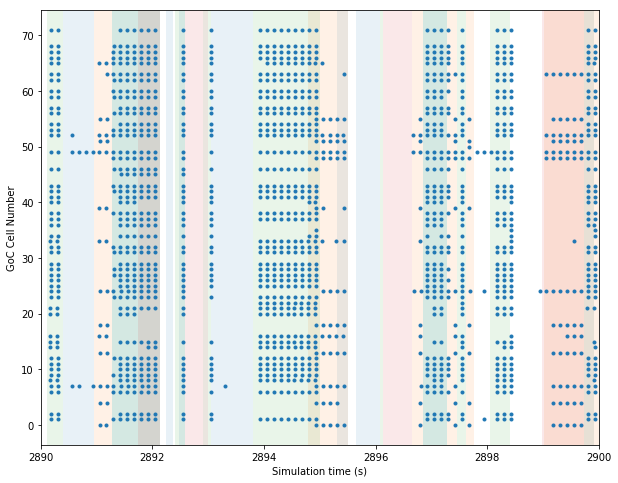

In [20]:
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = range(simulation.config_options['stimulation']['number_of_patterns'])
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(10,8))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)

selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
colorlist = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
for pat_id in pattern_id:
    for idx in index[:-1]:
        if simulation.pattern_generator.bin_is_in_pattern[idx+1,pat_id]:
            plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor=colorlist[pat_id], alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

[2600.4249 2600.4262 2600.5501 ... 2899.9238 2899.9238 2899.9247] [39 49 39 ... 38 68 48]
Average spike per oscillatory cycle: 0.2165451388888889 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

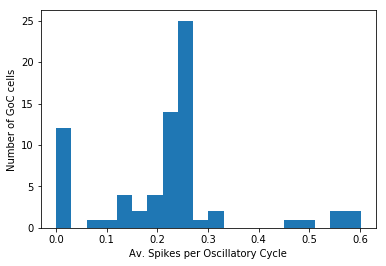

In [11]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-300, 
                                                          end_time = simulation.current_time)
print gtime, gcell_id
import numpy
firing_frequency = numpy.bincount(gcell_id) / (300.0*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GoC

Number of active synapses MF-GoC: 4564
Weight sum histogram MF-GoC: 4564


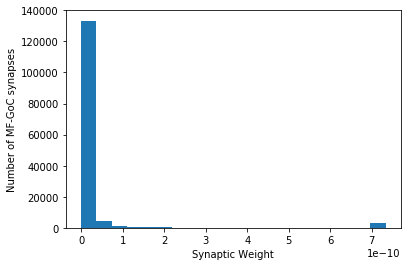

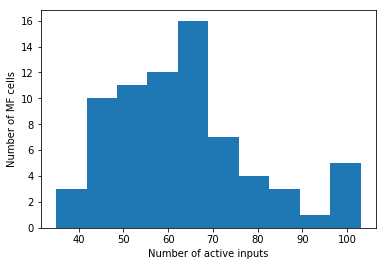

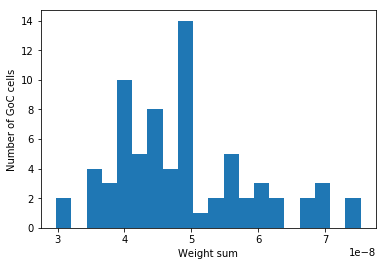

In [12]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,simulation.config_options['mfgocsynapsis']['max_weight']))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

Text(0.5,1,u'Weight vs Pattern Activation')

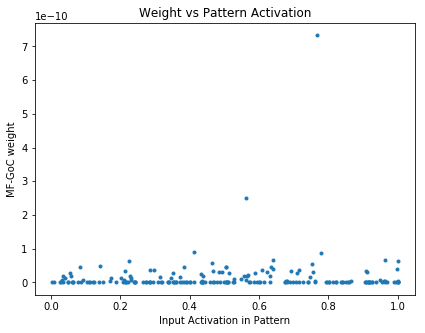

In [13]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index==3
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

Text(0.5,0,u'Number of MF cells')

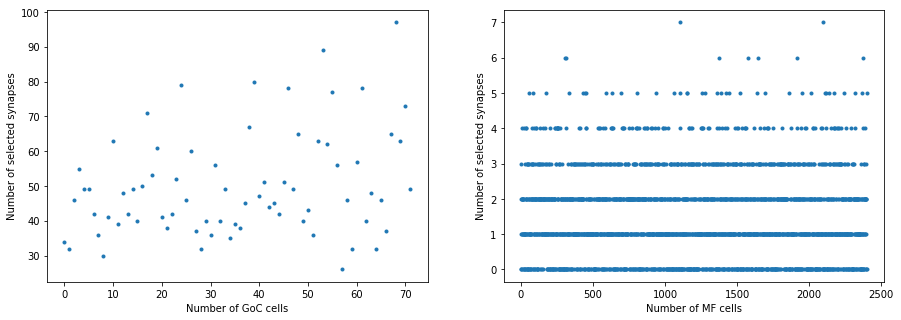

In [14]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [15]:
simulation.analyze_av_MI()

2018-07-11 10:24:08,345 - P3029 - MemTotal:1129M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-11 10:24:08,413 - P3029 - MemTotal:1129M - Simulation - INFO: Analyzing mutual information from time 2600.0 to 2900.0 seconds
2018-07-11 10:24:08,421 - P3029 - MemTotal:1129M - Simulation - INFO: Average firing rate in MI analysis: 1.732361111111111Hz
2018-07-11 10:24:08,435 - P3029 - MemTotal:1129M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 10:24:08,436 - P3029 - MemTotal:1129M - Simulation - INFO: [[0.22508591 0.34364261 0.21821306 0.03092784 0.14089347 0.
  0.2628866  0.69072165 0.20103093 0.2628866  0.26116838 0.24054983
  0.2628866  0.21649485 0.10137457 0.23195876 0.24054983 0.
  0.21477663 0.         0.19243986 0.21821306 0.07731959 0.2628866
  0.66666667 0.21993127 0.23883162 0.24914089 0.26632302 0.23883162
  0.         0.26460481 0.26460481 0.12886598 0.24570447 0.10996564
  0.21993127 0.2371134  0.2

2018-07-11 10:24:08,449 - P3029 - MemTotal:1129M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 10:24:08,450 - P3029 - MemTotal:1129M - Simulation - INFO: [[0.21617162 0.32123212 0.22057206 0.02090209 0.18811881 0.
  0.26292629 0.57260726 0.21837184 0.26952695 0.26457646 0.24587459
  0.26347635 0.2090209  0.16006601 0.23267327 0.28932893 0.
  0.21232123 0.         0.18921892 0.23047305 0.07975798 0.25522552
  0.57590759 0.21727173 0.24312431 0.24862486 0.26677668 0.24257426
  0.         0.2640264  0.26952695 0.13806381 0.22662266 0.0929593
  0.22387239 0.23982398 0.24312431 0.17711771 0.21177118 0.24532453
  0.24972497 0.25907591 0.         0.13036304 0.24477448 0.
  0.53960396 0.5440044  0.12871287 0.21067107 0.44444444 0.24532453
  0.20187019 0.21342134 0.21727173 0.24587459 0.         0.2420242
  0.27007701 0.         0.26347635 0.47854785 0.         0.32563256
  0.26072607 0.26567657 0.26622662 0.         0.         0.1980198 ]
 [0.02273958 0.30752572 0.2333

2018-07-11 10:24:08,468 - P3029 - MemTotal:1129M - Simulation - INFO: [0.79917303 0.77873694 0.83173487 0.77436187]


[array([0.00058722, 0.08390437, 0.36303524, 0.00148958])]

In [16]:
a = simulation.analyze_Hits_Top()

2018-07-11 10:24:08,481 - P3029 - MemTotal:1129M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-11 10:24:08,561 - P3029 - MemTotal:1129M - Simulation - INFO: Average firing rate in MI analysis: 1.732361111111111Hz
2018-07-11 10:24:08,576 - P3029 - MemTotal:1129M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 10:24:08,578 - P3029 - MemTotal:1129M - Simulation - INFO: [[0.22508591 0.34364261 0.21821306 0.03092784 0.14089347 0.
  0.2628866  0.69072165 0.20103093 0.2628866  0.26116838 0.24054983
  0.2628866  0.21649485 0.10137457 0.23195876 0.24054983 0.
  0.21477663 0.         0.19243986 0.21821306 0.07731959 0.2628866
  0.66666667 0.21993127 0.23883162 0.24914089 0.26632302 0.23883162
  0.         0.26460481 0.26460481 0.12886598 0.24570447 0.10996564
  0.21993127 0.2371134  0.24914089 0.15292096 0.23195876 0.24914089
  0.25085911 0.26460481 0.         0.18041237 0.24742268 0.
  0.63745704 0.58247423 0.13230241 0.20790378 0.47594502 0.2508

2018-07-11 10:24:08,590 - P3029 - MemTotal:1129M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 10:24:08,591 - P3029 - MemTotal:1129M - Simulation - INFO: [[0.21617162 0.32123212 0.22057206 0.02090209 0.18811881 0.
  0.26292629 0.57260726 0.21837184 0.26952695 0.26457646 0.24587459
  0.26347635 0.2090209  0.16006601 0.23267327 0.28932893 0.
  0.21232123 0.         0.18921892 0.23047305 0.07975798 0.25522552
  0.57590759 0.21727173 0.24312431 0.24862486 0.26677668 0.24257426
  0.         0.2640264  0.26952695 0.13806381 0.22662266 0.0929593
  0.22387239 0.23982398 0.24312431 0.17711771 0.21177118 0.24532453
  0.24972497 0.25907591 0.         0.13036304 0.24477448 0.
  0.53960396 0.5440044  0.12871287 0.21067107 0.44444444 0.24532453
  0.20187019 0.21342134 0.21727173 0.24587459 0.         0.2420242
  0.27007701 0.         0.26347635 0.47854785 0.         0.32563256
  0.26072607 0.26567657 0.26622662 0.         0.         0.1980198 ]
 [0.02273958 0.30752572 0.2333

### Mutual Information analysis for each neuron and each pattern

Analyze the pattern corresponding to each time bin

In [17]:
inv_time_bin = 1./time_bin
pattern_index = range(0,simulation.config_options['stimulation']['number_of_patterns'])
cell_index = range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer'))        
# Generate the time bin matrix
total_time = simulation.pattern_generator.simulation_time
bin_time_init = numpy.linspace(0.0, total_time-time_bin, num=total_time*inv_time_bin)
bin_time_end = numpy.linspace(time_bin,total_time,num=total_time*inv_time_bin)

# Initialize a matrix
num_patterns = len(pattern_index)
num_bins = len(bin_time_init)
num_cells = len(cell_index)

# Calculate the time of each pattern interval
time_end_of_pattern = simulation.pattern_generator.pattern_length_cum
time_init_of_pattern = numpy.append([0.0],time_end_of_pattern[:-1])

# Calculate the bin of each pattern interval. Check the round of the last bin to avoid out of range
bin_end_of_pattern = numpy.floor(time_end_of_pattern * inv_time_bin).astype(int)
if (bin_end_of_pattern[-1]>=num_bins):
    bin_end_of_pattern[-1]=num_bins-1
bin_init_of_pattern = numpy.append([0],bin_end_of_pattern[:-1])
if (bin_init_of_pattern[-1]>=num_bins):
    bin_init_of_pattern[-1]=num_bins-1

# Final matrix indicating which bins are considered of each pattern
bin_is_pattern = numpy.empty((num_patterns, num_bins),dtype='bool')
bin_is_pattern[:,:] = False
bin_pattern = numpy.zeros(num_bins)

# Final matrix indicating which bins are registered spikes
bin_has_fired = numpy.empty((num_cells, num_bins), dtype='bool')
bin_has_fired[:,:] = False

for key, value in enumerate(pattern_index):
    time_of_pattern_in_bin = numpy.zeros(num_bins)
    for index in simulation.pattern_generator.pattern_id_index[value]:
        init_bin = bin_init_of_pattern[index]
        end_bin = bin_end_of_pattern[index]

        list_of_bins = range(init_bin,end_bin+1)

        # Add the time of the initial bin (if exists)
        if init_bin!=end_bin:
            time_of_pattern_in_bin[list_of_bins[0]] += (bin_time_end[init_bin] - time_init_of_pattern[index])

        # Add the time of the intermediate bins (if exist)
        time_of_pattern_in_bin[list_of_bins[1:-1]] += time_bin

        # Add the time of the final bin
        time_of_pattern_in_bin[list_of_bins[-1]] += (time_end_of_pattern[index] - max(time_init_of_pattern[index],bin_time_init[end_bin]))

    # Those bins where the time in the pattern is longer than half of the bin are set to part of that pattern    
    bin_is_pattern[key,time_of_pattern_in_bin>(time_bin/2.)] = True
    bin_pattern[bin_is_pattern[key,:]] = bin_pattern[bin_is_pattern[key,:]] + 2**value

    
# Create a map of cells to index
cell_map = dict()
for key, value in enumerate(cell_index):
    cell_map[value] = key

pynest:6: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
pynest:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [18]:
def calc_Entropy(bin_matrix):
    '''
    Calculate the entropy for each individual pattern.
    @param bin_matrix Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    sum_bins = numpy.count_nonzero(bin_matrix,axis=1)
    probability = sum_bins/float(bin_matrix.shape[1])
    entropy = numpy.zeros(probability.shape)
    idx = probability>0.0
    entropy[idx] = -probability[idx]*numpy.log2(probability[idx])
    idx = probability<1.0
    entropy[idx] -= (1-probability[idx])*numpy.log2(1-probability[idx])
    return entropy


def calc_Joint_Entropy(cell_firing, pattern_present):
    '''
    Calculate the entropy of having both cell firing and pattern present.
    @param cell_firing Boolean matrix including 1 line for each cell and 1 column for each time bin.
    @param pattern_present Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    hit_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    cr_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    miss_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    fa_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    
    for index_pat, pattern in enumerate(pattern_present):
        if (numpy.count_nonzero(pattern)):
            for index_cell, firing in enumerate(cell_firing):
                hit_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&pattern)/float(pattern.shape[0])
                cr_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&~pattern)/float(pattern.shape[0])
                miss_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&pattern)/float(pattern.shape[0])
                fa_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&~pattern)/float(pattern.shape[0])
        else:
            print 'Pattern',index_pat,'never occurs. Statistics will not be calculated'
    
    entropy = numpy.zeros((len(pattern_present),len(cell_firing)),dtype=numpy.float)           
    idx = hit_matrix>0
    entropy[idx] = -hit_matrix[idx]*numpy.log2(hit_matrix[idx])
    idx = cr_matrix>0
    entropy[idx] -= cr_matrix[idx]*numpy.log2(cr_matrix[idx])
    idx = miss_matrix>0
    entropy[idx] -= miss_matrix[idx]*numpy.log2(miss_matrix[idx])
    idx = fa_matrix>0
    entropy[idx] -= fa_matrix[idx]*numpy.log2(fa_matrix[idx])
    return entropy

def calc_Ind_Pattern_Hit_Matrix(cell_firing, pattern_present):
    '''
    Calculate the correct rejection, hit, miss and false alarm matrisses with 1 line for each cell and 1 column for each pattern (including noise).
    @param cell_firing Boolean matrix including 1 line for each cell and 1 column for each time bin.
    @param pattern_present Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    hit_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    cr_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    miss_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    fa_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    
    for index_pat, pattern in enumerate(pattern_present):
        if (numpy.count_nonzero(pattern)):
            for index_cell, firing in enumerate(cell_firing):
                hit_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&pattern)/float(numpy.count_nonzero(pattern))
                cr_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&~pattern)/float(numpy.count_nonzero(~pattern))
                miss_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&pattern)/float(numpy.count_nonzero(pattern))
                fa_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&~pattern)/float(numpy.count_nonzero(~pattern))
        else:
            print 'Pattern',index_pat,'never occurs. Statistics will not be calculated'               
        
    return cr_matrix, hit_matrix, miss_matrix, fa_matrix 
    
def calc_MI(pattern_entropy, cell_entropy, joint_entropy):
    '''
    Calculate the MI between the pattern in the input and each neuron.
    @param pattern_entropy Array with the entropy of each individual pattern.
    @param cell_entropy Array with the entropy of each individual cell.
    @param joint_entropy 2D array with the joint entropy of each cell to each pattern
    '''
    
    MI_matrix = numpy.empty((len(pattern_entropy),len(cell_entropy)))

    for index_pat, pattern_H in enumerate(pattern_entropy):
        MI_matrix[index_pat,:] = pattern_H + cell_entropy[:] - joint_entropy[index_pat,:]

    return MI_matrix

In [19]:
if simulation.current_time<analysis_time:
    init_time = 0
else:
    init_time = simulation.current_time - analysis_time
print init_time, simulation.current_time
       
# Load data from the data provider
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', 
                                                          init_time = init_time, end_time = simulation.current_time)
spike_bin_index = numpy.floor(gtime*inv_time_bin).astype(int)

av_firing_rate = float(len(gtime))/(len(cell_index)*(simulation.current_time-init_time)*8)
print 'Average firing rate in MI analysis:',av_firing_rate,'Hz'
        
cell_id = numpy.array([cell_map[value] for value in gcell_id])
        
# Final matrix indicating which bins are registered spikes
if len(spike_bin_index) and len(cell_id):
    bin_has_fired[cell_id,spike_bin_index] = True
    
# Calculate mutual information in the time window
init_bin = int(init_time * inv_time_bin)
end_bin = int(simulation.current_time * inv_time_bin)

cr_matrix, hit_matrix, miss_matrix, fa_matrix = calc_Ind_Pattern_Hit_Matrix(bin_has_fired[:,init_bin:end_bin], bin_is_pattern[:,init_bin:end_bin])

# Obtain the list of neurons with hit rate over 80%
hit_rate_thr = 0.80
neurons_over = numpy.where(hit_matrix>hit_rate_thr)
print 'List of neurons with hit rate over',hit_rate_thr,'. Number of neurons:',neurons_over[0].shape,'. Pattern:',neurons_over[0],'Neuron:',neurons_over[1]
        
# Calculate pattern entropy, cell entropy and joint entropy
pat_entropy = calc_Entropy(bin_is_pattern[:,init_bin:end_bin])
cell_entropy = calc_Entropy(bin_has_fired[:,init_bin:end_bin])
joint_entropy = calc_Joint_Entropy(bin_has_fired[:,init_bin:end_bin], bin_is_pattern[:,init_bin:end_bin])

# Calculate average MI
MI_Matrix = calc_MI(pat_entropy, cell_entropy, joint_entropy)

selected_pattern = numpy.argmax(MI_Matrix, axis=0)

print 'Pattern id with maximum MI for each neuron:',selected_pattern
MI_per_pattern = 0
for idx in range(num_patterns):
    sel_columns = selected_pattern==idx
    MI_per_pattern += numpy.average(MI_Matrix[idx,sel_columns])
av_MI_per_pattern = MI_per_pattern/num_patterns
print 'Average MI per pattern:',av_MI_per_pattern

2600.0 2900.0
Average firing rate in MI analysis: 0.21654513888888888 Hz
List of neurons with hit rate over 0.8 . Number of neurons: (45,) . Pattern: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2] Neuron: [ 0  7 13 18 24 48 49 51 52 55  1  6  9 10 11 12 15 21 23 26 27 28 29 31
 32 34 37 38 41 42 43 46 48 49 52 53 57 59 60 62 63 65 66 67 68]
Pattern id with maximum MI for each neuron: [1 2 2 3 1 1 2 1 2 2 2 2 2 1 2 2 1 1 1 1 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 1 2
 2 2 1 2 2 2 2 1 2 2 1 2 2 1 1 2 2 2 1 2 2 1 2 2 1 2 2 1 2 2 2 2 1 1 2]
Average MI per pattern: nan


/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
